In [15]:
# This code block is used to extract the J2000 coordinates from the fits files of FIRST images
# to be used to retrieve NVSS images
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

basepath = 'Specific image sorting/FIRST_FRI_fits/Train'
with open('FRI_Training_coords.txt','w') as f:
    
    for entry in os.listdir(basepath):
        if os.path.isfile(os.path.join(basepath, entry)):

            hdu_list = fits.open(os.path.join(basepath, entry))
            c = SkyCoord(ra = hdu_list[0].header['CRVAL1']*u.degree,dec = hdu_list[0].header['CRVAL2']*u.degree).to_string('hmsdms')
            f.write(entry[:-5])
            f.write(' ')
            f.write(c)
            f.write('\n')
f.close()



07h06m44.64s +42d31m18.84s
TXS1458+204
J004300.63091346.3
J154709.22+353846.1
J163043.14+163910.8
J165448.44+261841.3
J143147.54+605109.4
J104921.13004005.0
J090018.16+074535.5
J140916.74+060139.4
J102314.24+483122.0
J080113.28+344030.8
J083159.69+303930.7
J223143.19082431.7
3C315
J165425.53+414121.2
TXS1512+227
J102603.83+390524.0
J122532.09+192615.2
J025227.52075605.4
J131531.07+525437.3
J132017.54+043037.4
J081614.27+425657.6
NGC6109
J162918.66+133824.0
J115936.05+233947.5
J151845.72+061356.1
J234702.42010300.9
J150148.14+163345.6
J084140.57+254827.9
1438-0100
J121543.82+170917.6
J212005.00075350.1
J112403.19+475814.9
J094614.50+581937.6
J082729.73+530733.4
J090245.43+164710.4
J140313.28+061008.2
J112352.34+443735.6
J164548.45+393227.4
J111211.37+304352.3
J143638.56+011058.8
J112055.83+173854.0
Cul1531+104
J135553.63+262217.9
J115816.37+340605.9
J153621.11+084112.1
J125434.93023412.4
J094202.04+105818.3
J105259.97+430255.0
NGC2484
J120522.29+050941.4
J142623.76+551804.9
J093058.74+0

In [55]:
#This block would have been used for renaming the "Postage" names to the originbal file names but was scrapped
#Maybe first sort ascending then by length or vice versa?

basepath = 'NVSS_Downloads/NVSS_BT_TRAIN'
i = 1
names = []

old_names = []
with open('FRI_Training_coords.txt','r') as f:
    for line in f:
        cols = line.split(';')
        names.append(cols[0]+'.fits')
# print(names)
        
for filename in os.listdir(basepath):
    print(filename)
    t.append(filename)
    

print(old_names)
# for filename in os.listdir(basepath):
#     print(filename)
#     my_source =basepath + '/' +old_names[i]
#     my_dest = basepath + '/' +names[i]
#     # rename() function will
#     # rename all the files
# #     os.rename(my_source, my_dest)
#     i += 1

postage(21).fits
postage(8).fits
J004300.63091346.3.fits
postage(78).fits
postage(146).fits
postage(3).fits
postage(123).fits
postage(73).fits
postage(48).fits
postage(50).fits
postage(27).fits
postage(113).fits
postage(83).fits
postage(168).fits
postage(141).fits
postage(135).fits
postage(40).fits
postage(75).fits
postage(105).fits
postage(89).fits
postage(69).fits
postage(35).fits
postage(134).fits
postage(93).fits
postage(67).fits
postage(175).fits
postage(156).fits
postage(90).fits
postage(169).fits
postage(166).fits
postage(107).fits
postage(15).fits
postage(1).fits
postage(12).fits
postage(85).fits
postage(47).fits
postage(174).fits
postage(60).fits
postage(114).fits
postage(16).fits
postage.fits
postage(29).fits
postage(61).fits
postage(84).fits
postage(143).fits
postage(108).fits
postage(58).fits
postage(118).fits
postage(76).fits
postage(63).fits
postage(87).fits
postage(98).fits
postage(136).fits
postage(37).fits
postage(138).fits
postage(34).fits
postage(94).fits
postage(62)

In [32]:
# Download NVSS images with script
# Gideon de Beer
# debeergideonsidius@gmail.com

import sys
import urllib

# Input argument must be a text file with 3 cols : name, ra, dec


def get_reponse(url,ra,dec,imgsize,Pix_spacing,T): # Page url, ra & dec, cutout size in arcmins,pixel spacing
#     d = dict( ra='RA', dec='Dec', imgsize='Size',Pix_spacing='Cells', T='Type')
    form_data = {'RA': ra,'Dec': dec, 'Size': imgsize,'Cells': Pix_spacing,'Type' : T}
    form_data = urllib.parse.urlencode(form_data)
    params = form_data.encode('utf-8')
    response = urllib.request.urlopen(url, params)
    data = response.read()        
#     print(data)
    return data


def get_image_link(data):
    idx1 = data.find('<a href="cgi-bin/postage.pl')
    idx2 = data.find(';Download=1',idx1)
    link = data[idx1:idx2]
    link = ['https://www.cv.nrao.edu/cgi-bin/postage.pl']
    return link



def download_fits(link,filename):
    urllib.urlretrieve(link,filename)
    print ('Downloaded ', filename)






 

In [56]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select


with open('BT_Training_coords.txt','r') as f:
    driver = webdriver.Firefox()
    driver.get("https://www.cv.nrao.edu/nvss/postage.shtml")#put here the adress of your page
        #Enter Desired image size
    elem = driver.find_element(By.NAME,'Size')
    elem.send_keys(Keys.SHIFT+Keys.HOME,Keys.BACKSPACE)
    elem.send_keys('0.5 0.5')
        #Enter Pixel Spacing
    elem = driver.find_element(By.NAME,'Cells')
    elem.send_keys(Keys.SHIFT+Keys.HOME,Keys.BACKSPACE)
    elem.send_keys('6.0 6.0')
        #Select Image Type
    elem = driver.find_element(By.NAME,'Type')
    elem.send_keys('fits s')
    
    #Iterate RA and DEC coordinates for each source
    for line in f:
            
        #Read in the name, RA and DEC for a source to be downloaded
        cols = line.split(';')
#         print(cols)
        name = cols[0]
        ra = cols[1]
        dec = cols[2]
        dec = dec[0:len(dec)-1]
        
        #Enter RA
        elem = driver.find_element(By.NAME,'RA')
        elem.send_keys(Keys.SHIFT+Keys.HOME,Keys.BACKSPACE)
        elem.send_keys(str(ra))
        
        #Enter DEC
        elem = driver.find_element(By.NAME,'Dec')
        elem.send_keys(Keys.SHIFT+Keys.HOME,Keys.BACKSPACE)
        elem.send_keys(str(dec))
        

        
        elem = driver.find_element(By.XPATH,"//*[@type='submit']")#put here the content you have put in Notepad, ie the XPath
        driver.find_element(By.XPATH,"//*[@type='submit']").click()
        
    driver.close()

f.close()



In [35]:
    arg =sys.argv
    table_file = 'NVSS_server_test.txt'

    url ='https://www.cv.nrao.edu/nvss/postage.shtml'
    

    with open(table_file,'r') as f:
        for line in f:
            
            ''''
            Old input file without tab seperation of columns
            rac_dec = line[21:-1]
            print rac_dec
            fitsfile = line[1:15]
            fitsfile = fitsfile.replace('\t', '')
            fitsfile = fitsfile.replace(' ','') + '.fits'
            '''
            cols = line.split('\t')
            ra = cols[1]
            dec = cols[2]
            dec = dec[0:len(dec)-1]
            fitsfile = cols[0]
            fitsfile = fitsfile.replace('\t', '')
            fitsfile = fitsfile.replace(' ','') + '.fits'
            
            data = get_reponse(url,ra,dec,'0.5 0.5','6.0 6.0','application/octet-stream')
            print(data)
            link = get_image_link(data)
            download_fits(link,fitsfile)
    f.close()

b'<!-- start of nrao-header.html -->\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n<head>\n<meta http-equiv="content-type" content="text/html; charset=ISO-8859-1">\n\n<style type="text/css">\n\nA.leftmenu:link{color:#ffffff; text-decoration: none; font-weight: bold; font-size: 14px; }\nA.leftmenu:visited{color:#ffffff; text-decoration: none; font-weight: bold; font-size: 14px; }\nA.leftmenu:hover{color:#ffffff; text-decoration: underline; font-weight: bold; font-size: 14px; }\n\nA.navig:link{color:#0000cc; text-decoration: none; font-weight: normal; font-size: 14px; }\nA.navig:visited{color:#0000cc; text-decoration: none; font-weight: normal; font-size: 14px; }\nA.navig:hover{color:#ff0000; text-decoration: underline; font-weight: normal; font-size: 14px; }\n\nA.navigb:link{color:#0000cc; text-decoration: none; font-weight: bold; font-size: 14px; }\nA.navigb:visited{color:#0000cc; text-decoration: none; font-weight: bold; font-size: 14px; }\nA.navigb:hover{c

TypeError: argument should be integer or bytes-like object, not 'str'

In [1]:
#Imports for the ML project:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import random
import scipy as scipy

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import astropy
from astropy.stats import sigma_clipped_stats
from astropy.nddata import Cutout2D
from astropy import units as u
import imageio
from skimage.transform import resize

#Designate the .fits image file path:

import pathlib
# data_dir = pathlib.Path('/home/sidius/Downloads/ImagesTEST/',untar =True)

In [2]:

# data_dir = pathlib.Path('/home/sidius/Downloads/ImagesTEST/',untar =True)
# image_count = len(list(data_dir.glob('*/*.fits')))
# print('Image count: ',image_count)

def clip(data,lim):
    print(data,lim)
    for k in range(0,data.shape[0]):
        for j in range(0,data.shape[1]):
            if data.data[k,j] < float(lim):
                data.data[k,j] = 0.0
    return data

def fits2jpg(fname,direcFrom,direcTo,numAugs):
    hdu_list = fits.open(direcFrom+'/'+fname)
    image = hdu_list[0].data
    print("original image size: ",image.shape)
    image = np.squeeze(image)
#     imageio.imwrite(direcTo+'/'+fname[0:-5]+'A.png', image.data)
    
    
    #Make 300 x 300 central cut out
    sigma = 3.0
    position = (image.shape[0]/2,image.shape[1]/2)
    size = u.Quantity((image.shape[0],image.shape[1]), u.pixel)
    img = Cutout2D(image,position,size)
    idx = np.isnan(img.data)
    img.data[idx] = 0.0
    
    
    AUG_Copy = Cutout2D(img.data,position,size)
    for i in range(0,numAugs):
        a = random.randint(1,3)
        print(a)
        
        if(i == 0):
            # Estimate stats
            mean, median, std = sigma_clipped_stats(AUG_Copy.data, sigma=sigma)
            AUG_Copy = clip(AUG_Copy,std*sigma)
            
#             imageio.imwrite(direcTo+'/'+fname[0:-5]+'B.png', AUG_Copy.data)
            
        if (a ==1):
            
            #Rotate image by the rand_int degrees
            AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
            #Flip image data indices with rotation-flipping
            AUG_Copy.data = np.flipud(AUG_Copy.data)
        
        if (a == 2 or a == 3):        
            
            #Rotate image by the rand_int degrees
            AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
            
#         AUG_Save = AUG_Copy
        #Crop out central 150x150 pixels
        position = (AUG_Copy.shape[0]/2,AUG_Copy.shape[1]/2)
        size = u.Quantity((150,150), u.pixel)
        AUG_Save = Cutout2D(AUG_Copy.data,position,size)
        
        print("Image size being saved: ",AUG_Save.data.shape)
    
        outfile = fname[0:-5] +'.png'
        imageio.imwrite(direcTo+'/'+fname[0:-5]+'B'+str(i)+'.png', AUG_Save.data)
        if (a ==1): #Flip back to increase augmentation efficiency
            AUG_Copy.data = np.flipud(AUG_Copy.data)
    

    return outfile

#no augs fits-jpg
def fits2jpgVal(fname,direcFrom,direcTo,numAugs):
    hdu_list = fits.open(direcFrom+'/'+fname)
    image = hdu_list[0].data
#     print("original image size: ",image.shape)
    image = np.squeeze(image)
#     imageio.imwrite(direcTo+'/'+fname[0:-5]+'A.png', image.data)
    
    
    #Make 300 x 300 central cut out
    sigma = 3.0
    position = (image.shape[0]/2,image.shape[1]/2)
    size = u.Quantity((image.shape[0],image.shape[1]), u.pixel)
    img = Cutout2D(image,position,size)
    idx = np.isnan(img.data)
    img.data[idx] = 0.0
    
    
    AUG_Copy = Cutout2D(img.data,position,size)
    for i in range(0,1):
        a = random.randint(1,3)
#         print(a)
        
        if(i == 0):
            # Estimate stats
            mean, median, std = sigma_clipped_stats(AUG_Copy.data, sigma=sigma)
            AUG_Copy = clip(AUG_Copy,std*sigma)
            
#             imageio.imwrite(direcTo+'/'+fname[0:-5]+'B.png', AUG_Copy.data)
            
#         if (a ==1 or a ==2 or a==3):
            
#             #Rotate image by the rand_int degrees
#             AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
#             #Flip image data indices with rotation-flipping
#             AUG_Copy.data = np.flipud(AUG_Copy.data)
        
#         if (a == 2 or a == 3):        
            
#             #Rotate image by the rand_int degrees
#             AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
            
#         AUG_Save = AUG_Copy
        #Crop out central 150x150 pixels
        position = (AUG_Copy.shape[0]/2,AUG_Copy.shape[1]/2)
        size = u.Quantity((150,150), u.pixel)
        AUG_Save = Cutout2D(AUG_Copy.data,position,size)
        
#         print("Image size being saved: ",AUG_Save.data.shape)
    
        outfile = fname[0:-5] +'.png'
        imageio.imwrite(direcTo+'/'+fname[0:-5]+'B'+str(i)+'.png', AUG_Save.data)
        if (a ==1): #Flip back to increase augmentation efficiency
            AUG_Copy.data = np.flipud(AUG_Copy.data)
    

    return outfile


In [61]:
#borderless image creation

# List all files in a directory using os.listdir

#BENT TAIL IMAGES

# basepath = 'NVSS_Downloads/NVSS_BT_TRAIN'

# for entry in os.listdir(basepath):
#     if os.path.isfile(os.path.join(basepath, entry)):
#         fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/BT_NVSS_png/Train',143)
        
# basepath = 'NVSS_Downloads/NVSS_BT_VAL'

# for entry in os.listdir(basepath):
#     if os.path.isfile(os.path.join(basepath, entry)):
#         fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/BT_NVSS_png/Val',143)
        
        

#FRI IMAGES

# basepath = 'NVSS_Downloads/NVSS_FRI_TRAIN'

# for entry in os.listdir(basepath):
#     if os.path.isfile(os.path.join(basepath, entry)):
#         fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/FRI_NVSS_png/Train',288)
        
# basepath = 'NVSS_Downloads/NVSS_FRI_VAL'

# for entry in os.listdir(basepath):
#     if os.path.isfile(os.path.join(basepath, entry)):
#         fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/FRI_NVSS_png/Val',288)



# #FRII IMAGES

# basepath = 'NVSS_Downloads/NVSS_FRII_TRAIN'

# for entry in os.listdir(basepath):
#     if os.path.isfile(os.path.join(basepath, entry)):
#         fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/FRII_NVSS_png/Train',144)

# basepath = 'NVSS_Downloads/NVSS_FRII_VAL'

# for entry in os.listdir(basepath):
#     if os.path.isfile(os.path.join(basepath, entry)):
#         fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/FRII_NVSS_png/Val',144)
        
# print(Names_List) #The image names are correctly read in as fits images


# Bent_Tails = list(data_dir.glob('png_Versions/Bent_Tail_png/*'))


# FRIs = list(data_dir.glob('png_Versions/FIRST_FRI_png/*'))


# FRIIs = list(data_dir.glob('png_Versions/FIRST_FRII_png/*'))


Lossy conversion from float32 to uint8. Range [-0.0003182942164130509, 0.050270240753889084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003128964453935623, 0.05031781271100044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039336620829999447, 0.05034307762980461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003999986220151186, 0.05035379156470299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003842067962978035, 0.05036336928606033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034925073850899935, 0.05037950724363327]. Convert image to uint8 prior to saving to suppress this warning.


original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73cd0> 0.0014523254649247974
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003553245624061674, 0.05038577690720558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003554274153430015, 0.05039098113775253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032373168505728245, 0.05040118470788002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003102101618424058, 0.05040205642580986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003103936032857746, 0.05040004104375839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030126015190035105, 0.05039328336715698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00023273882106877863, 0.05057091265916824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023492626496590674, 0.050587303936481476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002333216689294204, 0.050602588802576065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002272009151056409, 0.05061676725745201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021295269834809005, 0.0506524033844471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021519554138649255, 0.05066220834851265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002090625639539212, 0.05053997039794922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021504831966012716, 0.0505208857357502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021795013162773103, 0.0504794716835022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021643810032401234, 0.05045716464519501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000199746762518771, 0.05038367956876755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002050112816505134, 0.05040072277188301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021817554079461843, 0.05039156973361969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021501978335436434, 0.05037503316998482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020967191085219383, 0.05031870678067207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021308637224137783, 0.050275884568691254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021591752010863274, 0.05027250200510025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022217932564672083, 0.05035493150353432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00020473483891692013, 0.05065855383872986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000205794713110663, 0.05066266655921936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020612537628039718, 0.05066061019897461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020411035802681, 0.05065785348415375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001986838469747454, 0.05064281448721886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020706388750113547, 0.05061798915266991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002289986441610381, 0.05039636418223381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020474633492995054, 0.050426654517650604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020144367590546608, 0.050445571541786194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002201698225690052, 0.05045337602496147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022463964705821127, 0.05045359954237938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022521946812048554, 0.05044693127274513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00020712547120638192, 0.05036436766386032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002040425461018458, 0.050402428954839706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019975221948698163, 0.05045182630419731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021566107170656323, 0.05049189552664757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002173741813749075, 0.05050314590334892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021627046226058155, 0.0505308136343956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021230665151961148, 0.05043213441967964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020961702102795243, 0.05041519179940224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021212811407167464, 0.050397176295518875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021952271345071495, 0.05033660680055618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021408789325505495, 0.050266239792108536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021585862850770354, 0.050240617245435715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Ran

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021995273709762841, 0.05036187544465065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002207361103501171, 0.05035538598895073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022632998297922313, 0.0503389872610569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022444853675551713, 0.05032910779118538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004991100868210196, 0.22020545601844788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047205202281475067, 0.2200610637664795]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.0015828143223188818
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00039687921525910497, 0.21983717381954193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004488106060307473, 0.2195373922586441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040000557783059776, 0.21916592121124268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004107416025362909, 0.21888193488121033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003955521387979388, 0.21872977912425995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035836530150845647, 0.2184036672115326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00043563242070376873, 0.21817146241664886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004318663268350065, 0.2181912213563919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003721287357620895, 0.2182123064994812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003102801856584847, 0.21821287274360657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003165826201438904, 0.21820716559886932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036665171501226723, 0.21817798912525177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002976197865791619, 0.21853944659233093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030248292023316026, 0.21899616718292236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031241198303177953, 0.2191300392150879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033372087636962533, 0.21947307884693146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003351751947775483, 0.21956895291805267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031362628214992583, 0.21979866921901703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030433665961027145, 0.21856805682182312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029948909650556743, 0.21808233857154846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000296565645840019, 0.21790647506713867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029356987215578556, 0.21753615140914917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002905178698711097, 0.21771840751171112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002936121600214392, 0.21784554421901703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032678761635906994, 0.21880558133125305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032280723098665476, 0.2186690866947174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003231697774026543, 0.21854744851589203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000326839042827487, 0.21847760677337646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032768098753876984, 0.21823425590991974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032387993996962905, 0.21794123947620392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000296013051411137, 0.22035349905490875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030163992778398097, 0.2204778492450714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003027105121873319, 0.22056245803833008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003026667982339859, 0.22060786187648773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003054933622479439, 0.2206028401851654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003059717419091612, 0.22058287262916565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003324195567984134, 0.21802067756652832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032178175752051175, 0.21830372512340546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003262968675699085, 0.2186705768108368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003364797739777714, 0.21887768805027008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003449451760388911, 0.21905453503131866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034297892125323415, 0.21926294267177582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034038626472465694, 0.21854908764362335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033965075272135437, 0.2182009518146515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033694770536385477, 0.2185588777065277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003373628424014896, 0.2187841236591339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000341311824740842, 0.21920107305049896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034178796340711415, 0.21939389407634735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003303643607068807, 0.22079691290855408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003303287085145712, 0.22064554691314697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033154405537061393, 0.22045926749706268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003294997150078416, 0.2203536331653595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003305563295725733, 0.22011710703372955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003354810760356486, 0.21984854340553284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0013703253935091197
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003675906627904624, 0.1761566400527954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004220135451760143, 0.17610441148281097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043477810686454177, 0.17589302361011505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004666220338549465, 0.17560407519340515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048287722165696323, 0.1753706932067871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004686089523602277, 0.17496396601200104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00033810926834121346, 0.17678013443946838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033307939884252846, 0.17684105038642883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032622623257339, 0.17689530551433563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003260721277911216, 0.1770155429840088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002839745720848441, 0.17707706987857819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027550820959731936, 0.17708684504032135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002894825302064419, 0.17544782161712646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002624296466819942, 0.17518387734889984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002497922978363931, 0.1753651201725006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024945070617832243, 0.1758410930633545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002444191195536405, 0.17621971666812897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024391015176661313, 0.1763254702091217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002824880357366055, 0.17583394050598145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027850837795995176, 0.1755533218383789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002743336372077465, 0.1750722974538803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002731748390942812, 0.17489787936210632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002616697165649384, 0.1751854568719864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002708094834815711, 0.1756393164396286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002613045508041978, 0.1771809309720993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024712333106435835, 0.17717522382736206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022363073367159814, 0.17711810767650604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024549340014345944, 0.17700526118278503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002522983413655311, 0.17690053582191467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025662590633146465, 0.17677277326583862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002836028579622507, 0.17590996623039246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000281237909803167, 0.17618663609027863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027332405443303287, 0.17642025649547577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026916025672107935, 0.176521435379982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002703724894672632, 0.1766899675130844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028595884214155376, 0.1768595278263092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031334010418504477, 0.17519979178905487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003104437200818211, 0.17536260187625885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003050847735721618, 0.1755194365978241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002916030352935195, 0.17581424117088318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027960067382082343, 0.17608410120010376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030702759977430105, 0.17632843554019928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002822748792823404, 0.17718397080898285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028651984757743776, 0.17708690464496613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028512190328910947, 0.17696605622768402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002858681546058506, 0.17689716815948486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030569403315894306, 0.17665569484233856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000300775544019416, 0.17646834254264832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031700899126008153, 0.1768331080675125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003260608937125653, 0.176886186003685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003348153259139508, 0.1769772320985794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003320306132081896, 0.17698734998703003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032614017254672945, 0.17698685824871063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034018646692857146, 0.17691917717456818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390bc10> 0.001417542138369754


Lossy conversion from float32 to uint8. Range [-0.00031704874709248543, 0.14273247122764587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040951475966721773, 0.14286276698112488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034059223253279924, 0.1431773602962494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037633025203831494, 0.1432628333568573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039381449460051954, 0.14344172179698944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036205045762471855, 0.14351627230644226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00041049273568205535, 0.1423741579055786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004087369015906006, 0.14241580665111542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040546481614001095, 0.14244501292705536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003949148813262582, 0.14246627688407898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003929693775717169, 0.1424572765827179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003917523135896772, 0.14243529736995697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029389982228167355, 0.14217570424079895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002945803862530738, 0.14214658737182617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003156421007588506, 0.14223986864089966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003272893372923136, 0.14232176542282104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031833862885832787, 0.14249789714813232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030606749351136386, 0.1425330936908722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002970191417261958, 0.14290398359298706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003083997289650142, 0.14304979145526886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003040615119971335, 0.14315153658390045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002898637903854251, 0.14322404563426971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028812457458116114, 0.14322404563426971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028259289683774114, 0.1432129442691803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003037626447621733, 0.14236603677272797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029102578992024064, 0.1425268054008484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003129247925244272, 0.14257457852363586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002988663618452847, 0.1425558477640152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026941942633129656, 0.14248402416706085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028920298791490495, 0.14228588342666626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002906917652580887, 0.14207689464092255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002910710172727704, 0.14206697046756744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002823532558977604, 0.14202402532100677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031925260554999113, 0.14206784963607788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003117104060947895, 0.14234572649002075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002921700943261385, 0.14246976375579834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029700156301259995, 0.1428714543581009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002937497920356691, 0.14312413334846497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002902541309595108, 0.14318452775478363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003052145766559988, 0.14327192306518555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003050308732781559, 0.14329802989959717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002970806381199509, 0.14331726729869843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023952123592607677, 0.1423644870519638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002870614407584071, 0.14205613732337952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003036225971300155, 0.14206667244434357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032030942384153605, 0.14228443801403046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031894168932922184, 0.14245030283927917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029201433062553406, 0.14260202646255493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031381964799948037, 0.1419786810874939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003165722591802478, 0.14184775948524475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003156382590532303, 0.14178793132305145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031152641167864203, 0.1418507695198059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030474437517113984, 0.14190557599067688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003002071753144264, 0.14199155569076538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003048716171178967, 0.14205756783485413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003141010529361665, 0.1423323154449463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002892824122682214, 0.14249089360237122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002721050113905221, 0.1425352692604065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000295408972306177, 0.14250239729881287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003009925421793014, 0.14236101508140564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027932925149798393, 0.14278633892536163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002685097570065409, 0.14289377629756927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002769076672848314, 0.143145352602005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002709972904995084, 0.14320527017116547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002828152209986001, 0.1432901918888092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028752817888744175, 0.1433149129152298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 280)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fac0> 0.0013470087724272162


Lossy conversion from float32 to uint8. Range [-0.00041671941289678216, 0.24955496191978455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037570332642644644, 0.2516001760959625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039154590922407806, 0.24666321277618408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043995637679472566, 0.2514793872833252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003997816238552332, 0.2485762983560562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004007421957794577, 0.250678151845932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003731284523382783, 0.24836774170398712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038302139728330076, 0.24977998435497284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003902913013007492, 0.24861453473567963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003962479531764984, 0.24980919063091278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039655683212913573, 0.2497156411409378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003936720313504338, 0.2499905675649643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003001849981956184, 0.24864785373210907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028556198230944574, 0.248838409781456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030854958458803594, 0.24921174347400665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032312737312167883, 0.24992896616458893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002908474416472018, 0.2487843632698059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003016198752447963, 0.24993598461151123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003808267938438803, 0.24900682270526886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003402246511541307, 0.24697966873645782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003376571403350681, 0.25080832839012146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032773587736301124, 0.24961791932582855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003176225582137704, 0.2482166290283203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003058667352888733, 0.24794615805149078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00032329343957826495, 0.24938513338565826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003229485300835222, 0.24993377923965454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003153679717797786, 0.24762310087680817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004384552303235978, 0.2491515874862671]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003121329646091908, 0.25050461292266846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013545089168474078, 0.2499312460422516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003326590813230723, 0.24847213923931122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.005298715550452471, 0.24683786928653717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.005294583737850189, 0.25017648935317993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003403380687814206, 0.24929273128509521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003235028707422316, 0.24759984016418457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002716049551963806, 0.24984145164489746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034982615034095943, 0.24843290448188782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003345613949932158, 0.24895420670509338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000349987531080842, 0.24820104241371155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034786819014698267, 0.2483549863100052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003419551358092576, 0.24777911603450775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003465086338110268, 0.24855132400989532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00971204973757267, 0.24927088618278503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003661275841295719, 0.246759831905365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035287116770632565, 0.24702218174934387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00687960023060441, 0.24643945693969727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003680238442029804, 0.24836139380931854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.004242341499775648, 0.24762538075447083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00658943

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f41719a0> 0.0014615339459851384


Lossy conversion from float32 to uint8. Range [-0.0003736955113708973, 0.15114052593708038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003893747052643448, 0.15115566551685333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041720736771821976, 0.15114298462867737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004243745934218168, 0.15108776092529297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040617078775539994, 0.1510598212480545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003704671689774841, 0.1509896069765091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002934436488430947, 0.15037094056606293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002866529976017773, 0.15050546824932098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002878829836845398, 0.1505413055419922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002902073028963059, 0.150620236992836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027162092737853527, 0.15065781772136688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002709109685383737, 0.1506614238023758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002313948789378628, 0.15022099018096924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002372164890402928, 0.15042884647846222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022997618361841887, 0.15061253309249878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000225923940888606, 0.15077264606952667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002529341436456889, 0.15090982615947723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002567241317592561, 0.1509701907634735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00024258617486339062, 0.15122359991073608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023796322057023644, 0.151197612285614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026231937226839364, 0.15113089978694916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002536734682507813, 0.151045024394989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022070150589570403, 0.1509399563074112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021443539299070835, 0.1508803367614746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00022322928998619318, 0.1503753662109375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022396353597287089, 0.15048199892044067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002444646379444748, 0.15056991577148438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024646669044159353, 0.15066607296466827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002528947952669114, 0.15072041749954224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023058765509631485, 0.15073314309120178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000250522221904248, 0.1498003900051117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024260928330477327, 0.1499311774969101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002338535850867629, 0.15005575120449066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002431354223517701, 0.15017414093017578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002490668557584286, 0.15049205720424652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023848272394388914, 0.15067404508590698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023974895884748548, 0.1509024053812027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023931277974043041, 0.15083609521389008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023640219296794385, 0.15076474845409393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002312368742423132, 0.15068836510181427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002410487795714289, 0.1505199819803238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024118598958011717, 0.15022864937782288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000259530235780403, 0.15056002140045166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000245926552452147, 0.15057499706745148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022605041158385575, 0.15056242048740387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002287152165081352, 0.1505090594291687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023879848595242947, 0.1504824459552765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000251525838393718, 0.15037471055984497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002209444355685264, 0.1508006453514099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021781132090836763, 0.15086454153060913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021127343643456697, 0.150975301861763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022375513799488544, 0.15102244913578033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023604699526913464, 0.15106408298015594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002452617045491934, 0.15110023319721222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171400> 0.0014441448147408664


Lossy conversion from float32 to uint8. Range [-0.0003944812051486224, 0.14136604964733124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047892172005958855, 0.14129135012626648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005227820365689695, 0.141203373670578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006386032910086215, 0.14101451635360718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006974864518269897, 0.14085009694099426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007342502358369529, 0.1406550407409668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005394837935455143, 0.1397235095500946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004946385161019862, 0.1397659182548523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048297166358679533, 0.13976871967315674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000456407229648903, 0.13977529108524323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004436564340721816, 0.13978828489780426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044973986223340034, 0.13978199660778046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003649593563750386, 0.14038318395614624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037546406383626163, 0.14056362211704254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003803882282227278, 0.14064432680606842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003851281653624028, 0.14078739285469055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038184612640179694, 0.14095471799373627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038224077434279025, 0.14099694788455963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000404997612349689, 0.14005225896835327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004125757550355047, 0.13992415368556976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004176535876467824, 0.13978880643844604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042056720121763647, 0.1396462321281433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004196984809823334, 0.13933996856212616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041793525451794267, 0.13939426839351654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003759917162824422, 0.14013350009918213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000371001340681687, 0.1401020586490631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003588908293750137, 0.13997821509838104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037107538082636893, 0.13980938494205475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038129245513118804, 0.13974297046661377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004003435606136918, 0.13951462507247925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037447887007147074, 0.14120544493198395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037659102235920727, 0.14125068485736847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037557529867626727, 0.14132100343704224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003675546613521874, 0.14136409759521484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003687126445583999, 0.14137759804725647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036887594615109265, 0.1413680911064148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00037628173595294356, 0.140433207154274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003757400263566524, 0.14054523408412933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037462194450199604, 0.14057238399982452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037420043372549117, 0.1406109482049942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003843548765871674, 0.1406296044588089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038324197521433234, 0.1406015306711197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00035252742236480117, 0.14020021259784698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003561637713573873, 0.14034128189086914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003595558227971196, 0.14060215651988983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003584083169698715, 0.14083519577980042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003561246849130839, 0.14094144105911255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035365507937967777, 0.14104066789150238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00033719927887432277, 0.14161504805088043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003423531597945839, 0.14157964289188385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003501973405946046, 0.1415371596813202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003620852075982839, 0.14136704802513123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036138080758973956, 0.14121851325035095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003604420635383576, 0.14094316959381104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171040> 0.0015035096439532936


Lossy conversion from float32 to uint8. Range [-0.00043689479934982955, 0.21647334098815918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043889274820685387, 0.21643681824207306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004370693350210786, 0.216263085603714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004992096219211817, 0.21609896421432495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044249664642848074, 0.21589595079421997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039186442154459655, 0.2181490957736969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00040414699469693005, 0.2291242480278015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003901528543792665, 0.22958700358867645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037746495218016207, 0.22995218634605408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037050986429676414, 0.2300451546907425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036138013820163906, 0.22936080396175385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003634266904555261, 0.22869151830673218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00033249027910642326, 0.21538525819778442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032646043109707534, 0.21526683866977692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031416150159202516, 0.21500785648822784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002925595617853105, 0.21456515789031982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002969898923765868, 0.21439166367053986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031561669311486185, 0.21485169231891632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002953902876470238, 0.2167879194021225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029428856214508414, 0.21678270399570465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028141686925664544, 0.21673738956451416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026299021556042135, 0.2166474163532257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002421178069198504, 0.21651364862918854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024994692648760974, 0.21633698046207428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003580025222618133, 0.22738836705684662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037480966420844197, 0.2274622917175293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003868800413329154, 0.22768981754779816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039458886021748185, 0.22801999747753143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039836482028476894, 0.22836758196353912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003986626979894936, 0.22861173748970032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003677549248095602, 0.2155262529850006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003723903791978955, 0.2154363989830017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036667261156253517, 0.21511968970298767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035119871608912945, 0.21487107872962952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003502632025629282, 0.21444250643253326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003527855733409524, 0.21428543329238892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003218368801753968, 0.21658146381378174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031061473418958485, 0.21650683879852295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029842284857295454, 0.21642068028450012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028057675808668137, 0.21609260141849518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003046103520318866, 0.21596167981624603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003552050911821425, 0.22382386028766632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004077150078956038, 0.22706067562103271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003973975544795394, 0.22670671343803406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037789595080539584, 0.22696693241596222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000371461093891412, 0.2272634655237198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003866128681693226, 0.22757139801979065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040250024176202714, 0.2272236943244934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036217470187693834, 0.21485386788845062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035315414424985647, 0.21448317170143127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035757262958213687, 0.21404477953910828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003725344140548259, 0.21399416029453278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003621180367190391, 0.21470041573047638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003542587219271809, 0.21491166949272156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003701635869219899, 0.21656747162342072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036980133154429495, 0.21650059521198273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036576890852302313, 0.21644891798496246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003512455150485039, 0.21630893647670746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003215286124031991, 0.21600927412509918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029946566792204976, 0.21771122515201569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 260, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73d90> 0.0014580145943909883


Lossy conversion from float32 to uint8. Range [-0.0004109922447241843, 0.08306054025888443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000517250329721719, 0.08395795524120331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005443508271127939, 0.08336567133665085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005189732764847577, 0.0832323357462883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041231975774280727, 0.08237755298614502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013054683804512024, 0.08329646289348602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008244035998359323, 0.08291079849004745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029327618540264666, 0.08354485034942627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003249022411182523, 0.08355184644460678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006547602824866772, 0.08279434591531754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006611132994294167, 0.08345977216959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006611281423829496, 0.08311272412538528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031880108872428536, 0.08303681761026382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030574126867577434, 0.08275561779737473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030779652297496796, 0.08328177034854889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025659255334176123, 0.08342195302248001]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031239789677783847, 0.08359196037054062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002710511616896838, 0.08253605663776398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006492743268609047, 0.08263462781906128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033678076579235494, 0.08242595940828323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042166421189904213, 0.08323679864406586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007133534527383745, 0.08295094966888428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006663170643150806, 0.08315911144018173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007953035528771579, 0.08274151384830475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009839400881901383, 0.08300057053565979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005635874113067985, 0.08282990753650665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003738433006219566, 0.08302183449268341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040084801730699837, 0.08294225484132767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003692625614348799, 0.0827547088265419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027838145615532994, 0.08266246318817139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003341133415233344, 0.08239846676588058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034572146250866354, 0.0825732946395874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028677453519776464, 0.08289458602666855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003137647872790694, 0.08260156214237213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003192867443431169, 0.08296871185302734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029285912751220167, 0.08181340992450714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006923537002876401, 0.08241202682256699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003036118869204074, 0.08227338641881943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063327606767416, 0.08221679925918579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005538632394745946, 0.08245816826820374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041151291225105524, 0.08241599053144455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043162886868231, 0.08266045898199081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00058

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f46a4e20> 0.0015723086544312537


Lossy conversion from float32 to uint8. Range [-0.0005938556860201061, 0.7892271876335144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008676434517838061, 0.7907552123069763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004925556131638587, 0.7827468514442444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005155090475454926, 0.7891042232513428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048079181578941643, 0.7811504602432251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045536106335930526, 0.7889312505722046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000563

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004300205036997795, 0.7841729521751404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047558857477270067, 0.7796961069107056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004787822254002094, 0.7765384316444397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004349928058218211, 0.7857745885848999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045887171290814877, 0.7813625931739807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037714457721449435, 0.7814973592758179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036837439984083176, 0.7760334610939026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003958227171096951, 0.7823747992515564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038441878859885037, 0.7857717275619507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003741969703696668, 0.7797483205795288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037546781823039055, 0.786039412021637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003766398294828832, 0.7832241654396057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000401

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003981885965913534, 0.7816417217254639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004205192672088742, 0.7870087623596191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047970341984182596, 0.782696008682251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004918056656606495, 0.7798064947128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048337082262150943, 0.7844375371932983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004251590580679476, 0.7861840128898621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003806

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004754301335196942, 0.775781512260437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046530988765880466, 0.7763661742210388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000485588563606143, 0.7859581708908081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048721872735768557, 0.784271776676178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005236307042650878, 0.7788684368133545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004952178569510579, 0.779269814491272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004732763

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004822779446840286, 0.7807319164276123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004655660595744848, 0.7815375328063965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004945874097757041, 0.7787309885025024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048779870849102736, 0.7845941185951233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005138245760463178, 0.7779633402824402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000511090038344264, 0.7794553637504578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047709

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000588150811381638, 0.7831767201423645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005615684785880148, 0.7804310321807861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005947198369540274, 0.7761440277099609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006082926993258297, 0.7786019444465637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005704325158149004, 0.7794728875160217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006160328048281372, 0.7777007818222046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000609172

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005776005564257503, 0.7826671600341797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006330155301839113, 0.7781471014022827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005853658076375723, 0.7770408987998962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006287415162660182, 0.7818677425384521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005666609504260123, 0.778925895690918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006489583756774664, 0.780001163482666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005807641

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006578693864867091, 0.7833893299102783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000618796213530004, 0.7799891829490662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006250494043342769, 0.7746747136116028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000659987679682672, 0.7784784436225891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006646048277616501, 0.7757425308227539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616472156252712, 0.7717242240905762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063370319

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006464181351475418, 0.7741490006446838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006419491837732494, 0.7786015868186951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007102132658474147, 0.7810564637184143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006861008005216718, 0.7783799171447754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007283033337444067, 0.7763388752937317]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78460> 0.0015288502327166498


Lossy conversion from float32 to uint8. Range [-0.00034830166259780526, 0.11458078026771545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003275422495789826, 0.11453259736299515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000362762511940673, 0.11447837203741074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003997869498562068, 0.11435236036777496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044040806824341416, 0.11428052186965942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004764487675856799, 0.11420297622680664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005226537468843162, 0.11385498940944672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000505650881677866, 0.11391034722328186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005255293217487633, 0.11404554545879364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005312000866979361, 0.11408136785030365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005302154459059238, 0.11415836960077286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005288621759973466, 0.11417485028505325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004146659921389073, 0.11353611201047897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041118779336102307, 0.11368340998888016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004019416810479015, 0.114080049097538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003843294980470091, 0.11441093683242798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003663385577965528, 0.11467583477497101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036065504536964, 0.11487498134374619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033426666050218046, 0.11443845182657242]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033169376547448337, 0.11434582620859146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003543344500940293, 0.11424747854471207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039802896208129823, 0.11403363943099976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004267558688297868, 0.11379826068878174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044549020822159946, 0.11340627819299698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004163691774010658, 0.11426227539777756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041125345160253346, 0.11427770555019379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040293214260600507, 0.1142740473151207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003934552660211921, 0.11425154656171799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003841676516458392, 0.11421049386262894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037563813384622335, 0.11415121704339981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003968292730860412, 0.11446967720985413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004119059885852039, 0.11464982479810715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004191033076494932, 0.11486572027206421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004184568824712187, 0.11492399126291275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041160083492286503, 0.11505432426929474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041900179348886013, 0.11510646343231201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00042704030056484044, 0.1136738508939743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044723961036652327, 0.11325730383396149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004490131977945566, 0.11329391598701477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044697491102851927, 0.11338794976472855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000429582258220762, 0.11364101618528366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043694753549061716, 0.11385119706392288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000412550667533651, 0.11411324888467789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004046331741847098, 0.11407428979873657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039576683775521815, 0.11403089016675949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004265278985258192, 0.11387395858764648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004341835738159716, 0.11381331831216812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004419950710143894, 0.11367937177419662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004237322136759758, 0.11508571356534958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004296739352867007, 0.11513400077819824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004285819595679641, 0.11513685435056686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042809039587154984, 0.11512136459350586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004360228485893458, 0.11504652351140976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004313418176025152, 0.11491222679615021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78520> 0.001497502438724041


Lossy conversion from float32 to uint8. Range [-0.00042376830242574215, 0.23030491173267365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042051082709804177, 0.23006968200206757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004384985950309783, 0.2296222299337387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048092278302647173, 0.22944633662700653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004705959581770003, 0.22905917465686798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043152086436748505, 0.22884675860404968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004152158508077264, 0.2287273406982422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004165919090155512, 0.22899967432022095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004239902482368052, 0.22907455265522003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043104038923047483, 0.22919678688049316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043864717008545995, 0.22928379476070404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044655019883066416, 0.22933530807495117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00036042119609192014, 0.2275843471288681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034980324562639, 0.22793389856815338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003310004831291735, 0.22851233184337616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032934840419329703, 0.2292937934398651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032556173391640186, 0.22975566983222961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003165154776070267, 0.23016777634620667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00032157712848857045, 0.23120376467704773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031347916228696704, 0.23109951615333557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029050069861114025, 0.23084840178489685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002675721189007163, 0.23054306209087372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030045572202652693, 0.2301846146583557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000316218298394233, 0.22998647391796112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003391617501620203, 0.2287382185459137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034090335248038173, 0.22890213131904602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003418864216655493, 0.2289711982011795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033305349643342197, 0.22908300161361694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031970179406926036, 0.2291596680879593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034218686050735414, 0.22918489575386047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00035318193840794265, 0.22752368450164795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003526234650053084, 0.22756102681159973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003404794551897794, 0.22838464379310608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031753364601172507, 0.22911418974399567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030796750797890127, 0.2295459806919098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031015914282761514, 0.23010662198066711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036081482539884746, 0.2306053191423416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031491630943492055, 0.23015405237674713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003051137609872967, 0.22997888922691345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033152892137877643, 0.22979103028774261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035514315823093057, 0.22959059476852417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035841198405250907, 0.22937771677970886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003693360777106136, 0.22874918580055237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003701549721881747, 0.22887066006660461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003184156958013773, 0.22895823419094086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003708726435434073, 0.2290116399526596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003391886129975319, 0.22903068363666534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036317005287855864, 0.22899466753005981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003455664264038205, 0.22766590118408203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003732308396138251, 0.22734947502613068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003568372630979866, 0.22767141461372375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003335948567837477, 0.22844567894935608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035598891554400325, 0.2291267365217209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003721497778315097, 0.2297099381685257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003776836092583835, 0.2307625412940979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037503152270801365, 0.2305719256401062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039024255238473415, 0.23045796155929565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036537068081088364, 0.23019114136695862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034951380803249776, 0.2298741638660431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033095464459620416, 0.22950772941112518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.0007030304404906929, 1.688517451286316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009468385833315551, 1.6866142749786377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011064348509535193, 1.6844940185546875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008994547533802688, 1.6770268678665161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000947529508266598, 1.6826279163360596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010070898570120335, 1.6852762699127197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010155529

<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925a00> 0.0016981072258204222
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006483246688731015, 1.693219542503357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007227083551697433, 1.6933369636535645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000784992182161659, 1.693095326423645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008645605994388461, 1.6933058500289917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008955777157098055, 1.693626046180725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008727244567126036, 1.693112850189209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008147573680

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0010479772463440895, 1.6993329524993896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009565665386617184, 1.6992712020874023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008781720534898341, 1.6982309818267822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008692530682310462, 1.697348713874817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008597097476013005, 1.6962286233901978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008484131540171802, 1.6948732137680054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000834443

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006735020433552563, 1.6885027885437012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006880038417875767, 1.6927205324172974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006725488929077983, 1.694480061531067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006354165961965919, 1.696003794670105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006344686262309551, 1.6972910165786743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005723183858208358, 1.6991430521011353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006450967

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007190974429249763, 1.6801713705062866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006835284875705838, 1.6840083599090576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006285392446443439, 1.6847317218780518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007911944994702935, 1.686981201171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008093543583527207, 1.6878000497817993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008138310513459146, 1.6888484954833984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000812105

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007343270699493587, 1.687272310256958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008675094577483833, 1.6928807497024536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008475821232423186, 1.6964452266693115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008185962797142565, 1.6971802711486816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008582267328165472, 1.6979666948318481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009113369160331786, 1.697449803352356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008497048

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008775205351412296, 1.6831810474395752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009460402652621269, 1.6880428791046143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008697730372659862, 1.6920017004013062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008996415417641401, 1.6936448812484741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009210639400407672, 1.6950613260269165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008299702894873917, 1.6979234218597412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00090120

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001006708131171763, 1.6846562623977661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009259585640393198, 1.6858210563659668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010995562188327312, 1.6881632804870605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009597142343409359, 1.6887500286102295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010251865023747087, 1.6881718635559082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010196209186688066, 1.6868363618850708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000998619

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009862651349976659, 1.694689393043518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010642592096701264, 1.693438172340393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010672479402273893, 1.6903074979782104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010080793872475624, 1.689462661743164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010196148650720716, 1.6904422044754028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009843804873526096, 1.6911239624023438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00098779390

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0011349733686074615, 1.6950597763061523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011180521687492728, 1.6927802562713623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008645346388220787, 1.6878135204315186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001062265713699162, 1.6835150718688965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010813556145876646, 1.6810816526412964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004738403658848256, 0.095927394926548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004680986

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925820> 0.001534425769932568
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00044441729551181197, 0.0954955667257309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005005340208299458, 0.09521318227052689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004798928275704384, 0.09510965645313263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004748745122924447, 0.0947725921869278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044808798702433705, 0.09467568248510361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004326515190768987, 0.09496868401765823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003697715583257377, 0.09569510072469711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036631664261221886, 0.09561952948570251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003470415831543505, 0.09534496814012527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033511355286464095, 0.09500598162412643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003488094371277839, 0.09480223804712296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033691682619974017, 0.09487900137901306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002998689888045192, 0.09617748111486435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002992177614942193, 0.09623351693153381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029478190117515624, 0.09628329426050186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002823715622071177, 0.09636370092630386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002780061331577599, 0.09639471769332886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000286204885924235, 0.09643766283988953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031464238418266177, 0.09509239345788956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031974949524737895, 0.09494736790657043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031821406446397305, 0.09493312984704971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003024109173566103, 0.09531157463788986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030374905327335, 0.09542039781808853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003034873807337135, 0.09552068263292313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031908650998957455, 0.09597550332546234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031593962921760976, 0.09588779509067535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003121501940768212, 0.09583135694265366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003137092280667275, 0.0957665964961052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003250167064834386, 0.09552283585071564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032194488449022174, 0.09532065689563751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00028804628527723253, 0.09548985958099365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000302492844639346, 0.09575621038675308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003003681777045131, 0.09590478241443634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028639554511755705, 0.09608291834592819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029679256840609014, 0.09620732069015503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029572739731520414, 0.09623705595731735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030252127908170223, 0.09597069770097733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002904187422245741, 0.0957631915807724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002680693578440696, 0.09550777077674866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002689259999897331, 0.09531208872795105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026396827888675034, 0.09523022919893265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029373966390267015, 0.0950823724269867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029537317459471524, 0.09606052935123444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002875627251341939, 0.09606100618839264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002807314449455589, 0.09605297446250916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002780999056994915, 0.09603646397590637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028382905293256044, 0.09601150453090668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002829282602760941, 0.09588650614023209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000289242307189852, 0.09529650956392288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002838705840986222, 0.0953901931643486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028583401581272483, 0.09547833353281021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002929916081484407, 0.09556088596582413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002975704555865377, 0.09563781321048737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029974180506542325, 0.09570907801389694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002773558080662042, 0.09603983163833618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028756182291544974, 0.09592615067958832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002940959529951215, 0.09587719291448593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029956010985188186, 0.09576273709535599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002961039717774838, 0.0955505222082138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002924641885329038, 0.09538284689188004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f41719a0> 0.001505624153651297


Lossy conversion from float32 to uint8. Range [-0.0004392528207972646, 1.048814296722412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000389878056012094, 1.0487200021743774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042929884511977434, 1.0485652685165405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004479606286622584, 1.0483506917953491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005160060245543718, 1.0473308563232422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004742688324768096, 1.046880841255188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005454991

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009529055096209049, 1.0286216735839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009331222390756011, 1.0300782918930054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008881546673364937, 1.0320467948913574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008563279407098889, 1.034548044204712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008629118674434721, 1.0351958274841309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008398775826208293, 1.0365278720855713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000859212

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006801200797781348, 1.030919075012207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006391467177309096, 1.029550313949585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006619198829866946, 1.0312364101409912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006703416584059596, 1.033933162689209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006675744079984725, 1.0352022647857666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006492093089036644, 1.037571668624878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000610187067

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005205030320212245, 1.047410488128662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000516292464453727, 1.0467126369476318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005122965667396784, 1.0457738637924194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004979601944796741, 1.0445986986160278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000528523582033813, 1.0431921482086182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005947554600425065, 1.0406543016433716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00061482773

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)

Lossy conversion from float32 to uint8. Range [-0.0006102551124058664, 1.0366743803024292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005945296143181622, 1.037103295326233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005867723375558853, 1.0370558500289917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005727565148845315, 1.0369133949279785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005522251012735069, 1.036676287651062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005607306375168264, 1.0359179973602295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005691774


3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005955917295068502, 1.0274239778518677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005896582151763141, 1.031421184539795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005679641617462039, 1.0349632501602173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005284497747197747, 1.037060022354126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005594019312411547, 1.0397920608520508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005775095778517425, 1.0420118570327759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005845813

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005808084970340133, 1.0417791604995728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005786129622720182, 1.0410813093185425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005560023128055036, 1.0386412143707275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005421304376795888, 1.0377187728881836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054218276636675, 1.0367417335510254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005682372720912099, 1.0346242189407349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005982021

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005690345424227417, 1.0356266498565674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005637332797050476, 1.0360112190246582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005874913185834885, 1.0365071296691895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005976260872557759, 1.0366164445877075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006126741645857692, 1.0363911390304565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006121410988271236, 1.035775899887085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000590044

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005712065030820668, 1.037292718887329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005991541547700763, 1.0395636558532715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006051759701222181, 1.0413360595703125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005921834381297231, 1.0425965785980225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005871410248801112, 1.043335199356079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005811878363601863, 1.043545126914978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057962199

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 280, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b2e0> 0.0014097086386755109


Lossy conversion from float32 to uint8. Range [-0.00036536637344397604, 0.05801638960838318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004195053188595921, 0.05780506134033203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038702503661625087, 0.058193087577819824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003817601245827973, 0.058412741869688034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039261416532099247, 0.05764796957373619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004293310921639204, 0.05817971006035805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034503272036090493, 0.09228447824716568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033464975422248244, 0.05803755298256874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033115845872089267, 0.057954948395490646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032976875081658363, 0.0578717403113842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000323337473673746, 0.05770037695765495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032052118331193924, 0.05734250694513321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024880992714315653, 0.05785088986158371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026082585100084543, 0.058035027235746384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002457256487105042, 0.05758212134242058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023791109560988843, 0.05748741701245308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023876626801211387, 0.05771886929869652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002675767755135894, 0.0580398328602314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025641469983384013, 0.05758138746023178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002763901138678193, 0.11718742549419403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023376797616947442, 0.08047062903642654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027131533715873957, 0.11671361327171326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025363106396980584, 0.11736905574798584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002742719661910087, 0.11752884089946747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023072068870533258, 0.05753711611032486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025841829483397305, 0.05729362741112709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002585903857834637, 0.05777697265148163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002513433573767543, 0.05781133845448494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002595909754745662, 0.05784925818443298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002665455103851855, 0.057555876672267914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024362264957744628, 0.11501061171293259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025302308495156467, 0.11603309214115143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025668033049441874, 0.11617877334356308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025133482995443046, 0.11585882306098938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028355885297060013, 0.11599449068307877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028732765349559486, 0.11636914312839508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00024470436619594693, 0.0922965332865715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000239765940932557, 0.06187126040458679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002605068148113787, 0.057394713163375854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002769593265838921, 0.05686371773481369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002821340167429298, 0.05749670788645744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002922544372268021, 0.057619839906692505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023875839542597532, 0.05751478299498558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022075398010201752, 0.057422660291194916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023246713681146502, 0.05717286467552185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002493714273441583, 0.05718069151043892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023032305762171745, 0.05742722377181053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000234672668739222, 0.07122042030096054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78430> 0.0015588834648951888


Lossy conversion from float32 to uint8. Range [-0.0005871584289707243, 1.6792047023773193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005772626609541476, 1.680201768875122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005648467340506613, 1.6826939582824707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005875961505807936, 1.6839725971221924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005853338516317308, 1.6849212646484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000655490264762193, 1.6856809854507446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006979707

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000752678606659174, 1.6770882606506348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008876758511178195, 1.674296259880066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009596835589036345, 1.6711121797561646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009816623060032725, 1.6693803071975708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010784316109493375, 1.6675513982772827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012027284828945994, 1.6635924577713013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009895674

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007754210382699966, 1.675943374633789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008539201808162034, 1.6758774518966675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008687349036335945, 1.6755609512329102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007548805442638695, 1.6749976873397827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006761825061403215, 1.6746242046356201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006783030112273991, 1.6731176376342773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000785704

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005154528771527112, 1.6724773645401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006150271510705352, 1.6742935180664062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005918429815210402, 1.6758266687393188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005710927071049809, 1.6764823198318481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006363139837048948, 1.6775707006454468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005869054584763944, 1.6783490180969238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060881418

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007153683691285551, 1.6656806468963623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007030940032564104, 1.6640692949295044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006238765781745315, 1.6641863584518433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006681653903797269, 1.6660957336425781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006475513218902051, 1.6678298711776733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006694456678815186, 1.6686283349990845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00073070

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007692347280681133, 1.67437744140625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008318977779708803, 1.673846960067749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007924599922262132, 1.673085331916809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007506412803195417, 1.6726173162460327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007741961162537336, 1.6708582639694214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007250266498886049, 1.668563961982727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006363894790

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000673253380227834, 1.6728968620300293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007048863917589188, 1.6742963790893555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007145353592932224, 1.6754274368286133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006931980024091899, 1.6758891344070435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006980187026783824, 1.6762807369232178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007268638000823557, 1.676849126815796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007066164

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007266296888701618, 1.667375922203064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006533367559313774, 1.6691246032714844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007140912348404527, 1.6714049577713013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000786001211963594, 1.6732635498046875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007472129072993994, 1.674262285232544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000715367088560015, 1.6746882200241089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000768871337

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007159303640946746, 1.673337697982788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006862753652967513, 1.6727392673492432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007701962604187429, 1.6713677644729614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007796974387019873, 1.6697659492492676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007377982256002724, 1.6679331064224243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006419142009690404, 1.6647449731826782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000665824

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007251663482747972, 1.6743329763412476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007404594216495752, 1.675518274307251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007492472650483251, 1.676081895828247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003215011383872479, 0.1401301920413971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003849659697152674, 0.14010591804981232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004321217129472643, 0.14002712070941925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048242

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0015518669388256967
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005297055467963219, 0.139939084649086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005683329072780907, 0.13987593352794647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005848706932738423, 0.13984306156635284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005759241175837815, 0.13974006474018097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005616928683593869, 0.13966770470142365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005278094904497266, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034967964165844023, 0.13978226482868195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003627682162914425, 0.1399465948343277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035969377495348454, 0.1400427222251892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003548015374690294, 0.1400868445634842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003438493295107037, 0.14016713201999664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031520205084234476, 0.14026832580566406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003097352455370128, 0.1404053270816803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031185909756459296, 0.14035649597644806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030742058879695833, 0.1403374820947647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003191237337887287, 0.14029541611671448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031873045372776687, 0.14027255773544312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031989431590773165, 0.1402231603860855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003577409079298377, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000331568211549893, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003201492072548717, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033772055758163333, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034360113204456866, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032305228523910046, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031437017605639994, 0.13987965881824493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003172240103594959, 0.14001154899597168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032139132963493466, 0.14008605480194092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030477659311145544, 0.14017802476882935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028941137134097517, 0.1402474194765091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002992306253872812, 0.1402657926082611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027623525238595903, 0.1402255743741989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028270206530578434, 0.1401643604040146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002778885536827147, 0.14011718332767487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028336551622487605, 0.14009182155132294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028512952849268913, 0.14006535708904266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029496464412659407, 0.1400092989206314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031801633303985, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030593364499509335, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030642098863609135, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031472122645936906, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003145896771457046, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031156520708464086, 0.13960514962673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000291854958049953, 0.13977035880088806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030552834505215287, 0.13987238705158234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030527974013239145, 0.1399627923965454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003160400956403464, 0.1400417983531952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003235692565795034, 0.14007721841335297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000321578118018806, 0.14010989665985107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000299304083455354, 0.14023852348327637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002872763725463301, 0.1402050256729126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029261811869218946, 0.14016538858413696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002923485590144992, 0.14014343917369843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002875304489862174, 0.1400693953037262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002721811179071665, 0.13998444378376007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f41719a0> 0.0016516217147000134


Lossy conversion from float32 to uint8. Range [-0.0005026034777984023, 0.6212310791015625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006501007010228932, 0.6212807297706604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006920518353581429, 0.62119060754776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006545954965986311, 0.6208536028862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007258160621859133, 0.6205935478210449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007879140903241932, 0.6199107766151428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007075506146

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009929788066074252, 0.6209684610366821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010011028498411179, 0.6210537552833557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000953929906245321, 0.6209712624549866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008637952269054949, 0.6205690503120422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008733877330087125, 0.6194051504135132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008892813930287957, 0.618877112865448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008500835

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008064679568633437, 0.6204332709312439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007982689421623945, 0.620749831199646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007769059739075601, 0.6212819218635559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000693520822096616, 0.6220600605010986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005830447771586478, 0.6225420236587524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006195835885591805, 0.6224410533905029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006367652

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005642145988531411, 0.6240954995155334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000581595057155937, 0.6233916878700256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007200028630904853, 0.6218822598457336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007662270800210536, 0.6206080913543701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007721040165051818, 0.6198962926864624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007473795558325946, 0.6183256506919861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000717360

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008241463219746947, 0.6187826991081238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007548642461188138, 0.6187183260917664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007754581747576594, 0.6192125678062439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008065557922236621, 0.6196598410606384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008395373006351292, 0.6204105019569397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008329619886353612, 0.6209772825241089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00081527

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006545988144353032, 0.6229107975959778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006600257474929094, 0.6230515241622925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006620431668125093, 0.6231054067611694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006952590774744749, 0.6230737566947937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000761357368901372, 0.6224656701087952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007727807969786227, 0.6216683983802795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000757902

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007431688718497753, 0.6245973706245422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007481828797608614, 0.624788224697113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007697655819356441, 0.6249472498893738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007534712785854936, 0.6246519088745117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006769392057321966, 0.6237571835517883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006764814024791121, 0.6233381628990173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000672674

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007722352747805417, 0.6227415204048157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006679794751107693, 0.6218621730804443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006457542767748237, 0.6214175224304199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006611794233322144, 0.620898425579071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006484302575699985, 0.6189067363739014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006687695276923478, 0.6188756823539734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000693199

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000698523479513824, 0.6225195527076721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007303277379833162, 0.6228551268577576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000740483112167567, 0.6228976845741272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007467258838005364, 0.6228570938110352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000746695848647505, 0.6225283741950989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007588480366393924, 0.6218825578689575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00074869906

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 263, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.001653681742027402


Lossy conversion from float32 to uint8. Range [-0.0006673017051070929, 1.7812418937683105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000719637842848897, 1.7975491285324097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007768541108816862, 1.7933597564697266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000715005851816386, 1.7884095907211304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006767999730072916, 1.7887357473373413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006770081236027181, 1.7858115434646606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004700986

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005845619598403573, 1.771889328956604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005813389434479177, 1.780872106552124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005959250847809017, 1.7848457098007202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006012181984260678, 1.7867439985275269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005374808679334819, 1.7662851810455322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000527090800460428, 1.7905006408691406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059733941

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005847672000527382, 1.782500147819519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006068187649361789, 1.7777690887451172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006023327587172389, 1.7590655088424683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005768424598500133, 1.7543998956680298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006187530816532671, 1.7717472314834595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005863259430043399, 1.7716670036315918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000651110

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000703816709574312, 1.7576383352279663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007121668895706534, 1.7770061492919922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006088815280236304, 1.7457536458969116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007021161145530641, 1.7796553373336792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000689987326040864, 1.7722958326339722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006627926486544311, 1.7583022117614746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007025325

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006555621512234211, 1.7523757219314575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005872273468412459, 1.7710630893707275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006847340846434236, 1.7687726020812988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007762616733089089, 1.7673197984695435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005894851055927575, 1.7548091411590576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007709673373028636, 1.7550454139709473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063408

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006889091455377638, 1.7675975561141968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008101750863716006, 1.769658088684082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007634532521478832, 1.7723702192306519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008286687079817057, 1.7660518884658813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007510691066272557, 1.7593363523483276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008227326907217503, 1.7576534748077393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000826937

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007422445924021304, 1.7681691646575928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008124492014758289, 1.7458794116973877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007364447810687125, 1.7633706331253052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007193303317762911, 1.7618918418884277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007728904020041227, 1.7610125541687012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008230778621509671, 1.765846848487854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000845762

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73b80> 0.0016635764040984213


Lossy conversion from float32 to uint8. Range [-0.0003418942214921117, 0.2660134732723236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005061072879470885, 0.26594042778015137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005171137163415551, 0.2658514082431793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004550440062303096, 0.26574641466140747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005736572202295065, 0.26548847556114197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006332454504445195, 0.2651667892932892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005794534226879478, 0.26340311765670776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004964678664691746, 0.2639463543891907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004600749525707215, 0.26419737935066223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004609286261256784, 0.2642887532711029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004638296377379447, 0.2643578052520752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004662958672270179, 0.26442936062812805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00043095560977235436, 0.26187339425086975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042725628009065986, 0.2621691823005676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004067175614181906, 0.2629864513874054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038506760029122233, 0.2634686827659607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035763776395469904, 0.2640979290008545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003760388935916126, 0.2646094262599945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034040238824672997, 0.26462721824645996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003212135925423354, 0.26428845524787903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031124448287300766, 0.264096200466156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002913350472226739, 0.26366734504699707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003151048149447888, 0.2634302079677582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003621369251050055, 0.26291194558143616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004156456852797419, 0.26371482014656067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004285484610591084, 0.26374080777168274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043053863919340074, 0.26372209191322327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042380447848699987, 0.2636200189590454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004172946501057595, 0.26353687047958374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004136259958613664, 0.2633051872253418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003840806311927736, 0.2638540267944336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003702676622197032, 0.2642832100391388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003693399776238948, 0.26482683420181274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003726536815520376, 0.26524776220321655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037811131915077567, 0.2655436098575592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003854050883091986, 0.26561373472213745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036699799238704145, 0.26398545503616333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003425827017053962, 0.2632395923137665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003318560775369406, 0.2629620134830475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034020296880044043, 0.2623649537563324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003635192406363785, 0.26171207427978516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003751548065338284, 0.2617308795452118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004177755326963961, 0.26325884461402893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040199331124313176, 0.26330459117889404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038300201413221657, 0.26333144307136536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039022203418426216, 0.2633141279220581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003982317866757512, 0.2632761001586914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040009315125644207, 0.2630363404750824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00035842516808770597, 0.26368314027786255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035966961877420545, 0.2644228935241699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036721487413160503, 0.265037477016449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003665384720079601, 0.2653772234916687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003698605578392744, 0.2655259668827057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003808389010373503, 0.2657797336578369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003751591721083969, 0.26557737588882446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003813855873886496, 0.2651017904281616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003767824964597821, 0.2647125720977783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000381118938094005, 0.26426607370376587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000454935769084841, 0.09388568252325058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042425189167261124, 0.0938766598701477]. Convert image to uint8 prior to saving to suppress this warning.


2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432f880> 0.0015715907793492079
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004717094707302749, 0.09386280179023743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005506238085217774, 0.09379265457391739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005064301076345146, 0.09375938773155212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005039361421950161, 0.09363066405057907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004825607466045767, 0.09357783943414688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006350440671667457, 0.09345761686563492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00044911913573741913, 0.0928221344947815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004698796255979687, 0.09293952584266663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004516143526416272, 0.0930287167429924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004057819314766675, 0.09307189285755157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039824226405471563, 0.09310239553451538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003901758755091578, 0.09312492609024048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033664770307950675, 0.09253980964422226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031289164326153696, 0.09250032156705856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002995857794303447, 0.09259688854217529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003235583717469126, 0.09286458045244217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003150438133161515, 0.0929461196064949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002667238877620548, 0.0931682363152504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003010750515386462, 0.09363608807325363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028783109155483544, 0.09352391213178635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028939914773218334, 0.09347684681415558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002860692620743066, 0.09342509508132935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027436355594545603, 0.09330780059099197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002777263871394098, 0.09309694916009903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027098230202682316, 0.093271903693676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000288495299173519, 0.09332801401615143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002979899290949106, 0.09335128962993622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030094050453044474, 0.09337137639522552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029915341292507946, 0.09340205043554306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028212802135385573, 0.09342416375875473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025998527416959405, 0.09300261735916138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002695459988899529, 0.09294909983873367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002818792127072811, 0.09283280372619629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030577692086808383, 0.0926353856921196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003016637929249555, 0.09276704490184784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028170744189992547, 0.0929529145359993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027685819077305496, 0.09381681680679321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028158590430393815, 0.09384051710367203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002794187457766384, 0.09387508034706116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002808256249409169, 0.09389226883649826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026120254187844694, 0.09389424324035645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002572257653810084, 0.0938851609826088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002758439804892987, 0.09299974143505096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002682991907931864, 0.09302952140569687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025519717019051313, 0.0932147353887558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002773809537757188, 0.0933222845196724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002868830051738769, 0.09341675043106079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027437566313892603, 0.09353349357843399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002831024175975472, 0.09364975243806839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027402734849601984, 0.09360411763191223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002699278702493757, 0.09354522824287415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027264084201306105, 0.09351082891225815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027494641835801303, 0.09347314387559891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002697035379242152, 0.09334058314561844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00026362037169747055, 0.09379718452692032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027048910851590335, 0.09384947270154953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002653722185641527, 0.09397825598716736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024883236619643867, 0.09406612068414688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027520168805494905, 0.09408649802207947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000272758916253224, 0.09411340951919556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73880> 0.0013803811452817172


Lossy conversion from float32 to uint8. Range [-0.0002575643884483725, 0.03753151372075081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039782249950803816, 0.037500396370887756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004463624209165573, 0.03745950013399124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004525839467532933, 0.03740896284580231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004609803145285696, 0.03738044574856758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004395828873384744, 0.03732076287269592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004269317723810673, 0.03724520280957222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037959296605549753, 0.03732405602931976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037423832691274583, 0.03735809400677681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003908043436240405, 0.03741539269685745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036307895788922906, 0.03747343644499779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032318223384208977, 0.037496984004974365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002755086461547762, 0.0372445248067379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002756121975835413, 0.0372588224709034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002703639038372785, 0.0372685007750988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024451190256513655, 0.03727399557828903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002495931985322386, 0.03724774345755577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002605571353342384, 0.03722982481122017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00024004466831684113, 0.03727521374821663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002302666543982923, 0.037289876490831375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002244938659714535, 0.037305284291505814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002474022039677948, 0.037302400916814804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026376123423688114, 0.037281230092048645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027322297682985663, 0.03724193200469017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027761750970967114, 0.03749566525220871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027441256679594517, 0.037528473883867264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027302809758111835, 0.03753215819597244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002712466230150312, 0.03753203898668289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026581832207739353, 0.037520017474889755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002684875507839024, 0.03747287392616272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002422984252916649, 0.037227608263492584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024576138821430504, 0.037269867956638336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024619651958346367, 0.037304021418094635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002431626635370776, 0.037339311093091965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002476885565556586, 0.03735487908124924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024868553737178445, 0.037355635315179825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Rang

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002572517259977758, 0.03720761090517044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026325962971895933, 0.03710388392210007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002647083892952651, 0.037120699882507324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002648981171660125, 0.037169065326452255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002646915672812611, 0.03721463680267334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002629960363265127, 0.03729701787233353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002553211816120893, 0.03739623725414276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025527956313453615, 0.03732936456799507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002618166618049145, 0.037247851490974426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002654193667694926, 0.037151988595724106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026616977993398905, 0.03704829141497612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002622305473778397, 0.03715652599930763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025587365962564945, 0.03728717565536499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025242703850381076, 0.037296030670404434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025629650917835534, 0.037292707711458206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025480371550656855, 0.03726901859045029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025541544891893864, 0.037224672734737396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025624738191254437, 0.0372052863240242]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Rang

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73130> 0.0016078957705758512


Lossy conversion from float32 to uint8. Range [-0.0005022613913752139, 4.771852493286133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008998729754239321, 4.77074670791626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011134427040815353, 4.768536567687988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011110604973509908, 4.763214111328125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009406800381839275, 4.755410194396973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010026313830167055, 4.748799800872803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001389695913530

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.002067525638267398, 4.755033016204834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019549874123185873, 4.761054515838623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002067713998258114, 4.762696266174316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001852591522037983, 4.766304016113281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001663430710323155, 4.768074989318848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016335478285327554, 4.768256187438965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001686157193034887

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0013550800504162908, 4.725596904754639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013404061319306493, 4.731316089630127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013120516669005156, 4.746805191040039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014164452441036701, 4.755736827850342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001360720139928162, 4.766994476318359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014396592741832137, 4.775674343109131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001424834947101

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0017239860026165843, 4.761232852935791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017349134432151914, 4.74889612197876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001631793100386858, 4.739383697509766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014505930012091994, 4.728835582733154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013451605336740613, 4.723191261291504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015394194051623344, 4.711189270019531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016071832505986

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0016548809362575412, 4.758711814880371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016202860279008746, 4.758219242095947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001481752609834075, 4.756611347198486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00139384635258466, 4.755511283874512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001510639674961567, 4.752690315246582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016027381643652916, 4.7490644454956055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00161278387531638

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0015407829778268933, 4.759204387664795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014798622578382492, 4.764362812042236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001523701474070549, 4.768420219421387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001516230870038271, 4.771371841430664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001534318900667131, 4.773717880249023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014991434291005135, 4.77390193939209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001512079732492566

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.001661455724388361, 4.716412544250488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014447058783844113, 4.701779842376709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001689272583462298, 4.713410377502441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017369822598993778, 4.716939926147461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016811266541481018, 4.7264485359191895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015624022344127297, 4.734317779541016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001664288458414

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001471546944230795, 4.730597972869873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015408057952299714, 4.724926471710205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001523332903161645, 4.718504905700684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001381930778734386, 4.707474708557129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001374908722937107, 4.703442573547363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014191668014973402, 4.706037521362305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001440484193153679

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0013364641927182674, 4.763778209686279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013828257797285914, 4.765505313873291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013769776560366154, 4.765964508056641]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014020021772012115, 4.765705108642578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014022736577317119, 4.764188289642334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001435464364476502, 4.763031005859375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001436851569451

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171490> 0.0013737987319473177


Lossy conversion from float32 to uint8. Range [-0.00037765459273941815, 0.20081371068954468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003236107877455652, 0.20061878859996796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033676536986604333, 0.20050102472305298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036345672560855746, 0.20006822049617767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032895655022002757, 0.19989770650863647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033299022470600903, 0.19971436262130737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003678219218272716, 0.20027150213718414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003759009705390781, 0.20031319558620453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038108881562948227, 0.20030151307582855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041165182483382523, 0.20020903646945953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042018151725642383, 0.20013006031513214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039508804911747575, 0.19975365698337555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003082086914218962, 0.199509859085083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029912617173977196, 0.1997036188840866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002561837318353355, 0.20021523535251617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002471496118232608, 0.20049716532230377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002566796028986573, 0.20082640647888184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002533263759687543, 0.201040118932724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000278

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00026733288541436195, 0.19817999005317688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027299570501782, 0.19790193438529968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027480273274704814, 0.1976126730442047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002765624667517841, 0.19726282358169556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027745775878429413, 0.19711919128894806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025304630980826914, 0.19722190499305725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025195928174071014, 0.1991945505142212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002559893182478845, 0.19887229800224304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002646555658429861, 0.19823120534420013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026415105094201863, 0.19797755777835846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024754059268161654, 0.19709278643131256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026142492424696684, 0.19690021872520447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002655325806699693, 0.20086853206157684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025860811001621187, 0.20086759328842163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025324206217192113, 0.2008540779352188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024944255710579455, 0.20073553919792175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026446065749041736, 0.2005019634962082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025675646611489356, 0.2003992795944214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002570192446000874, 0.1975075751543045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002476141380611807, 0.1976037621498108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024377756926696748, 0.19777460396289825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002669209206942469, 0.19805949926376343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027275801403447986, 0.19854603707790375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027902823057956994, 0.19878339767456055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025720152189023793, 0.1969214379787445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002538731787353754, 0.19744271039962769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025053450372070074, 0.19816043972969055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025769814965315163, 0.19879749417304993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002675423747859895, 0.1993490308523178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025517315953038633, 0.19981040060520172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025786765036173165, 0.2003178894519806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026411021826788783, 0.20021894574165344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026045224512927234, 0.2001079022884369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025940604973584414, 0.19970041513442993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024675007443875074, 0.19936957955360413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025372407981194556, 0.1989915668964386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390be80> 0.0015461213188245893


Lossy conversion from float32 to uint8. Range [-0.0006260555237531662, 0.9291616678237915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005923822172917426, 0.9290453195571899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007240161648951471, 0.9288797974586487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008464514976367354, 0.928389310836792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008641015156172216, 0.9280768632888794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000849598553031683, 0.9277155995368958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008066908

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005994386156089604, 0.9129013419151306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006980785401538014, 0.9118828773498535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007397174485959113, 0.913887083530426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006678080535493791, 0.9161497950553894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006976776057854295, 0.9171645641326904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005733261350542307, 0.9197527766227722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000406621

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00040069897659122944, 0.9125962257385254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003796352248173207, 0.9141187071800232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035320044844411314, 0.9147372841835022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037743733264505863, 0.9160329103469849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037255999632179737, 0.9162656664848328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003567996609490365, 0.9168941974639893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006171093555167317, 0.9258816242218018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004838632885366678, 0.9255003929138184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000446941121481359, 0.925268292427063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004553291364572942, 0.9249846935272217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046220439253374934, 0.9242656826972961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046968928654678166, 0.9238284826278687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049179

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004946449771523476, 0.9142178297042847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004927041591145098, 0.9166209101676941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005000655655749142, 0.9177083373069763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005207068752497435, 0.9196392893791199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005172793753445148, 0.920487105846405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004950027214363217, 0.9219325184822083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000494282

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005181956221349537, 0.9179897308349609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005155726103112102, 0.9157868027687073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046622721129097044, 0.9128841161727905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046243073302321136, 0.9144670367240906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004629348695743829, 0.9151172637939453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046443360042758286, 0.9161321520805359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005745840026065707, 0.9273686408996582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005601033917628229, 0.9273057579994202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005455022328533232, 0.9271893501281738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005858170334249735, 0.9267934560775757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005804048851132393, 0.9261846542358398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056631671031937, 0.9258021116256714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005393569

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005864698905497789, 0.9158603549003601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005719295586459339, 0.916946530342102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006078056176193058, 0.9197339415550232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006121093174442649, 0.9211897850036621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005939759430475533, 0.922318696975708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005919708637520671, 0.9233920574188232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005900893

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005731082637794316, 0.9134038686752319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005572669906541705, 0.9141236543655396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005097949760966003, 0.9157196283340454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005278506432659924, 0.9163088202476501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005707701784558594, 0.9167336225509644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006183952791616321, 0.9186816811561584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00062677

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d77f0> 0.0013850442774128169


Lossy conversion from float32 to uint8. Range [-0.0002990653447341174, 0.13653691112995148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040897203143686056, 0.13630059361457825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043319573160260916, 0.13647152483463287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043776739039458334, 0.13697795569896698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048121699364855886, 0.13711492717266083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004948238492943347, 0.13723495602607727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003973945858888328, 0.13682541251182556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003904876357410103, 0.13695009052753448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036246937816031277, 0.1371585726737976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000355463387677446, 0.13724063336849213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003532825212460011, 0.13736195862293243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003479504957795143, 0.13743294775485992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002948352776002139, 0.1373569369316101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002903715940192342, 0.13742144405841827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002794064930640161, 0.13749606907367706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002719590556807816, 0.13747024536132812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026843848172575235, 0.1372774839401245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027925035101361573, 0.1369168907403946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002574398531578481, 0.13684900104999542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002537684631533921, 0.1369972974061966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024983991170302033, 0.13712884485721588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000268387928372249, 0.13742023706436157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002827584103215486, 0.1374821960926056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003007546183653176, 0.1375522017478943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030758994398638606, 0.13725878298282623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003162007196806371, 0.13752926886081696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031241055694408715, 0.13766716420650482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030914501985535026, 0.13768349587917328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030584330670535564, 0.13768447935581207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003091084072366357, 0.13767001032829285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002875795471481979, 0.13729003071784973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028286821907386184, 0.13737545907497406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000268813077127561, 0.13749293982982635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002659871825017035, 0.13752484321594238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002650968381203711, 0.13753856718540192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002630720264278352, 0.13753396272659302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002801715745590627, 0.13647867739200592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027103754109703004, 0.13697071373462677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002655762655194849, 0.13710223138332367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002529954945202917, 0.13739469647407532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000263363792328164, 0.13752995431423187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002737315371632576, 0.13753940165042877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002832836180459708, 0.13761436939239502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002798232017084956, 0.13768963515758514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002753986627794802, 0.13770487904548645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002754199376795441, 0.13768967986106873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002788999699987471, 0.1376131922006607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027767886058427393, 0.13747495412826538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00026452241581864655, 0.13666249811649323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000272443430731073, 0.13710881769657135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026755122235044837, 0.13732367753982544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026219201390631497, 0.13740567862987518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027073631645180285, 0.13754470646381378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027431792113929987, 0.13752232491970062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002561205765232444, 0.13656070828437805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002560012217145413, 0.13651667535305023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000259874330367893, 0.13640132546424866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002717879833653569, 0.1363038867712021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000274048768915236, 0.13684263825416565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027557453722693026, 0.1369902491569519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f39256d0> 0.0012907333730254322


Lossy conversion from float32 to uint8. Range [-0.0007466156384907663, 0.8794476985931396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000988924759440124, 0.8786898255348206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007815549033693969, 0.8773994445800781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000764705881010741, 0.8762514591217041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007030462147668004, 0.875593364238739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005154347745701671, 0.8733009099960327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059467408

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005785757093690336, 0.8756913542747498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006233049789443612, 0.8781713247299194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007242942810989916, 0.879339337348938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006252165185287595, 0.880331814289093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005671852850355208, 0.8804993629455566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000569001364056021, 0.8804373145103455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052435725

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005162684828974307, 0.8687421083450317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045535480603575706, 0.8694932460784912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000561369932256639, 0.8710382580757141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004906188114546239, 0.8715582489967346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004393871931824833, 0.8710611462593079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039871642366051674, 0.8719369173049927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004581

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004288727359380573, 0.877164363861084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045906403101980686, 0.8759135603904724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004787140351254493, 0.8752070665359497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004715608083643019, 0.8736282587051392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043398656998761, 0.871839165687561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004149701853748411, 0.8708698749542236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046471663

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004994470509700477, 0.8725891709327698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004266338364686817, 0.8742995262145996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004190396284684539, 0.8756550550460815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042053195647895336, 0.8761982917785645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041810842230916023, 0.8770097494125366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005528977490030229, 0.8775323033332825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000537

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004324303299654275, 0.8662303686141968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005512752686627209, 0.8677278161048889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005491601768881083, 0.8680263161659241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005295966984704137, 0.86822110414505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004953634925186634, 0.8683120012283325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045426879660226405, 0.8696001768112183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000476627

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00046851596562191844, 0.8786849975585938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044404881191439927, 0.878577470779419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047790005919523537, 0.878241777420044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047093685134314, 0.8773091435432434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004927953123115003, 0.8758725523948669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045025147846899927, 0.8739436268806458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046188

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004850279656238854, 0.8723028302192688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047591348993591964, 0.873890221118927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004455260932445526, 0.8742518424987793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044132600305601954, 0.8745298385620117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005482619162648916, 0.8748579025268555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005462979315780103, 0.8747971653938293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004467

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00048199587035924196, 0.8672058582305908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004912494914606214, 0.8691652417182922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005370627623051405, 0.8709356784820557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000534112739842385, 0.871749222278595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004893019213341177, 0.8738881349563599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004985695122741163, 0.8750625252723694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000479443

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000523905036970973, 0.8764712810516357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005184552283026278, 0.8751026391983032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005246111541055143, 0.8739295601844788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005154961254447699, 0.8717789053916931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005285560619086027, 0.8700963258743286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048363968380726874, 0.8682180047035217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051026

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f446fc40> 0.0014910756144672632
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006337453960441053, 0.8760756850242615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006262106471695006, 0.8758323192596436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005805413820780814, 0.8748661279678345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006092251278460026, 0.8744733333587646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006298318039625883, 0.8740441203117371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007293233647942543, 0.8735789656639099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00078781

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00042086868779733777, 0.8685702085494995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004459308402147144, 0.8695737719535828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005888126906938851, 0.8704491853713989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006890427903272212, 0.8708397746086121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007862811908125877, 0.8715229034423828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000808825483545661, 0.8718172907829285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070776

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005531321512535214, 0.8696110844612122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004773232794832438, 0.8681590557098389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047082657692953944, 0.8676204681396484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043930421816185117, 0.8675832748413086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004417992022354156, 0.8703476190567017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045443515409715474, 0.8711770176887512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00039372779428958893, 0.8778617978096008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000418648385675624, 0.8779534101486206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043076949077658355, 0.8777998089790344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042622265755198896, 0.8774753212928772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004080612270627171, 0.8769834637641907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044726871419698, 0.8763277530670166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050597

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004783482290804386, 0.8653162717819214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005639320006594062, 0.8673165440559387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000558077881578356, 0.8690211772918701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005522554856725037, 0.8704274892807007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005617972346954048, 0.870832622051239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005630371742881835, 0.8712043762207031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005175340

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00054856640053913, 0.871992826461792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005286400555633008, 0.8714107275009155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005449927411973476, 0.87031090259552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005358436028473079, 0.8689483404159546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000547197530977428, 0.86733078956604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000504314957652241, 0.8682276010513306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049531151307746

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005000709206797183, 0.8784756064414978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005802829400636256, 0.8783567547798157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006038256105966866, 0.8778277635574341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005791597650386393, 0.8772555589675903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005548070184886456, 0.8769052028656006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005224327323958278, 0.8765114545822144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050737

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00057849200675264, 0.8672661185264587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005657835281454027, 0.8683146834373474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006212411681190133, 0.8696388006210327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000631965696811676, 0.8706649541854858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006188422557897866, 0.8709422945976257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000557878112886101, 0.8715699911117554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000543372298

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005675074062310159, 0.867813766002655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005907882587052882, 0.8667472004890442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005764473462477326, 0.866263210773468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005367660778574646, 0.8691918253898621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000554536993149668, 0.8717010021209717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005686929216608405, 0.8724434971809387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060658273

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005774220917373896, 0.8738895058631897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006076893769204617, 0.8726254105567932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000600203056819737, 0.8704153895378113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005817998317070305, 0.8678434491157532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000613907934166491, 0.8649235367774963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006047194474376738, 0.8636844158172607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005572808

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78580> 0.0013142812822479755


Lossy conversion from float32 to uint8. Range [-0.0004608684394042939, 1.9626864194869995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005225747590884566, 1.9630733728408813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006150556728243828, 1.9636154174804688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007169527816586196, 1.9637751579284668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008210247033275664, 1.9638643264770508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008210684172809124, 1.963797926902771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000772634

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007060276111587882, 1.9429025650024414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006219872157089412, 1.9461636543273926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006617679609917104, 1.9489282369613647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006748380255885422, 1.950487494468689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006604729569517076, 1.9511808156967163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007185256108641624, 1.9518197774887085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000718821

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006299651577137411, 1.9507771730422974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006490209489129484, 1.9485278129577637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006820998969487846, 1.946781873703003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006669125286862254, 1.9448461532592773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006661905790679157, 1.9438047409057617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006928042857907712, 1.9454412460327148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000672731

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007056546746753156, 1.9604809284210205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007550084264948964, 1.9595853090286255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008161140722222626, 1.9590238332748413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000878902617841959, 1.956923007965088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008256859146058559, 1.9541711807250977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008323840447701514, 1.9519727230072021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008971443

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009036903502419591, 1.9601922035217285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009625241509638727, 1.9598984718322754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000972658337559551, 1.959668755531311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009575876756571233, 1.959049940109253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009334259084425867, 1.9586588144302368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008538994006812572, 1.957720160484314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000836175866

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009558548917993903, 1.9525797367095947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009632062865421176, 1.9553369283676147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009476030245423317, 1.9577836990356445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009579964680597186, 1.958892583847046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009245870751328766, 1.961744785308838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009170739213004708, 1.963262915611267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00088010565

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001077238004654646, 1.9565198421478271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009868298657238483, 1.9526029825210571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001023916876874864, 1.951151967048645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010841108160093427, 1.9524619579315186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010031494311988354, 1.9559863805770874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010016323067247868, 1.9580377340316772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00101379561

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001136062084697187, 1.9646748304367065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011290817055851221, 1.9633735418319702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010580902453511953, 1.9622251987457275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010045648086816072, 1.9615676403045654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010249719489365816, 1.9592658281326294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010563458781689405, 1.9574618339538574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001121668

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001098699402064085, 1.9693490266799927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010690868366509676, 1.9697906970977783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010170834138989449, 1.9704275131225586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009224232635460794, 1.9707757234573364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010952946031466126, 1.9704091548919678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001139443600550294, 1.9701321125030518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011696602

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a736a0> 0.001656861451920122


Lossy conversion from float32 to uint8. Range [-0.0005280427867546678, 2.9916954040527344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000608188915066421, 2.9930920600891113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006075295968912542, 2.9962191581726074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006315591163001955, 2.996959686279297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008329144329763949, 2.997922420501709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008237484144046903, 2.9980995655059814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00095937575

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0019908694084733725, 2.9546499252319336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019016290316358209, 2.956986904144287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017693423433229327, 2.9592232704162598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016632805345579982, 2.961357593536377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016858669696375728, 2.9653096199035645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017275734571740031, 2.970432996749878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00174347637

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001490195980295539, 2.971794366836548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015159769682213664, 2.966853618621826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014704447239637375, 2.9629948139190674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013091310393065214, 2.9563536643981934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001220577280037105, 2.9539265632629395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010108401766046882, 2.962320566177368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010232421336

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0015821591950953007, 2.987922430038452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015965544153004885, 2.9866230487823486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016050082631409168, 2.9817426204681396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015712643507868052, 2.9754796028137207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015159636968746781, 2.967862129211426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015412509674206376, 2.9650447368621826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015966545

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0018197291065007448, 2.9707887172698975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001765656634233892, 2.9724738597869873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001785114873200655, 2.9728143215179443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001799518009647727, 2.9731569290161133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017466668505221605, 2.9728219509124756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016392896650359035, 2.9720351696014404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00162018649

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0015025731408968568, 2.9701015949249268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015371034387499094, 2.9759559631347656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015446629840880632, 2.9775991439819336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015254869358614087, 2.98157000541687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001500180340372026, 2.9825801849365234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015033247182145715, 2.9841151237487793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00147732568

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0017688735388219357, 2.9446239471435547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017107558669522405, 2.948493003845215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001737471204251051, 2.9502809047698975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001749414368532598, 2.9519715309143066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017445451812818646, 2.953563928604126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017207234632223845, 2.95505690574646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00163612887263

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0016556335613131523, 2.9614274501800537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017259966116398573, 2.9582557678222656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017261842731386423, 2.9569835662841797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016300603747367859, 2.9525225162506104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001555484952405095, 2.95082426071167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014868146972730756, 2.947110891342163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001539533725

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001612151856534183, 2.9771878719329834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016207346925511956, 2.976518154144287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015468106139451265, 2.974344253540039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015485790790989995, 2.9733123779296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001599372480995953, 2.9721267223358154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016953909071162343, 2.9676411151885986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000393421272

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d77f0> 0.0013985928380861878
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00040747266029939055, 0.09315253794193268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044948761933483183, 0.09321939200162888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044253209489397705, 0.09327130764722824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004838146560359746, 0.0932973176240921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004755048139486462, 0.09330765902996063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003987863310612738, 0.09332936257123947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002756247704382986, 0.0930095911026001]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026986992452293634, 0.0929742380976677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028261568513698876, 0.09289810061454773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028603075770661235, 0.09285710752010345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026468242867849767, 0.0927695706486702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021600440959446132, 0.09262397885322571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0001909113780129701, 0.09244934469461441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002161196171073243, 0.09251012653112411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025583175010979176, 0.09268143773078918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002234505082014948, 0.09283782541751862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018338636436965317, 0.0929790809750557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018747002468444407, 0.09306514263153076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00019712827634066343, 0.09355130791664124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019485772645566612, 0.09354579448699951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001870710402727127, 0.09354038536548615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019644037820398808, 0.09352407604455948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019938327022828162, 0.09348601847887039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001853313879109919, 0.09345167130231857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00020037993090227246, 0.09233688563108444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002139909629477188, 0.09212718904018402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001986649149330333, 0.09198769181966782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019673291535582393, 0.09200005978345871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020498872618190944, 0.09201741218566895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002079988335026428, 0.09207972139120102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002162009768653661, 0.09347933530807495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002136776311090216, 0.09350861608982086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020333485736045986, 0.0935610681772232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019158392387907952, 0.09360581636428833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019775054533965886, 0.09362544864416122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020597479306161404, 0.0936717763543129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002160222502425313, 0.09334299713373184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021886783360969275, 0.09322100132703781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020406919065862894, 0.09308191388845444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019507523393258452, 0.0930318608880043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020050980674568564, 0.09287013113498688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002054727665381506, 0.09275303781032562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002040797407971695, 0.0925341248512268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021189071412663907, 0.09273163974285126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020753295393660665, 0.09285469353199005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002059650287264958, 0.09291364252567291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002069268812192604, 0.09302575886249542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020201124425511807, 0.0931304320693016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022333562083076686, 0.09377356618642807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002265359798911959, 0.09376640617847443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022277685638982803, 0.09375102818012238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021861947607249022, 0.09371227771043777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022173425531946123, 0.09367643296718597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021863037545699626, 0.09363242983818054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73eb0> 0.0014413894386962056


Lossy conversion from float32 to uint8. Range [-0.00031561218202114105, 0.14621253311634064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003277404757682234, 0.1466020792722702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035840983036905527, 0.14669716358184814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040901711327023804, 0.14689989387989044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041700663859955966, 0.14697051048278809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034578266786411405, 0.14694559574127197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037975338636897504, 0.14737720787525177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003940836468245834, 0.1473095864057541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003288901352789253, 0.1471005380153656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026872483431361616, 0.14676302671432495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029894549516029656, 0.14662468433380127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002701750781852752, 0.14613774418830872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027522764867171645, 0.14745201170444489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025988821289502084, 0.14739537239074707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022031523985788226, 0.1471889764070511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025927703245542943, 0.14697782695293427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002760853385552764, 0.14671175181865692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002628602378536016, 0.1465596854686737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002485013392288238, 0.14736337959766388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026891680317930877, 0.14710992574691772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002704142243601382, 0.14688420295715332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000265936047071591, 0.14646373689174652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000281783111859113, 0.14642289280891418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025923384237103164, 0.1468973308801651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028386228950694203, 0.14663520455360413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002749681589193642, 0.1463208943605423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002531512000132352, 0.1461458057165146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002540071145631373, 0.14576227962970734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002547651529312134, 0.14533782005310059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002563208690844476, 0.145161971449852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002780669601634145, 0.14690102636814117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026869805878959596, 0.14677491784095764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002583882014732808, 0.14663557708263397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026135946973226964, 0.14648348093032837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024839441175572574, 0.14595478773117065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025127269327640533, 0.14642168581485748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002630545641295612, 0.1470046490430832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002726968377828598, 0.14677277207374573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026274783886037767, 0.14634501934051514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027571292594075203, 0.1466922014951706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002512781647965312, 0.14706438779830933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000260590692050755, 0.1471528559923172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00026642033481039107, 0.14518985152244568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002669645182322711, 0.14509151875972748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002570412470959127, 0.14520998299121857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027250376297160983, 0.1452552229166031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027660862542688847, 0.1459837406873703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002658511803019792, 0.14639078080654144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023442179372068495, 0.14679281413555145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002454525965731591, 0.14651337265968323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002485948207322508, 0.14600186049938202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023679487640038133, 0.1461208015680313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023218664864543825, 0.1466425061225891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023616410908289254, 0.14678557217121124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171f70> 0.0015255199978128076


Lossy conversion from float32 to uint8. Range [-0.0002524674346204847, 0.03594805672764778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003710829478222877, 0.035936541855335236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040718482341617346, 0.03592492640018463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042340095387771726, 0.03590960055589676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038659851998090744, 0.03586840257048607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000399409094825387, 0.03581203892827034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037999110645614564, 0.035750437527894974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003527857188601047, 0.035751163959503174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034851545933634043, 0.03573901206254959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003445802431087941, 0.0357196070253849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003095803258474916, 0.03567235916852951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026497256476432085, 0.03560337424278259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0001971252349903807, 0.03589241951704025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022736926621291786, 0.03594387695193291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024127915094140917, 0.03596506640315056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000232056831009686, 0.03598305210471153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023472230532206595, 0.03600882738828659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023195846006274223, 0.03601677343249321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024367307196371257, 0.035810720175504684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002537987020332366, 0.035837240517139435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023424782557412982, 0.035879041999578476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002270962722832337, 0.03591221198439598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022910148254595697, 0.03590790927410126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024485302856191993, 0.03586438670754433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002261025074403733, 0.035837966948747635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002377517957938835, 0.03588655963540077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023371193674392998, 0.04305552318692207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022961058130022138, 0.04685230180621147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002339472557650879, 0.046507127583026886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023001931549515575, 0.04692454636096954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002116106916218996, 0.035991352051496506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002286771050421521, 0.035997990518808365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002088167966576293, 0.03599048778414726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021801226830575615, 0.03595159947872162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022146347328089178, 0.035931263118982315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000234369290410541, 0.03587896749377251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024051964282989502, 0.03590066358447075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021901911532040685, 0.03584654629230499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002415623894194141, 0.035752180963754654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021992455003783107, 0.0356362946331501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020858051721006632, 0.03563565015792847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021754195040557534, 0.03562766686081886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023894816695246845, 0.046152323484420776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023525241704192013, 0.046491917222738266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002460824034642428, 0.046541478484869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002389769651927054, 0.03775741159915924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002126718609360978, 0.03574683889746666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023890518059488386, 0.035846296697854996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002385617553954944, 0.03576609492301941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002229202218586579, 0.03562602773308754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023397691256832331, 0.03566177934408188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023632861848454922, 0.0357377752661705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022701759007759392, 0.035770952701568604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023089391470421106, 0.03582709655165672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0015202647191472352


Lossy conversion from float32 to uint8. Range [-0.0004392509290482849, 0.8954541683197021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003782070125453174, 0.893043041229248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035590730840340257, 0.8858578205108643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004726955376099795, 0.8935739994049072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005402907845564187, 0.8974197506904602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004873861907981336, 0.8964245915412903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043784

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005751864518970251, 0.898463785648346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005364603130146861, 0.8966129422187805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004918580525554717, 0.8876206278800964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048300251364707947, 0.8917036652565002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042700240737758577, 0.8959273099899292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004234905354678631, 0.8952867984771729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004189

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00039863490383140743, 0.8941916823387146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004004737420473248, 0.8864288330078125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003725885471794754, 0.8942256569862366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035618740366771817, 0.8937946557998657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003094759595114738, 0.8914986848831177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032110282336361706, 0.896127462387085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000322

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003845907631330192, 0.8916879892349243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004064027452841401, 0.8879233598709106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004071689327247441, 0.8937873840332031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004037133767269552, 0.8973615765571594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003718238149303943, 0.8941160440444946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037773980875499547, 0.880499541759491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039474

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004466846876312047, 0.8803603053092957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004382606130093336, 0.8943543434143066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044082783279009163, 0.8951814770698547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042328060953877866, 0.8905012011528015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039774554898031056, 0.8968567848205566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003845910541713238, 0.8893084526062012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003736141952686012, 0.8966509699821472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000380201090592891, 0.8915094137191772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037508606328628957, 0.892615795135498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037536383024416864, 0.8945611119270325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003794209042098373, 0.8941099643707275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041091442108154297, 0.8796077370643616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003776

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00040036652353592217, 0.8780210614204407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003785387089010328, 0.8899130821228027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040286261355504394, 0.8949800133705139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004096182528883219, 0.8920159935951233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004043254884891212, 0.8821685910224915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003973614948336035, 0.8917453289031982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000419

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036071334034204483, 0.8911561965942383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003672951424960047, 0.888248860836029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003897426649928093, 0.88314288854599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038577528903260827, 0.884132981300354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038971190224401653, 0.8884654641151428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003829683701042086, 0.885541558265686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003745486

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00038680812576785684, 0.8863751888275146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039155405829660594, 0.8901827931404114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003905705234501511, 0.8870193958282471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003906882484443486, 0.8908699154853821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044707185588777065, 0.8542247414588928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005005921702831984, 0.854193925857544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000510

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf460> 0.001675459323450923
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005393556202761829, 0.8524086475372314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005158941494300961, 0.8510016798973083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005074167856946588, 0.8498313426971436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005464217974804342, 0.8484788537025452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004787897632922977, 0.8469436168670654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043392396764829755, 0.8452252149581909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004878

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00047991424798965454, 0.8517334461212158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048402257380075753, 0.8518571257591248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004902707878500223, 0.8519490361213684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000495503016281873, 0.8520089387893677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000495376531034708, 0.8520366549491882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004521921800915152, 0.8519082069396973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050243

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005356656038202345, 0.8448852300643921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004664425796363503, 0.8442157506942749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046583605580963194, 0.8460981249809265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004538999928627163, 0.8478350043296814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048334148596040905, 0.8501566648483276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004886394017376006, 0.8521232008934021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000485

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005024602869525552, 0.8544290661811829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005386525299400091, 0.854000449180603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005673094419762492, 0.8524296283721924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005764319212175906, 0.8518211841583252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005778169725090265, 0.8504641056060791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005624709301628172, 0.8489274978637695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000545515

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006465219776146114, 0.8496440052986145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005888041923753917, 0.8498666286468506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006022027810104191, 0.8498594164848328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006031891680322587, 0.8497249484062195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005943887517787516, 0.8496105074882507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005030257161706686, 0.8490674495697021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057772

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005716058076359332, 0.8490899801254272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005903923884034157, 0.8502498865127563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005677542649209499, 0.8517048358917236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005882195546291769, 0.85247802734375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000580748135689646, 0.8530909419059753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005684742354787886, 0.85333651304245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005958672263

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005449047894217074, 0.844786524772644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005513299256563187, 0.8429190516471863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006292238249443471, 0.8425092697143555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000666748033836484, 0.8440454006195068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006621837383136153, 0.8445069193840027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005906925653107464, 0.8457346558570862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006439944

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005847930442541838, 0.847196102142334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005912039778195322, 0.8466424345970154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005841012462042272, 0.8463193774223328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006041493033990264, 0.8451590538024902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005353943561203778, 0.8437163829803467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005418793298304081, 0.8425992727279663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000541777

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005318417679518461, 0.8520685434341431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000562545727007091, 0.8524112105369568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005986117175780237, 0.8523867726325989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006045734044164419, 0.852296769618988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005963934236206114, 0.8521652817726135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005909573519602418, 0.851992130279541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00061820459

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfac0> 0.0015893885283730924


Lossy conversion from float32 to uint8. Range [-0.0004000627377536148, 0.12306777387857437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005028488230891526, 0.12375372648239136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043334707152098417, 0.12264908850193024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046243064571172, 0.12427539378404617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000531904399394989, 0.12383231520652771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004232326173223555, 0.12211824953556061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038165575824677944, 0.0834488496184349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003784951113630086, 0.08537635952234268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004060205537825823, 0.08686966449022293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043286418076604605, 0.07173561304807663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004387645749375224, 0.0958665981888771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042785366531461477, 0.08432217687368393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029040194931440055, 0.12402806431055069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029807828832417727, 0.12309680879116058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002993063535541296, 0.12351686507463455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028777713305316865, 0.12323751300573349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003236988268326968, 0.12324628233909607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003064624615944922, 0.12363988906145096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000323707761708647, 0.12370489537715912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030754736508242786, 0.12371137738227844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003128725802525878, 0.11942582577466965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003097392909694463, 0.11483514308929443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003377194225322455, 0.09819718450307846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002865363785531372, 0.0874411016702652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002800954971462488, 0.11945154517889023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003374028892721981, 0.12336208671331406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029017674387432635, 0.12386732548475266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031577618210576475, 0.12317364662885666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003287750296294689, 0.12276177108287811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033494719536975026, 0.1224261075258255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030194531427696347, 0.12298481911420822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003172959841322154, 0.12323550879955292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000300674611935392, 0.12330517917871475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003101229667663574, 0.12223607301712036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033857522066682577, 0.12265615910291672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034943403443321586, 0.12280330061912537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003146844101138413, 0.11442126333713531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003579703043214977, 0.11471794545650482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003373641229700297, 0.10686414688825607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003382041759323329, 0.09513933211565018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003023400786332786, 0.08650273084640503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031415268313139677, 0.06275629252195358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030620049801655114, 0.12351276725530624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003130393452011049, 0.12239895761013031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032657658448442817, 0.1236305758357048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003309940511826426, 0.12308402359485626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029671660740859807, 0.12253504991531372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003395946405362338, 0.12274403870105743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003407064650673419, 0.12189542502164841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035446748370304704, 0.12232238054275513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003186035028193146, 0.12249096482992172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031877594301477075, 0.12328198552131653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032578036189079285, 0.12196536362171173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000327107758494094, 0.1225898340344429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3


Lossy conversion from float32 to uint8. Range [-0.0006500250892713666, 0.5679125785827637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007454291917383671, 0.5678123831748962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009010801441036165, 0.5677379369735718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010141906095668674, 0.56744384765625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009677988127805293, 0.5670385360717773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009324679849669337, 0.5667110085487366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008884023

<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fac0> 0.0016189535963349044
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004923449014313519, 0.5655210018157959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005729770637117326, 0.5650829672813416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005451209144666791, 0.5656964778900146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005318559124134481, 0.5659380555152893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005959751433692873, 0.5662721395492554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006566068041138351, 0.5663779377937317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00076444

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006611196440644562, 0.565808892250061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005358605994842947, 0.5660622119903564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005611706292256713, 0.5661216974258423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006045399932190776, 0.5662147402763367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616194331087172, 0.5661951303482056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005841406527906656, 0.5661242008209229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005565265

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00047628875472582877, 0.564960241317749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004851078847423196, 0.5661666989326477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046061782632023096, 0.5673156380653381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045923044672235847, 0.5679470896720886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004354382981546223, 0.5682242512702942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048097182298079133, 0.5689002871513367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000492646882776171, 0.5687279105186462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004714708193205297, 0.568560004234314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004662640276364982, 0.5683811902999878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005081137642264366, 0.5681920647621155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000564339105039835, 0.5675612092018127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005549922352656722, 0.567100465297699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000512251164

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005885263090021908, 0.5641767382621765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005733788711950183, 0.5640779733657837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005476908991113305, 0.5644776821136475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005504001746885478, 0.5646558403968811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005182891036383808, 0.5651007890701294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005376797635108232, 0.5652220249176025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057638

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005564704188145697, 0.5647686123847961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005309515981934965, 0.5648108720779419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005334606976248324, 0.5659754276275635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005317384493537247, 0.5669179558753967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000541616347618401, 0.5676494836807251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005982777220197022, 0.5681824088096619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000590351

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005406325799413025, 0.5675526857376099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000651933834888041, 0.567007839679718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006622254149988294, 0.5668107271194458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006569448742084205, 0.5666055679321289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006068380898796022, 0.5661708116531372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005789519636891782, 0.5657080411911011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006159407

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006650153081864119, 0.5643564462661743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006536698201671243, 0.5645303130149841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006622254149988294, 0.5646551847457886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000656722579151392, 0.5646997690200806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000694181420840323, 0.5647640824317932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007153907790780067, 0.5647630095481873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007156579

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006416527321562171, 0.5669933557510376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006888278876431286, 0.5674501657485962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007233204669319093, 0.5677365064620972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007182550616562366, 0.5677966475486755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006674869800917804, 0.5678773522377014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006035598344169557, 0.5678202509880066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064967

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171bb0> 0.0013765757612418383


Lossy conversion from float32 to uint8. Range [-0.00040539103792980313, 0.657423734664917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046392512740567327, 0.657439112663269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048069347394630313, 0.657400369644165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000506698212120682, 0.6573410034179688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005426961579360068, 0.6572612524032593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006737024523317814, 0.6570426821708679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000689426

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004657797981053591, 0.6537327170372009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004562904650811106, 0.6545320749282837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045007403241470456, 0.6549068093299866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045229383977130055, 0.6559096574783325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000427572667831555, 0.6564913392066956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003838291158899665, 0.6572215557098389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003716

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00041017401963472366, 0.6570126414299011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003806177410297096, 0.6562463641166687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036602007457986474, 0.6559576988220215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003700920788105577, 0.6556519269943237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036784601979888976, 0.6553290486335754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003743275301530957, 0.6546317338943481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003577297320589423, 0.659074068069458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035356730222702026, 0.6588625907897949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004130470333620906, 0.6585628390312195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043947657104581594, 0.6581767201423645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004404535866342485, 0.6579527854919434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003950086538679898, 0.6571508646011353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003592

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000395613576984033, 0.6573566794395447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004198066017124802, 0.6574013233184814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004273037484381348, 0.6574225425720215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004205517761874944, 0.6573944687843323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004109725123271346, 0.6573483347892761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003865059115923941, 0.6572009921073914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000384683

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003529941604938358, 0.6554494500160217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003662854142021388, 0.6564973592758179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003900286101270467, 0.6570747494697571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000391345500247553, 0.6573273539543152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003801114216912538, 0.6579362154006958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003905434568878263, 0.6582222580909729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000391689

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00041078991489484906, 0.6548548340797424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000416699331253767, 0.6540151238441467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004133811453357339, 0.6535649299621582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004060643841512501, 0.6520873308181763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004065526882186532, 0.6523463726043701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003935152490157634, 0.6533775329589844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039611

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00038571996265091, 0.6543488502502441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003952671540901065, 0.6535102725028992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000419020390836522, 0.6525167226791382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004242052382323891, 0.6521973609924316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042643144843168557, 0.6531682014465332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040300932596437633, 0.6544507741928101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000418299

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00044329999946057796, 0.6562723517417908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004533085157163441, 0.6554020643234253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045060389675199986, 0.655068576335907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004442426434252411, 0.6547132134437561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000437108421465382, 0.6539366245269775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004418562166392803, 0.6535162925720215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024007

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78bb0> 0.0015269906725734472
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004729075590148568, 0.0697297602891922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004538846551440656, 0.06959336251020432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004131699970457703, 0.06957284361124039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046509350067935884, 0.06955823302268982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040605408139526844, 0.06951253116130829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043158867629244924, 0.06944671273231506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034161945222876966, 0.06989269703626633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003294119378551841, 0.06978794187307358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032034851028583944, 0.06966292858123779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003080868045799434, 0.06943675130605698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034218153450638056, 0.06936853379011154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002808002464007586, 0.06943649798631668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033724596141837537, 0.07017619162797928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003005164908245206, 0.07012490183115005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028469759854488075, 0.07004149258136749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003273299371358007, 0.06992579251527786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025123334489762783, 0.06983040273189545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026060568052344024, 0.0697205662727356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002989092899952084, 0.07008074223995209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002970046189147979, 0.0700889527797699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031317834509536624, 0.070079006254673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002755243331193924, 0.07006731629371643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030621144105680287, 0.07005107402801514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003021015727426857, 0.0700048953294754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003172095457557589, 0.06996013224124908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032506525167264044, 0.07001547515392303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002759394410531968, 0.07015788555145264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003279286320321262, 0.07023343443870544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002903698477894068, 0.07031765580177307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031622673850506544, 0.070367231965065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028375134570524096, 0.06969628483057022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003100634494330734, 0.06954717636108398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002999254211317748, 0.06946718692779541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002896442892961204, 0.0692966878414154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029190650093369186, 0.06923748552799225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029102942789904773, 0.06920413672924042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030357507057487965, 0.0698997899889946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028259563259780407, 0.06985180079936981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002640940365381539, 0.06974142044782639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028218486113473773, 0.06954037398099899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003106468648184091, 0.06946424394845963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002699668984860182, 0.0692780613899231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028759855194948614, 0.07052765786647797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002923007414210588, 0.07049577683210373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029100928804837167, 0.07047399133443832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003061545721720904, 0.07038463652133942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028984385426156223, 0.07030578702688217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002894420176744461, 0.07021155208349228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73430> 0.0013748806959483773


Lossy conversion from float32 to uint8. Range [-0.0003096031432505697, 0.43988409638404846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004543956310953945, 0.4188581109046936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046553145512007177, 0.3294146955013275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046306135482154787, 0.24230645596981049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000527634285390377, 0.16844230890274048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004499973729252815, 0.13375204801559448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029236191767267883, 0.13353504240512848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003145101945847273, 0.13311760127544403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003250146983191371, 0.1327044516801834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003145383670926094, 0.13286565244197845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027109519578516483, 0.133149653673172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002760428178589791, 0.1331140100955963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025031017139554024, 0.183855801820755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002176719717681408, 0.4116683602333069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022785742476116866, 0.4398084282875061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002680190955288708, 0.4413045048713684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026869168505072594, 0.4408947825431824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022235825599636883, 0.445148766040802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000224

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00022773025557398796, 0.13283400237560272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002518655965104699, 0.13304351270198822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002533234073780477, 0.13342532515525818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024437642423436046, 0.13357046246528625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023869062715675682, 0.1336853951215744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002448607119731605, 0.13377031683921814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002251677360618487, 0.1328236311674118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002089674526359886, 0.13327020406723022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021542079048231244, 0.13336820900440216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022034320863895118, 0.13348887860774994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002237091975985095, 0.13351044058799744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022833225375507027, 0.13336065411567688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002816280466504395, 0.4407135546207428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002567489864304662, 0.4447191655635834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000254824262810871, 0.44287654757499695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029297685250639915, 0.44177016615867615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002540317946113646, 0.4191836416721344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002383053069934249, 0.27972447872161865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002254115534015, 0.13380031287670135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021068882779218256, 0.13369102776050568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025066747912205756, 0.1331935077905655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000253937701927498, 0.13297207653522491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002513430081307888, 0.13304811716079712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000223370676394552, 0.13340376317501068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000240

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003044309269171208, 0.13345666229724884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029535891371779144, 0.13339444994926453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002944018633570522, 0.18400733172893524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029211651417426765, 0.3530680239200592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002949748304672539, 0.4386657178401947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030446008895523846, 0.4382113516330719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002506596501916647, 0.13382788002490997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002429603337077424, 0.1338643729686737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002580127620603889, 0.1338508129119873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023971463087946177, 0.1336205005645752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002364142274018377, 0.13348889350891113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002446127182338387, 0.133147731423378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000245

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d77f0> 0.0015943916514515877


Lossy conversion from float32 to uint8. Range [-0.00042191665852442384, 1.6555016040802002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041090798913501203, 1.6551477909088135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004089335270691663, 1.6539498567581177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048091370263136923, 1.653375506401062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005909166065976024, 1.6510798931121826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008165817125700414, 1.6491137742996216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000842

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006956849829293787, 1.6350841522216797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007003061473369598, 1.6361514329910278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006974959396757185, 1.636595606803894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006885015172883868, 1.6369786262512207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006481921882368624, 1.6375572681427002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006611706921830773, 1.637755274772644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006820276

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006424602470360696, 1.6300506591796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006980494363233447, 1.6358004808425903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006945243221707642, 1.6375583410263062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006826966418884695, 1.6392332315444946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006120945909060538, 1.6437416076660156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006098184967413545, 1.6474570035934448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060074

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006309760501608253, 1.6468143463134766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000796054897364229, 1.6429862976074219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008436494972556829, 1.6415432691574097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008948182803578675, 1.6367017030715942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008611051016487181, 1.631137728691101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008403198444284499, 1.6291335821151733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009260337

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008662812761031091, 1.6350191831588745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008872349280864, 1.6345609426498413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009561541373841465, 1.6340224742889404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010163966799154878, 1.6338709592819214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010600114474073052, 1.633658528327942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011000368976965547, 1.6330510377883911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001068479847

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008486653678119183, 1.644619107246399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008543922449462116, 1.6456652879714966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008465496939606965, 1.646623969078064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00079368706792593, 1.6482739448547363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007503932574763894, 1.648964762687683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007675252272747457, 1.650072455406189]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00081238837447

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0012060453882440925, 1.6291757822036743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001194639247842133, 1.6271908283233643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001143479603342712, 1.6207655668258667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012344821589067578, 1.6228291988372803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001233998453244567, 1.6246566772460938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012196286115795374, 1.6254862546920776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00116159312

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0012223980156704783, 1.626722812652588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011844061082229018, 1.6259721517562866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011898480588570237, 1.623376488685608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012784043792635202, 1.6218215227127075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012821103446185589, 1.6238200664520264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012342457193881273, 1.6294039487838745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011176586

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0010574322659522295, 1.647995114326477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001225247047841549, 1.646754264831543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001285548321902752, 1.6454726457595825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001296388334594667, 1.6446963548660278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004390883550513536, 0.6912787556648254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007757410639896989, 0.6893671751022339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009750506142

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 278)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7d30> 0.0017004351248033345
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006298305233940482, 0.6873294115066528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008270330727100372, 0.6860015392303467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001004734425805509, 0.687824010848999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010182021651417017, 0.6888015866279602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008097754325717688, 0.6900461316108704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009423459996469319, 0.6887997388839722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011457109

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007630143081769347, 0.690692663192749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000793002313002944, 0.690346896648407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008517839596606791, 0.6876820921897888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008425773121416569, 0.6824598908424377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007530199363827705, 0.6875449419021606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008317366591654718, 0.6897023320198059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00083084218

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000688781263306737, 0.6878113150596619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000711836211849004, 0.689041256904602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007439831388182938, 0.6885130405426025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007584221893921494, 0.6866137981414795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007698119152337313, 0.6889013051986694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007941567455418408, 0.6905600428581238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00076890678

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008866869029588997, 0.6904023289680481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008593705715611577, 0.6910521984100342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008816110785119236, 0.6896582245826721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001188231399282813, 0.6885690093040466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008291468839161098, 0.6854770183563232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008150393841788173, 0.6834434866905212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000829181

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008041732362471521, 0.6907286643981934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008809086284600198, 0.6918676495552063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009235621546395123, 0.6910526156425476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009218318155035377, 0.6901774406433105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009231453877873719, 0.6866599321365356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008308305987156928, 0.6896181702613831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00081922

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009932522661983967, 0.6865286231040955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009922103490680456, 0.6884392499923706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009221191285178065, 0.689119279384613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009509768569841981, 0.6868774890899658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010124858235940337, 0.6837847232818604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00105007435195148, 0.6823647022247314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00107332889

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0010135890915989876, 0.688005268573761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010430974652990699, 0.687394380569458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010414303978905082, 0.6837427616119385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009749338496476412, 0.6843781471252441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008926722803153098, 0.6882165670394897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007340258453041315, 0.689140796661377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00073088461

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.000511812511831522, 3.1291496753692627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009852759540081024, 3.1294937133789062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001090340781956911, 3.12941312789917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011815663892775774, 3.128697395324707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014020433882251382, 3.127246618270874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015697465278208256, 3.123614549636841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001607167534530

1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072430> 0.0019135153270326555
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0016072916332632303, 3.1136107444763184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015887313056737185, 3.1110146045684814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001708196010440588, 3.1018927097320557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018800402758643031, 3.09845232963562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002090000081807375, 3.090902328491211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021730782464146614, 3.089744806289673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00222939834930

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0016929415287449956, 3.1081149578094482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017377225449308753, 3.1073427200317383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018092222744598985, 3.104294538497925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018264775862917304, 3.1030170917510986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017658851575106382, 3.1000802516937256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017970128683373332, 3.0966224670410156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001770042

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0014672508696094155, 3.1120035648345947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014791542198508978, 3.113905429840088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014614374376833439, 3.114487648010254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014687766088172793, 3.1140918731689453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013590039452537894, 3.112330436706543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012556917499750853, 3.1103129386901855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00130043237

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0018280622316524386, 3.1162993907928467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018917120760306716, 3.1171154975891113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018731963355094194, 3.117480516433716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018420240376144648, 3.1174912452697754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017899192171171308, 3.117386817932129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001800362835638225, 3.1168317794799805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00180981343

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0014190227957442403, 3.1059043407440186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014364325907081366, 3.1096203327178955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013990565203130245, 3.112781047821045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001350242062471807, 3.114150047302246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013041910715401173, 3.115377902984619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012892407830804586, 3.117410182952881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013561504893

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0015560794854536653, 3.1119606494903564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001419917680323124, 3.115175724029541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015285916160792112, 3.1191365718841553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015952232060953975, 3.1212146282196045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015760103706270456, 3.122830867767334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001540749566629529, 3.1234679222106934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001513896510

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001503567909821868, 3.102776527404785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001567356870509684, 3.0978846549987793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016398336738348007, 3.0925023555755615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001483813626691699, 3.0886502265930176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015341849066317081, 3.0977792739868164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015892647206783295, 3.1005373001098633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001581230550

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0016150061273947358, 3.1233632564544678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014653319958597422, 3.1217520236968994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013327277265489101, 3.1195054054260254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014744347427040339, 3.1166176795959473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015007565962150693, 3.1110758781433105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015198258915916085, 3.1065614223480225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00161513

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072400> 0.0014976758393459022


Lossy conversion from float32 to uint8. Range [-0.0004200061084702611, 0.45481637120246887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004044886154588312, 0.45372429490089417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004368838854134083, 0.45631036162376404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005708945100195706, 0.45481038093566895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005540692363865674, 0.4534308612346649]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005938042304478586, 0.4547763466835022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004197744419798255, 0.4539582431316376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040622768574394286, 0.4537598490715027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003935274435207248, 0.457410603761673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000428129977080971, 0.4604875147342682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040507473750039935, 0.45860055088996887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003625860845204443, 0.45481276512145996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000371

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000406738807214424, 0.4568668603897095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004059963102918118, 0.4564424753189087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000379621225874871, 0.4592156708240509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039620569441467524, 0.4597998261451721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042436967487446964, 0.45933595299720764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003992065030615777, 0.4547604024410248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004151

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034535472514107823, 0.4545251131057739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004303836030885577, 0.45728981494903564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004163358826190233, 0.4590848386287689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004159352683927864, 0.45770058035850525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004007664683740586, 0.4566095173358917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038665038300678134, 0.45773154497146606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004521431401371956, 0.4583889842033386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004397066659294069, 0.458967387676239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003919161099474877, 0.4585445821285248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038495095213875175, 0.4540700614452362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003748485178221017, 0.45161178708076477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039982274756766856, 0.45076629519462585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00040901624015532434, 0.45017141103744507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004198355309199542, 0.4527125358581543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040043340413831174, 0.4542899429798126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045556880650110543, 0.4531187415122986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004568299918901175, 0.4518049359321594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004486444522626698, 0.4500378966331482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00046907420619390905, 0.45023417472839355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004371604591142386, 0.45378103852272034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038376564043574035, 0.4568679928779602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004199210088700056, 0.4579401910305023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044059852370992303, 0.45772284269332886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004522126109804958, 0.4557746946811676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004069255664944649, 0.4530588686466217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041859978227876127, 0.45607882738113403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004091728769708425, 0.45685577392578125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035563873825594783, 0.45692044496536255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035022167139686644, 0.45502063632011414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034286946174688637, 0.45335114002227783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004628167662303895, 0.454260915517807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004180364776402712, 0.45102185010910034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004207211022730917, 0.45581093430519104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038171629421412945, 0.45648136734962463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005422145477496088, 0.919681191444397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006143094506114721, 0.9206830859184265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000672

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072040> 0.00165612279670313
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008688276284374297, 0.921606719493866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007962000672705472, 0.9214997887611389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008316409075632691, 0.9212231040000916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008100027916952968, 0.9207756519317627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007771411910653114, 0.9204908609390259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007293441449292004, 0.920163094997406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005895834

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005917633534409106, 0.9167032241821289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005179586005397141, 0.9177576303482056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004977179924026132, 0.9183279871940613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005018845549784601, 0.9185724854469299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004421471676323563, 0.919155478477478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004842188791371882, 0.9194953441619873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000478557

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004428552929311991, 0.9113500714302063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004847239761147648, 0.9114989638328552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047511947923339903, 0.9127819538116455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004513956082519144, 0.913372814655304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004453410510905087, 0.9139305353164673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046191911678761244, 0.9149483442306519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004367

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004870381089858711, 0.916562557220459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004693012742791325, 0.9161949157714844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004953544703312218, 0.9157882928848267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000513809674885124, 0.9153426885604858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005257355514913797, 0.9148581624031067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005326077807694674, 0.9131702184677124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005209335

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006269014556892216, 0.9199137687683105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006325738504528999, 0.9200190305709839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006480526644736528, 0.9199581742286682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006597788305953145, 0.9198881387710571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006580483168363571, 0.9195234775543213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000647514418233186, 0.9193487763404846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000613917

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005893514025956392, 0.9158741235733032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005784687818959355, 0.9167826175689697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006032268283888698, 0.9170129895210266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006227054982446134, 0.9174985885620117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006733449408784509, 0.9176636338233948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006624304223805666, 0.9175060987472534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064425

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006686794804409146, 0.9156148433685303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006703424151055515, 0.9161205887794495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007109729922376573, 0.9174883365631104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007062196382321417, 0.9182772636413574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000689634180162102, 0.9186344742774963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007056928006932139, 0.9195537567138672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000710768

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007450637640431523, 0.918274998664856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000800150039140135, 0.9170539975166321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007999397930689156, 0.9161173701286316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000790650665294379, 0.9156129360198975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007715236279182136, 0.9139532446861267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007935615140013397, 0.9127293229103088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00076330098

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008140948484651744, 0.9170702695846558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000795982195995748, 0.9164800643920898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004131738096475601, 1.2052199840545654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007627332815900445, 1.2089625597000122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000746200792491436, 1.2026320695877075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006452930974774063, 1.1940752267837524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007630751

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b460> 0.0015829550684429705
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00045802941895090044, 1.1912575960159302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005330585991032422, 1.1799757480621338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005675413995049894, 1.1972055435180664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005970243364572525, 1.1949623823165894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005637181457132101, 1.2019468545913696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005207832437008619, 1.2039791345596313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005116

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005093983490951359, 1.1862256526947021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006173878791742027, 1.193724513053894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046925724018365145, 1.1884838342666626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004440672055352479, 1.187082052230835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004603636625688523, 1.1932185888290405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006425334140658379, 1.189875841140747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004824075

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000703335041180253, 1.1950632333755493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006328364252112806, 1.188244104385376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007999525987543166, 1.1956992149353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007937264163047075, 1.2006168365478516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007245672750286758, 1.1880345344543457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006766755832359195, 1.1941380500793457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007693541

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006175086018629372, 1.1893064975738525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006736901123076677, 1.1765693426132202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007017015595920384, 1.1977137327194214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007069112034514546, 1.178229570388794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006058432045392692, 1.1882377862930298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006994035211391747, 1.1956114768981934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000675047

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006540248286910355, 1.1825636625289917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005444090929813683, 1.182337760925293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000710201624315232, 1.1851564645767212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008005689596757293, 1.1916813850402832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006504544871859252, 1.187697172164917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005723424255847931, 1.194273829460144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000793295679

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007538098143413663, 1.1935772895812988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008124766172841191, 1.185209035873413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007561474922113121, 1.180037498474121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008179582073353231, 1.18609619140625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000773846113588661, 1.1819053888320923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007409101817756891, 1.1868913173675537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007375958957

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007474896847270429, 1.1730294227600098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007477295002900064, 1.1783219575881958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007160287932492793, 1.1782439947128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006718215881846845, 1.1884186267852783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000704362872056663, 1.1742700338363647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007840311736799777, 1.177117109298706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008061281

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008112681680358946, 1.1835252046585083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007235493394546211, 1.1764010190963745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008658152655698359, 1.176030158996582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008480125106871128, 1.188402533531189]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000838600448332727, 1.174675464630127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007662751595489681, 1.18625009059906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00083621620433

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008613499812781811, 1.1779193878173828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000831135141197592, 1.1714868545532227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008445613202638924, 1.1739107370376587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008039083913899958, 1.17718505859375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039561555604450405, 0.051074761897325516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036677223397418857, 0.05106978118419647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000400

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390be80> 0.001496100565418601
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034431685344316065, 0.051027700304985046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000441765267169103, 0.050988130271434784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004741521552205086, 0.05093736946582794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004870941338595003, 0.05089706555008888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045308732660487294, 0.05085162818431854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039450707845389843, 0.05082690343260765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002875567879527807, 0.05118829756975174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002734364243224263, 0.05118606239557266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002567160117905587, 0.05117867887020111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002627242065500468, 0.051172900944948196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002669330860953778, 0.051165759563446045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026869928115047514, 0.051147446036338806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002908039605244994, 0.051274582743644714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027666668756864965, 0.05128183588385582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023763456556480378, 0.05129295587539673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002782365772873163, 0.051301293075084686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027912246878258884, 0.0512998066842556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002537603140808642, 0.05129343643784523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027725339168682694, 0.05104570835828781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027290743310004473, 0.05106581375002861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026456802152097225, 0.05112005025148392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027181016048416495, 0.051165755838155746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002702709462027997, 0.051191579550504684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026144389994442463, 0.05121353641152382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025775263202376664, 0.05108415707945824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026353035354986787, 0.05103513225913048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000274462450761348, 0.051052335649728775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027995521668344736, 0.05107354372739792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002768109261523932, 0.051112670451402664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024742496316321194, 0.051163200289011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00026707586948759854, 0.05120144784450531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002731414861045778, 0.05117366090416908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002754903107415885, 0.05112268030643463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026467390125617385, 0.051103319972753525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024983120965771377, 0.05108270421624184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024586322251707315, 0.05103755742311478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002725292870309204, 0.05122809857130051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002728804829530418, 0.05121578276157379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027359725208953023, 0.05120149254798889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002679642930161208, 0.05118197202682495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002554127713665366, 0.05114217847585678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002488227328285575, 0.05112612247467041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025671994080767035, 0.05119934678077698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002473986241966486, 0.05119539052248001]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025354145327582955, 0.0511840358376503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027143777697347105, 0.05115828290581703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002610370283946395, 0.05113526061177254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026829741545952857, 0.05110745131969452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1


Lossy conversion from float32 to uint8. Range [-0.00025397108402103186, 1.4280275106430054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005107793258503079, 1.427284598350525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005432893522083759, 1.4256654977798462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004482793447095901, 1.423478364944458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006040549487806857, 1.42172372341156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008878963999450207, 1.4186104536056519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00087025790

<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78310> 0.00146729702828452
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006903598550707102, 1.4077584743499756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007629911415278912, 1.406156063079834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008049347088672221, 1.4047024250030518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000818067230284214, 1.405591368675232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007223372813314199, 1.4079869985580444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007986293639987707, 1.4099394083023071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00085038971

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000767317833378911, 1.4087735414505005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007782918983139098, 1.4074065685272217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008505138102918863, 1.4058680534362793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008014482446014881, 1.406967043876648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007361767929978669, 1.4112441539764404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000898180587682873, 1.41490638256073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008982095168

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009221435757353902, 1.4197132587432861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008572485530748963, 1.4171929359436035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007687971228733659, 1.4141409397125244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000742535397876054, 1.4105695486068726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009039310389198363, 1.4079011678695679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000983044970780611, 1.4050127267837524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009906486

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009882798185572028, 1.4143214225769043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009499270818196237, 1.4138867855072021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009170887060463428, 1.4135973453521729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008730859262868762, 1.413260817527771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009541712934151292, 1.411978840827942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010128238936886191, 1.4108941555023193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010835602

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008431305177509785, 1.4269145727157593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008334742742590606, 1.427667260169983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008241754258051515, 1.4277698993682861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007916016620583832, 1.4274849891662598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000740973511710763, 1.4265375137329102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007817796431481838, 1.425566554069519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00077711552

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009856685064733028, 1.4131641387939453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010626227594912052, 1.4147439002990723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010276532266288996, 1.4158456325531006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010257428511977196, 1.4163185358047485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010586465941742063, 1.4164772033691406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010818055598065257, 1.4166356325149536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00100735

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009729837765917182, 1.4224737882614136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009577844175510108, 1.4234976768493652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001035110093653202, 1.4260873794555664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010380670428276062, 1.4274190664291382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009693129104562104, 1.4288252592086792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009736157953739166, 1.429532766342163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009589456

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009301084792241454, 1.4071202278137207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010416152654215693, 1.4082344770431519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011202542809769511, 1.4110413789749146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011273195268586278, 1.4118732213974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010936778271570802, 1.4140338897705078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010641771368682384, 1.4146490097045898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00102443888

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fac0> 0.001344251912087202


Lossy conversion from float32 to uint8. Range [-0.0002974631788674742, 0.05785530060529709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032647530315443873, 0.057856276631355286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004100152291357517, 0.05778680741786957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038457621121779084, 0.057746902108192444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003456379927229136, 0.05758829414844513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026938613154925406, 0.05736676976084709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029271628591232, 0.05795404314994812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030012469505891204, 0.0579141229391098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003089382662437856, 0.05786772072315216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032048701541498303, 0.05775526911020279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003162269131280482, 0.05761842429637909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002527885080780834, 0.0574796162545681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023116308148019016, 0.05761389806866646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002192421379731968, 0.057340752333402634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021231832215562463, 0.05726553872227669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020337681053206325, 0.057207539677619934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002100123092532158, 0.05721770226955414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021199457114562392, 0.057244859635829926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025113028823398054, 0.057728156447410583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025087539688684046, 0.05757670849561691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002435375063214451, 0.05749114602804184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002403833350399509, 0.05729911848902702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024213301367126405, 0.057378217577934265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027243178919889033, 0.05761261284351349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021445172023959458, 0.05761848762631416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021751908934675157, 0.05768674239516258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024236315221060067, 0.05784400552511215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024543527979403734, 0.057908862829208374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000234045903198421, 0.05794675275683403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002401177043793723, 0.05794354900717735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002290788252139464, 0.057576168328523636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022999156499281526, 0.05765087902545929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022956235625315458, 0.05777629092335701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000238303211517632, 0.057904478162527084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002425959537504241, 0.05796150490641594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002273852878715843, 0.05794836953282356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002454735804349184, 0.057743512094020844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023282512847799808, 0.05784761160612106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023523853451479226, 0.05789155513048172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023810799757484347, 0.0578877218067646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002375773765379563, 0.05785791948437691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024081215087790042, 0.057802628725767136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024770217714831233, 0.0578794926404953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002457600785419345, 0.057845886796712875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024212253629229963, 0.05780492722988129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022925079974811524, 0.0577012374997139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023230744409374893, 0.05749323219060898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023746475926600397, 0.05732134357094765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024557512369938195, 0.057917773723602295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024523274623788893, 0.05793379992246628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024184003996197134, 0.05793040618300438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002389311121078208, 0.05787357687950134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023516619694419205, 0.05779879540205002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002419070078758523, 0.05763222649693489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf340> 0.0015710494481027126


Lossy conversion from float32 to uint8. Range [-0.0005428527947515249, 2.468472719192505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007455074810422957, 2.464373826980591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008471956825815141, 2.4596424102783203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008019708329811692, 2.454293966293335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008691807161085308, 2.4513909816741943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008884882554411888, 2.4483399391174316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00084919802

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0011217814171686769, 2.4663145542144775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011559936683624983, 2.466393232345581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012089564697816968, 2.465453863143921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012282015522941947, 2.464613676071167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011435258202254772, 2.460521936416626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009808363392949104, 2.454192876815796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009583446662

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0011783808004111052, 2.4810571670532227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011815789621323347, 2.4822521209716797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001163153792731464, 2.4832651615142822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009310614550486207, 2.4851624965667725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009174786973744631, 2.4855339527130127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009851986542344093, 2.4854564666748047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001000961

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001082997303456068, 2.4302775859832764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010621455730870366, 2.4324634075164795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010255530942231417, 2.438326120376587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010135868797078729, 2.4425196647644043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010536416666582227, 2.449026346206665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010902701178565621, 2.4568824768066406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00111975288

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001085264259018004, 2.430760622024536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010618154192343354, 2.4291574954986572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010688783368095756, 2.43341326713562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001095944782719016, 2.4375224113464355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010898590553551912, 2.4414820671081543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010533819440752268, 2.4489309787750244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011274751741

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0012575839646160603, 2.4810454845428467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001248434535227716, 2.4796154499053955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012345458380877972, 2.478011131286621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012354366481304169, 2.4742696285247803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012439843267202377, 2.472151041030884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012570880353450775, 2.4673962593078613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00128854333

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013454644940793514, 2.4630119800567627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013326364569365978, 2.464895009994507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013141474919393659, 2.4654603004455566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012422960717231035, 2.4655518531799316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011971188941970468, 2.4643402099609375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001202889485284686, 2.4621009826660156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012756371

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0013479440240189433, 2.478590488433838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013357530115172267, 2.48006010055542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013653122587129474, 2.4833669662475586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014069289900362492, 2.4846901893615723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014261282049119473, 2.4852943420410156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014251230750232935, 2.485178232192993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001449227682

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73520> 0.0016937007894739509


Lossy conversion from float32 to uint8. Range [-0.0005505439476110041, 0.7636613249778748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006042158929631114, 0.7645316123962402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004617327358573675, 0.7652406692504883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004989849985577166, 0.7657905220985413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005830805748701096, 0.7660690546035767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006767979357391596, 0.7663583755493164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00066922

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005348557024262846, 0.7648519277572632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005032041226513684, 0.7656461596488953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044240980059839785, 0.7666448950767517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003537182928994298, 0.7671922445297241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003835295792669058, 0.7676454186439514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040219942457042634, 0.7678387761116028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000395

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00037061097100377083, 0.764026403427124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004409171233419329, 0.7627438306808472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004340537416283041, 0.7629557847976685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003646479162853211, 0.7639325261116028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039648739038966596, 0.764491081237793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043418596033006907, 0.7647427320480347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004738

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003862787561956793, 0.7653297781944275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040155689930543303, 0.765134871006012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004756195703521371, 0.7644508481025696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048024399438872933, 0.764188826084137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004604445130098611, 0.7636157870292664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044437829637899995, 0.7633041739463806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004469

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004466491227503866, 0.7693125605583191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004336973652243614, 0.7691978216171265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042941985884681344, 0.7690139412879944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043018636642955244, 0.768890380859375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004439130425453186, 0.7687457799911499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044477227493189275, 0.7683937549591064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000454

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00046673743054270744, 0.7634130120277405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047779991291463375, 0.7640503644943237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004483842058107257, 0.7648665904998779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042780040530487895, 0.7651023268699646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000484622607473284, 0.7656963467597961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004812136758118868, 0.7660006284713745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000447

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004926400724798441, 0.7626710534095764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004920265055261552, 0.7631033062934875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048322411021217704, 0.7636528015136719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004488167760428041, 0.7646775841712952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004317001439630985, 0.7651521563529968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004445369995664805, 0.7660269737243652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004501

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004589254385791719, 0.768361508846283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047146895667538047, 0.7681257128715515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004753213725052774, 0.7675895690917969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048602846800349653, 0.7672885656356812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004946804838255048, 0.7669659852981567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004942577215842903, 0.7662574648857117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004848

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005095304222777486, 0.7669745683670044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005137195694260299, 0.7669388651847839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029146589804440737, 0.7250780463218689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037224905099719763, 0.7243950963020325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004417505697347224, 0.7194506525993347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005506314337253571, 0.7258173227310181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000588

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171310> 0.001353519328404218
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006875754916109145, 0.7268085479736328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007310084183700383, 0.7241374850273132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000591892865486443, 0.7198905944824219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006944518536329269, 0.7252777814865112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040111798443831503, 0.7248334884643555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004630621406249702, 0.7165823578834534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039440

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00043297489173710346, 0.7205922603607178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046330952318385243, 0.7198889255523682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004751973901875317, 0.72394198179245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004101875820197165, 0.7256391048431396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003178378683514893, 0.7233063578605652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034545816015452147, 0.7188877463340759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004109

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004038203915115446, 0.7216943502426147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043767961324192584, 0.7146950960159302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004373675037641078, 0.7147606611251831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004122335813008249, 0.7189739942550659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040989331318996847, 0.7228677868843079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004210547194816172, 0.7219818234443665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000390

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00043787749018520117, 0.720321536064148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004393656272441149, 0.7199380397796631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005067240563221276, 0.7202273607254028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005132399965077639, 0.7163158655166626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048174720723181963, 0.7161749601364136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000521391280926764, 0.7188853025436401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049359

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00048331759171560407, 0.7198237776756287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004163861449342221, 0.7186774015426636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004123146354686469, 0.7224107384681702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004568335716612637, 0.7136068940162659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005015447386540473, 0.7192584872245789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004988205619156361, 0.7132688164710999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004733

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00044765224447473884, 0.7149761319160461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047679388080723584, 0.7139071226119995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004890488926321268, 0.7183523178100586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005176914273761213, 0.7207828760147095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005339318886399269, 0.721207320690155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004571117169689387, 0.7104114890098572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004765

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005510770133696496, 0.7166030406951904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005171367083676159, 0.718724250793457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005478222155943513, 0.7203869223594666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005556496325880289, 0.7175369262695312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005195513367652893, 0.7199362516403198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005591549561358988, 0.7194545865058899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000526207

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005288771935738623, 0.7126998901367188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004884506342932582, 0.7186098098754883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005023207049816847, 0.7186651825904846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004524463729467243, 0.7129207253456116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004736317496281117, 0.7158196568489075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004782167379744351, 0.7186866402626038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050229

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003883097961079329, 0.2071228176355362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047355020069517195, 0.2070624679327011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004130457527935505, 0.2068043053150177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043395342072471976, 0.206425741314888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005112054641358554, 0.2059299796819687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000570107193198055, 0.2053210437297821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059631

original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f39257c0> 0.0015660131466574967
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006077516009099782, 0.2046004980802536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000607103225775063, 0.2040633112192154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006073307013139129, 0.20376136898994446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005898614763282239, 0.20427849888801575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005833533359691501, 0.20458193123340607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005514879012480378, 0.20496806502342224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003794732328969985, 0.20495393872261047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037419580621644855, 0.2047058641910553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003651494043879211, 0.20442359149456024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003590257547330111, 0.20427025854587555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003411989309825003, 0.2039383351802826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032977343653328717, 0.20376065373420715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002972227521240711, 0.20818601548671722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000298656290397048, 0.2080731838941574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029675877885892987, 0.2078341841697693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002908653113991022, 0.20760725438594818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002881317923311144, 0.20732581615447998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002844759728759527, 0.2071656584739685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003140401968266815, 0.20555979013442993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030190066900104284, 0.20560713112354279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002831616438925266, 0.20561662316322327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002825924602802843, 0.20558829605579376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002847122377716005, 0.20556029677391052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028459070017561316, 0.20552289485931396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002584515023045242, 0.2061581164598465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025625538546591997, 0.2065684199333191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002640137099660933, 0.20675526559352875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002696192532312125, 0.20692947506904602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000274437217740342, 0.2072385549545288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026782695204019547, 0.20760281383991241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025861914036795497, 0.2059168517589569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002561246510595083, 0.20567813515663147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025228873710148036, 0.20542706549167633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024113596009556204, 0.20488739013671875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023979756224434823, 0.20430047810077667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002720490738283843, 0.20386795699596405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002455945359542966, 0.20531868934631348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002512161445338279, 0.20512934029102325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002475333458278328, 0.20495787262916565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024053864763118327, 0.20463305711746216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024238921469077468, 0.20437271893024445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025360024301335216, 0.20391720533370972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002480657130945474, 0.20755228400230408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024735613260418177, 0.20762880146503448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002418670046608895, 0.2077416479587555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024341439711861312, 0.20780187845230103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024273635062854737, 0.207809180021286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024315176415257156, 0.20776335895061493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4211f70> 0.0013573099568020552


Lossy conversion from float32 to uint8. Range [-0.00035617087269201875, 0.16662630438804626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003329003811813891, 0.16672036051750183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037588298437185585, 0.16679221391677856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004406349326018244, 0.16678421199321747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004752845852635801, 0.16673661768436432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000495696032885462, 0.16665546596050262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029571502818726003, 0.16458551585674286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025709846522659063, 0.16474978625774384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027965655317530036, 0.16495035588741302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029228226048871875, 0.1650959700345993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002874085330404341, 0.1651325523853302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028574102907441556, 0.16516296565532684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002496384840924293, 0.16468434035778046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025600322987884283, 0.16520969569683075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023230549413710833, 0.16551601886749268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002368664718233049, 0.1656559407711029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024644099175930023, 0.16590824723243713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002277278690598905, 0.16621781885623932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024752572062425315, 0.16615472733974457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002403388061793521, 0.16584809124469757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023194975801743567, 0.16560763120651245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023653189418837428, 0.16519242525100708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002328106784261763, 0.1648823469877243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023487955331802368, 0.1645459085702896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002237871813122183, 0.16498082876205444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021999230375513434, 0.16492871940135956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000222537579247728, 0.16486498713493347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023123608843889087, 0.16472575068473816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002309237461304292, 0.16460461914539337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002313945151399821, 0.16438046097755432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023353382130153477, 0.16625598073005676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022448987874668092, 0.16623491048812866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022721427376382053, 0.16618098318576813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023353843425866216, 0.16603900492191315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022163952235132456, 0.16582635045051575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022514211013913155, 0.1657407432794571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002294430451001972, 0.16435548663139343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023297659936361015, 0.1644982397556305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023354041331913322, 0.1645650714635849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002385391271673143, 0.16462299227714539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023388295085169375, 0.16463327407836914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023314212739933282, 0.1646210104227066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000220991947571747, 0.16472943127155304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022765950416214764, 0.16486090421676636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002362380619160831, 0.16510021686553955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023728587257210165, 0.1653992235660553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022907438687980175, 0.16555802524089813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023145659361034632, 0.16562524437904358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023664718901272863, 0.16560818254947662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021903254673816264, 0.16546569764614105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024217717873398215, 0.16519632935523987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022860930766910315, 0.1649811714887619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022891686239745468, 0.16486328840255737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023730566317681223, 0.16460655629634857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7190> 0.0016717512044124305


Lossy conversion from float32 to uint8. Range [-0.00042982911691069603, 0.7270953059196472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000590514624491334, 0.7280020117759705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005092667415738106, 0.7279753684997559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005762164946645498, 0.7274473905563354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006427633343264461, 0.7270321846008301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005979470442980528, 0.725865364074707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000666171

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0010031702695414424, 0.7223073840141296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008033949416130781, 0.7182683348655701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007999109220691025, 0.7171218991279602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007801823085173965, 0.7209268808364868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007657689275220037, 0.7219744324684143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007666163728572428, 0.722916305065155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000764492

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006595131126232445, 0.7238348126411438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000664982944726944, 0.7242645025253296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006871189689263701, 0.7245972752571106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007143454859033227, 0.7249739170074463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007198065286502242, 0.7250126600265503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007173693156801164, 0.7247961163520813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000709324

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007374034612439573, 0.7248124480247498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007504735258407891, 0.7246761918067932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007546745473518968, 0.7241126298904419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007256529061123729, 0.722528338432312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006943556945770979, 0.7209655046463013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006395270465873182, 0.7235255837440491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000698298

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009423392475582659, 0.7173147201538086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009228747221641243, 0.7211454510688782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008766781538724899, 0.723982036113739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009133386192843318, 0.7258246541023254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009162130299955606, 0.7262170314788818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008907366427592933, 0.726736307144165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008582218

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007614031783305109, 0.7248666286468506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007174240308813751, 0.7231699824333191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006176323513500392, 0.7205857038497925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005932406638748944, 0.7215040326118469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000552305078599602, 0.7231731414794922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005862078978680074, 0.724439263343811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006804544

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007612031185999513, 0.7267646789550781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008134880918078125, 0.7269295454025269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000888120208401233, 0.7266461849212646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009154293802566826, 0.7263358235359192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009354289504699409, 0.7259142994880676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009517380967736244, 0.7247417569160461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000952961

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008564373711124063, 0.7260473966598511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008553006919100881, 0.7265159487724304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000901086546946317, 0.7271133065223694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009155138395726681, 0.727242648601532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000924294872675091, 0.7272595167160034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009235836332663894, 0.7269574403762817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00090201839

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007909478736110032, 0.7259283065795898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007218325627036393, 0.724992036819458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007000853656791151, 0.7228434681892395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007155511993914843, 0.7209168076515198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007097522029653192, 0.7217025756835938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006726523861289024, 0.7243175506591797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000656764

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fcd0> 0.0015848863986320794


Lossy conversion from float32 to uint8. Range [-0.0003690538287628442, 0.20185723900794983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046897874563001096, 0.2015991061925888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047789065865799785, 0.20138083398342133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005107427132315934, 0.20125830173492432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004995263298042119, 0.20112618803977966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044651146163232625, 0.20098453760147095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004749741347040981, 0.19914335012435913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045743893133476377, 0.19928506016731262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038165206206031144, 0.1995326429605484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038790455437265337, 0.19963522255420685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044086878187954426, 0.1998721957206726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004237671382725239, 0.1999218612909317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003019518044311553, 0.20009280741214752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029527381411753595, 0.20026089251041412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032735257991589606, 0.20056670904159546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034674920607358217, 0.20083309710025787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035188483889214694, 0.2009517103433609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003515146963763982, 0.2010604590177536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030105782207101583, 0.20001643896102905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031102425418794155, 0.19983813166618347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031746967579238117, 0.1992519199848175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028641390963457525, 0.19858548045158386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003186130488757044, 0.1984962821006775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003433399833738804, 0.19897592067718506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030153634725138545, 0.19960695505142212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002614525437820703, 0.1990109384059906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002751336432993412, 0.19878587126731873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002982759615406394, 0.19892938435077667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002964087179861963, 0.19919024407863617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028963014483451843, 0.1994400918483734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025398063007742167, 0.20201021432876587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002789034915622324, 0.20188844203948975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002920494007412344, 0.20162861049175262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028958675102330744, 0.20152151584625244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002947924076579511, 0.20140430331230164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002938454272225499, 0.2011401355266571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030076628900133073, 0.2008027285337448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003063869080506265, 0.20092003047466278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003045576740987599, 0.20110772550106049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002857582294382155, 0.20123420655727386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029440579237416387, 0.20130875706672668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002863726986106485, 0.20128342509269714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002674057031981647, 0.20156052708625793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002613792603369802, 0.20191101729869843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026264091138727963, 0.20215819776058197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002549998462200165, 0.20221778750419617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002598213613964617, 0.20230260491371155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025812358944676816, 0.2023419439792633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002863602712750435, 0.19942742586135864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027908963966183364, 0.1990412324666977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002574407262727618, 0.19883015751838684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027058078558184206, 0.1993492692708969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007620026008225977, 1.435351014137268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006361297564581037, 1.4379987716674805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00076

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 275, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7580> 0.0015269414288923144
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005976328393444419, 1.4361639022827148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006777329253964126, 1.4381558895111084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009129217942245305, 1.4312690496444702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007293793023563921, 1.4383763074874878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007124092662706971, 1.4351555109024048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006408642511814833, 1.4404823780059814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063772

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007586375577375293, 1.4323233366012573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007247735047712922, 1.4169195890426636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007988369325175881, 1.430445671081543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007708996417932212, 1.4262638092041016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006395883392542601, 1.4247552156448364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007448311662301421, 1.4185619354248047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000843076

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009500770247541368, 1.4219785928726196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008992466609925032, 1.4254686832427979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001027141697704792, 1.4176701307296753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010202815756201744, 1.4272539615631104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000923974730540067, 1.4242581129074097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010186771396547556, 1.428665041923523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00096693763

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.001104631694033742, 1.4288684129714966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010490266140550375, 1.4119466543197632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011209958465769887, 1.430150032043457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001171999960206449, 1.429843783378601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011400155490264297, 1.412881851196289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001230984111316502, 1.4260891675949097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00098157243337

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0012980285100638866, 1.4238462448120117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012521966127678752, 1.4187350273132324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001352563383989036, 1.4156533479690552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001278668292798102, 1.4113144874572754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013629350578412414, 1.4229322671890259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012877999106422067, 1.4251270294189453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013757185

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013943385565653443, 1.4258930683135986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00128291011787951, 1.4126710891723633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014377261977642775, 1.414801001548767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014147147303447127, 1.408624291419983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014527643797919154, 1.4219398498535156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012892098166048527, 1.4182584285736084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001361124217

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0014473124174401164, 1.4194369316101074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014379136264324188, 1.4133031368255615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014564584707841277, 1.4146350622177124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015485386829823256, 1.4066449403762817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014730131952092052, 1.4084621667861938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000323849351843819, 0.05576983839273453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027991

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f446fc40> 0.0011832730087917298
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003574354632291943, 0.0556403324007988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003701867535710335, 0.05561016872525215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037425043410621583, 0.055502090603113174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036905062734149396, 0.055415138602256775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003703232214320451, 0.055367276072502136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003589263651520014, 0.055207621306180954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00029722778708674014, 0.055298689752817154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028812643722631037, 0.05530409887433052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028270529583096504, 0.05530863255262375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002839118824340403, 0.05530786141753197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002867865259759128, 0.05529285967350006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029083676054142416, 0.05528384819626808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002171295927837491, 0.055261366069316864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021648572874255478, 0.055318690836429596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021413348440546542, 0.05537344515323639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022548012202605605, 0.05547483265399933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023038673680275679, 0.055521562695503235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023303047055378556, 0.055565524846315384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Ran

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00020224890613462776, 0.05570526421070099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021833974460605532, 0.055671993643045425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023174192756414413, 0.05563563108444214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002488946483936161, 0.05555349960923195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002515673404559493, 0.05540756508708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002421597164357081, 0.05523569881916046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021714007016271353, 0.0553123764693737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022016550065018237, 0.05530513823032379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002301175845786929, 0.05529850721359253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024105813645292073, 0.05527906119823456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024260440841317177, 0.055266328155994415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002420677919872105, 0.05523468926548958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002350473660044372, 0.05536572262644768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002315463643753901, 0.05541224777698517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023646715271752328, 0.05553680285811424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023657357087358832, 0.05557331442832947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023460047668777406, 0.05560721829533577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002320140483789146, 0.05569249764084816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00020481483079493046, 0.05562499538064003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022562633967027068, 0.05555434897542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002345464308746159, 0.0555146224796772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024193628632929176, 0.05547190457582474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002521993010304868, 0.055325303226709366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002462734410073608, 0.05515265464782715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023727981897536665, 0.05527660995721817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023100420366972685, 0.05527164787054062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022621189418714494, 0.05526600405573845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021212754654698074, 0.055237412452697754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022164509573485702, 0.05522388219833374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024171789118554443, 0.055171575397253036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Rang

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022032196284271777, 0.05549929663538933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022009742679074407, 0.05559445545077324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021628352988045663, 0.05562131106853485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021500840375665575, 0.055686045438051224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002138105483027175, 0.05570249632000923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021393806673586369, 0.05571627616882324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f46a4e20> 0.0012997048033867031


Lossy conversion from float32 to uint8. Range [-0.0003110682009719312, 0.0883600041270256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002923931460827589, 0.08831470459699631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002524089068174362, 0.0883573442697525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003161861386615783, 0.08843015879392624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003388996992725879, 0.0884699746966362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039998270221985877, 0.08847802877426147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028375638066791, 0.08865180611610413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002787889970932156, 0.0887029692530632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002333837910555303, 0.08884134888648987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002243972267024219, 0.08888301998376846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002491518098395318, 0.08899293094873428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022001304023433477, 0.0890815407037735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021070780348964036, 0.0889650508761406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021709738939534873, 0.08890069276094437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022864638594910502, 0.08883032947778702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002072024653898552, 0.08871399611234665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022638647351413965, 0.08862995356321335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022562907543033361, 0.08858613669872284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00021274358732625842, 0.08812763541936874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021566348732449114, 0.08807561546564102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021621175983455032, 0.08796478807926178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021280512737575918, 0.0881328135728836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020043773110955954, 0.08832624554634094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002044349384959787, 0.08849900215864182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00020120629051234573, 0.08910232037305832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022582858218811452, 0.08912161737680435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021820633264724165, 0.08912383019924164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000190453851246275, 0.08911141008138657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001816526346374303, 0.08909319341182709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001968658616533503, 0.08908122032880783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00020551634952425957, 0.0884462222456932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020683158072642982, 0.08842778205871582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020309063256718218, 0.08849949389696121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021013207151554525, 0.08851569145917892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021520929294638336, 0.08852804452180862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021166230726521462, 0.08854127675294876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00020632696396205574, 0.08800483494997025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020657142158597708, 0.08794888108968735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020089423924218863, 0.08790392428636551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002117835683748126, 0.08797316998243332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021967395150568336, 0.08816803991794586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020385794050525874, 0.08834289759397507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002011570759350434, 0.08899146318435669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019447079102974385, 0.08897655457258224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019365371554158628, 0.08896621316671371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002019477979047224, 0.08895398676395416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021079446014482528, 0.08893990516662598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021530254161916673, 0.08892400562763214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021247804397717118, 0.08840100467205048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020924420095980167, 0.0884142592549324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021118519362062216, 0.08842942863702774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002098585246130824, 0.08842980861663818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020941265393048525, 0.0884036049246788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002032900956692174, 0.08838801085948944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390bf40> 0.0016481634811498225
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008064674329943955, 2.8164637088775635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007719855639152229, 2.8177058696746826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008733790600672364, 2.817875862121582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009624130907468498, 2.8170392513275146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011690190294757485, 2.815793991088867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012543309712782502, 2.814967632293701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00129145616

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013469079276546836, 2.7987282276153564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012481303419917822, 2.8012471199035645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009789230534806848, 2.8043363094329834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009689924772828817, 2.805161237716675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009599094046279788, 2.8058900833129883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008734895382076502, 2.807068109512329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008671407

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000792149396147579, 2.791626214981079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007328079082071781, 2.7877180576324463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007361883763223886, 2.7834043502807617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007662053103558719, 2.77868914604187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007872888818383217, 2.7777299880981445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008020201348699629, 2.780088186264038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007298302953

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009350086911581457, 2.801168918609619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009283634135499597, 2.8003005981445312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000814657483715564, 2.7968947887420654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008607113850302994, 2.7954840660095215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009165786323137581, 2.790422201156616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008706485969014466, 2.786344528198242]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000794666935

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006945869536139071, 2.809821844100952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006656410405412316, 2.80993914604187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006770624895580113, 2.8099613189697266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006835174281150103, 2.8097236156463623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006809905753470957, 2.8094587326049805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006947508081793785, 2.8081002235412598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070821371

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008705627406015992, 2.7973854541778564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008280390175059438, 2.799572229385376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007100491202436388, 2.8012807369232178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006791628547944129, 2.8019535541534424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006950096576474607, 2.802945375442505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008189280051738024, 2.8035428524017334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008479407

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008225567871704698, 2.801337957382202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008207266218960285, 2.8028759956359863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008149667410179973, 2.8043179512023926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008293648716062307, 2.806908130645752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000858528888784349, 2.8100650310516357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008601988665759563, 2.811691999435425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000852147582

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008514400688000023, 2.794053554534912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008526653400622308, 2.7920515537261963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008438731892965734, 2.7877697944641113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008326998795382679, 2.7854936122894287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008362577063962817, 2.7831270694732666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008643852197565138, 2.786923408508301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008759765

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f46a4e20> 0.0015584907378070056


Lossy conversion from float32 to uint8. Range [-0.000406819861382246, 0.45143482089042664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040253635961562395, 0.4505040943622589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004063675587531179, 0.44974613189697266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004297374689485878, 0.44932571053504944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004283561429474503, 0.44887903332710266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003953725390601903, 0.4479113519191742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007301699952222407, 0.4491315186023712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007161008543334901, 0.44918492436408997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006000636494718492, 0.4489663243293762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005342609365470707, 0.4486626982688904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005529162590391934, 0.4485221207141876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005626114434562624, 0.4481489062309265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005292

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003864647005684674, 0.451908677816391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000384594255592674, 0.4522426724433899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036983098834753036, 0.4530508518218994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033614799031056464, 0.4534320831298828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031131712603382766, 0.4535761773586273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030734663596376777, 0.45368891954421997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003407025069463998, 0.44556137919425964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003487994254101068, 0.44460397958755493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037230493035167456, 0.44539666175842285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003905181074514985, 0.4464300572872162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039373119943775237, 0.4470166862010956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003918101137969643, 0.44727930426597595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00035699503496289253, 0.44622230529785156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003728609881363809, 0.44515806436538696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038519492954947054, 0.4445500075817108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003874042595271021, 0.4459545910358429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003774859360419214, 0.4472459852695465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036699557676911354, 0.44784829020500183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000345617881976068, 0.4525579810142517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003472472308203578, 0.4520224332809448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003485429333522916, 0.4513707756996155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000353043811628595, 0.45060494542121887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003495065902825445, 0.44972705841064453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035689029027707875, 0.44873929023742676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000354

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037687382427975535, 0.4483473598957062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003704252012539655, 0.4485802948474884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003494866832625121, 0.4486294686794281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003340340335853398, 0.4486224949359894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003368966281414032, 0.4484686553478241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000341051840223372, 0.4483758509159088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034061

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003464381443336606, 0.44959181547164917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034214823972433805, 0.4500579833984375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032516304054297507, 0.45127490162849426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003153500729240477, 0.45162150263786316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003215353353880346, 0.4522223174571991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003394560771994293, 0.45270073413848877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.0005398935172706842, 0.5694429278373718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005769643466919661, 0.5664124488830566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000441902520833537, 0.5674788951873779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005651647225022316, 0.568223774433136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004902724176645279, 0.5666226148605347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005307362298481166, 0.567652702331543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057544274

<astropy.nddata.utils.Cutout2D object at 0x7fb2f40720d0> 0.001545485865790397
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005050927284173667, 0.5688883662223816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004307952767703682, 0.5663601160049438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040624671964906156, 0.5636001229286194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040889199590310454, 0.5584086179733276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003917732974514365, 0.5661550164222717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046101718908175826, 0.5649220943450928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004227262397762388, 0.5647158026695251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004491432337090373, 0.567692220211029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004504743847064674, 0.557407557964325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004261485591996461, 0.5608877539634705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004059835628140718, 0.5672562718391418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041531084571033716, 0.5655910968780518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000432257

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003838507691398263, 0.5655579566955566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005070418119430542, 0.5629557371139526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047299222205765545, 0.5649007558822632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005450912285596132, 0.5622783899307251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004160251410212368, 0.564505398273468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005104757728986442, 0.5640073418617249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054116

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006261715316213667, 0.5625027418136597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005712095298804343, 0.5626482963562012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006195497699081898, 0.5611087679862976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000623414758592844, 0.5555596351623535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000634563562925905, 0.564116895198822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006500872550532222, 0.5655171275138855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00066229398

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006902163731865585, 0.559502363204956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007316984119825065, 0.556108832359314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005877994117327034, 0.5625500082969666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007090214057825506, 0.5605295896530151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005822021048516035, 0.561001718044281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000629481568466872, 0.5641487836837769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000740111863

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007635092479176819, 0.5637402534484863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006998323951847851, 0.559707760810852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007875451119616628, 0.5633966326713562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007873016875237226, 0.5618895292282104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006803676369599998, 0.5622171759605408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007808183436281979, 0.5549741983413696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000750928

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008266100776381791, 0.5576049089431763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008202246390283108, 0.5569493174552917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007109283469617367, 0.5590707659721375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00083949911640957, 0.5630538463592529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007441258640028536, 0.5606799125671387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008400435326620936, 0.5561562180519104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008033092

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008094043005257845, 0.5620822310447693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007622919511049986, 0.5577683448791504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007922308868728578, 0.5609778165817261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000890884199179709, 0.5613075494766235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008518450194969773, 0.5568515062332153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007566384738311172, 0.560312807559967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009223482

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f46a4e20> 0.0015252372832037508


Lossy conversion from float32 to uint8. Range [-0.00032747190562076867, 0.3418145477771759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003855330578517169, 0.3421064019203186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038105715066194534, 0.3424607217311859]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004516162152867764, 0.3427169620990753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039407971780747175, 0.34283432364463806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004066739638801664, 0.34287720918655396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004392322734929621, 0.3399093747138977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004111415764782578, 0.34036922454833984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003649795544333756, 0.3406376838684082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029084389097988605, 0.34098345041275024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030341531964950264, 0.34117391705513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030376805807463825, 0.3412567973136902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00029976549558341503, 0.3407430350780487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032155131339095533, 0.3404628038406372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034354967647232115, 0.33996856212615967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034763358416967094, 0.33978384733200073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034360343124717474, 0.33938470482826233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033225939841941, 0.33917027711868286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032524383277632296, 0.3421041965484619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003256671770941466, 0.3421393036842346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003189192502759397, 0.3421748876571655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003011836379300803, 0.3421624004840851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002789124846458435, 0.34213751554489136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025564670795574784, 0.34205174446105957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030648490064777434, 0.34070757031440735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029529607854783535, 0.3408159911632538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003075628192164004, 0.3410934507846832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026994512882083654, 0.34129729866981506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003096454602200538, 0.34142616391181946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003097287844866514, 0.34146952629089355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036441083648242056, 0.34011998772621155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003452156379353255, 0.34052178263664246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033029529731720686, 0.34088191390037537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003465921909082681, 0.34119951725006104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034893120755441487, 0.34134191274642944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003378357505425811, 0.3415941894054413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003614599409047514, 0.34113025665283203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036796092172153294, 0.34058892726898193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035894173197448254, 0.33993232250213623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003695565974339843, 0.3395460844039917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003558355965651572, 0.34005260467529297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036928619374521077, 0.34048742055892944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003779066901188344, 0.3406120240688324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003763741406146437, 0.34047773480415344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003850118082482368, 0.3401816785335541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003923748154193163, 0.3400198817253113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003979827160947025, 0.33966878056526184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003847586049232632, 0.3390790820121765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000403

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003449274518061429, 0.3421744108200073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035780761390924454, 0.3420566916465759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038193463115021586, 0.34178653359413147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004021237255074084, 0.34140142798423767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004004960646852851, 0.3410794138908386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040961214108392596, 0.34050101041793823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171df0> 0.001355797634460032
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004936126642860472, 0.4443650245666504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047714851098135114, 0.4443201720714569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043177962652407587, 0.4442623257637024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047081196680665016, 0.4441817104816437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005052427295595407, 0.4439539313316345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037836877163499594, 0.44344741106033325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004208743921481073, 0.4442216753959656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046130450209602714, 0.444377064704895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004960117512382567, 0.44472697377204895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047834301949478686, 0.44481056928634644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045029789907857776, 0.4448763430118561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004482784424908459, 0.4449605941772461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003256652853451669, 0.44139254093170166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034279978717677295, 0.4413241744041443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030817012884654105, 0.44227418303489685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000282024237094447, 0.4427092671394348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026727639487944543, 0.4434956908226013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027004312141798437, 0.44384896755218506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00039855283102951944, 0.4443219304084778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003819646663032472, 0.4440402686595917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003873904061038047, 0.44341543316841125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004251068748999387, 0.44233131408691406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004277870466466993, 0.4419335126876831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041023563244380057, 0.441082626581192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00037421108572743833, 0.4438677728176117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003592873690649867, 0.44396352767944336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003106475924141705, 0.4440993666648865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033668222022242844, 0.4441670775413513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034412831882946193, 0.4441557228565216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034736236557364464, 0.4440794289112091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00034303247230127454, 0.44250914454460144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003273316251579672, 0.4433184862136841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002971291251014918, 0.4443267285823822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030952919041737914, 0.4450913965702057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034916572622023523, 0.445614755153656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000367132481187582, 0.4457375109195709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000379

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003777029050979763, 0.4436744749546051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003440716245677322, 0.44298842549324036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036712829023599625, 0.44261497259140015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003950699756387621, 0.44180744886398315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003997243766207248, 0.44092249870300293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003619790368247777, 0.43945518136024475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00034027863875962794, 0.4435370862483978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036740375799126923, 0.44353148341178894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003798047546297312, 0.4434552788734436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003802750143222511, 0.4433915615081787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003696358180604875, 0.4432111978530884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037200251244939864, 0.4429626762866974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00032449958962388337, 0.44455328583717346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031320261768996716, 0.44479262828826904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003100369649473578, 0.4451899826526642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033792355679906905, 0.4454802870750427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003778751124627888, 0.44571584463119507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003890963562298566, 0.44571658968925476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf6a0> 0.0013018056051805615


Lossy conversion from float32 to uint8. Range [-0.0003733242047019303, 0.06961513310670853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000457409187220037, 0.06960845738649368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000356083910446614, 0.0692654475569725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003602428187150508, 0.06907324492931366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041223459993489087, 0.06990496814250946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003835247771348804, 0.06949887424707413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000324262393405661, 0.06919220089912415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003298073133919388, 0.06926984339952469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003621016221586615, 0.06932181119918823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036338073550723493, 0.09035194665193558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003593468281906098, 0.07752998173236847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003470386436674744, 0.12415783852338791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003180514613632113, 0.13037310540676117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003515598946250975, 0.1302453726530075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034539602347649634, 0.1300334632396698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032264809124171734, 0.12963423132896423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030101259471848607, 0.128722682595253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032966554863378406, 0.129733145236969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026848961715586483, 0.06926769018173218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032966298749670386, 0.06975270062685013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028493732679635286, 0.06929214298725128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026688247453421354, 0.06960377842187881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002762713411357254, 0.0695093423128128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003013088717125356, 0.069102942943573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003211120201740414, 0.12997783720493317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002897681843023747, 0.12867601215839386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003232615999877453, 0.12893927097320557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003076434077229351, 0.1299220770597458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032814202131703496, 0.12880666553974152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003037026326637715, 0.12930241227149963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003043972246814519, 0.12930455803871155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029919788357801735, 0.1289200484752655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032172389910556376, 0.1294940859079361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002761979412753135, 0.12897272408008575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031402084277942777, 0.12915222346782684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002899680403061211, 0.1263640820980072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003126428637187928, 0.06933615356683731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003035297559108585, 0.06925059109926224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003259808581788093, 0.06888344138860703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032563821878284216, 0.0687251091003418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002957201504614204, 0.06871015578508377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000309843773720786, 0.06880152970552444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031710256007499993, 0.1286303699016571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032677623676136136, 0.1286584436893463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031933409627527, 0.12928654253482819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003223034436814487, 0.12950989603996277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031529643456451595, 0.12951087951660156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030717425397597253, 0.12947344779968262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002969400957226753, 0.06921196728944778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029234265093691647, 0.0686938613653183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032499994267709553, 0.06877710670232773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003249072760809213, 0.06854461133480072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003164628869853914, 0.068940170109272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035279893199913204, 0.11090130358934402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73730> 0.0014815874747000635
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004907787078991532, 0.1107611358165741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044070815783925354, 0.11092551052570343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004531384038273245, 0.11107493937015533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003719660744536668, 0.1114371195435524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003639946226030588, 0.11152451485395432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004273747617844492, 0.11165332049131393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000314587407046929, 0.11248414218425751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029862625524401665, 0.11244876682758331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002747704857029021, 0.11233270913362503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031221582321450114, 0.11215818673372269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031333352671936154, 0.11204975843429565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002627210633363575, 0.11163511872291565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002526489261072129, 0.11119487136602402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024497031699866056, 0.11134523898363113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023590332421008497, 0.11137691885232925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022338757116813213, 0.11139892786741257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002595592522993684, 0.11141306906938553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023272530233953148, 0.11138856410980225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00024567736545577645, 0.11126507818698883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024058143026195467, 0.11099216341972351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023826629330869764, 0.11154141277074814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023430171131622046, 0.11196841299533844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002476999943610281, 0.11218386888504028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022440016618929803, 0.11239885538816452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023396319011226296, 0.11091718077659607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023957302619237453, 0.11107660830020905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021960458252578974, 0.11146099120378494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023619580315425992, 0.111640065908432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002393425238551572, 0.1117064356803894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023312280245590955, 0.11179051548242569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023706596402917057, 0.11111140251159668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022190781601238996, 0.11103210598230362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022078680922277272, 0.11129823327064514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023803117801435292, 0.11159300059080124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002194219850935042, 0.11171282082796097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023014018370304257, 0.11177194863557816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023900052474346012, 0.11222703754901886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022791260562371463, 0.11228014528751373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024625868536531925, 0.11234305799007416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002228176745120436, 0.11235339194536209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025193378678523004, 0.11229636520147324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024300313089042902, 0.11224924772977829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002380831865593791, 0.11162827908992767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023095906362868845, 0.11141858249902725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023476366186514497, 0.1110668033361435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023539882386103272, 0.11115461587905884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002496688102837652, 0.11125057935714722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024078298883978277, 0.11130902171134949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002550564822740853, 0.11166764050722122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002577858685981482, 0.11161140352487564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024746963754296303, 0.11140678822994232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024532125098630786, 0.12873201072216034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039223177009262145, 0.1288277506828308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003678519860841334, 0.12908102571964264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78520> 0.001487908826675266
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004714824608527124, 0.12934629619121552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045527436304837465, 0.12939931452274323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005176726845093071, 0.1295226663351059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005311323329806328, 0.1295779049396515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047051464207470417, 0.12961062788963318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003530676185619086, 0.12962062656879425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003566973318811506, 0.12859906256198883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003447765193413943, 0.12873777747154236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003364536678418517, 0.12880149483680725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003016925184056163, 0.12896853685379028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028783822199329734, 0.1290164440870285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003039705043192953, 0.1290602833032608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003048676298931241, 0.129034161567688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003006619808729738, 0.12887616455554962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030708490521647036, 0.12874852120876312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003036453272216022, 0.12860286235809326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031007290817797184, 0.1284392774105072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030986987985670567, 0.1282578855752945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034156235051341355, 0.1293860524892807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003398092812858522, 0.12940627336502075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000340627389959991, 0.1294209063053131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033905383315868676, 0.12942993640899658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003287683648522943, 0.1294306516647339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003202857042197138, 0.12938860058784485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003526229702401906, 0.12807466089725494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035360860056243837, 0.12815389037132263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034712025080807507, 0.12830179929733276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000347486580722034, 0.12843522429466248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003288840816821903, 0.1286076158285141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002953626390080899, 0.1287456452846527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003207131230738014, 0.12857960164546967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032297507277689874, 0.12839119136333466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031732022762298584, 0.12816372513771057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032978373928926885, 0.12789741158485413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003373841173015535, 0.1281558722257614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003291988396085799, 0.12843985855579376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00034495239378884435, 0.12883606553077698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033895944943651557, 0.12870319187641144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003218925266992301, 0.12846048176288605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003176090831402689, 0.12816643714904785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003212457231711596, 0.12794241309165955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031290148035623133, 0.12772154808044434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033213611459359527, 0.12860867381095886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003205315733794123, 0.1285301148891449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030740007059648633, 0.1284569799900055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031297598616220057, 0.12841418385505676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031506174127571285, 0.12831604480743408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000300868705380708, 0.12813740968704224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003253673785366118, 0.1288403421640396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003426188777666539, 0.12886594235897064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034645601408556104, 0.12887059152126312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041501616942696273, 0.7365591526031494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005327716935425997, 0.73862224817276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043569959234446287, 0.7402974963188171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7580> 0.00156172999413684
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005444894777610898, 0.7427839636802673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005338123883120716, 0.743123471736908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005360015784390271, 0.7426008582115173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005302149220369756, 0.7412360906600952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005102078430354595, 0.7390537261962891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000513192848302424, 0.7381412982940674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005145217

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007271420327015221, 0.7417721748352051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006271619931794703, 0.7433850169181824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004988407017663121, 0.7441137433052063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047562437248416245, 0.7441663146018982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004024882800877094, 0.7439785599708557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036683600046671927, 0.7429830431938171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000376

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00029759688186459243, 0.7432069778442383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002994292590301484, 0.7419547438621521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002984113525599241, 0.7399617433547974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002866658614948392, 0.7382290363311768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002732849679887295, 0.7361807227134705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027638731990009546, 0.7382858991622925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000255

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003777401871047914, 0.7367994785308838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038721036980859935, 0.7355071902275085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003793350188061595, 0.7310911417007446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037466094363480806, 0.7277405858039856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000400134245865047, 0.731065034866333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004021950298920274, 0.73407381772995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003876480

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003549064276739955, 0.7366648316383362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003801663115154952, 0.7373552918434143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038866332033649087, 0.7383387088775635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038356633740477264, 0.7407926321029663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000374351569917053, 0.7414447665214539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038328024675138295, 0.7420117259025574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000395

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029671326046809554, 0.7401984930038452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003717805666383356, 0.7424617409706116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041190325282514095, 0.7434893846511841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004225999000482261, 0.7442680597305298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004166073340456933, 0.7443373203277588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040684131090529263, 0.7443059086799622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004486038233153522, 0.737345814704895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004569017037283629, 0.7383178472518921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004555268678814173, 0.7399812936782837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004215795488562435, 0.7417572140693665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003820619604084641, 0.7426497936248779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044615022488869727, 0.7426466345787048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045632

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00042875800863839686, 0.7421028017997742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043394166277721524, 0.7417288422584534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004366881912574172, 0.740516185760498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004376331635285169, 0.7385299801826477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044124593841843307, 0.736783504486084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004221914859954268, 0.7342997193336487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003922

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390bf40> 0.001548049331177026


Lossy conversion from float32 to uint8. Range [-0.00030275245080702007, 0.5963141322135925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004123208636883646, 0.5958645939826965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004783500044140965, 0.5956928133964539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047381085460074246, 0.5950907468795776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046179606579244137, 0.5943710803985596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003685103729367256, 0.5941057801246643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002703361678868532, 0.5925092697143555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002719322219491005, 0.5924544334411621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003960570029448718, 0.5921713709831238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005250797839835286, 0.5919105410575867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005649900995194912, 0.5917625427246094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005788243724964559, 0.5914372205734253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057319

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037460343446582556, 0.5953131318092346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040091483970172703, 0.5960196852684021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003924477205146104, 0.5964727997779846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038990468601696193, 0.5965742468833923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037686704308725893, 0.5967444181442261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003885948390234262, 0.5967385768890381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003339611575938761, 0.5923898220062256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000326720328303054, 0.5923871994018555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036034928052686155, 0.5924846529960632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003842996375169605, 0.5925588607788086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004078609053976834, 0.5926369428634644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039876694791018963, 0.5926267504692078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003724

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045206843060441315, 0.5916221141815186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004360213060863316, 0.5912629961967468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040388311026617885, 0.5913038849830627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000389696127967909, 0.5919994115829468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004039126797579229, 0.5923370122909546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042317426414228976, 0.5925766229629517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000424

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004906058893539011, 0.5972389578819275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048310167039744556, 0.5971788763999939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004463082877919078, 0.5969017744064331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043040612945333123, 0.5967778563499451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004177115042693913, 0.5963200926780701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004367040819488466, 0.5957353115081787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000438

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000502358190715313, 0.5927963852882385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005062323762103915, 0.5924956202507019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004969904548488557, 0.5925472378730774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045807776041328907, 0.5925417542457581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048470424371771514, 0.592494010925293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005215949495323002, 0.592229962348938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000519147

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005177780403755605, 0.5931496024131775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005088322213850915, 0.5938814878463745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049844931345433, 0.5943331122398376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004729184729512781, 0.5951327681541443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005455073551274836, 0.5960907340049744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005547975888475776, 0.5963506698608398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005437012

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004984732950106263, 0.5967455506324768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000514039711561054, 0.5965743064880371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005280652549117804, 0.5959694981575012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032000374631024897, 1.0379050970077515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007642823038622737, 1.0385146141052246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009815174853429198, 1.0376230478286743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00080941

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0015517750871367753
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006861247238703072, 1.0324548482894897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005962589639239013, 1.0313047170639038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006405047606676817, 1.0305730104446411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006290413439273834, 1.0340907573699951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005170325166545808, 1.039729356765747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004768988583236933, 1.0411829948425293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000483715

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013627310981974006, 1.0412988662719727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012115475255995989, 1.039554476737976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010755968978628516, 1.0385198593139648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008907739538699389, 1.0357601642608643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012801341945305467, 1.0393993854522705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012320078676566482, 1.0426980257034302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001144440

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009848857298493385, 1.0372384786605835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009330860921181738, 1.0385687351226807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000884326349478215, 1.039628505706787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011051774490624666, 1.0409311056137085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012063541216775775, 1.0411919355392456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010484959930181503, 1.0396851301193237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009027473

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0011022092076018453, 1.0348278284072876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011408289428800344, 1.0383375883102417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010278699919581413, 1.041963815689087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009925425983965397, 1.042733907699585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000890757713932544, 1.043772578239441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009245751425623894, 1.0429333448410034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001240375218

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0010304644238203764, 1.0429704189300537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012958403676748276, 1.040371060371399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012051385128870606, 1.03767991065979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013057029573246837, 1.0342531204223633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013502821093425155, 1.0301183462142944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013121453812345862, 1.0309885740280151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00113490293

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0012309368466958404, 1.0383163690567017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001167986891232431, 1.0366368293762207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001197055447846651, 1.0354588031768799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011117510730400681, 1.033799171447754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011516156373545527, 1.0334609746932983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001194166368804872, 1.0329475402832031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001185662928

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0013300603022798896, 1.0374363660812378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012016763212159276, 1.037074089050293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013642802368849516, 1.0370182991027832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014313834253698587, 1.0358004570007324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001336125424131751, 1.0336718559265137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012385986046865582, 1.0343507528305054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013119931

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0014379833592101932, 1.0290213823318481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001396005623973906, 1.0340274572372437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013409384991973639, 1.0361324548721313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013421116163954139, 1.0368216037750244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014414781471714377, 1.0374698638916016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001297634793445468, 1.0366599559783936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012770843

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001198266982100904, 1.032065749168396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013358514988794923, 1.0319491624832153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014652558602392673, 1.0375255346298218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001484542153775692, 1.0412225723266602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014870220329612494, 1.0420359373092651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007267917972058058, 2.0192673206329346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00065967772

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78e80> 0.001601416734047234
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006206894759088755, 2.0206871032714844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006572032580152154, 2.020432710647583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000599726743530482, 2.0197057723999023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006072920514270663, 2.017737865447998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006859054556116462, 2.0158181190490723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007198273669928312, 2.0120561122894287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00077832437

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0012200366472825408, 2.018683671951294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013154998887330294, 2.020271062850952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012952391989529133, 2.0220189094543457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001379497000016272, 2.022447347640991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013943397207185626, 2.023192882537842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013182504335418344, 2.0231752395629883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013291495852

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007566927815787494, 1.9998549222946167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007250459166243672, 1.9979755878448486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006592462304979563, 2.0026209354400635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006541295442730188, 2.0047881603240967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006688344292342663, 2.0106313228607178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007192168268375099, 2.0154874324798584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00073626

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00068425084464252, 2.014521360397339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007048394181765616, 2.012932300567627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000736985239200294, 2.0112290382385254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008082805434241891, 2.0054025650024414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008115788223221898, 2.0032482147216797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008057811646722257, 2.0009825229644775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008122638682

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000698647229000926, 2.019557237625122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007812755065970123, 2.019759178161621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008212461834773421, 2.0194835662841797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008277005981653929, 2.018873929977417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007932569133117795, 2.0173213481903076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007507033296860754, 2.0158751010894775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000757920963

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007351769017986953, 2.009194850921631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00072413997258991, 2.010645866394043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007354386034421623, 2.011991262435913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007258503464981914, 2.015378475189209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007278115372173488, 2.01629376411438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007244962616823614, 2.0171000957489014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007284266175702

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007843004423193634, 2.0111634731292725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007653123466297984, 2.0097365379333496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007413962739519775, 2.0081989765167236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008062826236709952, 2.002894401550293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008218801813200116, 2.000917911529541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008033463964238763, 1.9943090677261353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007598867

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007928044651634991, 2.014688730239868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008123847655951977, 2.0140509605407715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000816112442407757, 2.0136144161224365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000796133594121784, 2.0118181705474854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007945206016302109, 2.010226011276245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008009826415218413, 2.0093131065368652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000800160516

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008015340426936746, 2.014350175857544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008098069811239839, 2.0150644779205322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007970714359544218, 2.0150067806243896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002757427573669702, 0.6200976967811584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004698580887634307, 0.6203800439834595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045654739369638264, 0.6209650039672852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056076

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 288, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf6a0> 0.0014264974161051214
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005474095232784748, 0.6198840141296387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004527895653154701, 0.6187403798103333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045372257591225207, 0.6177917718887329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046279365778900683, 0.6166976690292358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005259785102680326, 0.615463376045227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005205129273235798, 0.6147966384887695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004361

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005690811667591333, 0.6183685064315796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004501777875702828, 0.6196871995925903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004881595086771995, 0.620358943939209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047678413102403283, 0.6210451722145081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004661478160414845, 0.6213511824607849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000430118729127571, 0.6212802529335022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000441258

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00039232888957485557, 0.620414674282074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035126350121572614, 0.6207284927368164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003407722688280046, 0.6207550764083862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033446314046159387, 0.6205872297286987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003354174259584397, 0.6202821731567383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037045020144432783, 0.6200739145278931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004663739528041333, 0.611473798751831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004660954582504928, 0.6114742159843445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044570540194399655, 0.6124990582466125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045346771366894245, 0.6132219433784485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045832173782400787, 0.6139075756072998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004652930365409702, 0.6157367825508118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000467

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00045892613707110286, 0.6156514286994934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044454907765612006, 0.6151071190834045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004419861361384392, 0.6139190196990967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004487809201236814, 0.6135330200195312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004539946385193616, 0.6147534847259521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004563177062664181, 0.6163020730018616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000446

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00048748921835795045, 0.616042971611023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046803802251815796, 0.6150683760643005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004423373902682215, 0.613967776298523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004488649719860405, 0.6133728623390198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004536038904916495, 0.6127480864524841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000500805617775768, 0.6106927394866943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000509243

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004988951259292662, 0.6172640919685364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005048747989349067, 0.6174826622009277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005068148602731526, 0.6176648139953613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005040345713496208, 0.6178106665611267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004928778507746756, 0.6179932951927185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005006729625165462, 0.6180309057235718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050635

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004664784646593034, 0.6129244565963745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004741612356156111, 0.6145114898681641]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047309708315879107, 0.6149671673774719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004695263924077153, 0.6157706379890442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046592249418608844, 0.616117537021637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046153567382134497, 0.6167032718658447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000463

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0013327869528438896


Lossy conversion from float32 to uint8. Range [-0.0003980135661549866, 0.20921531319618225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003834159579128027, 0.20918411016464233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004847708623856306, 0.2091551125049591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005953444051556289, 0.20906603336334229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005668908124789596, 0.20893841981887817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005166748305782676, 0.20886129140853882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000323093292536214, 0.20676499605178833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003341575211379677, 0.20679408311843872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031318372930400074, 0.2068440169095993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002791531151160598, 0.20683324337005615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002905146684497595, 0.20676150918006897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029370898846536875, 0.20672330260276794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025830682716332376, 0.20794777572155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028215357451699674, 0.20819641649723053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028511867276392877, 0.20831575989723206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027683161897584796, 0.20836114883422852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002722754725255072, 0.2083972543478012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002866556460503489, 0.20842406153678894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002756031753960997, 0.20598089694976807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031786970794200897, 0.20629219710826874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032195981475524604, 0.2063821405172348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030594473355449736, 0.20654170215129852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027650000993162394, 0.20667386054992676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031801348086446524, 0.20682108402252197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003234400355722755, 0.20617187023162842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031579664209857583, 0.2063906043767929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030351331224665046, 0.20659957826137543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002860827371478081, 0.20698799192905426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029361198539845645, 0.2071675956249237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002869974705390632, 0.20749719440937042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003123485657852143, 0.20858070254325867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003024353936780244, 0.20838521420955658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003022592863999307, 0.20810429751873016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002943910949397832, 0.2079911231994629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002841282985173166, 0.20773763954639435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002834646147675812, 0.20759665966033936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002985940664075315, 0.20699812471866608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003175512538291514, 0.20703557133674622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003347080200910568, 0.20706583559513092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003448381903581321, 0.20708893239498138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003366158634889871, 0.20711541175842285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032109880703501403, 0.20709754526615143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003060044255107641, 0.2072029709815979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028982595540583134, 0.20738695561885834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003039634902961552, 0.20772388577461243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030951437656767666, 0.2081514596939087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000310247705783695, 0.20838423073291779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003304316196590662, 0.2086554765701294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031255188514478505, 0.20782782137393951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002941199636552483, 0.2073473483324051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002814335166476667, 0.20716790854930878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002589273208286613, 0.20657756924629211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038928224239498377, 0.19741371273994446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038092248723842204, 0.1975267082452774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171880> 0.0014635662955697626
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003586289822123945, 0.19754628837108612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003786850720643997, 0.19748914241790771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003267161373514682, 0.19744937121868134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003034480905625969, 0.1972731500864029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030065278406254947, 0.19711562991142273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003469253424555063, 0.19681160151958466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002932992356363684, 0.1971239596605301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002692682028282434, 0.19710825383663177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002748135302681476, 0.19709090888500214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027846195735037327, 0.19706769287586212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028109626146033406, 0.19700391590595245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027852345374412835, 0.19691632688045502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00023792767024133354, 0.195723295211792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023810530547052622, 0.19596564769744873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024504243629053235, 0.1961805522441864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024029849737416953, 0.19627737998962402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023978504759725183, 0.19636715948581696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002524749143049121, 0.19659537076950073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002558757842052728, 0.19585423171520233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025131518486887217, 0.1957213282585144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002583162859082222, 0.19558028876781464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026982754934579134, 0.19577571749687195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002682549529708922, 0.19600823521614075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002612040552776307, 0.19621926546096802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002520175476092845, 0.19704669713974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002511295897420496, 0.19693255424499512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025897304294630885, 0.19688275456428528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026880844961851835, 0.1967659890651703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027031044010072947, 0.19662608206272125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002685274521354586, 0.19654735922813416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002562478184700012, 0.19688542187213898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025441907928325236, 0.1969786435365677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025723816361278296, 0.19705939292907715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025454850401729345, 0.1970689594745636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002649219532031566, 0.19705602526664734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002530866186134517, 0.197006493806839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002677165612112731, 0.19659841060638428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026545929722487926, 0.19675594568252563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027246330864727497, 0.19682613015174866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027698863414116204, 0.1968904733657837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002747646067291498, 0.197047621011734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002689586253836751, 0.1971517652273178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002628752263262868, 0.19594985246658325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026679798611439764, 0.19569626450538635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027369658346287906, 0.19542010128498077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025454998831264675, 0.19586928188800812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002683949132915586, 0.19614450633525848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002555711253080517, 0.19649630784988403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002480358525644988, 0.1965179741382599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002760789939202368, 0.19617213308811188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026013446040451527, 0.196040078997612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026781053747981787, 0.1955968290567398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025529347476549447, 0.19581353664398193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028822143212892115, 0.16398075222969055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4211f70> 0.0012209026026539505
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00035913928877562284, 0.16338671743869781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004061263462062925, 0.16298264265060425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000426036975113675, 0.1626763939857483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043334669317118824, 0.16234120726585388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004306568007450551, 0.16232073307037354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004208334721624851, 0.1625920832157135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00039590796222910285, 0.16393738985061646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003923674230463803, 0.1639113575220108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038820860208943486, 0.16387930512428284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003834361850749701, 0.16384126245975494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037802295992150903, 0.1637972891330719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003568833344615996, 0.16362950205802917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031767613836564124, 0.16420839726924896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003096007858403027, 0.16439266502857208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003164839290548116, 0.16443537175655365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032084868871606886, 0.16449090838432312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003148258838336915, 0.1645011007785797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031955112353898585, 0.16446112096309662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003690398298203945, 0.16236098110675812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003601173229981214, 0.16273602843284607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003495435230433941, 0.16295616328716278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034843789762817323, 0.16305722296237946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003763764398172498, 0.16332150995731354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003793726209551096, 0.16352881491184235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00035440470674075186, 0.16330905258655548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003387464093975723, 0.1631431132555008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032947651925496757, 0.1630518138408661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031899899477139115, 0.16295497119426727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003218437486793846, 0.16274476051330566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003303581615909934, 0.16263176500797272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00033347177668474615, 0.16451986134052277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003376472741365433, 0.16452232003211975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033423781860619783, 0.16448518633842468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003393448714632541, 0.16440889239311218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003397262771613896, 0.16429400444030762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033685931703075767, 0.16405010223388672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000328497844748199, 0.16288146376609802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000321252882713452, 0.16297581791877747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034730773768387735, 0.1631455421447754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036348338471725583, 0.16329018771648407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003696968487929553, 0.16340948641300201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036755602923221886, 0.1635032445192337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003445975889917463, 0.16286098957061768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003343870339449495, 0.1626579761505127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003278369549661875, 0.16254828870296478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003121707122772932, 0.16231247782707214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032264116453006864, 0.16236121952533722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031573273008689284, 0.162913516163826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00033526765764690936, 0.16411256790161133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033727078698575497, 0.1640317440032959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003432793018873781, 0.16384124755859375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034326512832194567, 0.16373205184936523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003380098205525428, 0.16348576545715332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003331949410494417, 0.16334916651248932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f39256a0> 0.0014641746820416301


Lossy conversion from float32 to uint8. Range [-0.0003953987325076014, 0.14424750208854675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000507583434227854, 0.14421917498111725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039244195795618, 0.14407770335674286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004260730347596109, 0.14385603368282318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004657612880691886, 0.14355626702308655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000473606662126258, 0.14331503212451935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000454

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00046419331920333207, 0.14311084151268005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004977093194611371, 0.1433667689561844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000503392075188458, 0.14342449605464935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046946463407948613, 0.1435081511735916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043546452070586383, 0.14349383115768433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039723224472254515, 0.14342348277568817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026949195307679474, 0.1422991305589676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003073002153541893, 0.1426287293434143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002965974563267082, 0.1427813172340393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002720412448979914, 0.14318907260894775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002715925220400095, 0.14341792464256287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028170569567009807, 0.14351916313171387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00032808887772262096, 0.1437871754169464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003430817450862378, 0.14371584355831146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028082227800041437, 0.14344842731952667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003398638218641281, 0.1431037038564682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026015195180661976, 0.1426841765642166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031337194377556443, 0.1423647254705429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00033156550489366055, 0.1433245986700058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003279354714322835, 0.14335985481739044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033403554698452353, 0.14338164031505585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033954097307287157, 0.14336103200912476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003233391616959125, 0.143326535820961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002914033830165863, 0.14327821135520935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003266952116973698, 0.1422242373228073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003008201892953366, 0.14237789809703827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032771305995993316, 0.14266185462474823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002833837934304029, 0.14291389286518097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000289308576611802, 0.14313319325447083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003253005270380527, 0.1433190256357193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028857740107923746, 0.14208966493606567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003153324651066214, 0.14198556542396545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033970564254559577, 0.14189721643924713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031891276012174785, 0.14167185127735138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003416484978515655, 0.14155909419059753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029595609521493316, 0.14212872087955475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00033706793328747153, 0.14236192405223846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003034152614418417, 0.14183546602725983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032751215621829033, 0.14153337478637695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033696333412081003, 0.1418357938528061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003200111968908459, 0.14196331799030304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003419400309212506, 0.14203952252864838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00035217395634390414, 0.143372043967247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034333160147070885, 0.1433449685573578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003501405008137226, 0.1433093100786209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003014216781593859, 0.14315137267112732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034253415651619434, 0.14300324022769928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003393074730411172, 0.14271797239780426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f40725e0> 0.0012258138740435243


Lossy conversion from float32 to uint8. Range [-0.0003020178701262921, 0.09309262782335281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000308643386233598, 0.0929553210735321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003468769427854568, 0.09280188381671906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037540646735578775, 0.09263255447149277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035965110873803496, 0.09224236011505127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000389016728149727, 0.09266027808189392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004814649000763893, 0.09362635016441345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004120539524592459, 0.09368536621332169]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003920489689335227, 0.09362348914146423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003958410816267133, 0.09348230808973312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003976878069806844, 0.09338316321372986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003936576540581882, 0.09297154098749161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027656875317916274, 0.0927596464753151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027223702636547387, 0.09256838262081146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026606436586007476, 0.09266821295022964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024718401255086064, 0.09294505417346954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023752298147883266, 0.09314391762018204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024320092052221298, 0.09321465343236923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002498710236977786, 0.0934160053730011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002444420533720404, 0.0933789610862732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023533395142294466, 0.09326736629009247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024349310842808336, 0.09308324754238129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002563130692578852, 0.09282885491847992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000262303656199947, 0.09267623722553253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024140378809534013, 0.09233634918928146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002578503335826099, 0.09301731735467911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025710242334753275, 0.09319643676280975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000258167419815436, 0.09335145354270935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025476524024270475, 0.12209057807922363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027150101959705353, 0.11517030000686646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027100942679680884, 0.093377485871315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002616427082102746, 0.09308979660272598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002640003804117441, 0.09280824661254883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025542121147736907, 0.09229888021945953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025939999613910913, 0.09251654148101807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000262446264969185, 0.09271422028541565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002755244786385447, 0.09381077438592911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026888318825513124, 0.09378716349601746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002483301504980773, 0.09367135912179947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024668104015290737, 0.09333082288503647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025605864357203245, 0.09299628436565399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002622236788738519, 0.09257972240447998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002418103686068207, 0.09304528683423996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024889939231798053, 0.09319619089365005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000260189815890044, 0.09343589097261429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026420806534588337, 0.09352555125951767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002670766261871904, 0.09359476715326309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026872899616137147, 0.09364357590675354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002616574347484857, 0.09368765354156494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002573053352534771, 0.09369887411594391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042953138472512364, 0.12860806286334991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004324716574046761, 0.12871421873569489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004302770539652556, 0.12883260846138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003861845762003213, 0.12888354063034058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d77c0> 0.0013921083882451057
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00043868308421224356, 0.128858283162117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004517860943451524, 0.12879841029644012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004773559339810163, 0.1287613809108734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004911973373964429, 0.1286250501871109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000457148504210636, 0.12845052778720856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004915776662528515, 0.12831363081932068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000485

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032546077272854745, 0.1283598095178604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003124893410131335, 0.12843292951583862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003129247925244272, 0.1284632533788681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002891886397264898, 0.1284787803888321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029318369342945516, 0.12847435474395752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028699488029815257, 0.12845343351364136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003133649006485939, 0.12845376133918762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003253673203289509, 0.12853150069713593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000269178650341928, 0.12873093783855438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030885174055583775, 0.12888094782829285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002772001607809216, 0.12892040610313416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003221436927560717, 0.1289827674627304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003488294896669686, 0.12768052518367767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003482328320387751, 0.12757179141044617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003224783285986632, 0.12760518491268158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003365781158208847, 0.1278166025876999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034141368814744055, 0.1279960423707962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034035337739624083, 0.12809763848781586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00032846734393388033, 0.12800191342830658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031412835232913494, 0.12794749438762665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033614662243053317, 0.1278897225856781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034296498051844537, 0.1277642846107483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035134327481500804, 0.12774783372879028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003533362178131938, 0.12804311513900757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002853258920367807, 0.1287951022386551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032765319338068366, 0.12873011827468872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003330303879920393, 0.12869079411029816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030101666925475, 0.12859797477722168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003725252172444016, 0.1284870058298111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003550660330802202, 0.12828674912452698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036111255758441985, 0.128273144364357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003502818290144205, 0.1282924860715866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003712993930093944, 0.12832984328269958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034542602952569723, 0.12833712995052338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003421566216275096, 0.12832197546958923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036475801607593894, 0.12829437851905823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00034803670132532716, 0.12838855385780334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003437133855186403, 0.12844517827033997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037397354026325047, 0.1284971684217453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036439584800973535, 0.12862452864646912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033080793218687177, 0.12868620455265045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032889944850467145, 0.1287432163953781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b3d0> 0.001615299261175096


Lossy conversion from float32 to uint8. Range [-0.0006789049366489053, 1.5466018915176392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005712173297069967, 1.5451961755752563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006627841503359377, 1.5424985885620117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006676012417301536, 1.539109230041504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006247914861887693, 1.537829875946045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005436401697807014, 1.5364753007888794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005867580

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000518675078637898, 1.5352965593338013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005299610202200711, 1.5351474285125732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005100629641674459, 1.534986138343811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005386073607951403, 1.534769892692566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005539063131436706, 1.534498929977417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004848113458137959, 1.533800482749939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005170585354

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00041923002572730184, 1.5320688486099243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047860361519269645, 1.5334606170654297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005872708861716092, 1.536023736000061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006548332748934627, 1.539311408996582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006494622211903334, 1.541920781135559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006276307394728065, 1.5432775020599365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000580793

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005892032640986145, 1.5389647483825684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005710226250812411, 1.535600185394287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005334183224476874, 1.5329784154891968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004985998384654522, 1.528706669807434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004985842970199883, 1.5321160554885864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046078176819719374, 1.534119725227356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004780619

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00046169792767614126, 1.5369130373001099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047985013225115836, 1.5353032350540161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004741243610624224, 1.5334796905517578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004187665763311088, 1.5303531885147095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003985634248238057, 1.5292069911956787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041810382390394807, 1.5286959409713745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003945001808460802, 1.550251841545105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004237472894601524, 1.5499838590621948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004453500150702894, 1.5492058992385864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004660900158341974, 1.5481089353561401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004851485718972981, 1.5466957092285156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005016448558308184, 1.545871615409851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004860330

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00048577532288618386, 1.5454401969909668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004806504584848881, 1.5457704067230225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041992534534074366, 1.5463852882385254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042759234202094376, 1.5464725494384766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041479282663203776, 1.5464621782302856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041813679854385555, 1.546210765838623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004894454032182693, 1.5381029844284058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005196922575123608, 1.5426664352416992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004953977768309414, 1.5464705228805542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046395379467867315, 1.5485883951187134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005060843541286886, 1.5503640174865723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005145546165294945, 1.5517966747283936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004881

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004858603933826089, 1.5350189208984375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048238097224384546, 1.5355875492095947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000494257896207273, 1.5368691682815552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005078112590126693, 1.5392459630966187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005077209789305925, 1.5423458814620972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005419673398137093, 1.5448912382125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054065

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b310> 0.0014497110969386995


Lossy conversion from float32 to uint8. Range [-0.0003448464849498123, 0.07967233657836914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004193919594399631, 0.07966070622205734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044173310743644834, 0.07962900400161743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004623413260560483, 0.07957713305950165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004997180658392608, 0.07950501888990402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005154943210072815, 0.07946106046438217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00047169759636744857, 0.07928352057933807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046661144006066024, 0.07935786247253418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044063504901714623, 0.07944262027740479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004149226879235357, 0.07948210835456848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003554485447239131, 0.0795137882232666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034913886338472366, 0.07951763272285461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003459137515164912, 0.07880926132202148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003504124761093408, 0.07890591770410538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035032627056352794, 0.07916846871376038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003428175114095211, 0.07938861846923828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034838521969504654, 0.07945246249437332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003512606490403414, 0.07951148599386215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00027254727319814265, 0.07969261705875397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027404545107856393, 0.07960684597492218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030197459273040295, 0.07955668866634369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032317332806997, 0.07950156927108765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003595721791498363, 0.07937609404325485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038127758307382464, 0.0792309120297432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00039311160799115896, 0.07922530919313431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000394502654671669, 0.07925400882959366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003827086475212127, 0.07931891083717346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003661211230792105, 0.07935244590044022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036193104460835457, 0.07935678958892822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003360086411703378, 0.07934786379337311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003618519986048341, 0.07899035513401031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003617040638346225, 0.07920944690704346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035777356242761016, 0.0792732983827591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003493190451990813, 0.07938703894615173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035468777059577405, 0.07943687587976456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035766998189501464, 0.0795222595334053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003568177344277501, 0.0791769027709961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003766928275581449, 0.07902906835079193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003770805196836591, 0.07877136766910553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036478013498708606, 0.07847172021865845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003597007889766246, 0.07838031649589539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037124063237570226, 0.0785776898264885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00036296568578109145, 0.07914456725120544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033502542646601796, 0.0790872648358345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033606975921429694, 0.07903186976909637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036297235055826604, 0.07892277836799622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036443868884816766, 0.07883297652006149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003614567394834012, 0.07878302037715912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00034206281998194754, 0.07947926968336105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034788285847753286, 0.0795142650604248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035478139761835337, 0.07953007519245148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037037840229459107, 0.07951749861240387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000372660142602399, 0.07950378209352493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003662621893454343, 0.07943325489759445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171be0> 0.0017514739301986992


Lossy conversion from float32 to uint8. Range [-0.000501681468449533, 2.3619582653045654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005954501102678478, 2.369205951690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006872278754599392, 2.372070789337158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007525566616095603, 2.374429941177368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007938640774227679, 2.376288652420044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008577499538660049, 2.37853741645813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000955027644522

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0026223184540867805, 2.367316484451294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.003079652087762952, 2.3743743896484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0032398211769759655, 2.375671863555908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0031813294626772404, 2.376767635345459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002681581536307931, 2.373688220977783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021256112959235907, 2.3667502403259277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00217874464578

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.002411800669506192, 2.3472180366516113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022881259210407734, 2.350302219390869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001958882436156273, 2.3589026927948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020910738967359066, 2.362196922302246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023593527730554342, 2.3678033351898193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023143182042986155, 2.3682522773742676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001948519027791

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0019094612216576934, 2.374793291091919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001750799361616373, 2.365196943283081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020735207945108414, 2.363271713256836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002219086280092597, 2.3646013736724854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023161249700933695, 2.3652782440185547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002367984503507614, 2.365309238433838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002346660010516

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0027415582444518805, 2.3817338943481445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0027750374283641577, 2.3798131942749023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002745101461187005, 2.3746206760406494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0026930714957416058, 2.3676984310150146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028495928272604942, 2.354280948638916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00273737870156765, 2.3581960201263428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002814569044

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.002528235549107194, 2.3606529235839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0024318229407072067, 2.3652119636535645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023615299724042416, 2.365492343902588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002560202032327652, 2.3651492595672607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0025849693920463324, 2.3633105754852295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002543676644563675, 2.361910343170166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0026944852434

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.002331195631995797, 2.3705012798309326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002268611453473568, 2.3602778911590576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002772622276097536, 2.3629331588745117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028425734490156174, 2.362567186355591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028339060954749584, 2.3634893894195557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0027769203297793865, 2.3683135509490967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002696750219

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0029743940103799105, 2.359326124191284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002861950546503067, 2.362685203552246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.003053405089303851, 2.3681557178497314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002972939983010292, 2.3696086406707764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0030728336423635483, 2.368560314178467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002981597790494561, 2.365788459777832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028993962332606

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.002879820531234145, 2.3662753105163574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0029320542234927416, 2.3616929054260254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00281888828612864, 2.363420248031616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028224193956702948, 2.376542091369629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002838325686752796, 2.3850133419036865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002913575153797865, 2.388881206512451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0029207216575741

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfd00> 0.0021336139761842787


Lossy conversion from float32 to uint8. Range [-0.0009287165594287217, 2.5011661052703857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010127995628863573, 2.5011813640594482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007744458271190524, 2.479705572128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007683496805839241, 2.477928638458252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009129579993896186, 2.4864399433135986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007273954688571393, 2.4911022186279297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009828681

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007610874017700553, 2.496095657348633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009127541561610997, 2.4892499446868896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009296818752773106, 2.474855422973633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009118300513364375, 2.4900333881378174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008897163788788021, 2.4892373085021973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009276802884414792, 2.487492561340332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00086103350

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009435657993890345, 2.4825923442840576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011039185337722301, 2.4993271827697754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010456099407747388, 2.5016748905181885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010858254972845316, 2.4972941875457764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010818521259352565, 2.4773764610290527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010940213687717915, 2.4787251949310303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00114408

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0012451383518055081, 2.4870147705078125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001189916511066258, 2.4827234745025635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001146849594078958, 2.489931106567383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011677882866933942, 2.494854211807251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013189585879445076, 2.491229772567749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012835569214075804, 2.490471839904785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00121998623944

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001196111785247922, 2.494370698928833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001238435972481966, 2.487846851348877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012712323805317283, 2.473954916000366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012973181437700987, 2.491495370864868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013172815088182688, 2.5021493434906006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012562844203785062, 2.49060320854187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011524751316756

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0015807817690074444, 2.4820542335510254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001533552072942257, 2.4848053455352783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00157931016292423, 2.4853854179382324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014975308440625668, 2.4998619556427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001512819668278098, 2.491225242614746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015984703786671162, 2.485704183578491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00163179729133844

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0015507396310567856, 2.48994779586792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016099823405966163, 2.495008945465088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001706303097307682, 2.5003857612609863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016501497011631727, 2.496967315673828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001664850628003478, 2.477848768234253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015083219623193145, 2.4915459156036377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001598777831532

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.001604170654900372, 2.4813103675842285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016855765134096146, 2.475123405456543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017485360149294138, 2.4938745498657227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001587433973327279, 2.503200054168701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016144395340234041, 2.4970037937164307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017856077756732702, 2.4742279052734375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001597844646

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0018401510315015912, 2.485344886779785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018339150119572878, 2.480226755142212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018382007256150246, 2.487952470779419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017140659037977457, 2.4895741939544678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017263031331822276, 2.478485345840454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018799151293933392, 2.4941701889038086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001814185408

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925490> 0.0015444863238371909


Lossy conversion from float32 to uint8. Range [-0.0004590221506077796, 0.2564125061035156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004012354474980384, 0.25638434290885925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004980608937330544, 0.25623106956481934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005442926194518805, 0.25605329871177673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006191015709191561, 0.255814790725708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005665222997777164, 0.2555154263973236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000503

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005733901634812355, 0.25267481803894043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000516951025929302, 0.25319704413414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004413928254507482, 0.25384488701820374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043542415369302034, 0.2541779577732086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004310570366214961, 0.2543139159679413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000411442102631554, 0.25459858775138855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040150

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004278929845895618, 0.2526921033859253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037771958159282804, 0.25345852971076965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003703293623402715, 0.2536918520927429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038671784568578005, 0.25412631034851074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003903949982486665, 0.25469404458999634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003915407578460872, 0.25501298904418945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000438785384176299, 0.25431668758392334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004334130499046296, 0.25386011600494385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004111130256205797, 0.25306543707847595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040344041190110147, 0.2527708113193512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042030162876471877, 0.2521386444568634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004346258647274226, 0.2519921362400055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004117475764360279, 0.2538258731365204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003990379045717418, 0.25375011563301086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000432884378824383, 0.2535361051559448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000444772798800841, 0.253397673368454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000453040876891464, 0.2532380223274231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045971880899742246, 0.25285446643829346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000448276

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004428903921507299, 0.25610268115997314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043610023567453027, 0.25612303614616394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004312480450607836, 0.25602155923843384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041668949415907264, 0.25588470697402954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004059347847942263, 0.2557952404022217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037914467975497246, 0.25557494163513184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045718904584646225, 0.25338953733444214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004890351556241512, 0.25362327694892883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004860847257077694, 0.25377175211906433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004797664296347648, 0.25380221009254456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004778613511007279, 0.2538340091705322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000487853103550151, 0.25382691621780396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00042795867193490267, 0.25340935587882996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004288125492166728, 0.2541975677013397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042867870070040226, 0.2544374465942383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044858400360681117, 0.2548803985118866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045314632006920874, 0.25508400797843933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004524142132140696, 0.2554536759853363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3


Lossy conversion from float32 to uint8. Range [-0.0004703670565504581, 0.12443001568317413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005226556677371264, 0.12439420074224472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041304240585304797, 0.12429641932249069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040598466875962913, 0.12425108253955841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004400406323838979, 0.12413803488016129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039800486410968006, 0.12399665266275406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a736d0> 0.001445036701625213
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00035293109249323606, 0.12344149500131607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035644223680719733, 0.12348625808954239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035778715391643345, 0.12353838235139847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003592393477447331, 0.12354645878076553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036270011332817376, 0.12352482974529266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039014764479361475, 0.12345387786626816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002978172560688108, 0.12384887784719467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028719205874949694, 0.12377577275037766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002820981608238071, 0.12359724193811417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027497726841829717, 0.12337522953748703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002513343351893127, 0.12296118587255478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025740847922861576, 0.12290211021900177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00023753917776048183, 0.12410435080528259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023645238252356648, 0.12409958988428116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023521974799223244, 0.12406972795724869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023580055858474225, 0.12404441088438034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023777325986884534, 0.12397303432226181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002494370855856687, 0.1239267960190773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030109111685305834, 0.12337936460971832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000291461095912382, 0.12308692187070847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028497492894530296, 0.12296312302350998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027639776817522943, 0.1230805516242981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000282870139926672, 0.1233549490571022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002979970013257116, 0.12369810044765472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002678263408597559, 0.12321912497282028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000266532035311684, 0.12306626886129379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002536223328206688, 0.12299110740423203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000257411360507831, 0.12331472337245941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002547730109654367, 0.12339901179075241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025217197253368795, 0.12353093922138214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002398918877588585, 0.12390056252479553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024090605438686907, 0.12379127740859985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025099923368543386, 0.12365341931581497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025069501134566963, 0.12348692119121552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002428290608804673, 0.12343508005142212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002523328294046223, 0.12352040410041809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002610855153761804, 0.1237078309059143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002646863867994398, 0.12381569296121597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027317169588059187, 0.12391375005245209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027832944761030376, 0.12414699047803879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002771509753074497, 0.12420404702425003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002688263193704188, 0.12428596615791321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025158392963930964, 0.12358781695365906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002565354807302356, 0.12365111708641052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000259828579146415, 0.12373935431241989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025396651471965015, 0.12377379834651947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002540400018915534, 0.12368816137313843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002531502686906606, 0.123786062002182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024050251522567123, 0.1235506609082222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025830892263911664, 0.12374256551265717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027051017968915403, 0.12381831556558609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027119237347505987, 0.12381715327501297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003591296845115721, 0.6681615114212036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048468602471984923, 0.667384147644043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7e80> 0.0015338332741521299
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00048261843039654195, 0.6630669236183167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005485322326421738, 0.6619194149971008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006132777198217809, 0.6643624305725098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006876564584672451, 0.6661707758903503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007258655386976898, 0.6673275828361511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000689685984980315, 0.6677838563919067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064539

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000751046696677804, 0.6662893891334534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006149251130409539, 0.6665696501731873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005147303454577923, 0.6653319001197815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005060757976025343, 0.6645894050598145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005069971084594727, 0.6626206040382385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005517372628673911, 0.665357768535614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005601749

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004423774662427604, 0.6653825640678406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004162492696195841, 0.6664485931396484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041024471283890307, 0.6673902869224548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041818246245384216, 0.6688788533210754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004273992672096938, 0.6701158285140991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043004765757359564, 0.6702782511711121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005077718524262309, 0.6654786467552185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005102850846014917, 0.665334939956665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005025805439800024, 0.6673511862754822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005098924739286304, 0.6684760451316833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005512320203706622, 0.6687261462211609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000549673568457365, 0.6685662269592285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005152404

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005371847655624151, 0.6639243960380554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005166784976609051, 0.6650938391685486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005147582851350307, 0.6678605079650879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005487677408382297, 0.6694903373718262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005447049625217915, 0.6699463725090027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005362931988202035, 0.6692106127738953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00053231

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005187414935790002, 0.6661272048950195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005161126027815044, 0.6650967597961426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005057767266407609, 0.6626471877098083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005005912389606237, 0.6608818173408508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004979424993507564, 0.6619080901145935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000505221716593951, 0.6641161441802979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000493995

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006136095034889877, 0.663402795791626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006025132024660707, 0.6644802689552307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005859704688191414, 0.6647961139678955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005569491186179221, 0.6649670600891113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005875849165022373, 0.6648234724998474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006103265914134681, 0.6645248532295227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000619301

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005306181265041232, 0.6618685722351074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005303443176671863, 0.6615875363349915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005241023027338088, 0.6640146970748901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005345911486074328, 0.6667896509170532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005353251472115517, 0.6674832105636597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005326963146217167, 0.6684988737106323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00053546

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.0006804073927924037, 1.8903719186782837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009044535108841956, 1.8883785009384155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010531967272982001, 1.887514591217041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011769233969971538, 1.8865553140640259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013111185980960727, 1.8843584060668945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013594579650089145, 1.8831140995025635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001361717

<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7430> 0.001659819739870727
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0010905020171776414, 1.873833179473877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001032987260259688, 1.8756604194641113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010982609819620848, 1.8765132427215576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001156240701675415, 1.878082513809204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001256207237020135, 1.8800854682922363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012578367022797465, 1.8806618452072144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012337078806

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0012041658628731966, 1.8752926588058472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001194514217786491, 1.8733772039413452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00120071554556489, 1.870985507965088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010968431597575545, 1.8681586980819702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012059068540111184, 1.8701602220535278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012105226051062346, 1.8720989227294922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001089791068

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009724916308186948, 1.8947184085845947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009484516340307891, 1.893365740776062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008780891657806933, 1.891134262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008481767144985497, 1.8902028799057007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007615068461745977, 1.8880386352539062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000771964667364955, 1.8868145942687988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00091335159

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0011979351984336972, 1.8827847242355347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012034177780151367, 1.8829081058502197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011837740894407034, 1.8828853368759155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001165793975815177, 1.883468508720398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012052066158503294, 1.883603572845459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001174656325019896, 1.883138656616211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011364922393

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009088155347853899, 1.875386118888855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009857767727226019, 1.8797656297683716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009859781712293625, 1.881072998046875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001019309856928885, 1.8845534324645996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001056675217114389, 1.8864679336547852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010522225638851523, 1.8872984647750854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001019736519

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009620770579203963, 1.8801277875900269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009556903387419879, 1.8770809173583984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009971170220524073, 1.8754169940948486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00099409488029778, 1.8718101978302002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010897789616137743, 1.8740346431732178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010998728685081005, 1.8763437271118164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010719475

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001087736338376999, 1.8820945024490356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010155529016628861, 1.88254714012146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010843639029189944, 1.882386565208435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010941714281216264, 1.8820744752883911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010508985724300146, 1.8802154064178467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001117455423809588, 1.878200888633728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00112772767897

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0010827118530869484, 1.8793410062789917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001051468774676323, 1.8818533420562744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010409618262201548, 1.8829978704452515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010257589165121317, 1.885060429573059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001095009152777493, 1.8868076801300049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011699104215949774, 1.8888171911239624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00110056740

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b3d0> 0.0014392615703400224


Lossy conversion from float32 to uint8. Range [-0.0003937975561711937, 0.4856880009174347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616096833255142, 0.4854085445404053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005830295849591494, 0.482267290353775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004880516789853573, 0.4839414060115814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005673512350767851, 0.4872893989086151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005466696457006037, 0.48586663603782654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000466074

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003798994002863765, 0.4815167188644409]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003767233283724636, 0.48325666785240173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042473163921386003, 0.48418062925338745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036893002106808126, 0.48374682664871216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004064367094542831, 0.4828765392303467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003816591633949429, 0.4827490746974945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045394484186545014, 0.4846745431423187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004216242232359946, 0.48262953758239746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004737724957522005, 0.48283159732818604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046002742601558566, 0.48259851336479187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043181393994018435, 0.4805324375629425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004533366591203958, 0.4811142385005951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00046418438432738185, 0.4844090938568115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037181665538810194, 0.4815490245819092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004223907890263945, 0.4811415374279022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004289040225557983, 0.48265403509140015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004548223805613816, 0.4843809902667999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004860655462834984, 0.4843299686908722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004650849150493741, 0.481058269739151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000424568890593946, 0.4842011630535126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004519356880337, 0.48420798778533936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040881571476347744, 0.48104968667030334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004988546133972704, 0.48114946484565735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041285858605988324, 0.4806344211101532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043236

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004128298896830529, 0.48343920707702637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036145077319815755, 0.48239076137542725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042214131099171937, 0.47905048727989197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040293834172189236, 0.4810672998428345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004298061830922961, 0.4814607501029968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003996737359557301, 0.4817959666252136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00048149091890081763, 0.48392772674560547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045589226647280157, 0.48279762268066406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004029915726277977, 0.48158273100852966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003955580177716911, 0.4799021780490875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004253856895957142, 0.4814913272857666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044364534551277757, 0.48360782861709595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004600138927344233, 0.4823682904243469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040232710307464004, 0.4838627278804779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042616785503923893, 0.48369333148002625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039083531009964645, 0.4803332984447479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004750122898258269, 0.48083779215812683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003892878594342619, 0.47990673780441284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00039110309444367886, 0.47834253311157227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034047666122205555, 0.48012980818748474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037206007982604206, 0.48080915212631226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039873752393759787, 0.4810711741447449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038794270949438214, 0.4815250635147095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041369907557964325, 0.4793609082698822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73070> 0.0012685443798545748


Lossy conversion from float32 to uint8. Range [-0.00024375579960178584, 0.3655846118927002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003960165777243674, 0.3656880855560303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004270272620487958, 0.36571991443634033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041607377352193, 0.3657379746437073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038601807318627834, 0.3657311797142029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003620849456638098, 0.3656165301799774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002835

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00035627424949780107, 0.3646599352359772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003099447349086404, 0.3652491271495819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030915613751858473, 0.3654228150844574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003034879919141531, 0.3658689260482788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030940191936679184, 0.36620789766311646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003107113589067012, 0.3662979006767273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025407219072803855, 0.3635726273059845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002519814879633486, 0.3638557195663452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002480944385752082, 0.36412161588668823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022605569392908365, 0.3648131489753723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022783069289289415, 0.36535489559173584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022498513862956315, 0.3657499849796295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027327315183356404, 0.364689439535141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002643421175889671, 0.3644821047782898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025681211263872683, 0.36377865076065063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027070846408605576, 0.36324334144592285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027499572024680674, 0.3629559278488159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027546429191716015, 0.3627571761608124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002933093055617064, 0.36621788144111633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027947305352427065, 0.36602190136909485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002881806867662817, 0.3659336566925049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030178885208442807, 0.3655974864959717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003007824416272342, 0.36546286940574646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002974283415824175, 0.36531683802604675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002799950016196817, 0.3662785291671753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027531880186870694, 0.36631929874420166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026829339913092554, 0.366349458694458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026569407782517374, 0.36634019017219543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002614161930978298, 0.36631444096565247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025562592782080173, 0.36627233028411865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031844762270338833, 0.36220189929008484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030391733162105083, 0.3630383014678955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002994126989506185, 0.36353611946105957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030623780912719667, 0.3639850318431854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030065132887102664, 0.36438459157943726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028467614902183414, 0.3647345304489136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002810640726238489, 0.3654005229473114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029465463012456894, 0.36518266797065735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002974668168462813, 0.36505621671676636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029190638451837003, 0.36460524797439575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002771677100099623, 0.36424723267555237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002663846535142511, 0.3636245131492615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002767087717074901, 0.3660541772842407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002658927405718714, 0.36591726541519165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002639632730279118, 0.36582377552986145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026087937294505537, 0.3654429316520691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005070139886811376, 0.6149244904518127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005373061867430806, 0.6116054654121399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.0015166961238719523
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004966782289557159, 0.6192683577537537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006658420898020267, 0.6139312982559204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041150752804242074, 0.6214537024497986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040331450873054564, 0.6212843656539917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005619412404485047, 0.619823694229126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006390393828041852, 0.6154888868331909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005207

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005115526146255434, 0.6175963878631592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005795574397780001, 0.6194655299186707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004928988055326045, 0.6143057942390442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000523565337061882, 0.6123905777931213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005210473900660872, 0.6189500093460083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004297481500543654, 0.6189312934875488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000513335

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005129508208483458, 0.6178309917449951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000499991059768945, 0.6160386204719543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005492524360306561, 0.6136342883110046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005813863244839013, 0.6165450811386108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005537372780963778, 0.6100236773490906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004350742092356086, 0.6171790957450867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000477485

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005068985628895462, 0.6143966317176819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005850783782079816, 0.6163706183433533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006061706226319075, 0.6162428259849548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000532688747625798, 0.6145153641700745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005462942644953728, 0.6167206168174744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005073731299489737, 0.6189889907836914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000549787

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005186847993172705, 0.6131195425987244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045289943227544427, 0.6168441772460938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005042607663199306, 0.6185080409049988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046039774315431714, 0.6159090995788574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048754247836768627, 0.6164458990097046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004566833667922765, 0.6173941493034363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004992920439690351, 0.6167199015617371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005112889921292663, 0.6129622459411621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004458452749531716, 0.6157253384590149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004591168835759163, 0.6181704998016357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004971955786459148, 0.6156587600708008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043303307029418647, 0.6143810749053955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004603

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00043129370897077024, 0.6164053082466125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004322849272284657, 0.610141932964325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043353100772947073, 0.6098547577857971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004174370551481843, 0.6172709465026855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043199234642088413, 0.61504065990448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004273081722203642, 0.613088071346283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000417465

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004019030020572245, 0.613396406173706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004032383731100708, 0.6126039624214172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042816021596081555, 0.6099989414215088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004252744256518781, 0.6121172904968262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004180192481726408, 0.6118972897529602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041665969183668494, 0.6094008684158325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003737

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000377531920094043, 0.6172071099281311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003986852534580976, 0.6148397326469421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041227228939533234, 0.6109368801116943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039380433736369014, 0.6131823062896729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038015798781998456, 0.6131572723388672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038792434497736394, 0.6120225787162781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78400> 0.0012464041938073933


Lossy conversion from float32 to uint8. Range [-0.00033871157211251557, 0.7746042609214783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003212713054381311, 0.7745767831802368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000351181864971295, 0.7742119431495667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003008596249856055, 0.7734524607658386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003176033205818385, 0.7722873091697693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003583180659916252, 0.7712844610214233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037691

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00042503923759795725, 0.7662184238433838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043653702596202493, 0.7665525674819946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038722294266335666, 0.7667783498764038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036048173205927014, 0.7668485641479492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032700871815904975, 0.7668910026550293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003123246715404093, 0.7668943405151367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00041504454566165805, 0.7626813054084778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004151053144596517, 0.7621603012084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003977476735599339, 0.7610258460044861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040921950130723417, 0.7604126334190369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041878619231283665, 0.7615206241607666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042346460395492613, 0.7637352347373962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028847824432887137, 0.771355926990509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031658323132432997, 0.7712978720664978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003453612152952701, 0.7712013721466064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003083387855440378, 0.7706836462020874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002731841232161969, 0.770134687423706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030239089392125607, 0.7690050005912781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003377

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00032063567778095603, 0.7658652663230896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003004517056979239, 0.7663746476173401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032121670665219426, 0.7669514417648315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030807850998826325, 0.7670912742614746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031387805938720703, 0.7673584222793579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003004836617037654, 0.7673934102058411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002575445978436619, 0.7617600560188293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003127829695586115, 0.7611777782440186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036553145037032664, 0.7610011696815491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003919084556400776, 0.7633245587348938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036873374483548105, 0.7640362977981567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003150565316900611, 0.7653664946556091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000388

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00041162242996506393, 0.7697947025299072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039043265860527754, 0.7694231867790222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035495893098413944, 0.7680814266204834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004306039772927761, 0.7669883966445923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004476502654142678, 0.7663817405700684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003869989886879921, 0.7643277645111084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00040252041071653366, 0.7685635685920715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041034381138160825, 0.7684266567230225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003790119371842593, 0.7680153250694275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003715146449394524, 0.7678231000900269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003758765815291554, 0.7670796513557434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003463942266535014, 0.7664448022842407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000373

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00045376925845630467, 0.7708884477615356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047742179594933987, 0.7711702585220337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047187379095703363, 0.7716265320777893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046631251461803913, 0.7720403671264648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004799257731065154, 0.7721046805381775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047740567242726684, 0.7721322178840637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78bb0> 0.0014919621753506362


Lossy conversion from float32 to uint8. Range [-0.00046427882625721395, 0.2307882308959961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005097929388284683, 0.230674609541893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006575979641638696, 0.23040534555912018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007377085275948048, 0.23001563549041748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006744509446434677, 0.22968827188014984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006225495599210262, 0.2295042723417282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00055

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006397358374670148, 0.22810617089271545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006124882493168116, 0.228235125541687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057540915440768, 0.2283305674791336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005253653507679701, 0.22839203476905823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047152573824860156, 0.22841911017894745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046696679783053696, 0.22841913998126984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004171944165136665, 0.2272091805934906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000422947749029845, 0.22787530720233917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004191571206320077, 0.22807760536670685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003944318450521678, 0.22862912714481354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038061864324845374, 0.22894741594791412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040655815973877907, 0.2292262464761734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003634585882537067, 0.2297765612602234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035097909858450294, 0.2296924740076065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031294484506361187, 0.22937022149562836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032367403036914766, 0.2292373776435852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036059095873497427, 0.22909215092658997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004163239791523665, 0.22876478731632233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004760606971103698, 0.22878381609916687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004526913689915091, 0.22881069779396057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046944423229433596, 0.22878584265708923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047026568790897727, 0.22872644662857056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004491826693993062, 0.22857223451137543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004404141800478101, 0.22833892703056335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00041273896931670606, 0.22984479367733002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004198247042950243, 0.23010969161987305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004201322444714606, 0.23017533123493195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004101699450984597, 0.23030564188957214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041586896986700594, 0.23033536970615387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004176249203737825, 0.2302946150302887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004399953468237072, 0.2279549390077591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004232135252095759, 0.22822533547878265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004386082582641393, 0.2285681515932083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044809619430452585, 0.22866621613502502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004495364846661687, 0.2289082556962967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004454356385394931, 0.22897233068943024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004270825593266636, 0.22816255688667297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000406290142564103, 0.22787606716156006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004027555987704545, 0.22737954556941986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004240531416144222, 0.22736643254756927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041513959877192974, 0.22813040018081665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040025051566772163, 0.22879397869110107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003892720560543239, 0.23058241605758667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003895118134096265, 0.23055846989154816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038644205778837204, 0.23052258789539337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003976027655880898, 0.23041510581970215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000402437784941867, 0.2302597463130951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004103822575416416, 0.23016399145126343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7430> 0.001540425990242511
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004990146262571216, 0.21416506171226501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005344637320376933, 0.21419981122016907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004699225246440619, 0.21420031785964966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005165805923752487, 0.21413622796535492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036767133860848844, 0.21399295330047607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037450066884048283, 0.21385273337364197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00040843215538188815, 0.21284934878349304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042135396506637335, 0.21297037601470947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041116776992566884, 0.21302159130573273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000390537636121735, 0.21306690573692322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036229280522093177, 0.21310630440711975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037827499909326434, 0.21313977241516113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003122292400803417, 0.2120250165462494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032168804318644106, 0.2117719054222107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032178094261325896, 0.21163620054721832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031566995312459767, 0.21176914870738983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030434157815761864, 0.2122454047203064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003139199106954038, 0.21266156435012817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003819788107648492, 0.21361365914344788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037355461972765625, 0.21355263888835907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003340060357004404, 0.21340537071228027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003113934362772852, 0.21331828832626343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003643212839961052, 0.21311844885349274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037453242111951113, 0.21300490200519562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00037027240614406765, 0.21373142302036285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036150607047602534, 0.21373794972896576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003229038557037711, 0.213711678981781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000313710595946759, 0.21366100013256073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003249865840189159, 0.21362635493278503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035377146559767425, 0.213486447930336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027403776766732335, 0.21329155564308167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002687032683752477, 0.21349792182445526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002904011635109782, 0.2137519270181656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002976307296194136, 0.2138214260339737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000337890611262992, 0.21393802762031555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034600371145643294, 0.21398483216762543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034367418265901506, 0.21331174671649933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035145090078003705, 0.2134213000535965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003395827952772379, 0.2137116938829422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003270941087976098, 0.2137964963912964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003388088080100715, 0.21394707262516022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032992527121677995, 0.21412570774555206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003097669396083802, 0.213417649269104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028546774410642684, 0.2131921648979187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000276232574833557, 0.21294212341308594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002829137665685266, 0.21280795335769653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028597228811122477, 0.21266771852970123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002814163744915277, 0.21247942745685577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.00046496273716911674, 0.3591965138912201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006343697314150631, 0.35933545231819153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005962125724181533, 0.3592948615550995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006136561860330403, 0.3592399060726166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004999454249627888, 0.3590719997882843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003993716964032501, 0.358675092458725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004439

<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072b80> 0.0016102538793347776
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005235595745034516, 0.3570801317691803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047044747043401003, 0.35612568259239197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004852715355809778, 0.35577136278152466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004916817997582257, 0.3550153374671936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004930219147354364, 0.35501474142074585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004759311559610069, 0.35574233531951904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004509190039243549, 0.35767433047294617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043772641220130026, 0.35758161544799805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043408432975411415, 0.35734614729881287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041961457463912666, 0.35712680220603943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040007123607210815, 0.35685810446739197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003793865325860679, 0.35636430978775024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00039177734288387, 0.3598383665084839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003850901557598263, 0.3600917160511017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000334784243023023, 0.36031800508499146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038058668724261224, 0.3603682816028595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003862632147502154, 0.36028823256492615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003885795595124364, 0.36002403497695923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004202

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00039700401248410344, 0.3574901521205902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039921942516230047, 0.35763803124427795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004093384195584804, 0.3577725887298584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004038018232677132, 0.35809290409088135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003752952616196126, 0.3582911491394043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003913977707270533, 0.3583557605743408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038943084655329585, 0.3555349111557007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003670039295684546, 0.3555316627025604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003458542050793767, 0.35640788078308105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003568491374608129, 0.35721489787101746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003595109737943858, 0.3575925827026367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004107241693418473, 0.3586103022098541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00041684380266815424, 0.36043521761894226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004098693316336721, 0.35985860228538513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040503768832422793, 0.35909780859947205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040352344512939453, 0.3588051497936249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003900091105606407, 0.35815951228141785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039643762283958495, 0.3570452034473419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004021923232357949, 0.35851380228996277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004093028255738318, 0.3586881756782532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004001295892521739, 0.35873523354530334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004058683989569545, 0.35869958996772766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004036819445900619, 0.35866034030914307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039529448258690536, 0.3584567904472351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004027813265565783, 0.3581925928592682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041308661457151175, 0.3591703176498413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040110471309162676, 0.35997506976127625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003954229468945414, 0.3604142367839813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039533141534775496, 0.3607722520828247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039971497608348727, 0.36092135310173035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004220061528030783, 0.3591375946998596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004165270656812936, 0.358822762966156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004272056103218347, 0.35775476694107056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043009204091504216, 0.356947124004364]. Convert image to uint8 prior to saving to suppress this warning.


1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a733d0> 0.0017166176112368703


Lossy conversion from float32 to uint8. Range [-0.0004253264341969043, 1.9161226749420166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044831272680312395, 1.920269250869751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004827707016374916, 1.9214696884155273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007832389674149454, 1.9225804805755615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009537352016195655, 1.9236021041870117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010067422408610582, 1.9245350360870361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00098309

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0012927300995215774, 1.9220374822616577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001247991225682199, 1.9209951162338257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012192707508802414, 1.9198864698410034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011965298326686025, 1.9161674976348877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012045720359310508, 1.9133801460266113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011547401081770658, 1.910355806350708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011232130

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0010217364178970456, 1.9202450513839722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009914519032463431, 1.9202206134796143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009445465984754264, 1.9201360940933228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009204417001456022, 1.9199917316436768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007970305741764605, 1.9195210933685303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009352894849143922, 1.9191999435424805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00102124

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0010556308552622795, 1.9224603176116943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010666511952877045, 1.9233888387680054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010580300586298108, 1.9249820709228516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010569208534434438, 1.9267266988754272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010456193704158068, 1.927151083946228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000998116098344326, 1.927744746208191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00109508004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0011921256082132459, 1.90773606300354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001179928658530116, 1.908801555633545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011017323704436421, 1.9107588529586792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000940001686103642, 1.9132566452026367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010619653621688485, 1.9146294593811035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011040535755455494, 1.9152284860610962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011477223597

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0010523493401706219, 1.9129520654678345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010451313573867083, 1.9113582372665405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010224689031019807, 1.9095550775527954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010344531619921327, 1.9075464010238647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009736025240272284, 1.9078333377838135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009484792244620621, 1.9093679189682007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00093613

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0011556933168321848, 1.9230124950408936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011976974783465266, 1.9227056503295898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001190460054203868, 1.9213404655456543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000975122326053679, 1.9193596839904785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010101892985403538, 1.916784644126892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010365075431764126, 1.9136369228363037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00103422207

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009696239721961319, 1.912859559059143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009721546666696668, 1.9132983684539795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009454333921894431, 1.9140121936798096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009258445934392512, 1.9145069122314453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009367268648929894, 1.9146723747253418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000978263677097857, 1.9148409366607666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010477039

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009754663333296776, 1.9116826057434082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004957838100381196, 0.738652765750885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004087809065822512, 0.7394661903381348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004751010856125504, 0.7401960492134094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005365217220969498, 0.7413838505744934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005515692755579948, 0.741841197013855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005126863

original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432f880> 0.0015654952148906887
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005522171268239617, 0.7421295046806335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005764063098467886, 0.7412112951278687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006037364946678281, 0.7405804991722107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005793038289994001, 0.7379510998725891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005819833022542298, 0.7368406057357788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00053408247185871, 0.7338026762008667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004921159

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004653324431274086, 0.7435324192047119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004965280531905591, 0.7435494661331177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048648571828380227, 0.7427228093147278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043115002335980535, 0.7408454418182373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044630811316892505, 0.7399897575378418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004499430360738188, 0.7390132546424866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004551408055704087, 0.7383080124855042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000445614627096802, 0.7355392575263977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043056142749264836, 0.7342587113380432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003862390876747668, 0.7361263632774353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032441611983813345, 0.7379926443099976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003476426936686039, 0.7395654320716858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004876

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006068284856155515, 0.7391067743301392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005879240925423801, 0.7402616143226624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005735158920288086, 0.7406267523765564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005764130619354546, 0.7408992648124695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005875140777789056, 0.7401166558265686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005709886900149286, 0.7386086583137512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057675

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004839954781346023, 0.736152172088623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005054327193647623, 0.734075129032135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005011692992411554, 0.7349608540534973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004901491338387132, 0.7356390357017517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004847668169531971, 0.7373055219650269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004944272805005312, 0.7383660078048706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004716844

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004193364584352821, 0.7389858365058899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004443677025847137, 0.7402750849723816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004819987516384572, 0.7405332922935486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005289265536703169, 0.7407336235046387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005263062193989754, 0.7403771281242371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005209032096900046, 0.7400473356246948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047591

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00046651874436065555, 0.7379646301269531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004900412168353796, 0.7375242114067078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004780187155120075, 0.7386147975921631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004967855638824403, 0.7393800616264343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049977982416749, 0.739633321762085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004977770731784403, 0.7397967576980591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004912210

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00044394595897756517, 0.736572802066803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042060279520228505, 0.7370609641075134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043262989493086934, 0.737261176109314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004254370869603008, 0.7371565699577332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041582106496207416, 0.7369866967201233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003989305696450174, 0.736396312713623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003918

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b130> 0.0015036212280392647


Lossy conversion from float32 to uint8. Range [-0.00034903810592368245, 0.19796743988990784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033528791391290724, 0.1978072077035904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042309725540690124, 0.1974957138299942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004541715024970472, 0.19724488258361816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004742780583910644, 0.19695819914340973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004771006351802498, 0.19680248200893402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004447139799594879, 0.19557394087314606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042719734483398497, 0.19568370282649994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004465894016902894, 0.1957811862230301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047242495929822326, 0.19594210386276245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046512382687069476, 0.1960940659046173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043429259676486254, 0.19613298773765564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00039336158079095185, 0.19525186717510223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035807350650429726, 0.19586001336574554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003560351033229381, 0.19604401290416718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036444325814954937, 0.19621826708316803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003654782776720822, 0.19653722643852234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003595216549001634, 0.19668255746364594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000358905439497903, 0.19745725393295288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033402632107026875, 0.19720567762851715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028418449801392853, 0.19687452912330627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002596698177512735, 0.19660891592502594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003157522005494684, 0.19630852341651917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037014621193520725, 0.19597367942333221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003776645753532648, 0.1968233287334442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003956697473768145, 0.19685538113117218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040814420208334923, 0.19687420129776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041007692925632, 0.19685152173042297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039537789416499436, 0.1967718005180359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003955017600674182, 0.19671253859996796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004139

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00037919837632216513, 0.19586801528930664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036884855944663286, 0.19630394876003265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003495680575724691, 0.19669632613658905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003581502824090421, 0.1968766152858734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003719514643307775, 0.19704604148864746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003834956150967628, 0.19748707115650177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00038098994991742074, 0.19793987274169922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003816689713858068, 0.19775205850601196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037908682134002447, 0.19752615690231323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003550556139089167, 0.19711755216121674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003410116769373417, 0.1969626396894455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003065754717681557, 0.1966259926557541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003745735448319465, 0.19741776585578918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000366047490388155, 0.19741205871105194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036314790486358106, 0.19739213585853577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003704044793266803, 0.19735805690288544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003691726305987686, 0.197170689702034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036180272581987083, 0.19697727262973785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003414353705011308, 0.19726711511611938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036662351340055466, 0.19771498441696167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003666553820949048, 0.19795797765254974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035529452725313604, 0.19815649092197418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000344595784554258, 0.19837108254432678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034894284908659756, 0.1984207034111023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0012730354210361838


Lossy conversion from float32 to uint8. Range [-0.00030029230401851237, 0.07754385471343994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003274530463386327, 0.0775689035654068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003513893752824515, 0.0964026227593422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034526389208622277, 0.17164479196071625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003292245964985341, 0.12521126866340637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003737520892173052, 0.07750969380140305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023507887090090662, 0.07705940306186676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024063984164968133, 0.07712051272392273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002351425209781155, 0.077172189950943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022392066603060812, 0.07719463855028152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020191111252643168, 0.07721471041440964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002163619501516223, 0.07724740356206894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00018406135495752096, 0.07711740583181381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018324851407669485, 0.07723066210746765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001779965969035402, 0.07728269696235657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017775112064555287, 0.07733161747455597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017918171943165362, 0.07737743109464645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018257059855386615, 0.07745962589979172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023119259276427329, 0.07749351114034653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019304612942505628, 0.07745855301618576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001939246867550537, 0.07742086797952652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019054801668971777, 0.0773804634809494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018022161384578794, 0.07729128003120422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017731403931975365, 0.07713687419891357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00018882106814999133, 0.07712452858686447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019503963994793594, 0.0771411880850792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001865120866568759, 0.07714829593896866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018069471116177738, 0.07714609801769257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00016154225158970803, 0.07712492346763611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00016626114665996283, 0.07711330056190491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00017149077029898763, 0.07731249928474426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017829642456490546, 0.07742266356945038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017704755009617656, 0.0774536058306694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018862838624045253, 0.07750659435987473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020600463903974742, 0.07754789292812347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002211619430454448, 0.07756423205137253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00018698953499551862, 0.07698335498571396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018662546062842011, 0.07692324370145798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018387446471024305, 0.07686033844947815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017483039118815213, 0.07672591507434845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017046227003447711, 0.07665463536977768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00016570011212024838, 0.07658056169748306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00017057247168850154, 0.076955147087574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017669341468717903, 0.07691237330436707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001857920433394611, 0.0768488347530365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018517539137974381, 0.07682309299707413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017826503608375788, 0.07676465064287186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018208443361800164, 0.0766596719622612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000211398204555735, 0.07736754417419434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002077235112665221, 0.07739047706127167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021479837596416473, 0.07744233310222626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019066108507104218, 0.07746267318725586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032030639704316854, 0.163703054189682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002770103747025132, 0.16790805757045746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73850> 0.0012255052279215306


Lossy conversion from float32 to uint8. Range [-0.0003109470126219094, 0.2976806163787842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040586566319689155, 0.2975924015045166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003556513402145356, 0.2972300946712494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035728473449125886, 0.2970753312110901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036987473140470684, 0.2967158854007721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003712903999257833, 0.2962890863418579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005245857173576951, 0.29529792070388794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004893818986602128, 0.2956507205963135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044762881589122117, 0.29577603936195374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042205562931485474, 0.29580479860305786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003896805574186146, 0.295811265707016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000381767371436581, 0.2957571744918823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003791809140238911, 0.2957763671875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003789911570493132, 0.29615816473960876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036556218401528895, 0.29662996530532837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003402845177333802, 0.2968742251396179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003216052136849612, 0.2969747483730316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002987388288602233, 0.29706111550331116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029734705458395183, 0.29334256052970886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003336798108648509, 0.2929207682609558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036436342634260654, 0.2933967411518097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003820304700639099, 0.2937776744365692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038561903056688607, 0.29388320446014404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003864115278702229, 0.29406195878982544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003670073056127876, 0.2932168245315552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003703955444507301, 0.29291442036628723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037222771788947284, 0.2929101884365082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003724154958035797, 0.2932813763618469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037084255018271506, 0.29363852739334106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003673610626719892, 0.29398155212402344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003498250443954021, 0.2973911762237549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003561385674402118, 0.2971155345439911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000356967153493315, 0.29695436358451843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034805844188667834, 0.29638004302978516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003538467863108963, 0.29591941833496094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035478247446008027, 0.2956657111644745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)

Lossy conversion from float32 to uint8. Range [-0.00038170948391780257, 0.2948748767375946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036907396861352026, 0.2947070896625519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003819544508587569, 0.2943281829357147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037365255411714315, 0.2938396632671356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003695509512908757, 0.2934682071208954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000385979627026245, 0.2930918335914612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000383


2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003681712842080742, 0.29847460985183716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003668831486720592, 0.2984425127506256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003717631916515529, 0.29825156927108765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003650095022749156, 0.2979203760623932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036389604792930186, 0.2977790832519531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003667192067950964, 0.2976222634315491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003386975440662354, 0.294777512550354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034470800892449915, 0.2949174642562866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004000262706540525, 0.6485095620155334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042531650979071856, 0.6403970718383789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004042522923555225, 0.6440602540969849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045103926095180213, 0.6446150541305542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000463

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0015145068755373359
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00046166026731953025, 0.652864396572113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000534796214196831, 0.6501031517982483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006142625934444368, 0.6463146805763245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000542687252163887, 0.6462454795837402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047370721586048603, 0.6434696912765503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041270136716775596, 0.6485005617141724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044651

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003298368537798524, 0.6451886296272278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003392842772882432, 0.6467182040214539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000357606855686754, 0.6405016183853149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035203396691940725, 0.6467747688293457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035440686042420566, 0.6463518142700195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003427903866395354, 0.6478644013404846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003415

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003259320219513029, 0.644698977470398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032832653960213065, 0.6416215300559998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003229452413506806, 0.6435012221336365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003004278405569494, 0.6357122659683228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002953668008558452, 0.6412484049797058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033333495957776904, 0.6444247961044312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003464

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003303885168861598, 0.6451675295829773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033094221726059914, 0.6352255344390869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003360807604622096, 0.6415823698043823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003184165107086301, 0.6427528262138367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003189461713191122, 0.6374115943908691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003316486836411059, 0.6398215889930725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003246

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003104060306213796, 0.6379867196083069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030133279506117105, 0.6440454721450806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003138278261758387, 0.6396303772926331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003094871935900301, 0.6388672590255737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028973192092962563, 0.6369806528091431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029089467716403306, 0.6334781646728516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030843232525512576, 0.6400321125984192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031068670796230435, 0.6323340535163879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029825305682606995, 0.6380229592323303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002909721515607089, 0.6386602520942688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028137568733654916, 0.6414499282836914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002939556143246591, 0.6431145071983337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030213550780899823, 0.6389603614807129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030543666798621416, 0.6421754956245422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003095761639997363, 0.6351382732391357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031761612626723945, 0.6372151970863342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003024986945092678, 0.6427105665206909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029195958632044494, 0.6370244026184082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002984472957905382, 0.6370529532432556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029491508030332625, 0.6335410475730896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030642893398180604, 0.6365196704864502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031210543238557875, 0.6333315968513489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031451028189621866, 0.6381447315216064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003088756639044732, 0.6401560306549072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032673089299350977, 0.635822057723999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003025391779374331, 0.6322498321533203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031485941144637764, 0.15774762630462646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044417509343475103, 0.15768113732337952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005106001626700163, 0.15759748220443726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005080744158476591, 0.1574966162443161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f40721c0> 0.0015760159003548324
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005283997743390501, 0.15708938241004944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005662484327331185, 0.15682578086853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005179091240279377, 0.15652187168598175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004408937238622457, 0.15629732608795166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000369105429854244, 0.15594486892223358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041419180342927575, 0.15606945753097534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000295754725812003, 0.15639455616474152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031287685851566494, 0.15633857250213623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003593590226955712, 0.15626826882362366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037251185858622193, 0.15618376433849335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003662538365460932, 0.15613597631454468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003254167386330664, 0.15603400766849518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002922365383710712, 0.1574511080980301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003004999307449907, 0.15743492543697357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003009730717167258, 0.157392218708992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029269250808283687, 0.1573651283979416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002949450572486967, 0.1572645902633667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029733296833001077, 0.1571793109178543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000282

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003243637038394809, 0.15657034516334534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003347611927893013, 0.15661172568798065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034429423976689577, 0.15668150782585144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034354699891991913, 0.15670990943908691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031452070106752217, 0.15677043795585632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000310389616061002, 0.15678223967552185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027253999724052846, 0.1567155122756958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002841273962985724, 0.1569540947675705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002876618236768991, 0.1571623533964157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002940384147223085, 0.15734143555164337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003107243392150849, 0.15755772590637207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003098704037256539, 0.1576167494058609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002781492948997766, 0.15769171714782715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029640141292475164, 0.15755432844161987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003012391971424222, 0.1575007140636444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003027170605491847, 0.15738284587860107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029875169275328517, 0.1573183834552765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002805872354656458, 0.1571051925420761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031466493965126574, 0.15696805715560913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003193846205249429, 0.15706388652324677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030744928517378867, 0.15710529685020447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030112796230241656, 0.15712903439998627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030927048646844923, 0.15713445842266083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031964914523996413, 0.15712517499923706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030749174766242504, 0.15782223641872406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002912107156589627, 0.15799036622047424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002729897969402373, 0.15809935331344604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026951366453431547, 0.1581532061100006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002774581662379205, 0.15816055238246918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026037596398964524, 0.1581311821937561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031215950730256736, 0.15647262334823608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004446156963240355, 1.1538364887237549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005690372781828046, 1.1535229682922363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005593241658061743, 1.1521207094192505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000544615148101002, 1.1508063077926636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005255546420812607, 1.1491918563842773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005570

original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78250> 0.0017109710024669766
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005800609942525625, 1.1472827196121216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005931221530772746, 1.14621901512146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005408402066677809, 1.14259934425354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005538837285712361, 1.1412540674209595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005559505661949515, 1.1368155479431152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005686921067535877, 1.136513590812683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005172850214

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005646845092996955, 1.149998664855957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005152075900696218, 1.1488889455795288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005511456984095275, 1.1473305225372314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005420350935310125, 1.1441419124603271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004908842965960503, 1.1414790153503418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005009202868677676, 1.1399916410446167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000538664

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004304279573261738, 1.152727723121643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004352073301561177, 1.153232216835022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044547789730131626, 1.1543188095092773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042819720692932606, 1.1547685861587524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004625514557119459, 1.1545673608779907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045143580064177513, 1.1537063121795654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004262

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004784384509548545, 1.13517427444458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044213724322617054, 1.139124870300293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004605718422681093, 1.1413452625274658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004562784160953015, 1.1432199478149414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004674564115703106, 1.1447339057922363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046719113015569746, 1.1453523635864258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000459186

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004708314663730562, 1.1335073709487915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004859068721998483, 1.1349294185638428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004946186090819538, 1.1376363039016724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004686115717049688, 1.1401547193527222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004561594105325639, 1.1413413286209106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004759168950840831, 1.1435608863830566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049638

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004453386354725808, 1.1511563062667847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004549816367216408, 1.150598168373108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004713662783615291, 1.1484874486923218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048702870844863355, 1.1476478576660156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048121236613951623, 1.1446936130523682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000459192757261917, 1.1435743570327759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047323

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004868151154369116, 1.141960859298706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004603284760378301, 1.1429194211959839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004697898984886706, 1.143525242805481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005053342902101576, 1.143767237663269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005137232365086675, 1.143424391746521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004924633540213108, 1.1427150964736938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000486813514

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005410537705756724, 1.1487329006195068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000518213608302176, 1.1498937606811523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005134375533089042, 1.150822639465332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005216693389229476, 1.1517624855041504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005332995788194239, 1.1519570350646973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005353322485461831, 1.1520893573760986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005286154

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4211f70> 0.001390010816976428


Lossy conversion from float32 to uint8. Range [-0.00032954703783616424, 0.1435617208480835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036031115450896323, 0.14360712468624115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004238690889906138, 0.14370448887348175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036964015453122556, 0.14374203979969025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003393265069462359, 0.14372147619724274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032797211315482855, 0.14370158314704895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003150216653011739, 0.14417153596878052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003289293381385505, 0.14425423741340637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000338117650244385, 0.14447541534900665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000317380327032879, 0.1445414423942566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003169278206769377, 0.14471223950386047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003131631528958678, 0.14476130902767181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000268360017798841, 0.14471012353897095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026615531533025205, 0.14461061358451843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002693812712095678, 0.14455635845661163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002506737655494362, 0.1443747878074646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025955308228731155, 0.14430895447731018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025767352781258523, 0.14409464597702026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003241895174141973, 0.14407528936862946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003240060177631676, 0.14406812191009521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003049274382647127, 0.14403411746025085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002896793303079903, 0.1440083235502243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002870195312425494, 0.14397652447223663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032995096989907324, 0.14389446377754211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003048336075153202, 0.14432737231254578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002908952592406422, 0.144399031996727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002737827890086919, 0.14452968537807465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031231006141752005, 0.14464379847049713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031828213832341135, 0.14474134147167206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002870044845622033, 0.14485612511634827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002859782543964684, 0.1445792317390442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027850561309605837, 0.14440959692001343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002739797637332231, 0.14434784650802612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002804136020131409, 0.14428338408470154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000283505447441712, 0.14421626925468445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002812580205500126, 0.14407393336296082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002965057210531086, 0.14368775486946106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003317824739497155, 0.14355506002902985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032097348594106734, 0.14344049990177155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003077966975979507, 0.14330577850341797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031950659467838705, 0.14306724071502686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003152584540657699, 0.14288654923439026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003141543420497328, 0.1444534957408905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030241432250477374, 0.14456553757190704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000288406852632761, 0.1445951908826828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002922162238974124, 0.14462101459503174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003136764280498028, 0.14466123282909393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031617411877959967, 0.14467571675777435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030111533123999834, 0.1442880779504776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002962751023005694, 0.14418190717697144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003231957962270826, 0.14406515657901764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032667882624082267, 0.14387109875679016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031630307785235345, 0.14380192756652832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029827398248016834, 0.1437305212020874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fcd0> 0.001157620718004182


Lossy conversion from float32 to uint8. Range [-0.0002616677957121283, 0.21608535945415497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042548563214950264, 0.21632376313209534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046247572754509747, 0.21616414189338684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004471534048207104, 0.21561045944690704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045964436139911413, 0.21533334255218506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046404130989685655, 0.2150140255689621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00037053145933896303, 0.21400266885757446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033375684870406985, 0.21358680725097656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003306753933429718, 0.21342135965824127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029605490271933377, 0.21413666009902954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028463671333156526, 0.21460795402526855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002705385850276798, 0.2154034525156021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0001945421245181933, 0.2158379703760147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018206080130767077, 0.21624775230884552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017651727830525488, 0.2165277898311615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00016934888844843954, 0.21653515100479126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017378292977809906, 0.21641293168067932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017753867723513395, 0.21589237451553345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027020368725061417, 0.21403621137142181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002694237919058651, 0.21445399522781372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025854603154584765, 0.21515309810638428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022679856920149177, 0.21584568917751312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021435141388792545, 0.21597586572170258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022482509666588157, 0.2160884588956833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002551367215346545, 0.21553228795528412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024827581364661455, 0.21575689315795898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023041589884087443, 0.2160608321428299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002366749249631539, 0.21613936126232147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002445019781589508, 0.21614739298820496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002443447010591626, 0.21607665717601776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021715959883295, 0.21529701352119446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002259034663438797, 0.2155543565750122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023569786571897566, 0.21594662964344025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024138035951182246, 0.21608220040798187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002570234937593341, 0.2162351757287979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025803869357332587, 0.21612831950187683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022596183407586068, 0.2143239974975586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021689852292183787, 0.21392883360385895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021159071184229106, 0.2140020728111267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020586184109561145, 0.21404118835926056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020848771964665502, 0.21401488780975342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002275938168168068, 0.21371500194072723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002228436787845567, 0.21574635803699493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021772951004095376, 0.21618236601352692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002211734972661361, 0.21626929938793182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022213315241970122, 0.2162512242794037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022108908160589635, 0.21608950197696686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021304107212927192, 0.21553289890289307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 233, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072850> 0.0016020163893699646


Lossy conversion from float32 to uint8. Range [-0.0004516947374213487, 0.4807423949241638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005272762500680983, 0.47875359654426575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004721615696325898, 0.4811101257801056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045837555080652237, 0.476816862821579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004694528179243207, 0.47816067934036255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005088511388748884, 0.47612273693084717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00177

Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size b

Lossy conversion from float32 to uint8. Range [-0.0009348891908302903, 0.4732862710952759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006701935199089348, 0.4736773669719696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000568065675906837, 0.4725824296474457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010720583377406001, 0.47777748107910156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011117759859189391, 0.47302982211112976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037338482798077166, 0.47648289799690247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036

Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size b

Lossy conversion from float32 to uint8. Range [-0.0006994582363404334, 0.47568637132644653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009603045182302594, 0.46627697348594666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014782645739614964, 0.47286707162857056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013209455646574497, 0.4714530408382416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014422355452552438, 0.4753972589969635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015425216406583786, 0.46992334723472595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013

2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size

Lossy conversion from float32 to uint8. Range [-0.00130727409850806, 0.4716888666152954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006734985508956015, 0.47379007935523987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005446861032396555, 0.4749786853790283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029291698592714965, 0.4721886217594147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004044928355142474, 0.4679272770881653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035529612796381116, 0.46880999207496643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000505

Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size b

Lossy conversion from float32 to uint8. Range [-0.0010709146736189723, 0.46873024106025696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005737399915233254, 0.46835950016975403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005991617799736559, 0.4692794978618622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007938161143101752, 0.4728397727012634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001040966366417706, 0.4729088842868805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011974986409768462, 0.46949341893196106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001045

Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3

Lossy conversion from float32 to uint8. Range [-0.00032267297501675785, 2.853809118270874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004612567136064172, 2.853694438934326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006213246961124241, 2.8528976440429688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006722716498188674, 2.8521997928619385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007487998809665442, 2.851308822631836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000871446798555553, 2.847536087036133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000927048095

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0013300206046551466, 2.824434518814087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012943156762048602, 2.833728313446045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012509285006672144, 2.838491439819336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001216016011312604, 2.8404414653778076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012252656742930412, 2.842092990875244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012663645902648568, 2.8434441089630127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012421705760

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008152284426614642, 2.8140270709991455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008484076242893934, 2.8175971508026123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008693375275470316, 2.821014404296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008631060482002795, 2.827383041381836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007264658925123513, 2.8357110023498535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006723478436470032, 2.842487335205078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00069222395

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009314369526691735, 2.8411617279052734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008099341648630798, 2.833984375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000898171856533736, 2.8252243995666504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009335268987342715, 2.8185441493988037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009086612262763083, 2.811206579208374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008379767532460392, 2.8032326698303223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00085713778389617

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000930034730117768, 2.832883834838867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008692324627190828, 2.832387924194336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008594190585426986, 2.8307676315307617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009242614614777267, 2.8280277252197266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009387308382429183, 2.8262453079223633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009327760199084878, 2.8218460083007812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00091382378

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007545680273324251, 2.836167097091675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007025562226772308, 2.839937448501587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007293685921467841, 2.8430416584014893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007214691722765565, 2.845465660095215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007445075316354632, 2.846418619155884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000836377905216068, 2.8482279777526855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008795807370

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009545290376991034, 2.8016510009765625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009684102842584252, 2.7976229190826416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009353566565550864, 2.7954599857330322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009194326121360064, 2.798994541168213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009438968263566494, 2.8006064891815186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009608905529603362, 2.8021152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000969532

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008877231157384813, 2.8139400482177734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008678165613673627, 2.811514139175415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008602825691923499, 2.8058903217315674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008548136102035642, 2.8027021884918213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007767426432110369, 2.7977542877197266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008373669115826488, 2.7918930053710938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000845091

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.0004393891722429544, 0.10274224728345871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005205210763961077, 0.1027163416147232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004847187956329435, 0.10269608348608017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004847047384828329, 0.10260618478059769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044205019366927445, 0.10247282683849335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042395241325721145, 0.1024186834692955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccff70> 0.0016197825316339731
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004827970697078854, 0.10199545323848724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004907758557237685, 0.10172329097986221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000399703043513, 0.10152049362659454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003754274803213775, 0.10141289234161377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039387596189044416, 0.10129623115062714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003677366767078638, 0.10117586702108383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003489200898911804, 0.10206617414951324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003451135125942528, 0.10195181518793106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003077719593420625, 0.10172315686941147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031917597516439855, 0.10163205862045288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032844525412656367, 0.10153353959321976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034179125213995576, 0.10131409764289856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002886017318814993, 0.10261774808168411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029395733145065606, 0.10267436504364014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003005193721037358, 0.1027127057313919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003008324420079589, 0.10273563861846924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002984374586958438, 0.10273401439189911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002914217475336045, 0.1027013286948204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003528155793901533, 0.10161256790161133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036084349267184734, 0.10182983428239822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033475938835181296, 0.10201148688793182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035882063093595207, 0.10213588178157806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003637340269051492, 0.10218667984008789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035955788916908205, 0.10220234096050262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003007249324582517, 0.10167322307825089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000264255068032071, 0.10187794268131256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027082450105808675, 0.10197367519140244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002931536000687629, 0.10215149819850922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003141891793347895, 0.10238393396139145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003161726926919073, 0.1024523675441742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003095443535130471, 0.10283663868904114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031353914528153837, 0.10277119278907776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030647916719317436, 0.10263795405626297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002663384366314858, 0.10246311873197556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002782670489978045, 0.10239566117525101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028597909840755165, 0.10224733501672745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003336941881570965, 0.10212280601263046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003093628620263189, 0.10213328897953033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032473402097821236, 0.1021289974451065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035019434290006757, 0.10207593441009521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034598607453517616, 0.10203162580728531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031980767380446196, 0.10194364935159683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003282754332758486, 0.10288650542497635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031695302459411323, 0.10300029069185257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003102127811871469, 0.10302889347076416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003177241887897253, 0.10305266827344894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003206542460247874, 0.103085458278656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031512556597590446, 0.10309475660324097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f446fc40> 0.0016449252725578845


Lossy conversion from float32 to uint8. Range [-0.0005070886109024286, 1.724385142326355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005670010577887297, 1.723069190979004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005283494829200208, 1.7214365005493164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006385732558555901, 1.7194887399673462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006540429894812405, 1.717227816581726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005414866027422249, 1.7132275104522705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056562083

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004981327219866216, 1.7077406644821167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006891898810863495, 1.7079837322235107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000807576347142458, 1.707932949066162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008552465587854385, 1.7077938318252563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008699988247826695, 1.707060694694519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008158709388226271, 1.7058191299438477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00091422814

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007714960374869406, 1.7202638387680054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007226441521197557, 1.7208337783813477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006673916359432042, 1.7209991216659546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005967063480056822, 1.7210861444473267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006241468363441527, 1.721031904220581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007438347674906254, 1.7203773260116577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000711476

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007266829488798976, 1.7048752307891846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007467493414878845, 1.7063614130020142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006736398208886385, 1.7081339359283447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005782088846899569, 1.7093603610992432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006958999438211322, 1.71004319190979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007205915171653032, 1.7101491689682007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007238755

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007566390559077263, 1.709995150566101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008134284871630371, 1.7115967273712158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008667411748319864, 1.7145230770111084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008434972260147333, 1.7170878648757935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008059719111770391, 1.7182369232177734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008459132513962686, 1.7211344242095947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000781369

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005727206007577479, 1.710867166519165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005551002104766667, 1.7060215473175049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005358286434784532, 1.7042515277862549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006128789973445237, 1.7004989385604858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006230581202544272, 1.699602723121643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007627189625054598, 1.7031309604644775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007735358

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008967175963334739, 1.708559513092041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008572497754357755, 1.7062664031982422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008772899745963514, 1.7053853273391724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008711045375093818, 1.7023988962173462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008485326543450356, 1.701290249824524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008468590676784515, 1.7010747194290161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008490534

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009621841600164771, 1.7248814105987549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009204305824823678, 1.724177360534668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008528500329703093, 1.7215551137924194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007790602976456285, 1.7181687355041504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007527073612436652, 1.7140378952026367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000742828706279397, 1.7091838121414185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006786326

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7580> 0.0015171361737884581


Lossy conversion from float32 to uint8. Range [-0.00044986707507632673, 0.11191187798976898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005072568892501295, 0.11201252043247223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046134981676004827, 0.11212890595197678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036740381619893014, 0.11220526695251465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032058649230748415, 0.11223471909761429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032022575032897294, 0.11224596202373505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032011864823289216, 0.110787533223629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031878825393505394, 0.11082658916711807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030284246895462275, 0.11099529266357422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029657030245289207, 0.11104504764080048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002896549995057285, 0.11109177768230438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002935893426183611, 0.11113546043634415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021326474961824715, 0.11117447167634964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002509209734853357, 0.11103414744138718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024401389237027615, 0.1108613908290863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023074056662153453, 0.11079646646976471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023645719920750707, 0.11069663614034653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023469528241548687, 0.110882468521595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023290581884793937, 0.11183100938796997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023059776867739856, 0.111838199198246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002395688061369583, 0.11181998997926712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002404040569672361, 0.1117590144276619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002465002762619406, 0.11172923445701599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002517188841011375, 0.11161308735609055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002529089979361743, 0.11108336597681046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002456076617818326, 0.11111954599618912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002539494598750025, 0.11121018975973129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025236367946490645, 0.11125466227531433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002362648374401033, 0.11129797250032425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020665355259552598, 0.11131244152784348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002568894124124199, 0.11095324903726578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025494617875665426, 0.11111897975206375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002477167290635407, 0.11133608222007751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002510037738829851, 0.11145923286676407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002486795710865408, 0.111565001308918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024196873710025102, 0.11165321618318558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023763337230775505, 0.11116192489862442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023297325242310762, 0.11108150333166122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002400923694949597, 0.11099658161401749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000252400990575552, 0.11081356555223465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000256478029768914, 0.11064302921295166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025579880457371473, 0.11071022599935532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021942920284345746, 0.11135979741811752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002185939665650949, 0.11134573072195053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022736549726687372, 0.11130770295858383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024363864213228226, 0.11125636100769043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025532921426929533, 0.11115454137325287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002540429122745991, 0.11106995493173599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025841305614449084, 0.11179551482200623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002613640099298209, 0.11182559281587601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000269539887085557, 0.11187195777893066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002710775879677385, 0.11188797652721405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027083122404292226, 0.11189929395914078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026890099979937077, 0.11190589517354965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390be80> 0.001595596200786531


Lossy conversion from float32 to uint8. Range [-0.0004950843867845833, 0.7138384580612183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000689601234626025, 0.7133525013923645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000824841030407697, 0.7128241658210754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007807253277860582, 0.7109861969947815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007758446736261249, 0.7102895379066467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007926416001282632, 0.7095511555671692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007784481

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005881818942725658, 0.7084377408027649]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006211989093571901, 0.7093705534934998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006180554046295583, 0.7103687524795532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005837113130837679, 0.7107645869255066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004540224326774478, 0.7109251618385315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048518143012188375, 0.7107411623001099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004701

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004923426895402372, 0.7148527503013611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048535718815401196, 0.716139018535614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005360859795473516, 0.7164934873580933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005707453819923103, 0.7168082594871521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005987761542201042, 0.7173126339912415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005955963279120624, 0.7175060510635376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060091

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00047878341865725815, 0.7101641297340393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046676170313730836, 0.7084537744522095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004581242974381894, 0.7065762877464294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045598746510222554, 0.7055768370628357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045335598406381905, 0.704536497592926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005505853332579136, 0.705218493938446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000609

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006637258920818567, 0.7107345461845398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000635092961601913, 0.7108134627342224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006630383431911469, 0.7107905745506287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006725714774802327, 0.7106919884681702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005968217155896127, 0.7100169062614441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005387135315686464, 0.7096724510192871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000632351

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006712432368658483, 0.7157153487205505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007718012202531099, 0.7165014147758484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008254249696619809, 0.7173805236816406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007984729600138962, 0.7177687883377075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007661944255232811, 0.7179034352302551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007492408039979637, 0.7179965972900391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00073382

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006936580175533891, 0.7081453204154968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006867665215395391, 0.7071971297264099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006741642137058079, 0.7062066197395325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006551647093147039, 0.7051741480827332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007345029152929783, 0.7050027847290039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007475222810171545, 0.7058485746383667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00074972

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007373128901235759, 0.7094154357910156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007601892575621605, 0.7086532115936279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007398070301860571, 0.7070349454879761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007576592615805566, 0.706372857093811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007879601325839758, 0.7056468725204468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008728962857276201, 0.705152153968811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008260916

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007820564205758274, 0.7176151871681213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000825178693048656, 0.7172557711601257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008810533327050507, 0.716385543346405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008807972772046924, 0.7155908942222595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000884129898622632, 0.7151297926902771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009096784633584321, 0.7140713930130005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00091027846

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 245, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78250> 0.0014595493557862937
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004078908241353929, 0.2386096864938736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040416710544377565, 0.23811830580234528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004179870302323252, 0.2376963049173355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004407326050568372, 0.23554986715316772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000359763071173802, 0.2378881573677063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003434182144701481, 0.2370729297399521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000351

Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size b

Lossy conversion from float32 to uint8. Range [-0.0006031236262060702, 0.23811262845993042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005223593907430768, 0.23694822192192078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048077874816954136, 0.23796714842319489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040529147372581065, 0.23581551015377045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003709265438374132, 0.23623806238174438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004545209521893412, 0.23653081059455872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00028848060173913836, 0.23604156076908112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030839277314953506, 0.23717248439788818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030230055563151836, 0.237325057387352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031752465292811394, 0.23572802543640137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003171968855895102, 0.23573364317417145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003022916498593986, 0.23742148280143738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030893011717125773, 0.23627276718616486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011764210648834705, 0.23751291632652283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009829547489061952, 0.23659145832061768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011427928693592548, 0.2378113716840744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011946578742936254, 0.2368461787700653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009131369879469275, 0.23792049288749695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size b

Lossy conversion from float32 to uint8. Range [-0.0004834374412894249, 0.2359868586063385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034289780887775123, 0.23641537129878998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004914419259876013, 0.23558546602725983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004927920526824892, 0.23680272698402405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032554141944274306, 0.23801153898239136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004865957307629287, 0.2360086590051651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005667809746228158, 0.23618599772453308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005947517929598689, 0.23485618829727173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000570587464608252, 0.23570817708969116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005956265958957374, 0.2357267141342163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005769620765931904, 0.23523223400115967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000603455351665616, 0.23727774620056152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054

Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4211f70> 0.00133059814106673


Lossy conversion from float32 to uint8. Range [-0.000314017990604043, 0.1608697474002838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037939861067570746, 0.16088473796844482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004624018329195678, 0.16087856888771057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000334231328452006, 0.1607876867055893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028931349515914917, 0.16067835688591003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028108121477998793, 0.16053137183189392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030008453177288175, 0.16020137071609497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029132477357052267, 0.1602509766817093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033188422094099224, 0.16036456823349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029089083545841277, 0.16042698919773102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031796819530427456, 0.160440132021904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003210434806533158, 0.1604381501674652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003248464781790972, 0.158900186419487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003092531696893275, 0.15909487009048462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002679593744687736, 0.15946300327777863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002468165766913444, 0.15995924174785614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026394944870844483, 0.16010922193527222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002627185021992773, 0.1605098396539688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025508872931823134, 0.1606716513633728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025702896527945995, 0.16055499017238617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002415980852674693, 0.16014790534973145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002313491131644696, 0.15965883433818817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002542829024605453, 0.1592889279127121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023656671692151576, 0.15936468541622162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022520536731462926, 0.16046029329299927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023080546816345304, 0.16044524312019348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022090604761615396, 0.16036374866962433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022886124497745186, 0.1602286547422409]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002486573357600719, 0.16010913252830505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002628142246976495, 0.16004064679145813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002391779125900939, 0.1607983261346817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002456963120494038, 0.16102971136569977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025007405201904476, 0.16108928620815277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025331389042548835, 0.1611398607492447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025697334785945714, 0.16121336817741394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026453204918652773, 0.16123640537261963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025826861383393407, 0.15943211317062378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002639855956658721, 0.1595318466424942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000269482348812744, 0.15962687134742737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028098360053263605, 0.15988276898860931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002716208982747048, 0.16009332239627838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027629121905192733, 0.16020755469799042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002639958693180233, 0.15952366590499878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002593719109427184, 0.15918879210948944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002681649348232895, 0.1590663641691208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027640347252599895, 0.15894246101379395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002821977832354605, 0.1593044400215149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028682718402706087, 0.15979552268981934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030255268211476505, 0.16122674942016602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031109145493246615, 0.16122785210609436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003071285900659859, 0.1611916869878769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029221418662928045, 0.1611180305480957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030118392896838486, 0.16106733679771423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003129364631604403, 0.16093729436397552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4211f70> 0.0016144701512530446


Lossy conversion from float32 to uint8. Range [-0.0004513670864980668, 0.9038862586021423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005576045368798077, 0.9043950438499451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005362070514820516, 0.9047743678092957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005750086274929345, 0.9049146771430969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006077297148294747, 0.9051024317741394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005605079932138324, 0.9051636457443237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00058224

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005648669903166592, 0.9016194343566895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045659751049242914, 0.9026172161102295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005495963850989938, 0.9039133787155151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004552779137156904, 0.9049757122993469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005471733747981489, 0.9055567383766174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005992997321300209, 0.9062249660491943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005836

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00046717963414266706, 0.9038189649581909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045618327567353845, 0.9024878144264221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048116882680915296, 0.9014687538146973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004725721664726734, 0.8997408151626587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047287941561080515, 0.9010686874389648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004818746238015592, 0.9017226696014404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00048606336349621415, 0.904672384262085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004612501070369035, 0.9042476415634155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004451780114322901, 0.9027761816978455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045974759268574417, 0.902224063873291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045865404536016285, 0.9016401767730713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004448327235877514, 0.901024580001831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045012

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00048131501534953713, 0.9046918153762817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004968519206158817, 0.9050398468971252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004783021577168256, 0.9052795767784119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047335526323877275, 0.9053595662117004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048177363350987434, 0.9054321646690369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004335952107794583, 0.9052607417106628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004840797046199441, 0.9030828475952148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004923631204292178, 0.9040127396583557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004936737823300064, 0.9044234752655029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004918957129120827, 0.9054332971572876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005021678516641259, 0.9061148762702942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004737564595416188, 0.9064692854881287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045551

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004947686684317887, 0.8978828191757202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004924021195620298, 0.897101104259491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004599872336257249, 0.8970763087272644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047778221778571606, 0.8976431488990784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048039332614280283, 0.8987011909484863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005217582220211625, 0.9000961184501648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004895

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005016385111957788, 0.9008693099021912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005181404994800687, 0.9004784226417542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000529710145201534, 0.9000608921051025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005319403135217726, 0.8996168375015259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005264990031719208, 0.8991462588310242]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005045727011747658, 0.8975761532783508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000465205

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00048413965851068497, 0.9048004746437073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004922441439703107, 0.9045727849006653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004926251713186502, 0.9043090343475342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000488992896862328, 0.9036737680435181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005042550037615001, 0.9024534225463867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005625353660434484, 0.8082165122032166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044551

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 270, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73520> 0.0014969343901611865
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00048151658847928047, 0.8016849756240845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003899209841620177, 0.8000509738922119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036334668402560055, 0.8082454800605774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039051155908964574, 0.810276210308075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042635577847249806, 0.8099572658538818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006028115749359131, 0.8021244406700134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005461008986458182, 0.806214451789856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007161521934904158, 0.8073437809944153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007261548307724297, 0.8072504997253418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006172880530357361, 0.8061094284057617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007147801807150245, 0.8003110885620117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006112641422078013, 0.8068930506706238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000752131

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000753199215978384, 0.8088587522506714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007547393906861544, 0.808313250541687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007350427913479507, 0.8008850812911987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007826643413864076, 0.7986763119697571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000743663462344557, 0.8054604530334473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007131880847737193, 0.8077394366264343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00135147164

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008110192720778286, 0.8026824593544006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007475963211618364, 0.8025132417678833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008383131353184581, 0.8060650825500488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008251896942965686, 0.8067049384117126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008047005976550281, 0.8067046999931335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008503461722284555, 0.8014911413192749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00075044

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008552422514185309, 0.7926219701766968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008670594543218613, 0.803179144859314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008325993549078703, 0.803676962852478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007897527539171278, 0.8042081594467163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007425285875797272, 0.8013111352920532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018406169256195426, 0.802682638168335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00188445730

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009143390343524516, 0.8001418113708496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00086785206804052, 0.8015924692153931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009348699823021889, 0.7991714477539062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009299183147959411, 0.8022647500038147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009507560753263533, 0.8008862733840942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009420404676347971, 0.7970060706138611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009515866

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009681135998107493, 0.8041643500328064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000897591351531446, 0.8000193238258362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002617087448015809, 0.8033930063247681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009703923715278506, 0.8021314740180969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0025198659859597683, 0.8027693033218384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009733851184137166, 0.8038240671157837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009062712

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f41718e0> 0.0014933287748135626


Lossy conversion from float32 to uint8. Range [-0.000465291494037956, 0.261828750371933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004981213132850826, 0.2618103325366974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004865520168095827, 0.26168182492256165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004116414056625217, 0.2615320682525635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039740605279803276, 0.2613331079483032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041188180330209434, 0.26121601462364197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000413

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004292252124287188, 0.25929686427116394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041629516636021435, 0.25977659225463867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003770862240344286, 0.2600210905075073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035702798049896955, 0.260037362575531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033479981357231736, 0.26012107729911804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003374603984411806, 0.26021063327789307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003072742256335914, 0.25887253880500793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029714556876569986, 0.2594294548034668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030367376166395843, 0.2601568102836609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003004078462254256, 0.2607513666152954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027582221082411706, 0.2612112760543823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027733168099075556, 0.2613346576690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002991077781189233, 0.2606576085090637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002996198309119791, 0.2604866027832031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002923730935435742, 0.25990891456604004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028774584643542767, 0.2594750225543976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029934284975752234, 0.25875523686408997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003089681558776647, 0.2582342326641083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003030792868230492, 0.25976645946502686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030871646595187485, 0.2598479390144348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003094011335633695, 0.2598588466644287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030823159613646567, 0.2598615884780884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000300941668683663, 0.25982072949409485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031585266697220504, 0.2597541809082031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003021341108251363, 0.26066339015960693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031955179292708635, 0.2609061300754547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002979228156618774, 0.26116400957107544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028995517641305923, 0.26126495003700256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002865991846192628, 0.26129433512687683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028860848397016525, 0.26131176948547363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000299653533147648, 0.2574584186077118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029847610858269036, 0.2575089931488037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003025605110451579, 0.25832095742225647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003018365241587162, 0.25876858830451965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031142737134359777, 0.2591198980808258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003092592232860625, 0.2593744397163391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00032392723369412124, 0.2591792345046997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030521253938786685, 0.25912001729011536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002874955825973302, 0.25890010595321655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002911060582846403, 0.25871890783309937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003094910061918199, 0.25839775800704956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003132252604700625, 0.25827786326408386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003100698231719434, 0.2609356939792633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003178712504450232, 0.2609226703643799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033152467221952975, 0.26089662313461304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032745665521360934, 0.26074254512786865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029165513115003705, 0.2604765295982361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030650082044303417, 0.26023930311203003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.00044681664439849555, 0.1528228223323822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004521843511611223, 0.15272904932498932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005039852112531662, 0.15262773633003235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005087339086458087, 0.15240231156349182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004111072630621493, 0.15214601159095764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036479762638919055, 0.1521870344877243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78e80> 0.0015649189590476453
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038560168468393385, 0.15248115360736847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003627123951446265, 0.15254539251327515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003745875437743962, 0.15271443128585815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004094524192623794, 0.15284700691699982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004557455249596387, 0.1529144048690796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004423906502779573, 0.15294164419174194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002884768764488399, 0.15206404030323029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028468502569012344, 0.15185482800006866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026948118465952575, 0.1515672206878662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002750781422946602, 0.15182630717754364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002455482317600399, 0.1520666778087616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025673210620880127, 0.15217944979667664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002939292462542653, 0.15320897102355957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027849662001244724, 0.15309365093708038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002587882918305695, 0.15298166871070862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002582973975222558, 0.15291503071784973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002438949013594538, 0.15275998413562775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002444039564579725, 0.15247225761413574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002768042322713882, 0.15293896198272705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027777941431850195, 0.1529746651649475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002728836552705616, 0.15298612415790558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002721075143199414, 0.15299315750598907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002709690306801349, 0.15299570560455322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002731193962972611, 0.15298689901828766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002768637496046722, 0.15147344768047333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002811535377986729, 0.15183620154857635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002812456514220685, 0.1520637720823288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002806518168654293, 0.15217049419879913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027821279945783317, 0.15236961841583252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027356736245565116, 0.15254855155944824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002874692727345973, 0.15265700221061707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002877548395190388, 0.15247133374214172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028517949976958334, 0.15213631093502045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002813528699334711, 0.15201106667518616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002740889904089272, 0.1521729677915573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002956325770355761, 0.1523900330066681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002874984929803759, 0.1528748720884323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002790814032778144, 0.1528429239988327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002700505137909204, 0.15280616283416748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026467230054549873, 0.15276452898979187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002986282925121486, 0.1526094526052475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029196482500992715, 0.15240947902202606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003100530302617699, 0.15226402878761292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003061956667806953, 0.15252965688705444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030518078710883856, 0.15274900197982788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002970084024127573, 0.15286797285079956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030670806881971657, 0.1530032455921173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003101943002548069, 0.153036430478096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003166499955113977, 0.15193459391593933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003138734900858253, 0.15193022787570953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031002575997263193, 0.15201258659362793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002906772424466908, 0.15223906934261322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005302979261614382, 0.33042111992836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004297718114685267, 0.3306006193161011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.0016038357862271369
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005492280470207334, 0.3305894136428833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005908181192353368, 0.3305404484272003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006647507543675601, 0.3302890360355377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006893532117828727, 0.33016690611839294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007121011149138212, 0.33002638816833496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007413514540530741, 0.3298673927783966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000775

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004848515964113176, 0.3302399516105652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004902362124994397, 0.33035027980804443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000499181798659265, 0.3305986821651459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004979861550964415, 0.3306572437286377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004941319930367172, 0.33070263266563416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004661190032493323, 0.33075448870658875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000462

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034278578823432326, 0.32746264338493347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034204928670078516, 0.32716289162635803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033427056041546166, 0.3272894024848938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003219238424208015, 0.32798242568969727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003522971528582275, 0.3286115825176239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034520908957347274, 0.32943204045295715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028846223722212017, 0.33045339584350586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003056033165194094, 0.33007940649986267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030428325408138335, 0.3298664093017578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031558211776427925, 0.3296354115009308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003481067542452365, 0.3291175365447998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000360240665031597, 0.32883256673812866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034840204170905054, 0.3297697901725769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034903862979263067, 0.3298740088939667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003462916938588023, 0.3299657106399536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034173025051131845, 0.3301103413105011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034279705141671, 0.33016401529312134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033437926322221756, 0.3302449584007263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003778745303861797, 0.32694628834724426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037438914296217263, 0.3266478478908539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003611102874856442, 0.3273429870605469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037763622822239995, 0.32822707295417786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003725366259459406, 0.3284910023212433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035090791061520576, 0.32918834686279297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003544204810168594, 0.32784730195999146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036375559284351766, 0.32685181498527527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003571075212676078, 0.32688581943511963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035987820592708886, 0.327126681804657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003503307234495878, 0.32757627964019775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003608386032283306, 0.3279823660850525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00037164107197895646, 0.3293514847755432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037585696554742754, 0.32917970418930054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003498610167298466, 0.328957200050354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035534592461772263, 0.32868391275405884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003719649976119399, 0.3283599317073822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003733666962943971, 0.32798540592193604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00035636022221297026, 0.3295329511165619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003415106039028615, 0.3296312689781189]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034041417529806495, 0.32971346378326416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003670398145914078, 0.3298286199569702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045898123062215745, 0.4430309534072876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005568225751630962, 0.4437105059623718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fcd0> 0.0016212418559007347
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006308614392764866, 0.4399605691432953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006528059602715075, 0.44198882579803467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006632251315750182, 0.44334763288497925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006365628214552999, 0.44398248195648193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000604936562012881, 0.4417259693145752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006220561335794628, 0.4443327784538269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000681

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000571673212107271, 0.4397990107536316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005618162686005235, 0.43837347626686096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000552237790543586, 0.44100987911224365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005407186108641326, 0.445259690284729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005429963348433375, 0.44290632009506226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000522640417329967, 0.44007793068885803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051226

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000447488680947572, 0.44135019183158875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043321383418515325, 0.44112932682037354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004127883294131607, 0.4396844804286957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040397682460024953, 0.43934544920921326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000401202094508335, 0.4422712028026581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004213836800772697, 0.44106391072273254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00041888924897648394, 0.440107524394989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043964345240965486, 0.4412180781364441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044157382217235863, 0.44054239988327026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000441221083747223, 0.440682977437973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041121855610981584, 0.4445333182811737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004585758433677256, 0.4435626268386841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000460

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000412292021792382, 0.44380322098731995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041419052286073565, 0.44123902916908264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042064435547217727, 0.43887025117874146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004214951768517494, 0.44006776809692383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004307325289119035, 0.44006842374801636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004323141183704138, 0.43982627987861633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000388184969779104, 0.4417991042137146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003832434013020247, 0.4421502649784088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003810612251982093, 0.4406043589115143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003964723146054894, 0.4377901256084442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040740417898632586, 0.43971702456474304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004100063524674624, 0.4408995509147644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004147

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00044128639274276793, 0.44089609384536743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043705874122679234, 0.4390581250190735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042457456584088504, 0.43916285037994385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041479640640318394, 0.43805909156799316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043107441160827875, 0.44189879298210144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042626584763638675, 0.4430822730064392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004069767892360687, 0.4387513995170593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003832554502878338, 0.4400876760482788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038518363726325333, 0.4392010569572449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003873451496474445, 0.4376511573791504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004018596082460135, 0.43556591868400574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040766666643321514, 0.4373500347137451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00038465161924250424, 0.43987780809402466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039632298285141587, 0.438801646232605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039965109317563474, 0.436981201171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004047107067890465, 0.43442580103874207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040888891089707613, 0.4356582462787628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004264863091520965, 0.22109512984752655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fac0> 0.0015688437852077186
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003333684871904552, 0.21991068124771118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040315589285455644, 0.2195521593093872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004668596084229648, 0.2191481590270996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006039454601705074, 0.21864382922649384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000579219136852771, 0.21976198256015778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008035929640755057, 0.22052867710590363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00043301458936184645, 0.2212657779455185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047214081860147417, 0.22054387629032135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005112795624881983, 0.21903981268405914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005101188435219228, 0.21861030161380768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005021715187467635, 0.21877369284629822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048804612015374005, 0.2188696563243866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004336572310421616, 0.22032363712787628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042937794933095574, 0.21989741921424866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004221429117023945, 0.21941660344600677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004380679165478796, 0.2191958725452423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045830116141587496, 0.21968677639961243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004615459474734962, 0.2198731154203415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004775146080646664, 0.21935626864433289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048616554704494774, 0.2184617966413498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004558562068268657, 0.21955685317516327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041879681521095335, 0.2202397882938385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000396020885091275, 0.22051718831062317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040711398469284177, 0.22075065970420837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000491621030960232, 0.22043243050575256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046437192941084504, 0.22098833322525024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044791807886213064, 0.22108186781406403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043709424789994955, 0.22112849354743958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004128808213863522, 0.22097907960414886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041846383828669786, 0.22083069384098053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004791701794601977, 0.21866026520729065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047215912491083145, 0.218329519033432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047894183080643415, 0.21755839884281158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047461906797252595, 0.21858222782611847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043996749445796013, 0.21929557621479034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043523803469724953, 0.2194603979587555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004665761662181467, 0.220831498503685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004869428521487862, 0.22085990011692047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005021056858822703, 0.22084246575832367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005159419379197061, 0.22066758573055267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005171993398107588, 0.22050926089286804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004936365294270217, 0.21974478662014008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00048148399218916893, 0.2207375168800354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004618544480763376, 0.22026705741882324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044992027687840164, 0.22001557052135468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004716846742667258, 0.21936841309070587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004969717119820416, 0.21858832240104675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004839484463445842, 0.21928717195987701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00047636358067393303, 0.21968990564346313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047070597065612674, 0.2197204828262329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002765138342510909, 0.44053369760513306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004505270335357636, 0.4404042661190033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005202876054681838, 0.4402983784675598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005489821778610349, 0.4401646554470062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7f40> 0.001390981808071956
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036545752664096653, 0.43733903765678406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003641600487753749, 0.4369194507598877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003741770051419735, 0.43600723147392273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039391539758071303, 0.4344654977321625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000420079828472808, 0.4333321750164032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044291449012234807, 0.43231216073036194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031229201704263687, 0.43672749400138855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003747775626834482, 0.43578705191612244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040194406756199896, 0.4352579414844513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004248935147188604, 0.43343886733055115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003973855928052217, 0.43382710218429565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003626749967224896, 0.4345041513442993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00044839619658887386, 0.43946778774261475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004295879334677011, 0.4396308660507202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004566310381051153, 0.4398704767227173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004708124906755984, 0.4399949312210083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000466808705823496, 0.43996554613113403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004908426199108362, 0.43980392813682556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004239817790221423, 0.4362848997116089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004270987119525671, 0.4370967149734497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004332336538936943, 0.4374372065067291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004346759233158082, 0.43773385882377625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043211536831222475, 0.4379862844944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043004899634979665, 0.43847450613975525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004175

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00043712585465982556, 0.43366602063179016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004582344554364681, 0.43272605538368225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046524673234671354, 0.43316319584846497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045324634993448853, 0.4341718554496765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004258404369466007, 0.4345877170562744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004076069453731179, 0.4347178041934967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004253219231031835, 0.4392196834087372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043525604996830225, 0.4392451047897339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004443091165740043, 0.43916037678718567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004647993773687631, 0.4390771687030792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047917242045514286, 0.43896663188934326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048783698002807796, 0.4388289153575897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00047969535808078945, 0.4374738037586212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048311043065041304, 0.4376794695854187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004728098283521831, 0.4380454421043396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047906176769174635, 0.43802329897880554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004676985554397106, 0.43779146671295166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004629234899766743, 0.4376108944416046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004526217235252261, 0.43442395329475403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004649567126762122, 0.434240460395813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047896610340103507, 0.43447238206863403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004892738070338964, 0.4356844127178192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004594562924467027, 0.4366779923439026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004637455858755857, 0.4372149109840393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000463

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004689655906986445, 0.4343056380748749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048278458416461945, 0.39430680871009827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005979779525659978, 0.39480510354042053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006294630002230406, 0.3968265950679779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005824973923154175, 0.39349162578582764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005874587805010378, 0.3946983516216278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006

2
Image size being saved:  (150, 150)
original image size:  (1, 1, 253, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432f880> 0.0015505205956287682
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0011950485641136765, 0.39087414741516113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004464092489797622, 0.3933430016040802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040753179928287864, 0.3956232964992523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045211295946501195, 0.39593613147735596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050369743257761, 0.3939349353313446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005449199234135449, 0.3933399021625519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000576

Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004414518771227449, 0.39316239953041077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013824010966345668, 0.39289820194244385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006133870920166373, 0.3964182436466217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001183503307402134, 0.39342501759529114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013063938822597265, 0.3956089913845062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013810847885906696, 0.39352473616600037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00111

Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006278395303525031, 0.39239394664764404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005999008426442742, 0.39443063735961914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005926538724452257, 0.39456072449684143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006534289568662643, 0.39300984144210815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006767900777049363, 0.3946651518344879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014150768984109163, 0.3923422396183014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007

Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size b

Lossy conversion from float32 to uint8. Range [-0.0007914819288998842, 0.3950108289718628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010410846443846822, 0.3921665847301483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000799420871771872, 0.39566752314567566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008801674703136086, 0.3947751224040985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016824587946757674, 0.3934515118598938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000829386874102056, 0.3952701687812805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001755949

Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009834279771894217, 0.39151790738105774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009922812459990382, 0.39375269412994385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009533665725030005, 0.3946056365966797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008905275608412921, 0.3915644884109497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009085486526601017, 0.39169690012931824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009753150516189635, 0.39126431941986084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007

Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009967217920348048, 0.38883623480796814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016413507983088493, 0.3914857804775238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002023071050643921, 0.3928397297859192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00200691563077271, 0.3900093138217926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037888099905103445, 0.09615887701511383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047594483476132154, 0.09595662355422974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000378

Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73e50> 0.0015517953434027731
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004100301011931151, 0.0951184332370758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041752494871616364, 0.09526301920413971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004214800719637424, 0.09489686042070389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039268608088605106, 0.09605961292982101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003865805047098547, 0.09533650428056717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003839781857095659, 0.09572776407003403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030626790248788893, 0.09466435760259628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003115374711342156, 0.09547881036996841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031022028997540474, 0.0949709340929985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003228865098208189, 0.09544946253299713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031096494058147073, 0.09455607086420059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028546657995320857, 0.09580478072166443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030927371699362993, 0.09466460347175598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028427084907889366, 0.09495942294597626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003027039929293096, 0.09559249877929688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030824734130874276, 0.09457365423440933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027895657694898546, 0.09559553861618042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028046770603396, 0.09571420401334763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002817896893247962, 0.09485971927642822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031519861659035087, 0.09475996345281601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028910787659697235, 0.09541206806898117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030922365840524435, 0.09501168876886368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000274188001640141, 0.09463245421648026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028675090288743377, 0.09513033926486969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003030181396752596, 0.09478407353162766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003084524942096323, 0.09517451375722885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003097580629400909, 0.09542807936668396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027809065068140626, 0.0953894555568695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002990719221998006, 0.09475915133953094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027814964414574206, 0.0955265685915947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027930966462008655, 0.09475710988044739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003008647763635963, 0.0952087789773941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002840211382135749, 0.09448160976171494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002772216103039682, 0.09522651880979538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030794748454354703, 0.09512132406234741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003005215257871896, 0.09506437927484512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00028547688270919025, 0.09365516901016235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029204398742876947, 0.09502538293600082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003062135074287653, 0.09530375897884369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028033091803081334, 0.0947679728269577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028003897750750184, 0.09408712387084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030445290030911565, 0.09455706924200058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00027940855943597853, 0.09499038755893707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003074796695727855, 0.09381741285324097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003066684294026345, 0.09469335526227951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028172385646030307, 0.09510981291532516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003075478598475456, 0.09491083025932312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002955461968667805, 0.0945393517613411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002884802524931729, 0.09442345052957535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028791738441213965, 0.09425219893455505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002932678034994751, 0.0947820171713829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039031344931572676, 0.07579318434000015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004993081092834473, 0.0756591260433197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005961998249404132, 0.07550335675477982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 285)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f41710a0> 0.0016266846796497703
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006442703888751566, 0.0741780549287796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006605511880479753, 0.0760328620672226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006730357417836785, 0.07454213500022888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006706449203193188, 0.0745311751961708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006677141645923257, 0.07598575949668884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006355293444357812, 0.07399642467498779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00062

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00046185858082026243, 0.07534390687942505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004599959938786924, 0.07424057275056839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004142808320466429, 0.07444558292627335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003716856299433857, 0.07387477159500122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004180452087894082, 0.07383708655834198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004099176439922303, 0.07620833069086075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005381350056268275, 0.0762794241309166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005435106577351689, 0.07595384120941162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005479827523231506, 0.07620774209499359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005485711735673249, 0.0759129673242569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005453408812172711, 0.07607486099004745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005430306773632765, 0.07616450637578964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00041085967677645385, 0.07574070245027542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040303627611137927, 0.07571158558130264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003871378139592707, 0.07563470304012299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038214540109038353, 0.07589547336101532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004265081952326, 0.07564070075750351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044147245353087783, 0.07499483227729797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004100794030819088, 0.0759926438331604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043544225627556443, 0.07592770457267761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004402297781780362, 0.0754152163863182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044327499927021563, 0.07599060982465744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044423644430935383, 0.07515792548656464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004394360294099897, 0.07552701234817505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004210796905681491, 0.07529937475919724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004139957600273192, 0.07598745822906494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038000105996616185, 0.07614826411008835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035461405059322715, 0.07393379509449005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037127715768292546, 0.07398190349340439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003934892301913351, 0.07529577612876892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004146148276049644, 0.07583871483802795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043566711246967316, 0.0751865804195404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042974561802111566, 0.07589852809906006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004169946478214115, 0.0737995132803917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003983245696872473, 0.07376942783594131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039112786180339754, 0.07546765357255936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033720378996804357, 0.07573183625936508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003658739442471415, 0.0754309892654419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044066147529520094, 0.0753738209605217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044627030729316175, 0.07564056664705276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035036381450481713, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004926033434458077, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000490

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfca0> 0.001521234749816358
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000387881911592558, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000373252434656024, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004020921769551933, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042858117376454175, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004086529079359025, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004232055798638612, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042684926302172244,

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00031081956694833934, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026105711003765464, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031273727654479444, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003276440838817507, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002818591892719269, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002708938263822347, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033474486554041

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030461125425063074, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031461118487641215, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003191434370819479, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003201232466381043, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029779187752865255, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030535817495547235, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003141288470942

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030474847881123424, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003145901137031615, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034114811569452286, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003478824801277369, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000344633444910869, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033415999496355653, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000311553798383101

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003450188087299466, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003442294546402991, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030551900272257626, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003400302375666797, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035046247649006546, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029563362477347255, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034837599378079

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00035156463854946196, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036833586636930704, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035588929313234985, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003588082909118384, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038106023566797376, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003852106165140867, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003829646739177

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00034675473580136895, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003494800766929984, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003808354085776955, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003747511364053935, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033004884608089924, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003284362319391221, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000307486829115077

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00031351769575849175, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003352923667989671, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035192695213481784, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003641164512373507, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038481075898744166, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003766625595744699, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035697306157089

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003728228621184826, 0.63883376121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032882808591239154, 0.20843711495399475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002884864807128906, 0.20836342871189117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033928462653420866, 0.20821844041347504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003303550183773041, 0.2081552892923355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003323058190289885, 0.20800498127937317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390bee0> 0.0013518708001356572
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003790158370975405, 0.2077222317457199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040087703382596374, 0.2074953317642212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004089605645276606, 0.20709683001041412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000417725503211841, 0.20694933831691742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004011269484180957, 0.20645931363105774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039680066402070224, 0.2064058780670166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002822538954205811, 0.20842307806015015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023920352396089584, 0.20840509235858917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025693257339298725, 0.2083246409893036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022553722374141216, 0.20818260312080383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021608559472952038, 0.20812198519706726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022512463328894228, 0.20805464684963226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002128548949258402, 0.20829753577709198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000194041698705405, 0.20851123332977295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020496457000263035, 0.20860570669174194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002055631048278883, 0.20863890647888184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001944818504853174, 0.20868077874183655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001957019412657246, 0.2086637169122696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00020705437054857612, 0.20614632964134216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021090377413202077, 0.20648571848869324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002159266296075657, 0.20664459466934204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021951946837361902, 0.20679596066474915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022102071670815349, 0.20720255374908447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002202292380388826, 0.20732372999191284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00021106150234118104, 0.20785658061504364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002058577083516866, 0.2077808678150177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021291928715072572, 0.20751240849494934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021873836521990597, 0.20718437433242798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021367789304349571, 0.20693345367908478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002136289404006675, 0.20667143166065216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021502442541532218, 0.20861510932445526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002196671994170174, 0.20840516686439514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002173371467506513, 0.2083176076412201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020949997997377068, 0.2081153690814972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020137270621489733, 0.20787830650806427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021448511688504368, 0.2076071798801422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00020877517818007618, 0.2078956961631775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020928028970956802, 0.20791925489902496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020791809947695583, 0.2079353928565979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020219669386278838, 0.2079450637102127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021280326473060995, 0.20792537927627563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021794167696498334, 0.20784081518650055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00022414012346416712, 0.20797166228294373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022173534671310335, 0.20828035473823547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002181659365305677, 0.20836205780506134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002175321278627962, 0.208433136343956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021953652321826667, 0.20858260989189148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002125374012393877, 0.20863033831119537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f446fc40> 0.0015371762565337121


Lossy conversion from float32 to uint8. Range [-0.000452211155788973, 1.1652560234069824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004732784000225365, 1.1651761531829834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048087965114973485, 1.1650511026382446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006664472748525441, 1.1646291017532349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006423544837161899, 1.163568139076233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006873527891002595, 1.1625796556472778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000552287

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005729009280912578, 1.163676142692566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005793307791464031, 1.1639643907546997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005820872029289603, 1.1642175912857056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005823437822982669, 1.1644353866577148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006306719151325524, 1.1648640632629395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006340199615806341, 1.1649675369262695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000631396

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005970235797576606, 1.1591475009918213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005258313613012433, 1.161649227142334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000505296397022903, 1.163659930229187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045760185457766056, 1.165162444114685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004357391153462231, 1.1655508279800415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004200133844278753, 1.1663557291030884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041818365

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008028070442378521, 1.1547044515609741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000803196569904685, 1.1561201810836792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008357286569662392, 1.1567822694778442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008560690912418067, 1.1574132442474365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008645931957289577, 1.1591126918792725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008519273833371699, 1.159613847732544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008090129

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008906792500056326, 1.1613250970840454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000930008536670357, 1.1609609127044678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009781637927517295, 1.1596461534500122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009599713375791907, 1.1580086946487427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009346944279968739, 1.156055212020874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009506201022304595, 1.1553363800048828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009379711

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006477569695562124, 1.1650477647781372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006935503333806992, 1.1650561094284058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009002307779155672, 1.1647181510925293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009373753564432263, 1.1644859313964844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010173763148486614, 1.1634272336959839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010260756826028228, 1.1629557609558105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00101205

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001094765611924231, 1.1569417715072632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010517662158235908, 1.1578868627548218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009894412942230701, 1.1587008237838745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010258103720843792, 1.159380555152893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010334341786801815, 1.1596689224243164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010015273001044989, 1.160142183303833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00103624933

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0012145445216447115, 1.1558752059936523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011523572029545903, 1.1539576053619385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011170980287715793, 1.153250813484192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001093893893994391, 1.1509312391281128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010665467707440257, 1.151429533958435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010458757169544697, 1.1535773277282715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00103782000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009009658242575824, 1.1635721921920776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009221284417435527, 1.1634403467178345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009945717174559832, 1.1632754802703857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001170312869362533, 1.1624232530593872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003651493170764297, 0.1295330822467804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004682976577896625, 0.12948068976402283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048147

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432fac0> 0.0012963796325493604
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005594956455752254, 0.12920165061950684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005046006408520043, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003607804246712476, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003375227388460189, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003207409754395485, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004229715559631586, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003286892606411129, 0.1297929286956787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000314530887408182, 0.12989629805088043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035354073042981327, 0.1300342082977295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003216976474504918, 0.1301506608724594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003034131077583879, 0.1302160620689392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002805564145091921, 0.13024505972862244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000280

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002929515903815627, 0.13032402098178864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031875752029009163, 0.13025709986686707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030572182731702924, 0.13023073971271515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003186427347827703, 0.13013917207717896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000311501877149567, 0.1301048845052719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002967443724628538, 0.13006870448589325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003165941743645817, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002977114636451006, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029768046806566417, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034158918424509466, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003192771109752357, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003028031496796757, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003356102970428765, 0.1302821934223175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031776417745277286, 0.13033722341060638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003068509395234287, 0.13040167093276978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003102499176748097, 0.13044461607933044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003124701033812016, 0.13045425713062286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002883336564991623, 0.13046641647815704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003210753493476659, 0.12989020347595215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003279352677054703, 0.12984269857406616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003248899301979691, 0.12979361414909363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003329217142891139, 0.12969066202640533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003131166740786284, 0.1295250803232193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027897628024220467, 0.12934744358062744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003433625679463148, 0.1296432763338089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032365581137128174, 0.1298232525587082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033241548226214945, 0.12993185222148895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000289720221189782, 0.1300765872001648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003131976700387895, 0.13016130030155182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032031373120844364, 0.13020013272762299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031794465030543506, 0.13044404983520508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003192865115124732, 0.13039132952690125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003067648794967681, 0.13036976754665375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002973005175590515, 0.1303461641073227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003021780285052955, 0.13026273250579834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002995484974235296, 0.13016200065612793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032147052115760744, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034198834327980876, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003508399531710893, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034989608684554696, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003261562960688025, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003072052204515785, 0.12911611795425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0015517743886448443


Lossy conversion from float32 to uint8. Range [-0.00028116279281675816, 0.9120977520942688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005374976899474859, 0.912483811378479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005385432741604745, 0.9126505255699158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005592239322140813, 0.9125868678092957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000541948014870286, 0.9120771884918213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005091216298751533, 0.91178959608078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046873578

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007206258596852422, 0.8970422148704529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007066166726872325, 0.8982242941856384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006932797259651124, 0.8987664580345154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006685888511128724, 0.8992749452590942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000586517620831728, 0.9001874327659607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005983505398035049, 0.900592565536499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006186895

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005439587403088808, 0.9002465009689331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005510087357833982, 0.898808479309082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005261427140794694, 0.8976701498031616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005188247305341065, 0.8970479369163513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005272708949632943, 0.8956966996192932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005283604841679335, 0.8974572420120239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000521463

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00041507717105560005, 0.9130514860153198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004041025531478226, 0.9126774668693542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004006830567959696, 0.9117994904518127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041827504173852503, 0.9113990068435669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044641512795351446, 0.9104281663894653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004834863357245922, 0.9092375040054321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006039239233359694, 0.9003386497497559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006153063150122762, 0.9009692072868347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005903830751776695, 0.9016572833061218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005677732406184077, 0.9019402265548706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000588703085668385, 0.9020969271659851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005757547914981842, 0.9020209908485413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000593025

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005247447406873107, 0.8993585705757141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004393498820718378, 0.9022691249847412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004700020363088697, 0.9048045873641968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004936752375215292, 0.906943142414093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005213231197558343, 0.9086648225784302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005273604765534401, 0.9095718860626221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000528542

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005319755873642862, 0.899420976638794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005344576784409583, 0.8958825469017029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005455162608996034, 0.8960168361663818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005655701388604939, 0.8966013193130493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005922002601437271, 0.8976825475692749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006006041076034307, 0.8981768488883972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000589025

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005525172455236316, 0.9007772207260132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005624447367154062, 0.9001860022544861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005599030992016196, 0.89983731508255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005425025010481477, 0.8985804319381714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005721944617107511, 0.8970075845718384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005754150915890932, 0.8964136242866516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005752755

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000548841489944607, 0.910268247127533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000563159876037389, 0.9099895358085632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005521515267901123, 0.9095548391342163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000547472620382905, 0.9092630743980408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044471200089901686, 0.10677381604909897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004936348414048553, 0.10679113119840622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000556333

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b310> 0.0016652905032970011
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005219272570684552, 0.10675884038209915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004752736131194979, 0.10673545300960541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004229062469676137, 0.10670748353004456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042509546619839966, 0.10663651674985886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042515533277764916, 0.10654718428850174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042243863572366536, 0.10649627447128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003838028060272336, 0.10648727416992188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003829928464256227, 0.10651834309101105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037720860564149916, 0.10657212883234024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036528974305838346, 0.10663117468357086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003563213685993105, 0.10665513575077057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035156490048393607, 0.10666240751743317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002966071479022503, 0.10577066242694855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029235126567073166, 0.10571839660406113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002883053384721279, 0.10579237341880798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029506010469049215, 0.1059289276599884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002971879730466753, 0.105991430580616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029200155404396355, 0.10615571588277817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00032210437348112464, 0.10580337047576904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031696620862931013, 0.10590057075023651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003394656232558191, 0.10609317570924759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003446967457421124, 0.10620726644992828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034592743031680584, 0.10625994205474854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003366521850693971, 0.10640061646699905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027953099925071, 0.10652639716863632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029424496460705996, 0.10641523450613022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002939753176178783, 0.10632620006799698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002865869028028101, 0.1062253788113594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002955640375148505, 0.10611286014318466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030226181843318045, 0.1059887558221817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027078567654825747, 0.10633326321840286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027738543576560915, 0.10629674792289734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002845108392648399, 0.10621117055416107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003027434286195785, 0.10605133324861526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003154414880555123, 0.10592343658208847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031845265766605735, 0.10577883571386337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003022764576599002, 0.10677102953195572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003114526334684342, 0.10675881057977676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031084302463568747, 0.10674861818552017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003137824824079871, 0.10671895742416382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003155209997203201, 0.10667704790830612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003069045196752995, 0.10659132897853851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00028288280009292066, 0.10638584196567535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002823282266035676, 0.10645006597042084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028325707535259426, 0.10647538304328918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002808760618790984, 0.10651276260614395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002903794520534575, 0.1065322682261467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002993411326315254, 0.10652840882539749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006304779089987278, 1.6992390155792236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007698293775320053, 1.6993517875671387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00087955710478127, 1.699381947517395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001014059060253203, 1.698997974395752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013523483648896217, 1.6978952884674072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014841003576293588, 1.6967682838439941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015413940418

original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925700> 0.0014821516815572977
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001582812867127359, 1.6953366994857788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015740577364340425, 1.693618655204773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014382648514583707, 1.6905159950256348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014444434782490134, 1.6893376111984253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013354734983295202, 1.6854146718978882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001399985863827169, 1.683969497680664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001481002545

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0010849612299352884, 1.698434591293335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009438865236006677, 1.6986591815948486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008819774375297129, 1.6983351707458496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007746983901597559, 1.6978243589401245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007428646786138415, 1.6970752477645874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006992906564846635, 1.6955046653747559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000657208

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00055386294843629, 1.703969120979309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006179489428177476, 1.7046148777008057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006755361682735384, 1.7048041820526123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007330139051191509, 1.7049055099487305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007409970858134329, 1.7046526670455933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007134372717700899, 1.7040531635284424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00066315650

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006239647627808154, 1.6820491552352905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006074151606298983, 1.6856484413146973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006760766846127808, 1.6877368688583374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006712867761962116, 1.6903913021087646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006509036174975336, 1.6911526918411255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006347870221361518, 1.6918507814407349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00069799

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006934395642019808, 1.6830084323883057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006538658635690808, 1.6847786903381348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006236970657482743, 1.6865595579147339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005241495673544705, 1.6913495063781738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006637735059484839, 1.6940889358520508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007994505576789379, 1.6975009441375732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00081051

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007757212733849883, 1.689137578010559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007967824349179864, 1.6876308917999268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008054230129346251, 1.682674765586853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008139140554703772, 1.6808905601501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000824612972792238, 1.6771185398101807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008055773214437068, 1.6774874925613403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00078911450

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008021655958145857, 1.6915560960769653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008304882212541997, 1.6913526058197021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008337705512531102, 1.6909159421920776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008156717522069812, 1.6902409791946411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000816740037407726, 1.6893305778503418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008255940629169345, 1.688187837600708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008114805

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008643806213513017, 1.6993988752365112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008469686144962907, 1.6997640132904053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007894031004980206, 1.7003180980682373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000825501570943743, 1.7000726461410522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008440440287813544, 1.6998169422149658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000859834486618638, 1.699044108390808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00085715262

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925310> 0.001273928879527375


Lossy conversion from float32 to uint8. Range [-0.0003265487030148506, 0.44520071148872375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041043810779228806, 0.4451019763946533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045224602217786014, 0.44497963786125183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004573436453938484, 0.4448336958885193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005035441135987639, 0.4442620873451233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047914881724864244, 0.44347554445266724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005592110683210194, 0.4427694082260132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005434332997538149, 0.442888468503952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005006277933716774, 0.44306376576423645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005051131593063474, 0.4429941177368164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004341502790339291, 0.44281649589538574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004528925637714565, 0.44234421849250793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000450

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00034547591349110007, 0.44248589873313904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032150038168765604, 0.4432583451271057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030893320217728615, 0.4442456364631653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029819185147061944, 0.44452834129333496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031066680094227195, 0.44478777050971985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031149174901656806, 0.44502386450767517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003562271886039525, 0.4424138069152832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031998701160773635, 0.44153475761413574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033693414297886193, 0.44106143712997437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000349878246197477, 0.4405648708343506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003560891782399267, 0.4400450885295868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035701412707567215, 0.438933789730072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003167300019413233, 0.44165414571762085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031027899240143597, 0.4415312111377716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003492726827971637, 0.4409995377063751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035716721322387457, 0.4407682716846466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035802472848445177, 0.440510094165802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034099078038707376, 0.43991246819496155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002853389596566558, 0.44304507970809937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002991792862303555, 0.44331300258636475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003201010113116354, 0.44399091601371765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003132887650281191, 0.4444735646247864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031946823582984507, 0.4445900619029999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031642013345845044, 0.44475746154785156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00034325235174037516, 0.43821653723716736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003344243159517646, 0.4379726052284241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003383970761206001, 0.4390796422958374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033526585320942104, 0.4399476647377014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032422097865492105, 0.44018256664276123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032621409627608955, 0.4403909742832184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003004013269674033, 0.4383118450641632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003245794214308262, 0.4374941885471344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003369439800735563, 0.4370463490486145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034356783726252615, 0.4365725815296173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034478981979191303, 0.43656396865844727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003410681674722582, 0.43710586428642273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003245673142373562, 0.4440819025039673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003337936650495976, 0.4439125061035156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034411411616019905, 0.443656861782074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003348359896335751, 0.4433148205280304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004644639848265797, 0.7642410397529602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00079478690167889, 0.7601723670959473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006569842

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78e80> 0.00158337049651891
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006588530377484858, 0.7605893611907959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006429964560084045, 0.7579889297485352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005973688093945384, 0.7611778378486633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005179813597351313, 0.7564265727996826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005299399490468204, 0.7595019936561584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005472340271808207, 0.7617557048797607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048361

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004106683481950313, 0.7595425844192505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044977094512432814, 0.7606822848320007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047830588300712407, 0.7524166107177734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004579672240652144, 0.7560633420944214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046186745748855174, 0.75138920545578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004506190598476678, 0.7583322525024414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004460

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004422658821567893, 0.7610812187194824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038375615258701146, 0.7576093077659607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004193767672404647, 0.7555373907089233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004528215795289725, 0.761384904384613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005089558544568717, 0.7595099806785583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000517787819262594, 0.7499611973762512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000462816

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00047995871864259243, 0.7580074071884155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044905801769346, 0.754177451133728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041923855314962566, 0.7594605684280396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003927646321244538, 0.7574586272239685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041971454629674554, 0.7500565052032471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004478890623431653, 0.757857084274292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000432115

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004191580810584128, 0.7516528367996216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004487828118726611, 0.7517818808555603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004419708566274494, 0.7556455731391907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004113544709980488, 0.7553146481513977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043834708048962057, 0.7512282729148865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004075771721545607, 0.7566778659820557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003806

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00045178868458606303, 0.7535737752914429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045733145088888705, 0.7585564851760864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004546997370198369, 0.7565160393714905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045691002742387354, 0.7526324391365051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044999533565714955, 0.7549552917480469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004585808201227337, 0.7538145780563354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004387214139569551, 0.7579405307769775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004455741145648062, 0.7557783126831055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004366177599877119, 0.7517682909965515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044786519720219076, 0.7553690075874329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045697714085690677, 0.7580517530441284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046721106627956033, 0.7549018263816833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004910619463771582, 0.746925950050354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004943369422107935, 0.7479614615440369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004515916225500405, 0.7545413374900818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047808128874748945, 0.7551687359809875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004871940182056278, 0.7540035247802734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004894454032182693, 0.755267322063446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000500218

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00048428020090796053, 0.7508342266082764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004995218478143215, 0.7540503144264221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004974535549990833, 0.7558388113975525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045640315511263907, 0.7556548714637756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036322767846286297, 0.28223928809165955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043498445302248, 0.2821521759033203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000560

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.001551771943923086
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006273312610574067, 0.2815062701702118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006295256898738444, 0.2813376188278198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005968335899524391, 0.28096017241477966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005710679106414318, 0.28075316548347473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005338313640095294, 0.2805337607860565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003629580023698509, 0.2797989249229431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000381

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004033995501231402, 0.2808952331542969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039568106876686215, 0.2809956669807434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003397455730009824, 0.2810070514678955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003633946762420237, 0.28100699186325073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038229278288781643, 0.2809368968009949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003678153152577579, 0.2807675004005432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003142411296721548, 0.2812028229236603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032446265686303377, 0.2816578149795532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003184838860761374, 0.28220418095588684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032931711757555604, 0.2823527157306671]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034067060914821923, 0.28268855810165405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034655575291253626, 0.2828703224658966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00040639552753418684, 0.279942125082016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039724702946841717, 0.2790311276912689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004351939423941076, 0.2780162990093231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044556643115356565, 0.2783760726451874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043143730727024376, 0.27882862091064453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004095905751455575, 0.27923333644866943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003985934890806675, 0.2798945903778076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004002461791969836, 0.2796041667461395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004083713865838945, 0.27944380044937134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004097956698387861, 0.27890142798423767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003855591348838061, 0.27849164605140686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035418631159700453, 0.2791849374771118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004077357880305499, 0.2830078601837158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039827320142649114, 0.28299713134765625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040761151467449963, 0.2828595042228699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040646555135026574, 0.2827819883823395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004020345804747194, 0.28268811106681824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003666933916974813, 0.2823065221309662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004511140868999064, 0.2779112160205841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044441097998060286, 0.2781454920768738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004113449831493199, 0.2787763476371765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004265834577381611, 0.27896368503570557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004455525486264378, 0.27930206060409546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000449237268185243, 0.27945372462272644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00039374615880660713, 0.2802492082118988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004307228373363614, 0.2800630033016205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044759863521903753, 0.2797756791114807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004323678440414369, 0.2793899178504944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004179594398010522, 0.2792404890060425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041044989484362304, 0.2790805697441101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004511122533585876, 0.28262197971343994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044315404375083745, 0.28246232867240906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000397339987102896, 0.2820981442928314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003819495905190706, 0.28194528818130493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043008525972254574, 0.2813899517059326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000454277906101197, 0.28094393014907837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f41714f0> 0.0015818984247744083


Lossy conversion from float32 to uint8. Range [-0.00036311784060671926, 0.05392146110534668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003902294556610286, 0.05387787148356438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000479651935165748, 0.053690243512392044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005085946177132428, 0.0534297451376915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004433564026840031, 0.053420569747686386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004739844298455864, 0.05364985391497612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002825001429300755, 0.05401898920536041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002709136751946062, 0.05397849529981613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002723459911067039, 0.053841665387153625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000286826427327469, 0.05370284989476204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028539469349198043, 0.053619615733623505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002441720280330628, 0.05331401154398918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024585152277722955, 0.05366763845086098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023450038861483335, 0.05349202826619148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021055674005765468, 0.05360594764351845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022193911718204618, 0.0537322461605072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022208821610547602, 0.05381830036640167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002154520043404773, 0.053873371332883835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025483567151241004, 0.05380671098828316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024891950306482613, 0.05375612899661064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002403292601229623, 0.05369652807712555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022938272741157562, 0.05362805351614952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021822824783157557, 0.05347910523414612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002138753916369751, 0.053586848080158234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00021670592832379043, 0.05358187481760979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020705937640741467, 0.0538276769220829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020522721752058715, 0.05393028259277344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021286234550643712, 0.0539851076900959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021008339535910636, 0.053993239998817444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021738585201092064, 0.05395594239234924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002478721144143492, 0.05388135835528374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002527638280298561, 0.05383861064910889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002540763234719634, 0.053724970668554306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024652457796037197, 0.05357496812939644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023512556799687445, 0.05336812883615494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023047927243169397, 0.053579024970531464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023993746435735375, 0.054043013602495193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002282657369505614, 0.05394166335463524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002287441457156092, 0.053817182779312134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022860259923618287, 0.053738366812467575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021503595053218305, 0.053439415991306305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022705431911163032, 0.053320929408073425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Ran

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00022449324023909867, 0.0539640448987484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021646333334501833, 0.05400964617729187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020735904399771243, 0.05404443293809891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002291603450430557, 0.05408276244997978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024063723685685545, 0.054056115448474884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023679138394072652, 0.053938284516334534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023764491197653115, 0.05393560975790024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023984035942703485, 0.0538749136030674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024536222917959094, 0.05380432307720184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002455604262650013, 0.05359360948204994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032266811467707157, 0.12432858347892761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003493997792247683, 0.1243174821138382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171c10> 0.001255838549695909
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00037649579462595284, 0.12411514669656754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003486228233668953, 0.12392373383045197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002885475114453584, 0.1237621083855629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031036135624162853, 0.12346593290567398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031547871185466647, 0.1233535185456276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003366247983649373, 0.12309018522500992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029967783484607935, 0.12347376346588135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000294634752208367, 0.12357384711503983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002764301607385278, 0.12365982681512833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000312294956529513, 0.12369715422391891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026140041882172227, 0.12378864735364914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027944991597905755, 0.12381115555763245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002003100235015154, 0.12304608523845673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021149976237211376, 0.12277016043663025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019061213242821395, 0.12268850207328796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022534803429152817, 0.12288986891508102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023860939836595207, 0.12298445403575897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002335786266485229, 0.12307500839233398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002083490398945287, 0.1238684132695198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000214064319152385, 0.123835489153862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020088820019736886, 0.12375207990407944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019926777167711407, 0.12358161062002182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020456324273254722, 0.1235121563076973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020333695283625275, 0.12326614558696747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00019419561431277543, 0.12399834394454956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019398050790186971, 0.12393784523010254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019259355030953884, 0.12390955537557602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020069362653885037, 0.12384086102247238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020720799511764199, 0.12380032986402512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020377751206979156, 0.12375567853450775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00019639471429400146, 0.12393824756145477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020575134840328246, 0.12395374476909637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000207526667509228, 0.12393825501203537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019567616982385516, 0.12387453019618988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019278094987384975, 0.12376126646995544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020192809461150318, 0.12365733832120895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00018990768876392394, 0.1241171807050705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019438609888311476, 0.12417207658290863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019328718190081418, 0.12418965995311737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001909733982756734, 0.12419267743825912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000200805370695889, 0.1241779774427414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019887198868673295, 0.12412773072719574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00019621448882389814, 0.12313445657491684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019514943414833397, 0.12340301275253296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020014408801216632, 0.12362771481275558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019964523380622268, 0.12375273555517197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001946472912095487, 0.12385760247707367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019667937885969877, 0.12397667020559311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00020002559176646173, 0.12352748215198517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019672933558467776, 0.12367318570613861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020217549172230065, 0.12374075502157211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021005354938097298, 0.12392054498195648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002021803375100717, 0.12406677007675171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019870696996804327, 0.12414553016424179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0015217287582345307


Lossy conversion from float32 to uint8. Range [-0.0004689486522693187, 0.3796802759170532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000573471246752888, 0.37969502806663513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005275341682136059, 0.37966209650039673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005261343321762979, 0.37961873412132263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004998146905563772, 0.37955591082572937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004558032378554344, 0.37947362661361694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00047240161802619696, 0.37465178966522217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045443029375746846, 0.37506675720214844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004461618955247104, 0.37518003582954407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037744949804618955, 0.3754518926143646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035146973095834255, 0.3755711019039154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003671342565212399, 0.3756592869758606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028448671218939126, 0.3740202784538269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002901818952523172, 0.37359005212783813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000292396784061566, 0.37335631251335144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002976599207613617, 0.37337279319763184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029729699599556625, 0.3737723231315613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000336078810505569, 0.374157577753067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000381

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003232021990697831, 0.3785187900066376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029238619026727974, 0.37850067019462585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027281654183752835, 0.37845560908317566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002918779500760138, 0.37839141488075256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003325874567963183, 0.3782065510749817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003170721756760031, 0.3779449760913849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029047575662843883, 0.37499892711639404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003182325162924826, 0.37532904744148254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003111642727162689, 0.37541434168815613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002956510288640857, 0.3755485415458679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030247081303969026, 0.37559688091278076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003058158326894045, 0.3756687343120575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003141135675832629, 0.37355947494506836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000279571715509519, 0.37476831674575806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002988256164826453, 0.37549638748168945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003037699789274484, 0.37583649158477783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003210785216651857, 0.3767539858818054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003265364211983979, 0.3770264983177185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00033098552376031876, 0.3778039813041687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032700865995138884, 0.37734729051589966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034154189052060246, 0.37709006667137146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003152965509798378, 0.3762069046497345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032528769224882126, 0.37515732645988464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033114265534095466, 0.37436679005622864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030050569330342114, 0.3758656978607178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031057841260917485, 0.3759196400642395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000303317210637033, 0.37592729926109314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000301952037261799, 0.3759220540523529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028752483194693923, 0.37587282061576843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002958543482236564, 0.3757719099521637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003432445228099823, 0.3778807818889618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030760650406591594, 0.37827447056770325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003426198964007199, 0.37859296798706055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036142655881121755, 0.3787236213684082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035158247919753194, 0.379000186920166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003341848496347666, 0.3790532648563385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0015158848254941404


Lossy conversion from float32 to uint8. Range [-0.0003299916279502213, 0.34514564275741577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004236720269545913, 0.34502974152565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005190643714740872, 0.34472915530204773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004901946522295475, 0.3441101312637329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007329642539843917, 0.34329602122306824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007741666049696505, 0.3426487445831299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007584

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007475910824723542, 0.342006117105484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007089907303452492, 0.34299713373184204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006541451439261436, 0.34370291233062744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006390211638063192, 0.3441087603569031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006075462442822754, 0.3442026376724243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005990620702505112, 0.3441624045372009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005924

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005990730132907629, 0.34040093421936035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005576995317824185, 0.3414957821369171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000542688590940088, 0.341826468706131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005122740403749049, 0.34271112084388733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048281182534992695, 0.3434307277202606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005219612503424287, 0.34397926926612854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000530

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00042818448855541646, 0.3423788547515869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000410721026128158, 0.3413763642311096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044648878974840045, 0.34060612320899963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000504177762195468, 0.34019091725349426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005531465285457671, 0.3400275707244873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005907181766815484, 0.34003135561943054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006132255075499415, 0.343507319688797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006317717488855124, 0.34296879172325134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006310899625532329, 0.3424457311630249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000612819567322731, 0.3417905867099762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005703300121240318, 0.3405601978302002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005238569574430585, 0.33908727765083313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00055990

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000596642610616982, 0.34522509574890137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005963059957139194, 0.3452793061733246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005913113709539175, 0.34531283378601074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005812306189909577, 0.3453167676925659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005987155018374324, 0.3451647162437439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005939937545917928, 0.3450726270675659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005853

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005932538770139217, 0.33916905522346497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006079861195757985, 0.33901670575141907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006155448500066996, 0.33904609084129333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000600866915192455, 0.33942878246307373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005694435676559806, 0.3402136564254761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005548035842366517, 0.3406251072883606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006399143603630364, 0.34210655093193054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006423225277103484, 0.3418043851852417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006203673547133803, 0.3407065272331238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060614402173087, 0.34027981758117676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005946186720393598, 0.33938080072402954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005817230558022857, 0.3403349816799164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005717

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006121075130067766, 0.3457537889480591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000613904558122158, 0.3458056151866913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005963610601611435, 0.3457244336605072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000605407461989671, 0.34565624594688416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006068993825465441, 0.34545573592185974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005954445223324001, 0.3451710641384125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00061462

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006005512550473213, 0.3397439420223236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000610830495133996, 0.34020891785621643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036055411328561604, 0.0952502191066742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003809265326708555, 0.09541749209165573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004208700265735388, 0.0957149788737297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004287264309823513, 0.09584789723157883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925e20> 0.0015162754571065307
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00044346414506435394, 0.09637880325317383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004676602256949991, 0.09642763435840607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003840300196316093, 0.0964856669306755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040775479283183813, 0.09649752080440521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043142493814229965, 0.09648147225379944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044241611612960696, 0.09645621478557587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00028220872627571225, 0.09636867791414261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029435392934828997, 0.09627183526754379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002962887811008841, 0.0960763469338417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002789294521789998, 0.09589117765426636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028162699891254306, 0.09553346782922745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026430716388858855, 0.09561148285865784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00022934575099498034, 0.0947895497083664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000226848860620521, 0.09478878974914551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021943249157629907, 0.09478133916854858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022378667199518532, 0.09474661201238632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023060828971210867, 0.0949820950627327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000220665373490192, 0.09527397155761719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002291983983013779, 0.0953829288482666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023214002430904657, 0.09525202214717865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002354896132601425, 0.09550049155950546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002366167464060709, 0.09572023898363113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002451727632433176, 0.0959002748131752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023346063971985132, 0.0960400328040123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002486644661985338, 0.0952947661280632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022717738465871662, 0.09554067999124527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002229441306553781, 0.0957406610250473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021876451501157135, 0.09582334011793137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023167877225205302, 0.09599991887807846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023634011449757963, 0.09603531658649445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002369537396589294, 0.09482676535844803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023954462085384876, 0.09490347653627396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024119079171214253, 0.09518249332904816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024061939620878547, 0.09541619569063187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002472324122209102, 0.09560387581586838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000239185246755369, 0.09574497491121292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002553492086008191, 0.09579834342002869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002521048591006547, 0.09597629308700562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002454846980981529, 0.09601549059152603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024377489171456546, 0.09607113152742386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024977809516713023, 0.09605728089809418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002486847806721926, 0.09595977514982224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002329685667064041, 0.09575838595628738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002591132069937885, 0.09552555531263351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024205770750995725, 0.09518995881080627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025045734946615994, 0.09495603293180466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025124827516265213, 0.09498345106840134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000246648327447474, 0.09498710185289383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.0003316264192108065, 0.2930762469768524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045458439853973687, 0.29310739040374756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004934585886076093, 0.29302993416786194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005168970092199743, 0.29296717047691345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005245610373094678, 0.29268842935562134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006184225785546005, 0.29226380586624146]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0013984693796373904
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006535880384035408, 0.2920876443386078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006855593528598547, 0.29189613461494446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000713965215254575, 0.2916894853115082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007384244236163795, 0.29146796464920044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007585582789033651, 0.29123184084892273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007551155285909772, 0.29044824838638306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00072

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005417651263996959, 0.2916649878025055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005508112371899188, 0.2917044162750244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000553978665266186, 0.29173195362091064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005503183929249644, 0.29174765944480896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045248292735777795, 0.2917206585407257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004370544629637152, 0.2916896641254425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000419

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003239255747757852, 0.2916443347930908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030665608937852085, 0.29196563363075256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003060797171201557, 0.29282063245773315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031646640854887664, 0.2933036684989929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003229154972359538, 0.2937147915363312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003277007199358195, 0.29419246315956116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034807922202162445, 0.29130589962005615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003521416801959276, 0.2909725308418274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003539562167134136, 0.2902636229991913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000342061830451712, 0.2894945740699768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003271549066994339, 0.29017531871795654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033869731123559177, 0.29038017988204956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003509298257995397, 0.2915152609348297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034527332172729075, 0.2913992404937744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003375685482751578, 0.291271835565567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032006879337131977, 0.29098260402679443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003251014568377286, 0.290465384721756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032469749567098916, 0.2900678515434265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000322

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003297137445770204, 0.2942090332508087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032355915755033493, 0.2944331765174866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003249158908147365, 0.2945193648338318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003260686935391277, 0.29458773136138916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032570280018262565, 0.2946382462978363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032735144486650825, 0.2946777045726776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032128297607414424, 0.2898544669151306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032518646912649274, 0.2894580364227295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033144609187729657, 0.2899942696094513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033223466016352177, 0.29039278626441956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032983077107928693, 0.29090556502342224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003302031254861504, 0.29131436347961426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003285353595856577, 0.290581613779068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032756931614130735, 0.2904021143913269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032228048075921834, 0.2900102734565735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003107714874204248, 0.2895759046077728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031030792160890996, 0.28956174850463867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003096705477219075, 0.2899477481842041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030761168454773724, 0.2944176197052002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031016755383461714, 0.2944982647895813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031712569762021303, 0.29448676109313965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031960869091562927, 0.29431870579719543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003259692748542875, 0.29412156343460083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003265942505095154, 0.29369503259658813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.0015169402468018234
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003863875172100961, 0.21965402364730835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004546893178485334, 0.21954041719436646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005667724763043225, 0.21927767992019653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004436328890733421, 0.2187950760126114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003704084665514529, 0.2182064950466156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003521095495671034, 0.21751269698143005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030515194521285594, 0.21826177835464478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003059768059756607, 0.21824201941490173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031579998903907835, 0.21817252039909363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003188928822055459, 0.2181234210729599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030580631573684514, 0.2179955542087555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028207924333401024, 0.2178291231393814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00021777587244287133, 0.21929806470870972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021239093621261418, 0.21960394084453583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002244323695776984, 0.21985481679439545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022626519785262644, 0.2199600338935852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022643491683993489, 0.22005167603492737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023499937378801405, 0.22019389271736145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021360024402383715, 0.21767310798168182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002210074890172109, 0.21741695702075958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021892358199693263, 0.2165783792734146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021493351960089058, 0.21627721190452576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021454859233926982, 0.21615436673164368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002167061757063493, 0.21669524908065796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002153436653316021, 0.21804209053516388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022717297542840242, 0.21793141961097717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023003151000011712, 0.21786192059516907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022753623488824815, 0.2176935225725174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002233083505416289, 0.21759529411792755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020875186601188034, 0.21736980974674225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00021638063481077552, 0.21968452632427216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021169550018385053, 0.21987947821617126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022357306443154812, 0.22006957232952118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022591077140532434, 0.2201063334941864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022592437744606286, 0.22012968361377716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021253044542390853, 0.2201184630393982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00019146660633850843, 0.21713292598724365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019068097753915936, 0.21685880422592163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018926218035630882, 0.21657341718673706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019202192197553813, 0.21596845984458923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020067865261808038, 0.21637462079524994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019629206508398056, 0.21683980524539948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00022421492030844092, 0.21749240159988403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002152446104446426, 0.21718694269657135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021758860384579748, 0.21679766476154327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021992818801663816, 0.21632593870162964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000217297492781654, 0.21647286415100098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002224232885055244, 0.21676675975322723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00020729639800265431, 0.21989558637142181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020962493726983666, 0.21974769234657288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021451587963383645, 0.21967293322086334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008366020047105849, 1.251711130142212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010931502329185605, 1.2513315677642822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012205494567751884, 1.2506991624832153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a780a0> 0.001639890717342496
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00115862931124866, 1.2497638463974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009344344143755734, 1.2485383749008179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009856265969574451, 1.2470195293426514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013693131040781736, 1.2452104091644287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015979271847754717, 1.2441954612731934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001756727579049766, 1.2431093454360962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00186274270527

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0016539234202355146, 1.2458600997924805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016187629662454128, 1.2463443279266357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015504434704780579, 1.2466784715652466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014505854342132807, 1.2466462850570679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012931600213050842, 1.2462074756622314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013365460326895118, 1.245661973953247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001536547

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0014403450768440962, 1.249106764793396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014425305416807532, 1.2514009475708008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013981303200125694, 1.252549409866333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013646718580275774, 1.2536875009536743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013138771755620837, 1.2539170980453491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012196145253255963, 1.2541409730911255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011585316

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0015343589475378394, 1.247281551361084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014053159393370152, 1.2451337575912476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016191760078072548, 1.2427082061767578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001764658372849226, 1.2385553121566772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017547039315104485, 1.237043023109436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001660988898947835, 1.2338207960128784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001653802697

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0016250250628218055, 1.2459046840667725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001562515739351511, 1.2456563711166382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015231178840622306, 1.2450045347213745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016302084550261497, 1.2446039915084839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017266926588490605, 1.243649959564209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017100393306463957, 1.2424976825714111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015674127

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0016556310001760721, 1.252637267112732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016397417057305574, 1.2528172731399536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015593115240335464, 1.2529423236846924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014880349626764655, 1.2527570724487305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012831201311200857, 1.251901388168335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012766326544806361, 1.250952959060669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00168250268

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0015553528210148215, 1.243543267250061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015254736645147204, 1.2446633577346802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016024281503632665, 1.2451577186584473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016461650375276804, 1.2455111742019653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017493994673714042, 1.245492935180664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017612404190003872, 1.245408296585083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00168162432

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0017006631242111325, 1.2371305227279663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017088553868234158, 1.238637924194336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016342498129233718, 1.2427175045013428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016921983333304524, 1.2450652122497559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001633073203265667, 1.2480109930038452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016677896492183208, 1.2488396167755127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016434105

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0017128231702372432, 1.244146466255188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033028554753400385, 0.4790093004703522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003725940769072622, 0.4783325493335724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045331765431910753, 0.47318410873413086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003685935807880014, 0.47836974263191223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004415750445332378, 0.47586289048194885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.001433296361938119
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00045523536391556263, 0.47596317529678345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004208280879538506, 0.47809481620788574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003319149254821241, 0.47040855884552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031384476460516453, 0.4714951515197754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003770690818782896, 0.4740990102291107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003858944110106677, 0.4768446385860443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000440

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00044630488264374435, 0.4745827913284302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040877581341192126, 0.4739542007446289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039765972178429365, 0.47300875186920166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036804474075324833, 0.4731929898262024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036788079887628555, 0.47411587834358215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033963803434744477, 0.47448813915252686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028200706583447754, 0.4736788868904114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030549761140719056, 0.4730967879295349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029661430744454265, 0.475792795419693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002885661378968507, 0.47071754932403564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002776130277197808, 0.47553515434265137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027151283575221896, 0.4762474298477173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002601388841867447, 0.4717023968696594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032475488842464983, 0.47150716185569763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002932344505097717, 0.47514551877975464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031595563632436097, 0.47129496932029724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002989328058902174, 0.4748282730579376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032640507561154664, 0.4726952016353607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030290978611446917, 0.4714520573616028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029707024805247784, 0.47417542338371277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029852965963073075, 0.4710323214530945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029392424039542675, 0.47473081946372986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030634962604381144, 0.4710882306098938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002974970266222954, 0.4728032946586609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030873282230459154, 0.4716948866844177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031162271625362337, 0.4704904854297638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003132821584586054, 0.4728033244609833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030641781631857157, 0.4724021255970001]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000287791364826262, 0.46761006116867065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030065435566939414, 0.47170722484588623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031952603603713214, 0.4682212471961975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034204282565042377, 0.470024973154068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003149961994495243, 0.46560487151145935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003240445221308619, 0.46986883878707886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033049078774638474, 0.4702955484390259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034205091651529074, 0.46688464283943176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003407631302252412, 0.47094404697418213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034299262915737927, 0.47240233421325684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034628823050297797, 0.47067511081695557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034043268533423543, 0.4678661823272705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003314563073217869, 0.4693370759487152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003539446333888918, 0.46712526679039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b460> 0.0013287793553899974


Lossy conversion from float32 to uint8. Range [-0.00037509697722271085, 0.17429162561893463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004280282591935247, 0.1744125485420227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044131488539278507, 0.17449413239955902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005038909148424864, 0.17472118139266968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004417486197780818, 0.17485933005809784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046860650763846934, 0.17492441833019257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002976404794026166, 0.17549550533294678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029840596835128963, 0.17541305720806122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029460014775395393, 0.17533686757087708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002870007592719048, 0.17529234290122986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000275723694358021, 0.17524327337741852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002790817234199494, 0.17513081431388855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027562977629713714, 0.1741369515657425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002483822463545948, 0.17432895302772522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002767911646515131, 0.1744833141565323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026557891396805644, 0.17456386983394623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025669881142675877, 0.17459718883037567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025248972815461457, 0.17462579905986786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027261205832473934, 0.17463040351867676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002682359772734344, 0.1747456192970276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002640339080244303, 0.17479871213436127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025503680808469653, 0.17484886944293976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002481824776623398, 0.1748960316181183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023515700013376772, 0.1749815046787262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025876337895169854, 0.17487949132919312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023586176394019276, 0.1747010350227356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027062807930633426, 0.17455999553203583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028405647026374936, 0.1744827926158905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000268923380644992, 0.17422302067279816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024265462707262486, 0.17402665317058563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002710533153731376, 0.17424406111240387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028870778623968363, 0.17426879703998566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000262326531810686, 0.17427325248718262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002593413810245693, 0.17423561215400696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002682905178517103, 0.17418569326400757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002895020297728479, 0.17411532998085022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000251027406193316, 0.17500187456607819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025367530179210007, 0.17503851652145386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026211937074549496, 0.17506961524486542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002656957658473402, 0.17507082223892212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002673361450433731, 0.17504112422466278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027005907031707466, 0.17502401769161224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002869620802812278, 0.17353971302509308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002961956197395921, 0.17360253632068634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029135646764189005, 0.17371869087219238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027743956889025867, 0.1738685518503189]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002910574257839471, 0.17391161620616913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002951625210698694, 0.17395123839378357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027140157180838287, 0.17428261041641235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002973362570628524, 0.17441104352474213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029890143196098506, 0.17447078227996826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029263945179991424, 0.17452755570411682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002785315737128258, 0.1745813488960266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002685452636796981, 0.17472518980503082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.0015652413130737841


Lossy conversion from float32 to uint8. Range [-0.0003690574667416513, 0.035289160907268524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004931542789563537, 0.035301435738801956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043943029595538974, 0.035319745540618896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004130930465180427, 0.035331323742866516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045205935020931065, 0.035330645740032196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004399148456286639, 0.0353163406252861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00033338143839500844, 0.03483453020453453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030691325082443655, 0.03488161414861679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003056903660763055, 0.03500315919518471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034435305860824883, 0.03509549796581268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000288904964691028, 0.035157717764377594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002814034523908049, 0.035172026604413986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002876108919735998, 0.03478638455271721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028368033235892653, 0.03476578742265701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002903715067077428, 0.03472089767456055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002627765934448689, 0.034755632281303406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028407215722836554, 0.03488849848508835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023301472538150847, 0.035006117075681686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00026656760019250214, 0.03533293679356575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002824203111231327, 0.03529900312423706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002502837451174855, 0.03524612635374069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002650180540513247, 0.035224441438913345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002747590478975326, 0.035200707614421844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002613026008475572, 0.03511713817715645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025895723956637084, 0.035068579018116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002470409672241658, 0.03507788106799126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002501884300727397, 0.03508661687374115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002557314874138683, 0.03508225455880165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002571352815721184, 0.03506476804614067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026252714451402426, 0.035034190863370895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023856066400185227, 0.03510752320289612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024625888909213245, 0.03513338416814804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026943034026771784, 0.035179633647203445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023601672728545964, 0.03521835431456566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002677828015293926, 0.03524938225746155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002484878641553223, 0.035261962562799454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025085173547267914, 0.035189781337976456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002593433309812099, 0.03514447063207626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025359797291457653, 0.03506172448396683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026224565226584673, 0.03503038361668587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026451065787114203, 0.034997161477804184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002700936165638268, 0.03492506220936775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026589276967570186, 0.03484674170613289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002644715423230082, 0.034882187843322754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000259799970081076, 0.03493747487664223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025655337958596647, 0.03496481850743294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024921310250647366, 0.034983206540346146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002447337901685387, 0.03497399389743805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00024041355936788023, 0.034820541739463806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002572749217506498, 0.034896668046712875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000262022134847939, 0.03496649116277695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022282612917479128, 0.03502977639436722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002559624845162034, 0.0351119227707386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026220903964713216, 0.03517819941043854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 245, 303)


Lossy conversion from float32 to uint8. Range [-0.00041456244071014225, 0.7259833812713623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004507992707658559, 0.7266280651092529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004110370937269181, 0.7217516899108887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000497653498314321, 0.7231149077415466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005491541232913733, 0.7215691208839417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009304083068855107, 0.7215749025344849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00066017

1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f39256d0> 0.0015747329453006387
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0026293674018234015, 0.7241138815879822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001505115069448948, 0.7220923900604248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002326554385945201, 0.7234035730361938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002624492160975933, 0.7215902805328369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009857347467914224, 0.724748969078064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005699891480617225, 0.7201696634292603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000571166456

Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0037038966547697783, 0.7218905687332153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0040610614232718945, 0.723290741443634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.003571726381778717, 0.7216006517410278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0067449272610247135, 0.7222505807876587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.003877744311466813, 0.7247416973114014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.006375596392899752, 0.7241071462631226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.004233186598

Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)


Lossy conversion from float32 to uint8. Range [-0.0016935941530391574, 0.7234437465667725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001719858730211854, 0.720441997051239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015286575071513653, 0.7182296514511108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016434903955087066, 0.7256329655647278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001410907949320972, 0.7251587510108948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015121788019314408, 0.714730441570282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001412823796

3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009141869959421456, 0.7254622578620911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013925147941336036, 0.7244012355804443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006408347981050611, 0.7253137230873108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013062723446637392, 0.7223596572875977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000499158282764256, 0.7237817049026489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013867601519450545, 0.7167198061943054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001443304

Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2


Lossy conversion from float32 to uint8. Range [-0.001110573997721076, 0.715771496295929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.003278481774032116, 0.71625155210495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013572890311479568, 0.724266529083252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028512580320239067, 0.7204992771148682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009974128333851695, 0.7152283191680908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023261469323188066, 0.7203670740127563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00088292901637

Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
2


Lossy conversion from float32 to uint8. Range [-0.001661127433180809, 0.7209708094596863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001553341862745583, 0.7197073698043823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014784764498472214, 0.722174346446991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014845469268038869, 0.7201712727546692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015926545020192862, 0.7234775424003601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014149193884804845, 0.7194369435310364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00139582459

Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
3
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
2
Image size being saved:  (125, 150)
1
Image size being saved:  (125, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925f10> 0.0011144932068418711


Lossy conversion from float32 to uint8. Range [-0.0003034677938558161, 0.13666537404060364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003928573860321194, 0.13626958429813385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003703165566548705, 0.13685257732868195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004131025052629411, 0.13625609874725342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034995476016774774, 0.1362362802028656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032417112379334867, 0.13670405745506287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00028024992207065225, 0.13735853135585785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027900535496883094, 0.13667269051074982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000268845004029572, 0.1365288943052292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027073780074715614, 0.13527989387512207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002783366071525961, 0.1365901678800583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026581494603306055, 0.13724255561828613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023763306671753526, 0.13689149916172028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002309581614099443, 0.13558803498744965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023444004182238132, 0.13645759224891663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002240985631942749, 0.1366242915391922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000236321531701833, 0.13488997519016266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023185272584669292, 0.13657188415527344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002190857194364071, 0.1362500637769699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002538266417104751, 0.13703374564647675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025910791009664536, 0.13709062337875366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024690755526535213, 0.13655243813991547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002442617551423609, 0.13708654046058655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002432681358186528, 0.13650429248809814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00022834142146166414, 0.13666270673274994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023365727975033224, 0.1357499361038208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002238311863038689, 0.13649876415729523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024276600743178278, 0.13601435720920563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002337143523618579, 0.13479703664779663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023195509857032448, 0.13638368248939514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023204860917758197, 0.1361262947320938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000222437345655635, 0.13656355440616608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021513350657187402, 0.13530488312244415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002366649714531377, 0.13662689924240112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023978411627467722, 0.1371956616640091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023718398006167263, 0.13479402661323547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023289125238079578, 0.13549524545669556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022582881501875818, 0.13681533932685852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023636699188500643, 0.13692212104797363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023126459564082325, 0.1363331377506256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023492098262067884, 0.13703763484954834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021362835832405835, 0.13617147505283356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002521385613363236, 0.13531066477298737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023848787532187998, 0.1362130045890808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002467900631017983, 0.1367727518081665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023201806470751762, 0.136495441198349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022426123905461282, 0.13680177927017212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023423055245075375, 0.13505426049232483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00024400590336881578, 0.13634611666202545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024114067491609603, 0.13649268448352814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024014305381570011, 0.13545209169387817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024192128330469131, 0.13678838312625885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024428244796581566, 0.13623374700546265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024408764147665352, 0.13501107692718506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73eb0> 0.0015353098860941827
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00047776196151971817, 0.24333320558071136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005190465599298477, 0.2429588884115219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005151263321749866, 0.242750883102417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005461933324113488, 0.24229280650615692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005347196711227298, 0.24178022146224976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005061441333964467, 0.24150408804416656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005153489182703197, 0.24130940437316895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000509326986502856, 0.2413218468427658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047897989861667156, 0.24138933420181274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046310765901580453, 0.24139909446239471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044463618542067707, 0.24135667085647583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004408664535731077, 0.2413019835948944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004303515306673944, 0.23999366164207458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004171849286649376, 0.24061541259288788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038106433930806816, 0.24144905805587769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038964342093095183, 0.24193793535232544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003985741059295833, 0.24237266182899475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004037106700707227, 0.2429223358631134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003661327646113932, 0.24277518689632416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003522583865560591, 0.24259300529956818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033689505653455853, 0.24239715933799744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003104488714598119, 0.24196547269821167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002977463591378182, 0.24172912538051605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041650759521871805, 0.24094288051128387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004832262056879699, 0.2423172891139984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004637381643988192, 0.24227118492126465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046809110790491104, 0.24219055473804474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004753540561068803, 0.2419954538345337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004712945665232837, 0.2419106662273407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046431104419752955, 0.24181611835956573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004383227205835283, 0.24215365946292877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004286802723072469, 0.24265779554843903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004288600757718086, 0.24330417811870575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042938892147503793, 0.243818461894989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004440132179297507, 0.24419938027858734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004221935523673892, 0.24444618821144104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003959822643082589, 0.24076704680919647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004537832865025848, 0.2413744032382965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004622705455403775, 0.24155987799167633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004631335032172501, 0.24189932644367218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043639427167363465, 0.24233001470565796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000456775538623333, 0.24266710877418518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00044607650488615036, 0.24293357133865356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004503701056819409, 0.24279043078422546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004564091213978827, 0.2427036464214325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000458122871350497, 0.24260663986206055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045028229942545295, 0.24238190054893494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004657845420297235, 0.24211722612380981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004363193002063781, 0.24431756138801575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004289810894988477, 0.2447279393672943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043476023711264133, 0.2448347955942154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043364730663597584, 0.24500060081481934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004190327017568052, 0.24510402977466583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004131915047764778, 0.24514101445674896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1


Lossy conversion from float32 to uint8. Range [-0.0003928988007828593, 3.3228538036346436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011434496846050024, 3.3223354816436768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011653269175440073, 3.321012020111084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001081518828868866, 3.318908929824829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013213057536631823, 3.316025972366333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016601007664576173, 3.310239315032959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018569942330

<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925af0> 0.001606305653695017
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0019387099891901016, 3.293396234512329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00213064206764102, 3.2862250804901123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021570823155343533, 3.2782814502716064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021522892639040947, 3.2812795639038086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020070387981832027, 3.287184715270996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001837621326558292, 3.292572021484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00169363303575

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0019272533245384693, 3.3160998821258545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014388150302693248, 3.3150322437286377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014075090875849128, 3.3143913745880127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001586303231306374, 3.3126611709594727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001614642096683383, 3.308960437774658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014770213747397065, 3.3057782649993896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00136269140

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0014608828350901604, 3.3129358291625977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016122544184327126, 3.3189003467559814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015198085457086563, 3.321876287460327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015274649485945702, 3.3248131275177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015998410526663065, 3.32540225982666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016506480751559138, 3.325967311859131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001560169039294

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0017114896327257156, 3.295262336730957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016903579235076904, 3.2976019382476807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001653187908232212, 3.301860809326172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017145427409559488, 3.3071963787078857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001569563988596201, 3.3112685680389404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015237313928082585, 3.314056396484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014924978604

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0014954751823097467, 3.3034403324127197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014614538522437215, 3.299382209777832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016648477176204324, 3.292234182357788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017571683274582028, 3.283857583999634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015852241776883602, 3.2786502838134766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017165907192975283, 3.286705493927002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001760828425

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.001864548772573471, 3.3169808387756348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019066000822931528, 3.3113012313842773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016974491300061345, 3.303879976272583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016145732952281833, 3.29799222946167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001568653853610158, 3.2877376079559326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016647119773551822, 3.2799932956695557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016897880705

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0016885544173419476, 3.31134033203125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001674868050031364, 3.3114984035491943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016012847190722823, 3.3113760948181152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015742818359285593, 3.3111042976379395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016826539067551494, 3.3106892108917236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018996595172211528, 3.308560371398926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001892705913

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001621863804757595, 3.2992818355560303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017555198865011334, 3.3071038722991943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017611428629606962, 3.309316396713257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016799538861960173, 3.313129186630249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016982643865048885, 3.314734935760498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018824167782440782, 3.317328453063965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020008708816

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0016557355411350727, 3.292703866958618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018078683642670512, 3.2858169078826904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019342281157150865, 3.2741081714630127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019433633424341679, 3.271571636199951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019833198748528957, 3.277491331100464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002022127853706479, 3.2802698612213135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000377179327

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925100> 0.0015645402017980814
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007270867354236543, 0.93305903673172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008370159193873405, 0.9330846071243286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000857470789924264, 0.9329192042350769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007824485655874014, 0.9325580596923828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007302010781131685, 0.9319968819618225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007338380673900247, 0.9312320351600647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00084877858

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008097260142676532, 0.9241729378700256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007669699261896312, 0.926959216594696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007803323678672314, 0.9285472631454468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007860904443077743, 0.9292563199996948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007864304352551699, 0.9299039840698242]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007842829218134284, 0.9304883480072021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000782390

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007311800727620721, 0.9282817244529724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007024609367363155, 0.9264004826545715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007061659707687795, 0.9253337979316711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007031523855403066, 0.922102689743042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007594168419018388, 0.9245648384094238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000772143597714603, 0.9260720014572144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007712866

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009246284025721252, 0.9319185614585876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008646898786537349, 0.9310190677642822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009439860004931688, 0.9299086928367615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008487149607390165, 0.9278383851051331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009286088752560318, 0.9252798557281494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000942878017667681, 0.9233030676841736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000908401

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000937976932618767, 0.929934024810791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009364532306790352, 0.9305458664894104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000955965428147465, 0.9306073784828186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009145764634013176, 0.9305013418197632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008535693632438779, 0.930084228515625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008905591676011682, 0.9293458461761475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000864649889

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008076132507994771, 0.9309173822402954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009026956977322698, 0.9312760829925537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009820936247706413, 0.9321239590644836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000981222139671445, 0.9323269128799438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009607157553546131, 0.9326843619346619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009866440668702126, 0.932645857334137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010445133

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0010397740406915545, 0.9217793941497803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010520470095798373, 0.921998918056488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010434765135869384, 0.9221933484077454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010158432414755225, 0.9223622679710388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009470471413806081, 0.9227134585380554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009865249739959836, 0.9228114485740662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001000788

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0010005263611674309, 0.9245517253875732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000991339678876102, 0.9228076338768005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009833815274760127, 0.9225327968597412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000903974985703826, 0.9240294098854065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009374774526804686, 0.9247434735298157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010017221793532372, 0.9267327785491943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010686180

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0010650594485923648, 0.9287241101264954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010866184020414948, 0.927373468875885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010667399037629366, 0.9266216158866882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010307200718671083, 0.925817608833313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005305435042828321, 2.783872365951538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009293804178014398, 2.783094882965088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001214814838

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f446fc40> 0.001583913923241198
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0018522411119192839, 2.7700252532958984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001955630723387003, 2.7619969844818115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018153960118070245, 2.7589011192321777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013858273159712553, 2.752211809158325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014307189267128706, 2.7485764026641846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017606554320082068, 2.736762523651123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00240457174

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0012989990646019578, 2.76780104637146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001218309160321951, 2.763063907623291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010675452649593353, 2.753861427307129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010412774281576276, 2.7504055500030518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011110889026895165, 2.748516082763672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013377054128795862, 2.742037773132324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001426108996383

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006455022958107293, 2.800604820251465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006323721609078348, 2.800790309906006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006021360750310123, 2.7991130352020264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005838717916049063, 2.798159122467041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005931686609983444, 2.7956199645996094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006401900318451226, 2.7922685146331787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063805485

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0013776847627013922, 2.7500803470611572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001088811201043427, 2.754753589630127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009164481889456511, 2.7560553550720215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010046139359474182, 2.7572250366210938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010828558588400483, 2.7605676651000977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010558746289461851, 2.7637977600097656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010122082

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0014086373848840594, 2.740730047225952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012366693699732423, 2.7449944019317627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009924048790708184, 2.753056764602661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011615700786933303, 2.756845474243164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014095152728259563, 2.7639286518096924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014709013048559427, 2.7672152519226074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00134529231

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009157576714642346, 2.782705545425415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010678144171833992, 2.7804181575775146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001123375492170453, 2.777937650680542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013286464381963015, 2.7723922729492188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014878130750730634, 2.7660908699035645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014491587644442916, 2.7552359104156494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00139314460

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0012358827516436577, 2.759678602218628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001552651752717793, 2.7596538066864014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015258633065968752, 2.7589688301086426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014325923984870315, 2.7584264278411865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001477504731155932, 2.7559807300567627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013828527880832553, 2.7523281574249268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00148442701

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0012829466722905636, 2.7896275520324707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010920189088210464, 2.792285203933716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001059165340848267, 2.7928009033203125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011040442623198032, 2.7931249141693115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001153704826720059, 2.792904853820801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011076225200667977, 2.7924563884735107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001088065793

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73700> 0.0012726978748105466
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003272499016020447, 0.11765723675489426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000336632743710652, 0.117661252617836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037145521491765976, 0.11765315383672714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004223963478580117, 0.11764103919267654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044810582767240703, 0.1176237091422081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003750347823370248, 0.11757387220859528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031348306220024824, 0.11646165698766708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025558844208717346, 0.11668839305639267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002372954331804067, 0.11683204770088196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023871305165812373, 0.11686276644468307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027826038422062993, 0.1168992891907692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002754746819846332, 0.11689518392086029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0001954606850631535, 0.1160011813044548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020972327911294997, 0.11590168625116348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020532842609100044, 0.11595115810632706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021059061691630632, 0.1160852387547493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002031869807979092, 0.11633724719285965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002108064800268039, 0.11656709760427475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00018522879690863192, 0.11761640012264252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002121191646438092, 0.11761092394590378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018137370352633297, 0.11756259202957153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021101719175931066, 0.11750564724206924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001835785515140742, 0.11738353222608566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018166436348110437, 0.11721991747617722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00023894525656942278, 0.11653858423233032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026538613019511104, 0.11654730141162872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002598240098450333, 0.11652758717536926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023871507437434047, 0.11644195020198822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024590600514784455, 0.1163996085524559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002748898114077747, 0.11629464477300644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00018984125927090645, 0.11606166511774063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018826138693839312, 0.11628692597150803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018371421901974827, 0.11639189720153809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002025053690886125, 0.11658664792776108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001833877176977694, 0.11667624115943909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001777275901986286, 0.11684000492095947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00018635315063875169, 0.1173970028758049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017341504280921072, 0.11734487861394882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019445946963969618, 0.11725043505430222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00016629710444249213, 0.11716493219137192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019492775027174503, 0.11706182360649109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018001210992224514, 0.1168748140335083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002862775872927159, 0.11622531712055206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002776813053060323, 0.11620194464921951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002925755688920617, 0.11609739065170288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029543894925154746, 0.11610203981399536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002885788562707603, 0.11610326170921326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026538028032518923, 0.11610106378793716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0001855493028415367, 0.11615070700645447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018646054377313703, 0.11625447124242783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018229815759696066, 0.11653637886047363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018042341980617493, 0.11662054061889648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018597915186546743, 0.11669977754354477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018961539899464697, 0.1169077605009079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73100> 0.0016092279693111777


Lossy conversion from float32 to uint8. Range [-0.00035980812390334904, 1.3753410577774048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000595290504861623, 1.374667763710022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006507599609903991, 1.3742263317108154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005737772444263101, 1.3731399774551392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005597140407189727, 1.3709925413131714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005648182122968137, 1.3682078123092651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000691663

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0010564177064225078, 1.3606531620025635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013002504128962755, 1.3609440326690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014178683049976826, 1.3610161542892456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015158745227381587, 1.361024260520935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014325830852612853, 1.3607938289642334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013708103215321898, 1.3611949682235718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001274703

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006636849720962346, 1.3702561855316162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006858838605694473, 1.3714803457260132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006515203858725727, 1.3724749088287354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005792341544292867, 1.3732365369796753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005719157052226365, 1.3735270500183105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005573147791437805, 1.37375807762146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006156813

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004678872355725616, 1.3640302419662476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044576384243555367, 1.3602325916290283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004490525752771646, 1.3588225841522217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004342330212239176, 1.3587958812713623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004913788288831711, 1.3602272272109985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005458179512061179, 1.3620394468307495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005930

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000677326344884932, 1.358782172203064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006912802346050739, 1.3562040328979492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006812791689299047, 1.3552480936050415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006339116371236742, 1.3568850755691528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000703770259860903, 1.359839677810669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007243547588586807, 1.361230731010437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007339294534

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006553450948558748, 1.3766480684280396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007236338569782674, 1.3763154745101929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007277043769136071, 1.3753336668014526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007050117710605264, 1.3748743534088135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006335943471640348, 1.3731071949005127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000610839924775064, 1.3707431554794312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000540740

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007277872646227479, 1.3682111501693726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007125584525056183, 1.368311882019043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006782753043808043, 1.3683136701583862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000662108650431037, 1.3682178258895874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000611848256085068, 1.3678760528564453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005813590250909328, 1.3676316738128662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00068861187

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007555035408586264, 1.3707231283187866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007314132526516914, 1.371728777885437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007538882782682776, 1.3743596076965332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007065153331495821, 1.3764201402664185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006779422401450574, 1.3769818544387817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006878274725750089, 1.3779094219207764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000718674

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006393351941369474, 1.3631954193115234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003560195618774742, 1.4294177293777466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003617492038756609, 1.4284451007843018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000424523139372468, 1.4279142618179321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005504724103957415, 1.4258369207382202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006419928977265954, 1.4229482412338257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000682032

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925280> 0.0014995374949648976
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007050448330119252, 1.4131488800048828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000712584238499403, 1.41139817237854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006834891973994672, 1.4076769351959229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006345243891701102, 1.4097286462783813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000652342161629349, 1.4108577966690063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006643299711868167, 1.4119315147399902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000562346947

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0010529730934649706, 1.4180437326431274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010499180061742663, 1.4174026250839233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009959327289834619, 1.4159244298934937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009543777559883893, 1.4141995906829834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009230292052961886, 1.4122310876846313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000928131106775254, 1.4111604690551758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000931357

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00043321598786860704, 1.4321248531341553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004509212158154696, 1.4337395429611206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004406024527270347, 1.4343540668487549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004226168093737215, 1.434563398361206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042803495307452977, 1.4344496726989746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043131070560775697, 1.433932900428772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004219

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00045705033699050546, 1.4165189266204834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045276532182469964, 1.4171117544174194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048689116374589503, 1.4185248613357544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004866670351475477, 1.4191696643829346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048165323096327484, 1.4194029569625854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047950411681085825, 1.4195750951766968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005629279185086489, 1.40980863571167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005676813889294863, 1.4115476608276367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005545112653635442, 1.4148255586624146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005398998036980629, 1.4163568019866943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004889247356913984, 1.4192067384719849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000502107955981046, 1.4205185174942017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052020262

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005592159577645361, 1.422253966331482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005599056603386998, 1.4209952354431152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005803852691315114, 1.4196491241455078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006099941674619913, 1.4150794744491577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006049200892448425, 1.4116101264953613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005814957548864186, 1.4078065156936646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000582287

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005724200746044517, 1.4174097776412964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005575250252149999, 1.4169684648513794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005463954876177013, 1.4166584014892578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005331847933121026, 1.4158567190170288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005716404411941767, 1.4153664112091064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006391566130332649, 1.4135302305221558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00065327

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000580924388486892, 1.4221564531326294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005665682256221771, 1.4240731000900269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005458516534417868, 1.4256846904754639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000568478659261018, 1.427513837814331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005861042300239205, 1.428335189819336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006149162072688341, 1.4286251068115234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000637348101

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.0004093761963304132, 1.2153044939041138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004493644810281694, 1.2152419090270996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004870070843026042, 1.2151049375534058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000538993626832962, 1.214632511138916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005976092652417719, 1.2134326696395874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006025618058629334, 1.2116539478302002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005687680

<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b250> 0.0015095006092451513
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006683041574433446, 1.2015260457992554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006853924132883549, 1.2001678943634033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006973546114750206, 1.1996376514434814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007248228648677468, 1.2004743814468384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006864385795779526, 1.2027755975723267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006763064884580672, 1.2034581899642944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00065949

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006694613839499652, 1.2076687812805176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006731789908371866, 1.2073134183883667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006723962724208832, 1.2069153785705566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000648127868771553, 1.2054685354232788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006071448442526162, 1.2042890787124634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006710603483952582, 1.2029402256011963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000702455

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00048300481284968555, 1.2108479738235474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004393571871332824, 1.210405707359314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043562139035202563, 1.2101401090621948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004707742773462087, 1.2094354629516602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005814848700538278, 1.2079381942749023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006239473004825413, 1.2059047222137451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006274

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007108430145308375, 1.2100136280059814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007286659092642367, 1.2103097438812256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007092549349181354, 1.2104456424713135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006768117309547961, 1.210328221321106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006537347799167037, 1.2098417282104492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006025165785104036, 1.2089810371398926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000596380

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006189713603816926, 1.205106258392334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006022200104780495, 1.2066999673843384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006206904072314501, 1.208069086074829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000624503125436604, 1.2086689472198486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006163623183965683, 1.2096997499465942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006055228295736015, 1.210129976272583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000618880614

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00064646708779037, 1.2031804323196411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006300220848061144, 1.2040258646011353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006652284064330161, 1.2063122987747192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006871821824461222, 1.207637071609497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006864668685011566, 1.2087976932525635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006451616063714027, 1.2102247476577759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00067627581

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005816592019982636, 1.207464337348938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006127168890088797, 1.2061249017715454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006203834782354534, 1.2053958177566528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006213276647031307, 1.20381760597229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006156039889901876, 1.202970266342163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006063621258363128, 1.2020840644836426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000594116339

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005690292455255985, 1.2127665281295776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005750547861680388, 1.2126379013061523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000576607882976532, 1.2124509811401367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005961651331745088, 1.2119030952453613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005946031305938959, 1.2106496095657349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005923296557739377, 1.2101173400878906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000575078

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7640> 0.0014759384212084115


Lossy conversion from float32 to uint8. Range [-0.00036012002965435386, 0.142038956284523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045236508594825864, 0.14205442368984222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004262627917341888, 0.14204655587673187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048432694165967405, 0.14198555052280426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045475424849428236, 0.1418689340353012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000465678283944726, 0.1416984647512436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00037827659980393946, 0.14183704555034637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045776358456350863, 0.1419830024242401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004594933125190437, 0.14202305674552917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041654217056930065, 0.14208826422691345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035223658778704703, 0.1421496868133545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003429822390899062, 0.1421688348054886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002579451829660684, 0.1411592662334442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002459991374053061, 0.1410638391971588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002717306779231876, 0.14096437394618988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002895109064411372, 0.14104704558849335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002945374872069806, 0.14117929339408875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002896170481108129, 0.14130455255508423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027256569592282176, 0.14213277399539948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002777812769636512, 0.14207832515239716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029580577393062413, 0.142017662525177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003297923831269145, 0.1417977660894394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003371159837115556, 0.14152543246746063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000329832750139758, 0.14131644368171692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032651631045155227, 0.14157359302043915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032605204614810646, 0.14161178469657898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033341985545121133, 0.1416453719139099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033783476101234555, 0.14171791076660156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003283655969426036, 0.14174339175224304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030080624856054783, 0.1417469084262848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003044824698008597, 0.14100965857505798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003069237573072314, 0.14112311601638794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029999762773513794, 0.1414240002632141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030575518030673265, 0.14166466891765594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030563754262402654, 0.1417313516139984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030312727903947234, 0.1417912393808365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030266615794971585, 0.1411280333995819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029795229784213006, 0.1410209983587265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002973630034830421, 0.1409083902835846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002989844651892781, 0.14053724706172943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003268839791417122, 0.14020465314388275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033362265094183385, 0.1404864341020584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000302549684420228, 0.14130935072898865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002972929214593023, 0.14128489792346954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002905336441472173, 0.14125612378120422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002762741642072797, 0.14118576049804688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002718175819609314, 0.1410483866930008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002778841299004853, 0.14087332785129547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00029914002516306937, 0.14173363149166107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029642690788023174, 0.14177829027175903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003023773606400937, 0.14179635047912598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030398875242099166, 0.14179536700248718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030385906575247645, 0.14178776741027832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030197238083928823, 0.14177359640598297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78e50> 0.0015727595309726894


Lossy conversion from float32 to uint8. Range [-0.0004561965470202267, 0.51264488697052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006333870114758611, 0.5117233395576477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005732410936616361, 0.5106011033058167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005664374912157655, 0.5107069611549377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005346037796698511, 0.5121480822563171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005775330355390906, 0.5125339031219482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006819252

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004961243830621243, 0.5119500160217285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005436405772343278, 0.5120747089385986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000518880202434957, 0.512755811214447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044596774387173355, 0.5132330656051636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005603653262369335, 0.5135182738304138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000526885618455708, 0.513623833656311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00053802534

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00046177732292562723, 0.5120548605918884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046532199485227466, 0.5121515393257141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004318420251365751, 0.5121548771858215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005701251211576164, 0.5131080746650696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005979796987958252, 0.5133395791053772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005947303143329918, 0.5135208368301392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000527

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006145814550109208, 0.515128493309021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006715221097692847, 0.5157020688056946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006345630390569568, 0.5158886313438416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006059729494154453, 0.515879213809967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006334929494187236, 0.5155572295188904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006727289874106646, 0.5149504542350769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006715753

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006617582985199988, 0.5124928951263428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006835965323261917, 0.5121524930000305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006420953432098031, 0.5109511017799377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006741246324963868, 0.5111733078956604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006713783368468285, 0.5120038390159607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006287943106144667, 0.5124185085296631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059657

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006975734140723944, 0.5119661688804626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000699762487784028, 0.5107362270355225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007639811374247074, 0.5112014412879944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007494210149161518, 0.5124022960662842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006905297632329166, 0.5134145617485046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007754394318908453, 0.5145848393440247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000732311

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007859546458348632, 0.5141511559486389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007768391515128314, 0.5138173699378967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007565196719951928, 0.513457179069519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000730494037270546, 0.5122227072715759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007874194416217506, 0.5127233862876892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007869168766774237, 0.51328444480896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000751597515

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007675353554077446, 0.5108810663223267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007818588055670261, 0.5118599534034729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007702456787228584, 0.5123708844184875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007686635362915695, 0.5125849843025208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007291830843314528, 0.5129303932189941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007201511762104928, 0.5130633115768433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00067483

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008257717126980424, 0.5120924115180969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008181757875718176, 0.5117131471633911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007775526028126478, 0.5108612179756165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007710594800300896, 0.5103914141654968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008521029376424849, 0.5122113227844238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008336208993569016, 0.5132455229759216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00081181

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7ac0> 0.0015711977030150592


Lossy conversion from float32 to uint8. Range [-0.0003427020274102688, 0.47754278779029846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005245760548859835, 0.47864267230033875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004766491474583745, 0.47626349329948425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006077203433960676, 0.47859451174736023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008061604457907379, 0.47781336307525635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008653006516396999, 0.4772742986679077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006072084652259946, 0.47694873809814453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005884815473109484, 0.4768858253955841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005334701272659004, 0.47452467679977417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005592434899881482, 0.4760638475418091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005839495570398867, 0.4790809154510498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006002870504744351, 0.47923269867897034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00058

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00044958837679587305, 0.47744330763816833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042878955719061196, 0.4797521233558655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042810573359020054, 0.48052677512168884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044778594747185707, 0.4774327874183655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004481109790503979, 0.4742940068244934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005071432096883655, 0.4752560257911682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006489721708931029, 0.47786954045295715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005167699418962002, 0.4779021739959717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005785354878753424, 0.474820613861084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006208032136783004, 0.4782804846763611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006669691647402942, 0.47530022263526917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006058275466784835, 0.4777969717979431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006757

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005558694247156382, 0.47945401072502136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006550418329425156, 0.4762061834335327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000689408800099045, 0.477238267660141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006552546983584762, 0.4743436872959137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006817089160904288, 0.47786957025527954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006367870373651385, 0.4797130227088928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00066220

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007256402168422937, 0.47198933362960815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006341867265291512, 0.4777754843235016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005841371021233499, 0.4744647145271301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000720795476809144, 0.4793153703212738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006614459562115371, 0.4776930510997772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005797605263069272, 0.47447335720062256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007408

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006885390030220151, 0.4784679710865021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007567521533928812, 0.47712114453315735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007218570099212229, 0.47611579298973083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007519495557062328, 0.47401371598243713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000683818303514272, 0.4780309796333313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007581344107165933, 0.4762086272239685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000763

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006713229813612998, 0.4749795198440552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006950973765924573, 0.477068156003952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007725538453087211, 0.47386983036994934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007739686407148838, 0.4765925109386444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007365118362940848, 0.47773030400276184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006354973302222788, 0.47524672746658325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000665

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006955644930712879, 0.47249865531921387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007968114805407822, 0.4757378399372101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006892313831485808, 0.4716007709503174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007875431911088526, 0.4753337502479553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007404317730106413, 0.4742671251296997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008168324711732566, 0.4728064239025116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007758

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0016143798711709678


Lossy conversion from float32 to uint8. Range [-0.00035168687463738024, 1.605714201927185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005240220343694091, 1.605983018875122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005596728879027069, 1.6059733629226685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005536393728107214, 1.605873703956604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007097326451912522, 1.6050902605056763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005809449939988554, 1.6035230159759521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004541761

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006860637222416699, 1.5995632410049438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007019633194431663, 1.6002711057662964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000594056851696223, 1.6019912958145142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006139083998277783, 1.6028375625610352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006068988004699349, 1.6034351587295532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005830915761180222, 1.6036452054977417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000671770

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005923453136347234, 1.5910485982894897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006090332753956318, 1.5908788442611694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005983617156744003, 1.592894434928894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005630328669212759, 1.5966544151306152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000578422041144222, 1.6016056537628174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000597271544393152, 1.6057223081588745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00058147095

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006589595577679574, 1.6080656051635742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006133317365311086, 1.605902075767517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005357374902814627, 1.6034079790115356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006195601308718324, 1.6005939245224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006877764244563878, 1.5957932472229004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006984330830164254, 1.5940498113632202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000658245931

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006373039213940501, 1.6040928363800049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006298735970631242, 1.6039339303970337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005540379788726568, 1.6032280921936035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005140046123415232, 1.6028752326965332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005186900962144136, 1.6024622917175293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005532951909117401, 1.6019896268844604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060302

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005768515984527767, 1.6099845170974731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005874606431461871, 1.6107501983642578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005890462198294699, 1.611423373222351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006030037184245884, 1.6128644943237305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616100849583745, 1.613365650177002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000611410359852016, 1.6134799718856812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000580967578

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000597301113884896, 1.5912569761276245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006140585755929351, 1.594620943069458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005707525415346026, 1.5974537134170532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006031395751051605, 1.5990420579910278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006046929629519582, 1.600965976715088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005641781608574092, 1.602334976196289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000577059399

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005548627232201397, 1.5924664735794067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006204245146363974, 1.590184211730957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006124226492829621, 1.5939639806747437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000570092408452183, 1.597421407699585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005680430331267416, 1.599029302597046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006136754527688026, 1.6033313274383545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616159813

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006295816274359822, 1.6070880889892578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005962681025266647, 1.603652834892273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000648187124170363, 1.6009546518325806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006612122524529696, 1.5994874238967896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032836353057064116, 0.87026447057724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004212706699036062, 0.8702346682548523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046850231

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf6a0> 0.0014644530310761184
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003918088914360851, 0.8693293333053589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003585275844670832, 0.8686132431030273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042291524005122483, 0.8671606779098511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005519483238458633, 0.8652580380439758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005745124653913081, 0.8645250201225281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005287487874738872, 0.8629120588302612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005364

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006750651518814266, 0.861476480960846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006827191100455821, 0.8617307543754578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006776927621103823, 0.8620145320892334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006669418071396649, 0.8620408177375793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006208207341842353, 0.8616533279418945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006099308375269175, 0.8613660335540771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000572901

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00042969471542164683, 0.8636935353279114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003579730400815606, 0.8653919696807861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035342053161002696, 0.8663097620010376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037870867527090013, 0.8673625588417053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003900326555594802, 0.8678377866744995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004073283926118165, 0.8682101368904114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004314425168558955, 0.8567190766334534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045129499631002545, 0.8555763959884644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004564154951367527, 0.8571087121963501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004313952522352338, 0.8583762049674988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043072784319519997, 0.8593726754188538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004398529417812824, 0.8596425652503967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000448

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004208764585200697, 0.8566290736198425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043536859448067844, 0.8555492758750916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043202535016462207, 0.854668915271759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004083403619006276, 0.8567801117897034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039754921454004943, 0.8587384819984436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041575328214094043, 0.8605408668518066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00039926471072249115, 0.8687379956245422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039363987161777914, 0.8684772849082947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004051456635352224, 0.8678166270256042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003986945957876742, 0.8664752244949341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041173561476171017, 0.8647110462188721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040964942309074104, 0.8640280365943909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004604684072546661, 0.8627759218215942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000475164910312742, 0.8630589842796326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004805261269211769, 0.8630478382110596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004768354701809585, 0.8629786968231201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004640065599232912, 0.8627415895462036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004680409037973732, 0.8625737428665161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000471604

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004354505508672446, 0.8649011254310608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043869082583114505, 0.8656138181686401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044572335900738835, 0.8669065833091736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004518366768024862, 0.8680238127708435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004534079344011843, 0.8685169219970703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000460416660644114, 0.8697218894958496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004653

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005254707066342235, 0.863650918006897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004934353055432439, 0.8609875440597534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004995230701752007, 0.8600109815597534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005087332101538777, 0.8589905500411987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000532379315700382, 0.8593551516532898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043233297765254974, 1.2181707620620728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000555809

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171c10> 0.0016981672961264849
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004815770953428, 1.2137397527694702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004589160962495953, 1.2125487327575684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000548847543541342, 1.2098568677902222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006034191465005279, 1.215565800666809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616077973973006, 1.2201800346374512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006451806984841824, 1.2214909791946411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00075771135743

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006721423706039786, 1.2199221849441528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007060363423079252, 1.2215535640716553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007147833821363747, 1.2218118906021118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000637982040643692, 1.22125244140625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005250908434391022, 1.2193512916564941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005620941519737244, 1.2184548377990723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059338298

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00048358115600422025, 1.2168077230453491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051311613060534, 1.2172781229019165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000521733018103987, 1.2174015045166016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005235010758042336, 1.217423677444458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005340887000784278, 1.2187621593475342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005288015236146748, 1.220949649810791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000510664889

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005436614737845957, 1.2228741645812988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006212357548065484, 1.2238256931304932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006058045546524227, 1.223710298538208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005321981734596193, 1.2230603694915771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047954541514627635, 1.2225701808929443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005001471727155149, 1.2204636335372925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00053413

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004576093633659184, 1.2105845212936401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047510513104498386, 1.20974862575531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005033069173805416, 1.2120282649993896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005232883268035948, 1.212637186050415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005492077907547355, 1.2140212059020996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000529710203409195, 1.2145795822143555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00055361364

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00046545625082217157, 1.2141085863113403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004949834547005594, 1.2155036926269531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005565210594795644, 1.2189793586730957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005663630436174572, 1.2198951244354248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005688790115527809, 1.2206922769546509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005483991117216647, 1.2219351530075073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005256

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005142934969626367, 1.2169935703277588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005179246654734015, 1.2183263301849365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004959938814863563, 1.2191184759140015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047489034477621317, 1.2193174362182617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004466694372240454, 1.2193846702575684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004944467218592763, 1.2187951803207397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005103

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004920326173305511, 1.213481068611145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046994807780720294, 1.2145867347717285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004806279903277755, 1.2172011137008667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004777020658366382, 1.2186005115509033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004882039502263069, 1.2188079357147217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004875592130701989, 1.2188278436660767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050135

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfac0> 0.0015295377233996987


Lossy conversion from float32 to uint8. Range [-0.00039701740024611354, 0.7292201519012451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003709651355165988, 0.7276073098182678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005299248732626438, 0.7238396406173706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005585114122368395, 0.7221052050590515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005780537612736225, 0.7206069827079773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006407858454622328, 0.7218362092971802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005408

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005090430495329201, 0.7293607592582703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004928833805024624, 0.7298136949539185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004911038558930159, 0.7300488352775574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004750825755763799, 0.7298517823219299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046914874110370874, 0.7294164299964905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045699640759266913, 0.7287516593933105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000467

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003800857230089605, 0.7242734432220459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037727286689914763, 0.7261503338813782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039567096973769367, 0.7263516187667847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004026169190183282, 0.7263396978378296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003814802039414644, 0.7256807088851929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036225796793587506, 0.7230603694915771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00034678124939091504, 0.7261695861816406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034803710877895355, 0.7248350381851196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003510124224703759, 0.7262447476387024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003525141510181129, 0.7267224192619324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003774473152589053, 0.7252084612846375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003918524307664484, 0.7240603566169739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000369

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004273015365470201, 0.7246952056884766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004249615885782987, 0.7265014052391052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004084008978679776, 0.7262999415397644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038160113035701215, 0.7250266075134277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037563868681900203, 0.7213866114616394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003768955066334456, 0.7205294370651245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000393

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00037779618287459016, 0.7312610149383545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036469020415097475, 0.7308117151260376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000380312412744388, 0.7279203534126282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003664334653876722, 0.7247211933135986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037357231485657394, 0.7267827391624451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037699087988585234, 0.7273991703987122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00041293303365819156, 0.7271770238876343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004153616609983146, 0.7263236045837402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041452248115092516, 0.7275030016899109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004064750100951642, 0.7298200130462646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042236881563439965, 0.7313954830169678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041787372902035713, 0.7311685085296631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00038998338277451694, 0.7262381911277771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041293702088296413, 0.724958598613739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004225896846037358, 0.7240535020828247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042600653250701725, 0.7229073643684387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000406255159759894, 0.7249107360839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003844959137495607, 0.7279949188232422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004255

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00041713097016327083, 0.7245515584945679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004130105080548674, 1.1239084005355835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005920547409914434, 1.1232986450195312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005963912117294967, 1.1220228672027588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006954885320737958, 1.12031090259552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000724581244867295, 1.1189250946044922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007246513

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171d60> 0.0016418040613643825
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007068820996209979, 1.1156535148620605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000672207388561219, 1.1172118186950684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006928950897417963, 1.117946982383728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000761658709961921, 1.1186515092849731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008507167221978307, 1.1199654340744019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009129861718975008, 1.1211531162261963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00091649300

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006886531482450664, 1.1243419647216797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007118663052096963, 1.123629093170166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007052625878714025, 1.123223066329956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006338722887448967, 1.1223114728927612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007862700149416924, 1.1212701797485352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008233795524574816, 1.1207019090652466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008245783

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008015762432478368, 1.1256133317947388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008330466225743294, 1.126052975654602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008954406948760152, 1.1263015270233154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009430894860997796, 1.1263048648834229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009079453884623945, 1.1262125968933105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007670040358789265, 1.1258759498596191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000769608

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008342217188328505, 1.1224533319473267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009436778491362929, 1.1235076189041138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009390676277689636, 1.1248418092727661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008827639394439757, 1.1255688667297363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008960372069850564, 1.1258834600448608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008919467218220234, 1.1264077425003052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00078963

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009447288466617465, 1.1239516735076904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010240040719509125, 1.1229339838027954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009419363341294229, 1.1211501359939575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001031034509651363, 1.1197954416275024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011103993747383356, 1.1183100938796997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010500287171453238, 1.1159698963165283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000991350

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008443669066764414, 1.127112865447998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008765255915932357, 1.126287817955017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000896313926205039, 1.1249972581863403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009052085806615651, 1.124467134475708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009252182208001614, 1.1238847970962524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009370492189191282, 1.1232503652572632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000941919453

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0011964596342295408, 1.1260100603103638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011823826935142279, 1.1266961097717285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010468988912180066, 1.127463936805725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011684251949191093, 1.1279175281524658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001271481392905116, 1.1280517578125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012649425771087408, 1.1280274391174316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012005995959

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0013428732054308057, 1.1217015981674194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012758473167195916, 1.1224499940872192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011888459557667375, 1.123156189918518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012761129764840007, 1.1244343519210815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001427177106961608, 1.1260114908218384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014022343093529344, 1.127174735069275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00136727141

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3


Lossy conversion from float32 to uint8. Range [-0.00041056243935599923, 0.17315827310085297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004181229160167277, 0.17310796678066254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004098311183042824, 0.17297151684761047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004514460451900959, 0.1733679175376892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044459482887759805, 0.17361856997013092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030569033697247505, 0.17425966262817383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072700> 0.0014793028822168708
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003739834937732667, 0.17504629492759705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000391743058571592, 0.17491726577281952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039926389581523836, 0.17458848655223846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036799858207814395, 0.17406126856803894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003124976356048137, 0.17382565140724182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003120269684586674, 0.17406797409057617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002468966122251004, 0.17481066286563873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024992020917125046, 0.17462949454784393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023544378927908838, 0.1742110401391983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021653017029166222, 0.17372044920921326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022469292161986232, 0.17408747971057892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022057243040762842, 0.1744871288537979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002629737136885524, 0.17346148192882538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023899432562757283, 0.17351660132408142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002175014524254948, 0.17350661754608154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022368255304172635, 0.173478901386261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022237139637582004, 0.17338614165782928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022950046695768833, 0.17346185445785522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025182857643812895, 0.1738935112953186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002336103789275512, 0.1743382215499878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002513716754037887, 0.1745355725288391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002484771830495447, 0.17487794160842896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002444715064484626, 0.17502303421497345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023479087394662201, 0.17525862157344818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002538719563744962, 0.17490984499454498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024496985133737326, 0.17504167556762695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024990917881950736, 0.17502443492412567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002715034643188119, 0.17492154240608215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027628292446024716, 0.17483866214752197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002725642407312989, 0.17460684478282928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026522946427576244, 0.17465585470199585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002645525091793388, 0.1748083382844925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025878267479129136, 0.1748546063899994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002580604050308466, 0.17486469447612762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002554394886828959, 0.17476783692836761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002649618254508823, 0.17446191608905792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002439765230519697, 0.1743980199098587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002395114570390433, 0.17422178387641907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002469931496307254, 0.1740274429321289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002450183965265751, 0.1735841929912567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002457467489875853, 0.17331543564796448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002553348313085735, 0.17353816330432892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026021257508546114, 0.17343465983867645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002776377077680081, 0.17326973378658295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002786057011689991, 0.1733042150735855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002722487261053175, 0.17329250276088715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027950783260166645, 0.17318706214427948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002807671553455293, 0.17312899231910706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925fd0> 0.001422245695721358


Lossy conversion from float32 to uint8. Range [-0.000357567158062011, 0.11770046502351761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004026723327115178, 0.1180485337972641]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043052059481851757, 0.11836566776037216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004737329436466098, 0.11829139292240143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043279712554067373, 0.11839864403009415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004117839562240988, 0.11818379163742065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027668284019455314, 0.11870458722114563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026096199871972203, 0.11718959361314774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026800387422554195, 0.11859998852014542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027077679987996817, 0.11813386529684067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002706289815250784, 0.11805909872055054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002577183477114886, 0.11784302443265915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022874340356793255, 0.1188453957438469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000232532576774247, 0.11879060417413712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002337756013730541, 0.11841735243797302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021761469542980194, 0.11783116310834885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023101142141968012, 0.1173994243144989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022515218006446958, 0.11863265931606293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023372042051050812, 0.11831126362085342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023380130005534738, 0.11680635064840317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002419515367364511, 0.11845331639051437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023603888985235244, 0.11808742582798004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023112958297133446, 0.11759647727012634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022565045219380409, 0.11828674376010895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022642464318778366, 0.11779554933309555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022397353313863277, 0.11746019870042801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022547447588294744, 0.11862863600254059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002213650877820328, 0.11675872653722763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022238370729610324, 0.11736665666103363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022644213458988816, 0.11814732104539871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002059248072328046, 0.11820156872272491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022824355983175337, 0.11795685440301895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021905393805354834, 0.1179792508482933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002106786414515227, 0.11846298724412918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022540158533956856, 0.11809804290533066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021675399329978973, 0.11860007047653198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002165460609830916, 0.11731244623661041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021128113439772278, 0.11843062192201614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021981541067361832, 0.11677525192499161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002246949588879943, 0.11808829754590988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000227244570851326, 0.11805858463048935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002213300031144172, 0.11680757254362106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002161580923711881, 0.11786465346813202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021633380674757063, 0.11784663051366806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022613788314629346, 0.11829426139593124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022367306519299746, 0.1175895631313324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002247141965199262, 0.11698872596025467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000216234169784002, 0.11681236326694489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00021483932505361736, 0.11804670095443726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023014201724436134, 0.11774556338787079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022669088502880186, 0.11793772131204605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022291438654065132, 0.117909274995327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022742868168279529, 0.11707590520381927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021975563140586019, 0.11700905859470367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7580> 0.0015028961934149265


Lossy conversion from float32 to uint8. Range [-0.00036408804589882493, 0.07860834151506424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004457844188436866, 0.08792038261890411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004213006468489766, 0.09231710433959961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043607011321000755, 0.09367150813341141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046074908459559083, 0.09337043017148972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000497583532705903, 0.09380564838647842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004216587985865772, 0.07963787019252777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004324123146943748, 0.06402291357517242]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042617565486580133, 0.06406203657388687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004278779961168766, 0.06419786810874939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004037933249492198, 0.0642845407128334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000365004176273942, 0.06434918940067291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038441497599706054, 0.06435935199260712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003539474564604461, 0.06430137902498245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000295040023047477, 0.06422943621873856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002836007624864578, 0.06420242041349411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002853038313332945, 0.06414307653903961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003027719503734261, 0.0642036721110344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003306862199679017, 0.09288884699344635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003158953331876546, 0.09340063482522964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003026154881808907, 0.0935208648443222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003001737641170621, 0.09298596531152725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027961068553850055, 0.09301932156085968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002501199778635055, 0.09261372685432434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031015713466331363, 0.0642821416258812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003441687149461359, 0.0643542930483818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003461641608737409, 0.0643744170665741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033495642128400505, 0.06440901011228561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003067316429223865, 0.06444679200649261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032483800896443427, 0.0644555389881134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002810261503327638, 0.06414995342493057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000272681238129735, 0.06426019221544266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029311812249943614, 0.06437409669160843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003077460278291255, 0.0644262284040451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003176912141498178, 0.0644751489162445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003188008558936417, 0.06460274755954742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00031254946952685714, 0.09213393181562424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031241829856298864, 0.09268204122781754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003066357458010316, 0.09261371940374374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002974726085085422, 0.09231217950582504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002853525511454791, 0.09238940477371216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002687159285414964, 0.09310542792081833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030472924117930233, 0.06451047211885452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002976689429488033, 0.06452237814664841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032241232111118734, 0.06452614068984985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003110141842626035, 0.06451340764760971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030088445055298507, 0.06450554728507996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028795923572033644, 0.06449593603610992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002903822169173509, 0.0645534098148346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000305548106553033, 0.06463988870382309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003052184183616191, 0.06471295654773712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002788919082377106, 0.06479766219854355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002917778037954122, 0.06483760476112366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029364440706558526, 0.06485265493392944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0014016345085110515


Lossy conversion from float32 to uint8. Range [-0.0003225085383746773, 0.27794966101646423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038942412356846035, 0.27777791023254395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039171145181171596, 0.2775539755821228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035850133281201124, 0.2771211564540863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003687606658786535, 0.2765762507915497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037949904799461365, 0.2763708233833313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002949594927486032, 0.27675163745880127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002754315792117268, 0.2768029570579529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003285931015852839, 0.27679625153541565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032698846189305186, 0.27673858404159546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002809721336234361, 0.27657079696655273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030676531605422497, 0.2764946222305298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002619622100610286, 0.2779979705810547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024219170154538006, 0.27824902534484863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024150761601049453, 0.2783013582229614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024315812333952636, 0.2783380448818207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026013326714746654, 0.27836495637893677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002581195440143347, 0.27833136916160583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025734727387316525, 0.274264395236969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023805367527529597, 0.2748583257198334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023580952256452292, 0.2751977741718292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002326143585378304, 0.2753506600856781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002478639071341604, 0.27562105655670166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025072196149267256, 0.27584540843963623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00026262112078256905, 0.27535679936408997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026374359731562436, 0.27521204948425293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002631063398439437, 0.2748924493789673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025880278553813696, 0.27433955669403076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002683583297766745, 0.27511894702911377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027006553136743605, 0.27545812726020813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026101560797542334, 0.27859169244766235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025375178665854037, 0.278544157743454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002443782868795097, 0.2784016728401184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002329401468159631, 0.2781980633735657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002537851396482438, 0.2779347002506256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002581989683676511, 0.2774302065372467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000265

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00026138167595490813, 0.27556106448173523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002618230937514454, 0.2756797969341278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002803229435812682, 0.2759629487991333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028210299205966294, 0.27603498101234436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027687588590197265, 0.2761431932449341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002706729283090681, 0.2761803865432739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00027024635346606374, 0.27456745505332947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002663858176674694, 0.27437594532966614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000265528098680079, 0.27412882447242737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026946698199026287, 0.27486681938171387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027206275262869895, 0.27584972977638245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027955806581303477, 0.27668115496635437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002622454194352031, 0.277532696723938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027565096388570964, 0.2769370377063751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027526699705049396, 0.2767099440097809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026761821936815977, 0.27621302008628845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024509007926099, 0.27536433935165405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024582844343967736, 0.27473267912864685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f41718b0> 0.0015861132997088134


Lossy conversion from float32 to uint8. Range [-0.00034765846794471145, 0.10427329689264297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004093963361810893, 0.10427980870008469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004406283551361412, 0.10427995026111603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005103475414216518, 0.10424432903528214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004935995675623417, 0.10421953350305557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046365419984795153, 0.10411091148853302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036971160443499684, 0.10377660393714905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002970438508782536, 0.10377801954746246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002926667802967131, 0.10373854637145996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030037888791412115, 0.10373976081609726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030853430507704616, 0.10374172031879425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025703886058181524, 0.10388226807117462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028403272153809667, 0.10376758128404617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002896043879445642, 0.10407287627458572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002790884755086154, 0.1042403131723404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002755745663307607, 0.10437852144241333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002689121465664357, 0.10448761284351349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026719298330135643, 0.10453145951032639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002784807875286788, 0.10329896956682205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002559708373155445, 0.1040625050663948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002654930285643786, 0.10354404151439667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002661100297700614, 0.10392037034034729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023953590425662696, 0.10372934490442276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026267775683663785, 0.1034809798002243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025465991348028183, 0.10379718244075775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026406749384477735, 0.10383323580026627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026682097814045846, 0.10331803560256958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026606288156472147, 0.10369685292243958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000267229275777936, 0.10316309332847595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002717988390941173, 0.10386476665735245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028056601877324283, 0.10458625108003616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002658105513546616, 0.10456910729408264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002689917164389044, 0.10449054837226868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027231156127527356, 0.10445129126310349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027349352603778243, 0.10440552979707718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000273836893029511, 0.10429468750953674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002512774372007698, 0.10349664837121964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002527815231587738, 0.10372671484947205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024283421225845814, 0.10390979796648026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002716400776989758, 0.10409555584192276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000277944520348683, 0.1041608452796936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026456217165105045, 0.10417118668556213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002822029928211123, 0.10375933349132538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028465769719332457, 0.103630430996418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028351545915938914, 0.10350622236728668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028109236154705286, 0.10374696552753448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027747530839405954, 0.10372692346572876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002832513418979943, 0.10400466620922089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00026092174812220037, 0.10384465008974075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027143218903802335, 0.10365591943264008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002743962104432285, 0.10355318337678909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002754238375928253, 0.10362870246171951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027300830697640777, 0.10333683341741562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007712648366577923, 0.6691595315933228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171fd0> 0.0016622422845102847
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000776406901422888, 0.6683083772659302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008177084382623434, 0.66203773021698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008438106160610914, 0.665874719619751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008656792342662811, 0.6680825352668762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008348066476173699, 0.6654395461082458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008342982036992908, 0.6677295565605164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000851047283

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006014856044203043, 0.6645801663398743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005797639023512602, 0.6655205488204956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005579442367888987, 0.6678434014320374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007521049119532108, 0.6628395318984985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007540673250332475, 0.6679326891899109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007291287183761597, 0.6629093885421753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00058146

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006748796440660954, 0.6669632792472839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007158900843933225, 0.6615807414054871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006985457148402929, 0.6638824939727783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006336589576676488, 0.6645723581314087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006870257784612477, 0.666600227355957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006712616886943579, 0.6627585291862488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000751507

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007166175055317581, 0.6652472019195557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007346807979047298, 0.6638282537460327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000712321896571666, 0.6600697040557861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006771519547328353, 0.6641847491264343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007428955286741257, 0.6650228500366211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007323083118535578, 0.6625930666923523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000796864

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007484556408599019, 0.6587812900543213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007072486914694309, 0.6617001891136169]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007140507805161178, 0.6601678729057312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007257770630531013, 0.6649105548858643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007736362749710679, 0.6631228923797607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007480625645257533, 0.6598041653633118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00077680

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007423998322337866, 0.6579253673553467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007658762042410672, 0.6599992513656616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008075805963017046, 0.6624961495399475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008361278451047838, 0.6613088250160217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000838256033603102, 0.6578211784362793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008400378283113241, 0.6622013449668884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000783738

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008159283315762877, 0.660593569278717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008451276225969195, 0.6585827469825745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007840596372261643, 0.6595532894134521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008028969750739634, 0.6572443246841431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008443020051345229, 0.6631386876106262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008306431118398905, 0.6589183211326599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000821712

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008273371495306492, 0.6629140377044678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008646812057122588, 0.6632311940193176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008809797582216561, 0.6597646474838257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008077866514213383, 0.6587145924568176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008829182479530573, 0.662757396697998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009100573952309787, 0.6600531339645386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000904436

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73e50> 0.0013554010656662285


Lossy conversion from float32 to uint8. Range [-0.00023949131718836725, 0.3037550151348114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003893448447342962, 0.32671797275543213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003731191100087017, 0.344921350479126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037789621273986995, 0.34953683614730835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003227833076380193, 0.34980249404907227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034931968548335135, 0.34923481941223145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023869714641477913, 0.3442239463329315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023441383382305503, 0.34488651156425476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026582719874568284, 0.3460516929626465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002166510676033795, 0.3440922796726227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002652654075063765, 0.34596389532089233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024803844280540943, 0.34737637639045715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021581204782705754, 0.34490078687667847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019976260955445468, 0.33511731028556824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023554156359750777, 0.3318164348602295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023198453709483147, 0.28292006254196167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002079925179714337, 0.2814519703388214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021660068887285888, 0.27953067421913147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00028270043549127877, 0.34521040320396423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028673376073129475, 0.34514564275741577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027225364465266466, 0.3414473235607147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002962439029943198, 0.3444640338420868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028484745416790247, 0.3429487347602844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028860612655989826, 0.3418513238430023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023873106692917645, 0.34620174765586853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002789977879729122, 0.3406861126422882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023563852300867438, 0.34578603506088257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002605165063869208, 0.341884970664978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029391763382591307, 0.3432123064994812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027334829792380333, 0.34048959612846375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030210212571546435, 0.3435267508029938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003224040847271681, 0.3456445038318634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033969132346101105, 0.3417853116989136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003058280562981963, 0.3450392484664917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003390878264326602, 0.34232351183891296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003547737724147737, 0.34553202986717224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003459048457443714, 0.3419211804866791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034887754009105265, 0.3446265459060669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034125091042369604, 0.3450377583503723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003683973045554012, 0.34325337409973145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032850875868462026, 0.34194040298461914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002833249163813889, 0.34341660141944885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00032438611378893256, 0.27888059616088867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032192099024541676, 0.2934194803237915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003068883379455656, 0.31519487500190735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003182698565069586, 0.3427266776561737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003276741481386125, 0.34477314352989197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032439775532111526, 0.3395824134349823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfd00> 0.0013498078915290534


Lossy conversion from float32 to uint8. Range [-0.0003832666843663901, 0.4444446861743927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046517065493389964, 0.44307348132133484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004138009389862418, 0.4411879777908325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004200445837341249, 0.43991905450820923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037884453195147216, 0.440520316362381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034121880889870226, 0.440965861082077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00037768902257084846, 0.4406946301460266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003129929827991873, 0.4400815963745117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002741192583926022, 0.44178134202957153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002556022081989795, 0.44229596853256226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000255559163633734, 0.4434977173805237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002554671373218298, 0.4440222382545471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000250

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00024142161419149488, 0.44461673498153687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023569722543470562, 0.44443103671073914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002570899960119277, 0.44353950023651123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002452819317113608, 0.44213151931762695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024925495381467044, 0.44089847803115845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023264290939550847, 0.4400007426738739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002513991785235703, 0.44132199883461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002359351929044351, 0.4422625005245209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022894854191690683, 0.4425300359725952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000218445566133596, 0.4425070881843567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022133532911539078, 0.44238796830177307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002468082238920033, 0.44159218668937683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002508

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002718337345868349, 0.44444388151168823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002743936493061483, 0.4428083002567291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026746938237920403, 0.4421371817588806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024792959447950125, 0.44342175126075745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024236078024841845, 0.44400373101234436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002280130865983665, 0.4445219933986664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002511492639314383, 0.44208768010139465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025854186969809234, 0.44074076414108276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002531203208491206, 0.4422149360179901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025270270998589694, 0.4425625801086426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025393752730451524, 0.44313615560531616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002386577398283407, 0.44302594661712646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029134497162885964, 0.4423072338104248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030158821027725935, 0.442672461271286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028845921042375267, 0.44317013025283813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002851476310752332, 0.4433046877384186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031158229103311896, 0.443338006734848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003255960764363408, 0.4428011178970337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003189540875609964, 0.44363313913345337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031006254721432924, 0.44294074177742004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030603245249949396, 0.4437698721885681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003121475165244192, 0.44496798515319824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003120798210147768, 0.4454706013202667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003030088555533439, 0.4465674161911011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2


Lossy conversion from float32 to uint8. Range [-0.0002911370247602463, 0.1746138632297516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003686778654810041, 0.17456935346126556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040395298856310546, 0.17451421916484833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004187511804047972, 0.1743721216917038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004668394394684583, 0.17428605258464813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005231036921031773, 0.1740834265947342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78430> 0.0014445134438574314
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000537885120138526, 0.1730816662311554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005191477830521762, 0.17275819182395935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004952254821546376, 0.17236052453517914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004866129020228982, 0.17213605344295502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045661034528166056, 0.17256662249565125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044508304563350976, 0.17283567786216736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003270249580964446, 0.1742997020483017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003360104456078261, 0.17417608201503754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033980151056312025, 0.17403648793697357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003374239895492792, 0.17388129234313965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000318539998261258, 0.17352451384067535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003166608512401581, 0.1733248382806778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027312032761983573, 0.17278243601322174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002627060457598418, 0.17299628257751465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002727037644945085, 0.17346851527690887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002709896070882678, 0.17372867465019226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002625120978336781, 0.1739446371793747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002670568064786494, 0.17403578758239746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024807691806927323, 0.17355859279632568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002936433593276888, 0.17329081892967224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030402239644899964, 0.17298351228237152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029311925754882395, 0.17249928414821625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002796062908601016, 0.17208585143089294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002830463636200875, 0.17230264842510223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002521468559280038, 0.17320887744426727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002626767964102328, 0.17300595343112946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027401605620980263, 0.17255769670009613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027335286722518504, 0.17265963554382324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025715609081089497, 0.17298643290996552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026601101853884757, 0.17310653626918793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002522995928302407, 0.1739775389432907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026504264678806067, 0.17391268908977509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026969145983457565, 0.17375479638576508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002560038410592824, 0.17350618541240692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002485410950612277, 0.17340365052223206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023999190307222307, 0.17329150438308716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027302518719807267, 0.17352646589279175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026137492386624217, 0.1737845093011856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027302111266180873, 0.1739790290594101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027634683647193015, 0.1741514801979065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027046797913499177, 0.174178346991539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027545957709662616, 0.1740603744983673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002480729599483311, 0.17267157137393951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002457688970025629, 0.172740638256073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026781787164509296, 0.17283664643764496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002645562344696373, 0.17276814579963684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000263952009845525, 0.1726321578025818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002660581667441875, 0.17253747582435608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002654526033438742, 0.1726623773574829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026823129155673087, 0.172621950507164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025737000396475196, 0.1724873185157776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002601666492410004, 0.17239408195018768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002652049879543483, 0.17215462028980255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026379249175079167, 0.17200972139835358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b460> 0.0015300388913601637
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006888461066409945, 0.22927123308181763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005114061641506851, 0.2289738953113556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005467213341034949, 0.22946421802043915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004060549836140126, 0.2306235134601593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046029561781324446, 0.2309277057647705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047806513612158597, 0.2311849594116211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003437709528952837, 0.23132044076919556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000364859210094437, 0.23133838176727295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003767350281123072, 0.2312084287405014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003472350654192269, 0.23086179792881012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003490626404527575, 0.2306097000837326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038912895251996815, 0.2299477756023407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003258985816501081, 0.23112882673740387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003450585645623505, 0.23101158440113068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003380166308488697, 0.23068097233772278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032300749444402754, 0.23014144599437714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032778613967821, 0.22939886152744293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002970766799990088, 0.22861893475055695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003505168715491891, 0.23036839067935944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031385329202748835, 0.23067733645439148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030863643041811883, 0.23069068789482117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030854850774630904, 0.23066020011901855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000319341808790341, 0.230309396982193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031100455089472234, 0.22957491874694824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00033320568036288023, 0.22842063009738922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033308385172858834, 0.2284204512834549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032261633896268904, 0.22873753309249878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003161721397191286, 0.22917361557483673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035466800909489393, 0.23016776144504547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034226992283947766, 0.23039624094963074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003540813340805471, 0.23056405782699585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036087504122406244, 0.23040717840194702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033672439167276025, 0.23008112609386444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032960905809886754, 0.22958947718143463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029094479396007955, 0.2289365828037262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000311248964862898, 0.2285524606704712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00033553133835084736, 0.23026126623153687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003728177980519831, 0.23054678738117218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003215318429283798, 0.23059238493442535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003597799513954669, 0.23018686473369598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003493338590487838, 0.2293425351381302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003556523297447711, 0.22807642817497253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003403547452762723, 0.228067085146904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035550890606828034, 0.22848248481750488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000334023789037019, 0.22946977615356445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031816342379897833, 0.229713574051857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029501825338229537, 0.2301846295595169]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003133197606075555, 0.23028548061847687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78be0> 0.0013542922970373183


Lossy conversion from float32 to uint8. Range [-0.00029846408870071173, 0.14600108563899994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004032146534882486, 0.14604008197784424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004649026086553931, 0.1460503786802292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000494828971568495, 0.14605428278446198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005071017658337951, 0.1460518091917038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005356119363568723, 0.14602693915367126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002764195669442415, 0.14565105736255646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000299467530567199, 0.14582444727420807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003128583775833249, 0.14590367674827576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003362668212503195, 0.1460459679365158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003860654542222619, 0.14616739749908447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004121751117054373, 0.14626793563365936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002695393923204392, 0.1457749307155609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023946171859279275, 0.14550432562828064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000245074275881052, 0.14530031383037567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024701468646526337, 0.14507752656936646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022880130563862622, 0.14514724910259247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002019714011112228, 0.14548853039741516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002470927720423788, 0.14561837911605835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000233414612011984, 0.14542816579341888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025488645769655704, 0.1450953185558319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002513465005904436, 0.14484275877475739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002434669731883332, 0.14479777216911316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025781174190342426, 0.14515423774719238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002306131209479645, 0.1459828019142151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022250154870562255, 0.14585667848587036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021693202143069357, 0.14578627049922943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022550295398104936, 0.14554463326931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022871492546983063, 0.14535953104496002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002296708116773516, 0.14504578709602356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000222995484364219, 0.1461309790611267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022392068058252335, 0.14599686861038208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023721609613858163, 0.14587333798408508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024090915394481272, 0.14580152928829193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002375398325966671, 0.1455448418855667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022370656370185316, 0.14522899687290192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00022988342971075326, 0.1458827555179596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022859219461679459, 0.14596591889858246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022606240236200392, 0.14599959552288055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022742115834262222, 0.14602789282798767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002274644502904266, 0.14605079591274261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022309533960651606, 0.1460801362991333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00023721640172880143, 0.1452171951532364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002360950456932187, 0.145121231675148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002295730955665931, 0.14491473138332367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021790970640722662, 0.1446894258260727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022128288401290774, 0.14472335577011108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002273150166729465, 0.1449994146823883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00022013035777490586, 0.1459752917289734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002210149832535535, 0.14592769742012024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022237889061216265, 0.14587287604808807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021838914835825562, 0.14566518366336823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022104349045548588, 0.1453946828842163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022072269348427653, 0.14506296813488007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7580> 0.0013885229418519884


Lossy conversion from float32 to uint8. Range [-0.0005176655831746757, 0.443390816450119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004031586286146194, 0.44308584928512573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043564592488110065, 0.44269442558288574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044717476703226566, 0.442218542098999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045127165503799915, 0.4416603744029999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045041320845484734, 0.4413506090641022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000617039215285331, 0.44360220432281494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006283783004619181, 0.44373100996017456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006176080787554383, 0.4440152943134308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000624984095338732, 0.44413042068481445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006267119315452874, 0.4441661536693573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005649677477777004, 0.44417235255241394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000562

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005085200536996126, 0.440757691860199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040623071254231036, 0.4419565796852112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040960265323519707, 0.4429411292076111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000400885270209983, 0.44347700476646423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040769862243905663, 0.4439147412776947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004130587331019342, 0.4443846046924591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000420

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004550571902655065, 0.4391588568687439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004534164909273386, 0.43841928243637085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004505491233430803, 0.4391302764415741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045994966058060527, 0.4394645094871521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004696934192907065, 0.44038084149360657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004617432423401624, 0.44065698981285095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004647239693440497, 0.44295504689216614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043611048022285104, 0.4427366852760315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041991527541540563, 0.44263550639152527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004501620715018362, 0.44224268198013306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004366710491012782, 0.4419110417366028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043572011054493487, 0.44130900502204895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00041205884190276265, 0.44338294863700867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004086179251316935, 0.44347816705703735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041591006447561085, 0.44354990124702454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004269704513717443, 0.4435981810092926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045273956493474543, 0.44360145926475525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004531768208835274, 0.44355669617652893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004492084262892604, 0.437964528799057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043400656431913376, 0.43828779458999634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046954519348219037, 0.4391779601573944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045871222391724586, 0.43994253873825073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044771149987354875, 0.44016849994659424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004533451283350587, 0.44038018584251404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045096385292708874, 0.4407956004142761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004336097335908562, 0.4402306377887726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004381700127851218, 0.439549058675766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004321497690398246, 0.43903234601020813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044047817937098444, 0.4384672939777374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004424614307936281, 0.4392571449279785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000435

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00043107810779474676, 0.4412795305252075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042850468889810145, 0.44073519110679626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034241873072460294, 0.3062843084335327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042373756878077984, 0.3062625825405121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004896804457530379, 0.3061676621437073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006613081786781549, 0.30600303411483765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f432f880> 0.0014366057293955237
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006259770598262548, 0.3050883412361145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006250295555219054, 0.30487456917762756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005168157513253391, 0.3041299879550934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047549715964123607, 0.30384746193885803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004283782036509365, 0.3035479784011841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005355106550268829, 0.3025496304035187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004410768742673099, 0.3030925691127777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044767081271857023, 0.30326083302497864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004081234219484031, 0.30323973298072815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003532115078996867, 0.3030034899711609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003664290707092732, 0.30251801013946533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003944372001569718, 0.30205628275871277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003131105040665716, 0.3047525882720947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032879525679163635, 0.30489879846572876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033291534055024385, 0.30514827370643616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003746687725652009, 0.30541104078292847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003702514513861388, 0.3055337965488434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037646625423803926, 0.30554163455963135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00040711110341362655, 0.3025617003440857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003782187995966524, 0.30299556255340576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038598509854637086, 0.30334046483039856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039420987013727427, 0.3035200536251068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000391347159165889, 0.3035944998264313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038374061114154756, 0.30365851521492004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00035857217153534293, 0.30131688714027405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003273083711974323, 0.30165520310401917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003241348604205996, 0.3023184537887573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032661278964951634, 0.3029312789440155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003324776189401746, 0.30321821570396423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033552839886397123, 0.3034920394420624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003359256952535361, 0.30507907271385193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032827231916598976, 0.30489689111709595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032899342477321625, 0.30425360798835754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035308257793076336, 0.3037429749965668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035676106926985085, 0.30316781997680664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003524632193148136, 0.30285605788230896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003301439282950014, 0.30419716238975525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003187405818607658, 0.3039528727531433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003293534682597965, 0.30373480916023254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003445667098276317, 0.30332523584365845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000342719373293221, 0.30316683650016785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003536195436026901, 0.3028174042701721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000363500410458073, 0.30626267194747925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003451358061283827, 0.3063988983631134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003170426352880895, 0.30639442801475525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000306908244965598, 0.30636143684387207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003543130587786436, 0.3061668276786804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000364343955880031, 0.3060700297355652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037328

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73f10> 0.0013192378683015704


Lossy conversion from float32 to uint8. Range [-0.0002937726676464081, 0.10470051318407059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003946256765630096, 0.1035408228635788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038073278847150505, 0.10440801084041595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004323501780163497, 0.10321053862571716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004323400789871812, 0.10394292324781418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036800451925955713, 0.10389173030853271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003742447297554463, 0.10444851219654083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003453422395978123, 0.10439756512641907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002815643383655697, 0.10461032390594482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027844132273457944, 0.1031801626086235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003058493894059211, 0.10377809405326843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029173094662837684, 0.10446123033761978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002745076490100473, 0.10415457934141159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000261365290498361, 0.10427356511354446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002462008851580322, 0.10370174050331116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026478138170205057, 0.10341567546129227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002667718508746475, 0.10446760803461075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026419214555062354, 0.10405608266592026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00028192708850838244, 0.10398820787668228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002636676072143018, 0.10315006971359253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002768391277641058, 0.10419578850269318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028285349253565073, 0.10432970523834229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002857055515050888, 0.10410721600055695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027571816463023424, 0.10450659692287445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003012405941262841, 0.10348813235759735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002987820189446211, 0.10418136417865753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003054612607229501, 0.1044757217168808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002919509424827993, 0.10317978262901306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028559102793224156, 0.10328031331300735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002768214326351881, 0.10442070662975311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002755473251454532, 0.10350649058818817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002713143185246736, 0.10436984151601791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002892753400374204, 0.1039382591843605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031253136694431305, 0.10387483239173889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031887891236692667, 0.10415788739919662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003104961942881346, 0.10291094332933426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002810262667480856, 0.10411853343248367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027943431632593274, 0.10352092981338501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002983698504976928, 0.10404651612043381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030654185684397817, 0.10367289185523987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031029473757371306, 0.10256368666887283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002979371347464621, 0.10381920635700226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002688329550437629, 0.10418965667486191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026255796547047794, 0.10387281328439713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002722292556427419, 0.10320817679166794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002727298124227673, 0.10280501842498779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026476357015781105, 0.10295601189136505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002521652786526829, 0.1041683629155159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030205267830751836, 0.1039135679602623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030513954698108137, 0.102716363966465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002738809853326529, 0.10353929549455643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002748296828940511, 0.10295144468545914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002666542131919414, 0.10313840210437775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027850380865857005, 0.10296887159347534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 290)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a734c0> 0.001686384784989059


Lossy conversion from float32 to uint8. Range [-0.0010784624610096216, 1.795233964920044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010561152594164014, 1.7938042879104614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010918801417574286, 1.7918106317520142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012497303541749716, 1.7905067205429077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012798876268789172, 1.7873163223266602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001122848130762577, 1.7833493947982788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014336057

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0012093540281057358, 1.7777584791183472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012581715127453208, 1.7775311470031738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001244204118847847, 1.7763988971710205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012206564424559474, 1.7766917943954468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012549209641292691, 1.7786701917648315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011968654580414295, 1.7793231010437012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001175440

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.001643136260099709, 1.7965912818908691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017238373402506113, 1.795882225036621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017868838040158153, 1.7949516773223877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018244668608531356, 1.7924351692199707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016641812399029732, 1.7890803813934326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016083299415186048, 1.7871012687683105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016505297

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0018662245711311698, 1.7950128316879272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001955344108864665, 1.7933098077774048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002018344821408391, 1.790732502937317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020157545804977417, 1.7891387939453125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019803664181381464, 1.7873374223709106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019024109933525324, 1.7853319644927979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00180886313

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0013966952683404088, 1.7846893072128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013592070899903774, 1.7836912870407104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013297481928020716, 1.7898247241973877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016023170901462436, 1.7925680875778198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018826066516339779, 1.7947226762771606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019638058729469776, 1.7949002981185913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00202463

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.002153160981833935, 1.7923681735992432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021907968912273645, 1.794692039489746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002199742943048477, 1.795492172241211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022151153534650803, 1.7963500022888184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022175139747560024, 1.7964295148849487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002205001888796687, 1.795225739479065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00220174691639

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0022739104460924864, 1.7738853693008423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022581492085009813, 1.772744059562683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023024745751172304, 1.7680869102478027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002346484689041972, 1.771378755569458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023385591339319944, 1.7730154991149902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002322835149243474, 1.7743725776672363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002335072495

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0020301220938563347, 1.7710235118865967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021558322478085756, 1.7773386240005493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022779046557843685, 1.7801284790039062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002352688694372773, 1.7826722860336304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002403530292212963, 1.78701913356781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023806262761354446, 1.7903871536254883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002327072666

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a732e0> 0.0016204642597585917


Lossy conversion from float32 to uint8. Range [-0.00037416399572975934, 1.1638566255569458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043837667908519506, 1.1637812852859497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004640985862351954, 1.1631602048873901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004955500480718911, 1.1623941659927368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000517131935339421, 1.1607335805892944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005903308046981692, 1.1584508419036865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005596

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009680138318799436, 1.1658873558044434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009218395571224391, 1.1689493656158447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000873916142154485, 1.1705608367919922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008439196972176433, 1.1722686290740967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007579541997984052, 1.1731112003326416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006628059782087803, 1.1731865406036377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000651295

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007119161309674382, 1.1644511222839355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006519524031318724, 1.1656018495559692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006022019661031663, 1.1658470630645752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006472603417932987, 1.1656498908996582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006500532035715878, 1.1653926372528076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000638899568002671, 1.1665430068969727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000674090

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006134988507255912, 1.1643576622009277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000569853640627116, 1.1654565334320068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005975568201392889, 1.165658712387085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006695011397823691, 1.1650912761688232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006696050404570997, 1.16468346118927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006554988794960082, 1.1627076864242554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000638852245

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006614261073991656, 1.169357419013977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006329279276542366, 1.1675790548324585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006223545642569661, 1.1653724908828735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006328537128865719, 1.1641122102737427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006578958127647638, 1.1627446413040161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006677001365460455, 1.161270022392273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006831345

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006610324489884079, 1.1665875911712646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006592026329599321, 1.1663978099822998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006163411308079958, 1.165806770324707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006387799512594938, 1.1654096841812134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006244145333766937, 1.163782000541687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006635311874561012, 1.1623482704162598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006868804

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006454077083617449, 1.163806438446045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006604507798328996, 1.165793538093567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006793471402488649, 1.1674705743789673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006742263212800026, 1.169370174407959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007081939838826656, 1.1702057123184204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007277344120666385, 1.1706801652908325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00068117212

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006850945646874607, 1.162871241569519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006952114054001868, 1.163242220878601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007199475658126175, 1.1635725498199463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007224563742056489, 1.1641080379486084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007423876668326557, 1.1653480529785156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007202327833510935, 1.165876030921936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070143112

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007009874098002911, 1.1619911193847656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007131187012419105, 1.1623765230178833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007193085039034486, 1.1624200344085693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007366507197730243, 1.162183403968811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007195555954240263, 1.16100013256073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007400085451081395, 1.160388708114624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000721926335

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072370> 0.0016073610750027
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005116218235343695, 0.24851050972938538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005979520501568913, 0.24840062856674194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005534006631933153, 0.24813799560070038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005495190271176398, 0.24790115654468536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004789481754414737, 0.24761545658111572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045454406063072383, 0.24709603190422058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004606441652867943, 0.24614843726158142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004602605476975441, 0.24627381563186646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043614336755126715, 0.24646137654781342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034841240267269313, 0.24658793210983276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003313171910122037, 0.24653521180152893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003384214360266924, 0.24648036062717438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029762860503979027, 0.24421820044517517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002671294496394694, 0.24513626098632812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026594739756546915, 0.24594907462596893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002614393597468734, 0.24643033742904663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002572555677033961, 0.24665234982967377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025174993788823485, 0.24705807864665985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028307136381044984, 0.24802102148532867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002785729884635657, 0.24779225885868073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002710183907765895, 0.2476593554019928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026344615616835654, 0.24751406908035278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002573904930613935, 0.24718618392944336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025941082276403904, 0.24700458347797394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002637553552631289, 0.24556414783000946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002819243527483195, 0.24603042006492615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002888588351197541, 0.24624530971050262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029194203671067953, 0.2463834136724472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029217926203273237, 0.24644429981708527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002920689294114709, 0.24644580483436584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025429404922761023, 0.2448096126317978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002660105237737298, 0.24507896602153778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027282064547762275, 0.24533705413341522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027461894205771387, 0.24558375775814056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002502099669072777, 0.24625392258167267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002585112815722823, 0.24645377695560455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002447845181450248, 0.24678775668144226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002498118265066296, 0.24622228741645813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000250381650403142, 0.24555227160453796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023643426538910717, 0.24478136003017426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024335132911801338, 0.24450314044952393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002465392171870917, 0.2442142814397812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025898288004100323, 0.24446402490139008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002463214041199535, 0.24392622709274292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024229701375588775, 0.24363280832767487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023878748470451683, 0.24332334101200104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026700040325522423, 0.24346067011356354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000259790918789804, 0.24432876706123352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00024560262681916356, 0.24751974642276764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023971576592884958, 0.24742574989795685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002362215454922989, 0.2473602443933487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002473068016115576, 0.2472824901342392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002541199210099876, 0.24719251692295074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025680274120531976, 0.24709036946296692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 250, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.001482846331782639
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00047098289360292256, 0.025895271450281143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004336891870480031, 0.1539219468832016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038373758434318006, 0.1540633887052536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041859352495521307, 0.02550097182393074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004004312213510275, 0.15393252670764923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034557664184831083, 0.025644000619649887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00046375609235838056, 0.03539349138736725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004664675216190517, 0.06194175407290459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001532481168396771, 0.15318331122398376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014509030152112246, 0.15289899706840515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046119739999994636, 0.13173632323741913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013864864595234394, 0.15243954956531525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0012631971621885896, 0.15221962332725525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010188572341576219, 0.15240299701690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001356682856567204, 0.15239620208740234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013898271135985851, 0.152100071310997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016192990588024259, 0.15224310755729675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001596984569914639, 0.15193355083465576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001510

Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003380206471774727, 0.15069840848445892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003297289367765188, 0.15281617641448975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0025272525381296873, 0.027039388194680214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021854620426893234, 0.02586819790303707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005864190752618015, 0.1520073115825653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002256924519315362, 0.02717575617134571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002

Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3


Lossy conversion from float32 to uint8. Range [-0.002095283241942525, 0.1522911638021469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002052192809060216, 0.020114758983254433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021141255274415016, 0.1519586145877838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019008186645805836, 0.15109951794147491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002097515622153878, 0.15030767023563385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002037706086412072, 0.15131902694702148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018265

Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0018023744923993945, 0.02011347934603691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016369377262890339, 0.019969478249549866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017747675301507115, 0.019237281754612923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001957229571416974, 0.027308234944939613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015522980829700828, 0.012301711365580559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0032474184408783913, 0.024767011404037476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
3
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
1
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
2
Image size being saved:  (132, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfd00> 0.0016021070186980069


Lossy conversion from float32 to uint8. Range [-0.00032667475170455873, 2.676164150238037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005637245485559106, 2.675837278366089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007731987861916423, 2.6753640174865723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009408373734913766, 2.673086404800415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010340020526200533, 2.6708455085754395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010200242977589369, 2.6695117950439453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009624329

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0011862529208883643, 2.6542999744415283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001273889560252428, 2.6564674377441406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013636326184496284, 2.6589138507843018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014096696395426989, 2.6600358486175537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012610519770532846, 2.660907030105591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010963588720187545, 2.660829544067383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00106701091

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008673493284732103, 2.6404151916503906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00078344572102651, 2.6506030559539795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008018765947781503, 2.6537113189697266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007357453578151762, 2.6621029376983643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007274919771589339, 2.666931629180908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007375992136076093, 2.669113874435425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000668096821

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009956955909729004, 2.663447618484497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010006474331021309, 2.6557154655456543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009031478548422456, 2.6468088626861572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009614067384973168, 2.6367790699005127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009542338666506112, 2.633201837539673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008846174459904432, 2.633514404296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00087227660

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007174759521149099, 2.6516973972320557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006996940355747938, 2.650974988937378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007071175496093929, 2.6481735706329346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007002894417382777, 2.6470389366149902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006591018754988909, 2.644460916519165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006514983833767474, 2.641481637954712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059725821

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008907712181098759, 2.677551507949829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000996552174910903, 2.6782279014587402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010160814272239804, 2.6778900623321533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009360543917864561, 2.6762003898620605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008928106399253011, 2.6753292083740234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008812964661046863, 2.6717841625213623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009670667

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008959912229329348, 2.646209478378296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008633717661723495, 2.648014545440674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008591230725869536, 2.6495871543884277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008672429830767214, 2.650925874710083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008685850189067423, 2.6535353660583496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008923087734729052, 2.654085159301758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000889768707

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008311365381814539, 2.638946056365967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008568071643821895, 2.642052412033081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008814472821541131, 2.6478569507598877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008771455613896251, 2.6505465507507324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000836214458104223, 2.655501127243042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008308030082844198, 2.6618423461914062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000913913070

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009378452086821198, 2.6588258743286133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000622226856648922, 1.735107183456421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006623271037824452, 1.7413015365600586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005218113656155765, 1.729776382446289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006012632511556149, 1.7243167161941528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000647293112706393, 1.73714280128479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064995861612

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0016901128110475838
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006565736257471144, 1.7351410388946533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006440632860176265, 1.715078592300415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006376331439241767, 1.7202337980270386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006021540029905736, 1.732397437095642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005579707794822752, 1.7297242879867554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054119189735502, 1.7194023132324219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000491473416

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005027536535635591, 1.734598159790039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004818543966393918, 1.7176953554153442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005008265725336969, 1.730800747871399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005143091548234224, 1.7265180349349976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047600240213796496, 1.7153290510177612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005205856286920607, 1.7216933965682983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000529003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00052145920926705, 1.7237870693206787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005982183502055705, 1.7203800678253174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006948388763703406, 1.7173579931259155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006683528772555292, 1.7244439125061035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006135453004390001, 1.7268831729888916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006396092940121889, 1.7203307151794434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006483914

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006851202342659235, 1.7247843742370605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006809869664721191, 1.725399136543274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007122555980458856, 1.726312518119812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006365984445437789, 1.72832453250885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006839322741143405, 1.714040756225586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000722840370144695, 1.7300686836242676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070574838900

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007504652603529394, 1.7135053873062134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007414140272885561, 1.7011420726776123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000803975504823029, 1.7247049808502197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007434125291183591, 1.7279853820800781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000699100608471781, 1.7172502279281616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008058308740146458, 1.7157412767410278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006035042

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008272315608337522, 1.7098079919815063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00082831468898803, 1.7244592905044556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007689359481446445, 1.7082571983337402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008270639809779823, 1.711804986000061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007927896222099662, 1.7154207229614258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000799407425802201, 1.7046085596084595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000829924305

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000812372425571084, 1.7115174531936646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008584725437685847, 1.7015043497085571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008027134463191032, 1.71897554397583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008579326677136123, 1.713438630104065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008610142394900322, 1.721629023551941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007781331078149378, 1.7015752792358398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008488051244

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008696977165527642, 1.7115672826766968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009019419667311013, 1.7055107355117798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009099485469050705, 1.7203303575515747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008899528766050935, 1.7065057754516602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008975047385320067, 1.696252703666687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008738467586226761, 1.709952712059021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008800345

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7190> 0.0014655719278380275


Lossy conversion from float32 to uint8. Range [-0.00041738327126950026, 0.09199482947587967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004360767488833517, 0.09188088774681091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004082810482941568, 0.09181707352399826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003865840844810009, 0.09167518466711044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034298482933081686, 0.09159762412309647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003657971974462271, 0.09133695811033249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003911523090209812, 0.09211743623018265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039394793566316366, 0.09209554642438889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003770478651858866, 0.09202985465526581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036440230906009674, 0.0919870063662529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032556720543652773, 0.09187991172075272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028564227977767587, 0.09174589067697525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002735513844527304, 0.09181741625070572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026085705030709505, 0.09187696129083633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024115909764077514, 0.09193181991577148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022367322526406497, 0.09198195487260818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002461083931848407, 0.09210337698459625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025516661116853356, 0.09213430434465408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025065397494472563, 0.09134648740291595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002522417635191232, 0.09131739288568497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025533410371281207, 0.09123478829860687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002521395799703896, 0.09118233621120453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023622202570550144, 0.09106266498565674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023046381829772145, 0.09116874635219574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024695583852007985, 0.09189858287572861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000246490933932364, 0.09184707701206207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024989002849906683, 0.09165279567241669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002473999047651887, 0.09149018675088882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023819113266654313, 0.0911979079246521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002247250231448561, 0.0911024957895279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024311672314070165, 0.09202038496732712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024857415701262653, 0.09205155074596405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024067980120889843, 0.09206397831439972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002420959935989231, 0.09204723685979843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002438283700030297, 0.09203226864337921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024021395074669272, 0.09198810905218124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024119084991980344, 0.09130749851465225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023211920051835477, 0.09155798703432083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023548696481157094, 0.09169582277536392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023457514180336148, 0.09175574034452438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023908463481348008, 0.09185892343521118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023650465300306678, 0.09197043627500534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00022285287559498101, 0.0910225585103035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021597545128315687, 0.09113819152116776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002227429358754307, 0.09116452187299728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023435259936377406, 0.09120465070009232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023503875127062201, 0.0912054032087326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022110887221060693, 0.09131022542715073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024050830688793212, 0.0919024720788002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002339682832825929, 0.09185570478439331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023563072318211198, 0.09175172448158264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023322472407016903, 0.09160713106393814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038915706682018936, 0.3656059801578522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004830003308597952, 0.36559394001960754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73850> 0.00151028239633888
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005744119989685714, 0.36451223492622375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005869136075489223, 0.3637678623199463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005765791865997016, 0.36282700300216675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000553571037016809, 0.36168810725212097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005267782835289836, 0.36035072803497314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005259967292658985, 0.36061522364616394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004051435098517686, 0.3637795150279999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039981058216653764, 0.3636445701122284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003772210329771042, 0.3634468615055084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037842433084733784, 0.3633247911930084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003815788950305432, 0.36303311586380005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003771709743887186, 0.3626790940761566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00032815386657603085, 0.3652555048465729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032812802237458527, 0.36543160676956177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003267385473009199, 0.36583372950553894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003237140190321952, 0.36600038409233093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033307712874375284, 0.3660846948623657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003398947883397341, 0.3660864233970642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  

Lossy conversion from float32 to uint8. Range [-0.0003434649552218616, 0.36193737387657166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003614397719502449, 0.3625795841217041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003443402238190174, 0.3630879521369934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003360444388817996, 0.3634600341320038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033995741978287697, 0.36369386315345764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003307901497464627, 0.3637878894805908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033

(150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003283754631411284, 0.36148205399513245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003524201747495681, 0.3622940480709076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003496163117233664, 0.3626699447631836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032635839306749403, 0.3636740744113922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003450911317486316, 0.3639679551124573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035720501909963787, 0.364723265171051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000345

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003552542475517839, 0.3641913831233978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034092305577360094, 0.3632950484752655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033308955607935786, 0.36221107840538025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031531721469946206, 0.36094149947166443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003478784637991339, 0.36012759804725647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003522918850649148, 0.36043235659599304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003146152012050152, 0.36339518427848816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003197836340405047, 0.3631855845451355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032632850343361497, 0.3630853593349457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003498695732560009, 0.3628377318382263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003627763653639704, 0.36252835392951965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034736591624096036, 0.36215758323669434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003512359398882836, 0.3649868071079254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003725202986970544, 0.3652772009372711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003647160192485899, 0.365481972694397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003523572813719511, 0.36555254459381104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032354009454138577, 0.36562830209732056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003082141629420221, 0.3656178414821625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000365

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000316330959321931, 0.3613418936729431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003273559268563986, 0.36177369952201843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000404172606067732, 0.1774173080921173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004123027028981596, 0.17789147794246674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038940695230849087, 0.17828720808029175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047674751840531826, 0.17850807309150696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73130> 0.001407301373546943
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038152269553393126, 0.17877304553985596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038391497218981385, 0.17884241044521332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003701545938383788, 0.17894990742206573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003707206924445927, 0.17901800572872162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035427577677182853, 0.17904596030712128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038982677506282926, 0.1790080964565277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038132103509269655, 0.17654617130756378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004276371037121862, 0.17605866491794586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034515102743171155, 0.17548485100269318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037302655982784927, 0.17571523785591125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003148943360429257, 0.1760132759809494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003687458229251206, 0.1762520670890808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002654460840858519, 0.17547272145748138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002654365380294621, 0.1752118021249771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026807995163835585, 0.17544475197792053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027858366956934333, 0.17567047476768494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002881428808905184, 0.17609938979148865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002644165651872754, 0.17668448388576508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030520407017320395, 0.17853158712387085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029692548559978604, 0.17839287221431732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027041221619583666, 0.17816120386123657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028371100779622793, 0.1780640184879303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002971103531308472, 0.17770710587501526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002968503104057163, 0.17756803333759308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026526799774728715, 0.17629942297935486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027273298474028707, 0.1763496994972229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002730335691012442, 0.17638689279556274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026906945277005434, 0.17641857266426086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025943759828805923, 0.17637236416339874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002630387607496232, 0.1762714385986328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00026346903177909553, 0.17728546261787415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028764651506207883, 0.17753183841705322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002901240368373692, 0.1776418387889862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002794588799588382, 0.17783430218696594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002670476387720555, 0.17798982560634613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027690804563462734, 0.17815175652503967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027892470825463533, 0.1762155145406723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002732959983404726, 0.1755603849887848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002936791570391506, 0.1750742495059967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002948337933048606, 0.17484150826931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002836145577020943, 0.17495165765285492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029248622013255954, 0.17524708807468414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000284

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002958888071589172, 0.17579974234104156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002921908162534237, 0.17566777765750885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025847216602414846, 0.17536106705665588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002907388552557677, 0.1750466227531433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003028829232789576, 0.1749347597360611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002984078601002693, 0.17479729652404785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028146980912424624, 0.17764149606227875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029400739003904164, 0.17780368030071259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004501519142650068, 0.18691201508045197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004824836505576968, 0.18694327771663666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034578354097902775, 0.1869804859161377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043996190652251244, 0.18695512413978577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171b50> 0.0015146697987802327
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004214371438138187, 0.18684138357639313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004311597440391779, 0.18678303062915802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044661169522441924, 0.1867145448923111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004503868112806231, 0.18645045161247253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004559908411465585, 0.18634182214736938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000459551636595279, 0.1859581172466278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034803550806827843, 0.18574950098991394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003449085634201765, 0.18584826588630676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032695865957066417, 0.18595391511917114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031898237648420036, 0.18597687780857086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031214565387926996, 0.18601182103157043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002963706210721284, 0.18599297106266022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023661935119889677, 0.18540264666080475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002383287064731121, 0.1858263462781906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002348684356547892, 0.18607011437416077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023959857935551554, 0.18617986142635345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002421247772872448, 0.18637533485889435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002409901935607195, 0.18646028637886047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00024506254703737795, 0.18540358543395996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024285729159601033, 0.18523122370243073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023742836492601782, 0.18536584079265594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026068545412272215, 0.18567509949207306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002650611859280616, 0.18576768040657043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026722264010459185, 0.18585489690303802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00024870687047950923, 0.18602553009986877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002497267269063741, 0.18586327135562897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024809903698042035, 0.18577300012111664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024521362502127886, 0.18567673861980438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023131584748625755, 0.1853531450033188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023021592642180622, 0.1851080358028412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002483822754584253, 0.18702039122581482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024326717539224774, 0.18711136281490326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024123338516801596, 0.18712615966796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023941932886373252, 0.18710379302501678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023910142772365361, 0.18704381585121155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024365624994970858, 0.1868828982114792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002513526123948395, 0.186506986618042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025563218514434993, 0.18671999871730804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002519906556699425, 0.1867794543504715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024432234931737185, 0.18688008189201355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023920364037621766, 0.1869214028120041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002492180501576513, 0.18700802326202393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000251626392127946, 0.18511559069156647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002467309823259711, 0.1856546252965927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024408369790762663, 0.18599294126033783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002488695608917624, 0.18615055084228516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002591435331851244, 0.18657299876213074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025886177900247276, 0.18681371212005615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002604194451123476, 0.18731528520584106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002566903713159263, 0.1872481107711792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026529861497692764, 0.1869884580373764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006069519440643489, 1.8068019151687622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006996699376031756, 1.806035041809082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007001060293987393, 1.8029123544692993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007236

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78f40> 0.001670910743996501
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008182430174201727, 1.8002172708511353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008300173794850707, 1.7969931364059448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007816592114977539, 1.7951961755752563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008233170374296606, 1.791210412979126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008537902031093836, 1.7904839515686035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007166379946283996, 1.79253089427948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00074842327

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0011736653978005052, 1.8003348112106323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011453216429799795, 1.8016695976257324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00098219804931432, 1.8046693801879883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009697790374048054, 1.8052982091903687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009894089307636023, 1.805997610092163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001104937051422894, 1.805922508239746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010559344664

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000842218054458499, 1.7792140245437622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007783790351822972, 1.7822232246398926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007952444138936698, 1.7834705114364624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008286013035103679, 1.785701036453247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008014239137992263, 1.790756344795227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008014232153072953, 1.79495108127594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007713441154

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007153939222916961, 1.7958381175994873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007402588380500674, 1.793074369430542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006939665181562304, 1.7898187637329102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007322346209548414, 1.786073088645935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007459020125679672, 1.779625415802002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007620119140483439, 1.7808996438980103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00081408635

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007883381331339478, 1.7986582517623901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008574003586545587, 1.800230860710144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008486324222758412, 1.8004308938980103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008560391142964363, 1.800007700920105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009846228640526533, 1.7980040311813354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009626311948522925, 1.7943629026412964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009102942

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008435261552222073, 1.8026561737060547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007781031890772283, 1.804111123085022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007979662041179836, 1.8045812845230103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008222160395234823, 1.804518222808838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008357984479516745, 1.8043423891067505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007511713192798197, 1.8031209707260132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008439766

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008454999187961221, 1.7720470428466797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008397409692406654, 1.7754570245742798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008169511565938592, 1.7799773216247559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008571686921641231, 1.7858222723007202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000853305566124618, 1.790501356124878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008838470093905926, 1.7939542531967163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008958879

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009785069851204753, 1.7813737392425537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009595894371159375, 1.7835850715637207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000933744537178427, 1.7857017517089844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009455971885472536, 1.7914561033248901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009115529828704894, 1.7963265180587769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008541824645362794, 1.8002893924713135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000912039

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008824575343169272, 1.7918933629989624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009293205221183598, 1.7879782915115356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000988018000498414, 1.7812508344650269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008166023762896657, 1.2301106452941895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007185846334323287, 1.2307560443878174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006953646661713719, 1.2313472032546997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000853768

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b310> 0.0016935502644628286
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000752833264414221, 1.2334976196289062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006555417785421014, 1.233761191368103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006517560104839504, 1.233970046043396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005803143139928579, 1.2342275381088257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006100768805481493, 1.2342727184295654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007310431683436036, 1.2340930700302124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00068928027

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005505044246092439, 1.2157917022705078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005720785702578723, 1.2162823677062988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005227482761256397, 1.2181569337844849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005330778658390045, 1.2192167043685913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005195196135900915, 1.2196893692016602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004898214829154313, 1.2201228141784668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057357

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006267621065489948, 1.2184244394302368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006179065094329417, 1.2165791988372803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006425126339308918, 1.2158856391906738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006118050077930093, 1.2188782691955566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005709808319807053, 1.2224860191345215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005223351181484759, 1.2256547212600708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064272

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006014928803779185, 1.2337709665298462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006442071753554046, 1.2324697971343994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005889936583116651, 1.2306839227676392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005658796872012317, 1.2284178733825684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005703243659809232, 1.2266486883163452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000559947220608592, 1.2235957384109497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000584702

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005798314814455807, 1.221056342124939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006346249138005078, 1.2205357551574707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005962956929579377, 1.2196528911590576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006267665303312242, 1.2192788124084473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000686862098518759, 1.2184091806411743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006740253302268684, 1.2168020009994507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006646684

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006579511682502925, 1.2310212850570679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006300838431343436, 1.231971263885498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000664822815451771, 1.232352614402771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006467355997301638, 1.2325360774993896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006812632782384753, 1.2324961423873901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007018760079517961, 1.2324042320251465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070148968

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006986259249970317, 1.2166399955749512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006722424295730889, 1.2176051139831543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006245946860872209, 1.2187888622283936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005909256869927049, 1.2191102504730225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005564140737988055, 1.2193952798843384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006587215466424823, 1.2198565006256104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00072302

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007478349143639207, 1.2145607471466064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000738827046006918, 1.2168470621109009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007144467090256512, 1.2189778089523315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007300484576262534, 1.2209491729736328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007234252407215536, 1.2218743562698364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006823975127190351, 1.2235996723175049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000619788

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072640> 0.0015039460267871618


Lossy conversion from float32 to uint8. Range [-0.0003008454805240035, 0.1262245774269104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003470161173027009, 0.12716354429721832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035654305247589946, 0.12751689553260803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004241762508172542, 0.12710987031459808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044640337000600994, 0.1277853548526764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042060823761858046, 0.12701518833637238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00039527282933704555, 0.12589313089847565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039406545693054795, 0.12697109580039978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000379400618840009, 0.12755122780799866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031116328318603337, 0.12720459699630737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033711272408254445, 0.1271064132452011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031794587266631424, 0.1276799738407135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003265601408202201, 0.12675832211971283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003102659829892218, 0.12592095136642456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002806869160849601, 0.12733185291290283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002717419993132353, 0.12730583548545837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002934250805992633, 0.1267952173948288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002649579255376011, 0.12568166851997375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00031776510877534747, 0.12693659961223602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033148849615827203, 0.1256873905658722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032695679692551494, 0.12679006159305573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000318569946102798, 0.12664544582366943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029834077577106655, 0.12600477039813995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002975506067741662, 0.12571202218532562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029721527243964374, 0.12636710703372955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027735225739888847, 0.12446165084838867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028844416374340653, 0.1266125738620758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027900119312107563, 0.12594731152057648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002932893403340131, 0.12643378973007202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002988692722283304, 0.12597215175628662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031329106423072517, 0.12587200105190277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002995571121573448, 0.12614426016807556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029051551246084273, 0.12538959085941315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003015668480657041, 0.12556429207324982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002980188000947237, 0.12611821293830872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030721520306542516, 0.12534071505069733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003031390078831464, 0.1260194033384323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030130529194138944, 0.1261620968580246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031224964186549187, 0.1258566677570343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032378858304582536, 0.1256788969039917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031763085280545056, 0.1260910928249359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030649127438664436, 0.12542743980884552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030886760214343667, 0.12442623823881149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003206005203537643, 0.12478132545948029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031890266109257936, 0.12618060410022736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031811321969144046, 0.12441310286521912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003138196188956499, 0.12462349981069565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028954516164958477, 0.12621870636940002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002961621794383973, 0.12511838972568512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031340352143161, 0.12538082897663116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003221830411348492, 0.12477628141641617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003181366191711277, 0.12515681982040405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003159113693982363, 0.12515336275100708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000321594241540879, 0.12474695593118668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 275, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072e80> 0.00144059001468122


Lossy conversion from float32 to uint8. Range [-0.0004607858427334577, 0.3471452295780182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004243867297191173, 0.3459744453430176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005293578724376857, 0.3451769948005676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005812182207591832, 0.34237608313560486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000584509049076587, 0.344711035490036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004879540647380054, 0.34452182054519653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054663

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003708680160343647, 0.34433528780937195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002560591383371502, 0.3447711765766144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004005902155768126, 0.346788227558136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023180840071290731, 0.3473597764968872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004789855738636106, 0.3457200229167938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002999046409968287, 0.34704655408859253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000251

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025758883566595614, 0.3447853922843933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002399327786406502, 0.34534403681755066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023394240997731686, 0.34422314167022705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027014175429940224, 0.34721535444259644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023891856835689396, 0.34735944867134094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026621914003044367, 0.34597140550613403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002504663134459406, 0.3440840542316437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002748046535998583, 0.3468281626701355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002793658641166985, 0.344206303358078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002629267401061952, 0.34735795855522156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002609971270430833, 0.3448704183101654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002821723173838109, 0.3449413478374481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028299

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00026660115690901875, 0.3437228798866272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033437495585530996, 0.3463434875011444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002637440338730812, 0.3461695909500122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028122897492721677, 0.3443424701690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002524221781641245, 0.3471691608428955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002791015722323209, 0.3442387282848358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002873511693906039, 0.3450336754322052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002850657037924975, 0.3446308374404907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000480235816212371, 0.3469003140926361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028195325285196304, 0.346533864736557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003043468459509313, 0.34461989998817444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002689578104764223, 0.34312188625335693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002786

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002700304030440748, 0.34658926725387573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027015936211682856, 0.3431522846221924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000303974054986611, 0.34572815895080566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028320064302533865, 0.3431262969970703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030501632136292756, 0.3437028229236603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002700752520468086, 0.34402644634246826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028855548589490354, 0.3422695994377136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032541630207560956, 0.20105095207691193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003727103758137673, 0.2010827362537384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004181420663371682, 0.20110584795475006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003363713331054896, 0.2010144293308258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039407736039720476, 0.2009574919939041]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4531af0> 0.0014294328284449875
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003703705733641982, 0.2007155567407608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033432821510359645, 0.2004917412996292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003370460763107985, 0.20006762444972992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033822987461462617, 0.1999017894268036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035294846748001873, 0.19953660666942596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030461937421932817, 0.19890640676021576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00039841479156166315, 0.19900716841220856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004043175431434065, 0.19917120039463043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040144537342712283, 0.19925802946090698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038422257057391107, 0.1992732435464859]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003570926783140749, 0.1992691308259964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003604775120038539, 0.1991371363401413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030590203823521733, 0.20032384991645813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002865257556550205, 0.20046287775039673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002780067443381995, 0.20080699026584625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027057729312218726, 0.20089739561080933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002193731052102521, 0.20109309256076813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021618285973090678, 0.20116117596626282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027015156229026616, 0.19734738767147064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002675994182936847, 0.19763408601284027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002923747233580798, 0.19789305329322815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003111989062745124, 0.19801181554794312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031711114570498466, 0.19812338054180145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027490619686432183, 0.19841450452804565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025845086202025414, 0.1984838843345642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030327410786412656, 0.19820502400398254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003061518364120275, 0.19809642434120178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000284809764707461, 0.19785556197166443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002721063210628927, 0.1974361091852188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003010540676768869, 0.19747069478034973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002528951736167073, 0.20070461928844452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000282929337117821, 0.200516477227211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002845677954610437, 0.2004302591085434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028286350425332785, 0.2003321796655655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027216252055950463, 0.20009998977184296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002638759324327111, 0.19996654987335205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030842580599710345, 0.19859783351421356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003015612601302564, 0.19868405163288116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029455265030264854, 0.19871577620506287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028636629576794803, 0.19876593351364136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002844462578650564, 0.19876082241535187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030753135797567666, 0.19872482120990753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030017076642252505, 0.19794601202011108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030777850770391524, 0.19816714525222778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003084316849708557, 0.1987762749195099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030287945992313325, 0.1989608108997345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003096662985626608, 0.1993010938167572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003038935537915677, 0.19973735511302948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003225785039830953, 0.1998519003391266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002980375138577074, 0.19942820072174072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033152621472254395, 0.12412004917860031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046729834866710007, 0.12393839657306671]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004441548662725836, 0.1238376721739769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000468347774585709, 0.1236146092414856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4211f70> 0.0015377572271972895
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004279723216313869, 0.12278369814157486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036733236629515886, 0.12246327102184296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003578720788937062, 0.12243366986513138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003121754853054881, 0.12227267026901245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003084831696469337, 0.12220016866922379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003225735854357481, 0.12238633632659912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002640931634232402, 0.12355844676494598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002944311418104917, 0.12341712415218353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028529728297144175, 0.1232733502984047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002975375100504607, 0.1230902224779129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002687698870431632, 0.12274141609668732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026228345814161, 0.12245886772871017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025291446945630014, 0.12411928176879883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024477834813296795, 0.12417837232351303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002343093801755458, 0.12423057109117508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024187714734580368, 0.12431396543979645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002631516836117953, 0.12438710033893585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024089474754873663, 0.12440197169780731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027347911964170635, 0.12331734597682953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027431704802438617, 0.12292777746915817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026121153496205807, 0.12248095124959946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002685661893337965, 0.12215185165405273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029264905606396496, 0.12226832658052444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003012488887179643, 0.1224270612001419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00028927018865942955, 0.12325534969568253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027765866252593696, 0.12305678427219391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002492151106707752, 0.12282223999500275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002590637595858425, 0.12255176156759262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027561423485167325, 0.12253978848457336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026878860080614686, 0.1230425238609314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025189146981574595, 0.12470289319753647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002489550970494747, 0.12468774616718292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000270981399808079, 0.12463551759719849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027189188404008746, 0.12455494701862335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002909319300670177, 0.12444628775119781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002838260552380234, 0.12430981546640396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002858262159861624, 0.12326391786336899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028994970489293337, 0.12335188686847687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028798048151656985, 0.12349855154752731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002767986443359405, 0.12355814129114151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029619698761962354, 0.12367852032184601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002822277892846614, 0.12371567636728287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003023062599822879, 0.12349959462881088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027901233988814056, 0.12389346212148666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027948786737397313, 0.12421979755163193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002631924580782652, 0.12440023571252823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002706925733946264, 0.12455049902200699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002793328312691301, 0.1246706172823906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002857189392670989, 0.12404841184616089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000279306317679584, 0.12393906712532043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002593217068351805, 0.12369991093873978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002991383953485638, 0.12329136580228806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031871136161498725, 0.1229872852563858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003055883280467242, 0.1226581558585167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171310> 0.001570060383528471


Lossy conversion from float32 to uint8. Range [-0.0003335015499033034, 2.0881636142730713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006935709971003234, 2.0893442630767822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006922761094756424, 2.089772939682007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006503924378193915, 2.0903491973876953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005805453401990235, 2.090186357498169]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006556895095854998, 2.0890889167785645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007109911

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006674359901808202, 2.061809778213501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006497922586277127, 2.0615427494049072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007008949178270996, 2.064704179763794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007363189943134785, 2.0688211917877197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007317745476029813, 2.072192907333374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007066713878884912, 2.0740280151367188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00068686809

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006403701845556498, 2.0728721618652344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006237321649678051, 2.071899652481079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006015455001033843, 2.07084584236145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005797268822789192, 2.067192792892456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005842858226969838, 2.065819501876831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005916947848163545, 2.061220645904541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057508272584

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006385912420228124, 2.091423988342285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006384158041328192, 2.0910022258758545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006277202046476305, 2.0904650688171387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006069368100725114, 2.089813232421875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005764291272498667, 2.0890471935272217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005845511914230883, 2.087169885635376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00066628179

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006918676081113517, 2.068877696990967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006912362296134233, 2.0699410438537598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006736699724569917, 2.0725975036621094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006832591607235372, 2.073941707611084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006765148718841374, 2.075300693511963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006537080626003444, 2.075880765914917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000633601855

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006328340386971831, 2.0607316493988037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006220403010956943, 2.063459873199463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000624747306574136, 2.0660674571990967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006157060852274299, 2.073138475418091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006027601775713265, 2.07525634765625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005763169028796256, 2.0791115760803223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005821230006

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000720543903298676, 2.0773446559906006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007171642500907183, 2.0754499435424805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006866342737339437, 2.0713272094726562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006815516389906406, 2.069106101989746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006918140570633113, 2.0667781829833984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006802176940254867, 2.0591559410095215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006927787

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006331245531328022, 2.0714194774627686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000660180056001991, 2.0696072578430176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006904960027895868, 2.067038059234619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070300413062796, 2.0649144649505615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007219637045636773, 2.0611159801483154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007165010320022702, 2.0581884384155273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000724435725

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.0003414865059312433, 0.1091608926653862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004143019614275545, 0.10914114862680435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004675589734688401, 0.109116330742836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006199839990586042, 0.10905095934867859]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006729014567099512, 0.10891442000865936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006134951254352927, 0.1087331622838974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000613

2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7190> 0.0016076998435892165
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005920396652072668, 0.10858894139528275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005529621848836541, 0.10850951820611954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004882934154011309, 0.1082405149936676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004874361038673669, 0.10814198106527328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000476034008897841, 0.10793022811412811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004633761418517679, 0.10770004987716675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004000683256890625, 0.108200803399086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003531375259626657, 0.10813652724027634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033362110843881965, 0.108107790350914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033373324549756944, 0.10800198465585709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003744310524780303, 0.10791415721178055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003752146440092474, 0.10775776952505112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003168563707731664, 0.10886899381875992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003410544595681131, 0.10889362543821335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034992239670827985, 0.10889890044927597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037236695061437786, 0.10888494551181793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035877249320037663, 0.10885187983512878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003406537580303848, 0.108828105032444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003513388801366091, 0.10782204568386078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003733624762389809, 0.10766781121492386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003702276444528252, 0.10787694901227951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003337736998219043, 0.1080535352230072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003409436612855643, 0.10810521990060806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034918301389552653, 0.10815323889255524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034321253770031035, 0.10818267613649368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033808586886152625, 0.1081385612487793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032484912662766874, 0.10798664391040802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032432249281555414, 0.10780571401119232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031746074091643095, 0.10771074146032333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031328131444752216, 0.10782720148563385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031270834733732045, 0.10901939868927002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031126500107347965, 0.10901839286088943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031530711567029357, 0.10898584127426147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032076548086479306, 0.10896500945091248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003263205580879003, 0.10890896618366241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003350038023199886, 0.10883380472660065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031237027724273503, 0.10828237235546112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032712260144762695, 0.10841438919305801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033273687586188316, 0.10848357528448105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003269023436587304, 0.10855863243341446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031442136969417334, 0.10859982669353485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032146816374734044, 0.10860621184110641]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003099309979006648, 0.10785437375307083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029833512962795794, 0.10819631069898605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003092534898314625, 0.10848617553710938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003142270725220442, 0.10872405022382736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031287531601265073, 0.10879197716712952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003028855426236987, 0.10896112024784088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003133871650788933, 0.1087225079536438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003082436160184443, 0.10858216136693954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030977142159827054, 0.10833846777677536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032010514405556023, 0.10805624723434448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030424114083871245, 0.10784738510847092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003008147468790412, 0.10790614038705826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072f40> 0.0015376328956335783


Lossy conversion from float32 to uint8. Range [-0.00046853706589899957, 0.5845828056335449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005327449180185795, 0.584439754486084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004624755238182843, 0.5840941667556763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005508542526513338, 0.5834208726882935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006306134746409953, 0.582865834236145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005962668801657856, 0.5822190642356873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000450010

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000845245027448982, 0.5842336416244507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008872929029166698, 0.5843461155891418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008754705195315182, 0.5845321416854858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008414497133344412, 0.5846065282821655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007864549406804144, 0.5846676230430603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007140570669434965, 0.5847151279449463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000625733

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005695450818166137, 0.5833583474159241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005284749204292893, 0.583908200263977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005675714346580207, 0.5843501687049866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005667118821293116, 0.5844715237617493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005495207733474672, 0.5847551226615906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005450707976706326, 0.5848201513290405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000432837

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004979083314538002, 0.579918622970581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005001642857678235, 0.5809648036956787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004776293644681573, 0.5812975764274597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042074499651789665, 0.5819328427314758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004407168016768992, 0.5822370052337646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005229560774751008, 0.5830814838409424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054589

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005664765485562384, 0.5855801701545715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005975510575808585, 0.5853750705718994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005608986248262227, 0.5849103927612305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005856790812686086, 0.5847139358520508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000603648426476866, 0.5844952464103699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006112974369898438, 0.5839885473251343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000599710

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005272662965580821, 0.5856642127037048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005294556613080204, 0.585711658000946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005283452337607741, 0.5857410430908203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005590881337411702, 0.5857440233230591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005685219075530767, 0.5857164859771729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005721360794268548, 0.5856690406799316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000547033

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000569307419937104, 0.5799337029457092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005423133261501789, 0.5806707143783569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005353547167032957, 0.5810277462005615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005044431309215724, 0.5820441842079163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005657194997183979, 0.5829756259918213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005862425314262509, 0.5832667350769043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000603494

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005415782216005027, 0.5858773589134216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005291813868097961, 0.5856040716171265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005400407826527953, 0.5850162506103516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005456275539472699, 0.5845036506652832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006129667162895203, 0.5835415124893188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006191057036630809, 0.5831694006919861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00061827

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005548790795728564, 0.5858141183853149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005280883051455021, 0.5855481624603271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004814359126612544, 0.5849690437316895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004811228427570313, 0.5847256779670715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004762582539115101, 0.5844564437866211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010588442673906684, 2.0638954639434814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00111419

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 278, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4171910> 0.0016098868218250573
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0014142002910375595, 2.0536553859710693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001206872402690351, 2.0610976219177246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012653276789933443, 2.060748338699341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013992399908602238, 2.0561654567718506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001381950336508453, 2.051863431930542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012595952721312642, 2.0395617485046387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001379556488

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0014130393974483013, 2.0521256923675537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014267874648794532, 2.0487020015716553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001396399107761681, 2.039241313934326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00136761914473027, 2.039212226867676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013464277144521475, 2.0554263591766357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013104587560519576, 2.0586705207824707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013130705337

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0014632025267928839, 2.063676118850708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001489610760472715, 2.061279058456421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015552282566204667, 2.0521154403686523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015454026870429516, 2.0455150604248047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015106556238606572, 2.047466993331909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015943532343953848, 2.0456457138061523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001611641724

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0014654682017862797, 2.070521354675293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001587759586982429, 2.057802200317383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015633978182449937, 2.056164026260376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014339691260829568, 2.0695016384124756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014377869665622711, 2.069972038269043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014743332285434008, 2.057934522628784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00147338968235

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0016345808980986476, 2.054692268371582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016775266267359257, 2.0522854328155518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016827692743390799, 2.056396722793579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016166818095371127, 2.0579311847686768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016563484678044915, 2.050257921218872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00166731933131814, 2.0544705390930176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016212817281

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0016369917429983616, 2.068451166152954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016301916912198067, 2.0658345222473145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016045506345108151, 2.0618371963500977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016250481130555272, 2.0416975021362305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016434979625046253, 2.0366458892822266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001611325889825821, 2.04781436920166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001649101031

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00166977196931839, 2.067988634109497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016825555358082056, 2.0614142417907715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001623902702704072, 2.052198648452759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016413411358371377, 2.0651652812957764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001646144432015717, 2.064136266708374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001666862634010613, 2.0493409633636475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017037142533808

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfca0> 0.0015732626197859645
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000633862626273185, 0.9613600373268127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005959199042990804, 0.9613319635391235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005095846718177199, 0.9612485766410828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005458822124637663, 0.9611102938652039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006214375025592744, 0.960665225982666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006794150685891509, 0.9595898389816284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007117436

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006823995499871671, 0.9497633576393127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006941212341189384, 0.9505897760391235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007057496113702655, 0.9510515928268433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007110724691301584, 0.9511508345603943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007136829080991447, 0.9511612057685852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007126778364181519, 0.951083779335022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000695924

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005713433492928743, 0.9444390535354614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005842478713020682, 0.948111891746521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005779477069154382, 0.9492318630218506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005645770579576492, 0.9502984285354614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005823392421007156, 0.9531708359718323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005584473256021738, 0.9555409550666809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000581886

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006210911669768393, 0.9539888501167297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006110909744165838, 0.9523448944091797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006059390725567937, 0.9514549970626831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006180540076456964, 0.9485043287277222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000635602162219584, 0.9474372863769531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006456777919083834, 0.9439727663993835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000638340

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006613078876398504, 0.9473545551300049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006450900109484792, 0.947101891040802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006382516003213823, 0.9469217658042908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006200963398441672, 0.9464542269706726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006036138511262834, 0.9454873204231262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006187410326674581, 0.9442065954208374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616435

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006329914322122931, 0.9573985934257507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006297401268966496, 0.957739531993866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005838790675625205, 0.9575821161270142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005734397564083338, 0.9569330215454102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005675079883076251, 0.9566099643707275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005514540825970471, 0.9553211331367493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000656249

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006743986741639674, 0.9480170607566833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006281606620177627, 0.9493927359580994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006476299604400992, 0.9499934911727905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006422839360311627, 0.9500207901000977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005914838402532041, 0.9495916962623596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005912851192988455, 0.9484018087387085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060265

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006216189940460026, 0.9486215114593506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000634519848972559, 0.9502453207969666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006355047225952148, 0.9509802460670471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006211012951098382, 0.9528806209564209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000626131659373641, 0.9543086290359497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006258517969399691, 0.9549931287765503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006341814

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005745881353504956, 0.952210545539856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006019377033226192, 0.9515807628631592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006708815926685929, 0.9493984580039978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006801167037338018, 0.9485757350921631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006793298525735736, 0.9467902779579163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006731866160407662, 0.9458295702934265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000652244

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf460> 0.0013139931543264538


Lossy conversion from float32 to uint8. Range [-0.0003100850444752723, 0.053181953728199005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003172826545778662, 0.053163446485996246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003432368393987417, 0.053091246634721756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000373655027942732, 0.053061746060848236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003787343739531934, 0.053029563277959824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033502254518680274, 0.052957214415073395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003804249572567642, 0.052686601877212524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038319386658258736, 0.052717603743076324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037158234044909477, 0.05278356373310089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035107272560708225, 0.052798204123973846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003475734847597778, 0.05281464010477066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003017519193235785, 0.05280859395861626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00021461013238877058, 0.05261211469769478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019986600091215223, 0.05274224653840065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020721611508633941, 0.052915338426828384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020076445071026683, 0.052967388182878494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021799527166876942, 0.05310468003153801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021435381495393813, 0.05314462259411812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Rang

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021149161329958588, 0.05326668545603752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021651710267178714, 0.053175441920757294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021635062876157463, 0.05313953384757042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021490348444785923, 0.05310080572962761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021669306443072855, 0.052967462688684464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002076249656965956, 0.05280999839305878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00020860691438429058, 0.05292600765824318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020024197874590755, 0.052904754877090454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020988656615372747, 0.05286668986082077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021009503689128906, 0.052841514348983765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020060020324308425, 0.05274072661995888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019104046805296093, 0.052699215710163116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Ran

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00018916391127277166, 0.05302190035581589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018920842558145523, 0.05313236638903618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001839321485022083, 0.05319124460220337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018309603910893202, 0.05321624130010605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019431192777119577, 0.053272586315870285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020989813492633402, 0.053295060992240906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00018741800158750266, 0.05251230672001839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019138403877150267, 0.052569709718227386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020139648404438049, 0.052623264491558075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020517883240245283, 0.05271867290139198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017837640189100057, 0.052760422229766846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017190573271363974, 0.05283186212182045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Ran

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00019647600129246712, 0.052519891411066055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001979512016987428, 0.05245828628540039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019234577484894544, 0.05224980041384697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019663097918964922, 0.052367400377988815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019705067097675055, 0.052434902638196945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001930498838191852, 0.05256229639053345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021105576888658106, 0.05305704474449158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000204509575269185, 0.052947837859392166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020312140986789018, 0.05290568619966507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020268959633540362, 0.05286065861582756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002036153746303171, 0.05270834267139435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002013686316786334, 0.05265204235911369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78e50> 0.001583266246598214


Lossy conversion from float32 to uint8. Range [-0.00040045115747489035, 0.5842383503913879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004587008152157068, 0.5857929587364197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005186114576645195, 0.5859931707382202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043190206633880734, 0.5855233669281006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005651372484862804, 0.5837225914001465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005221373285166919, 0.5789604783058167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000538

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004220530390739441, 0.5869116187095642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040727845043875277, 0.5866097807884216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004099443322047591, 0.5838316679000854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041484361281618476, 0.5823196172714233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003567661333363503, 0.5784041881561279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034626555861905217, 0.5802981853485107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00033989353687502444, 0.577677845954895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003476573037914932, 0.581319272518158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003537342417985201, 0.5837398767471313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000331036135321483, 0.5852727890014648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036500286660157144, 0.5848645567893982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035574848880060017, 0.5820652842521667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036379

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037762062856927514, 0.5811914205551147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004281816945876926, 0.582062840461731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042770293657667935, 0.5818692445755005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004093929019290954, 0.5814307928085327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003681652888190001, 0.5807468295097351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042446827865205705, 0.577204167842865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004350

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004192185297142714, 0.5754870176315308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040897750295698643, 0.5778964161872864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038435793248936534, 0.5774701833724976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003780792176257819, 0.5789134502410889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004008478135801852, 0.5798769593238831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040855552651919425, 0.5806140899658203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030810851603746414, 0.5827022790908813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003352840431034565, 0.5826895236968994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003443043678998947, 0.5824143886566162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033371036988683045, 0.581061601638794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003588390536606312, 0.5799946784973145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036698681651614606, 0.5786657333374023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000376

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00033545473706908524, 0.5795125961303711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003882471355609596, 0.5802966356277466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004085890541318804, 0.5803503394126892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038986653089523315, 0.5791299939155579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036592307151295245, 0.5771626830101013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004159933014307171, 0.5760544538497925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036857087980024517, 0.5798990726470947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003660537186078727, 0.5792611837387085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035824935184791684, 0.5765892267227173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034180714283138514, 0.5750828385353088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003068613586947322, 0.5755000114440918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031020003370940685, 0.5742992758750916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003735207428690046, 0.57927006483078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003413822269067168, 0.5778685212135315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033419401734136045, 0.5769562125205994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031763603328727186, 0.5728809237480164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003411979996599257, 0.5728909373283386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037341041024774313, 0.052123818546533585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 250)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a780a0> 0.0013577193603850901
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)


Lossy conversion from float32 to uint8. Range [-0.0002960240235552192, 0.0513482540845871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002930067421402782, 0.051697563380002975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008422121754847467, 0.05170140415430069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008483511046506464, 0.05108937621116638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000812026672065258, 0.05139300599694252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025805734912864864, 0.05147873982787132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2


Lossy conversion from float32 to uint8. Range [-0.0007794701959937811, 0.05152814835309982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008167175692506135, 0.050922129303216934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002617764985188842, 0.051145389676094055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008188261417672038, 0.05172403156757355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008112555369734764, 0.05128955841064453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008443123078905046, 0.05115816369652748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1


Lossy conversion from float32 to uint8. Range [-0.0002628392248880118, 0.05126282945275307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002434889174764976, 0.051535580307245255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002146286569768563, 0.05139157921075821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020845490507781506, 0.05147911235690117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002237611188320443, 0.05097278952598572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022801947488915175, 0.050972096621990204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1


Lossy conversion from float32 to uint8. Range [-0.0007122274837456644, 0.0507098063826561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007506896508857608, 0.05129879713058472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007249300833791494, 0.051284097135066986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006691194721497595, 0.051059119403362274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008534431108273566, 0.05136461183428764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007672130013816059, 0.051217369735240936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)


Lossy conversion from float32 to uint8. Range [-0.0006645245593972504, 0.0505773089826107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006905603222548962, 0.05128883197903633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007019262993708253, 0.050991564989089966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007099498761817813, 0.05120711028575897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000644720857962966, 0.05060167238116264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006416345131583512, 0.05090048536658287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
3
Image size being saved:  (150, 132)
1


Lossy conversion from float32 to uint8. Range [-0.0007198895909823477, 0.05107105150818825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007213577046059072, 0.050723690539598465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045531883370131254, 0.051143746823072433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000716298061888665, 0.051114797592163086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007101192022673786, 0.050889041274785995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006612602155655622, 0.05046875774860382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
2
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
1
Image size being saved:  (150, 132)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4211f70> 0.0017270171083509922
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008761874632909894, 2.3441734313964844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008959679398685694, 2.3443682193756104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010383558692410588, 2.343848943710327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010600397363305092, 2.3428072929382324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001143317436799407, 2.342100143432617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015406593447551131, 2.3402881622314453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00168311281

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013889154652133584, 2.320221185684204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014104926958680153, 2.3212263584136963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00121641147416085, 2.323758363723755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010210371110588312, 2.325044631958008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009534911951050162, 2.326000928878784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008599095162935555, 2.32680344581604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009219817584380

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001000373624265194, 2.3094840049743652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009768774034455419, 2.3122808933258057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007788286311551929, 2.3199830055236816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008255260763689876, 2.322319269180298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008761719218455255, 2.3266236782073975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008945029112510383, 2.330427646636963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00092685007

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0010392324766144156, 2.3328566551208496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010196451330557466, 2.327606439590454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010328803909942508, 2.3212692737579346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010680475970730186, 2.3164680004119873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009225232643075287, 2.3084187507629395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009346935548819602, 2.305525779724121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009739164

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001203837338835001, 2.31955623626709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010079661151394248, 2.3166275024414062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011616850970312953, 2.314265489578247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001266823848709464, 2.3115789890289307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012709461152553558, 2.308573007583618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011388370767235756, 2.305673122406006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001097848988138

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0011816609185189009, 2.338038444519043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012103113112971187, 2.33750057220459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011993517400696874, 2.3360204696655273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010826067300513387, 2.3328025341033936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011444338597357273, 2.3284146785736084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011435007909312844, 2.3267006874084473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00113761774

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0013224264839664102, 2.318168878555298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012664032401517034, 2.3192391395568848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001371546764858067, 2.319572925567627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014107306487858295, 2.319382905960083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012932693352922797, 2.318861722946167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014102153945714235, 2.318009376525879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00147351494524

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013050558045506477, 2.315246105194092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013192028272897005, 2.3174009323120117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001324221258983016, 2.319441318511963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013840360334143043, 2.3213653564453125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001422712579369545, 2.3231709003448486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014371732249855995, 2.3248560428619385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001436512800

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.001507968408986926, 2.3127946853637695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044054273166693747, 0.2049567997455597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042539837886579335, 0.20488883554935455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046301126712933183, 0.20479467511177063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004141101671848446, 0.20458291471004486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005005430430173874, 0.20439471304416656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73940> 0.0016707443282939494
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00048297998728230596, 0.20390896499156952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046088683302514255, 0.20376507937908173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004555705818347633, 0.20361238718032837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004619008395820856, 0.20345094799995422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004800419555976987, 0.20291545987129211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000456466106697917, 0.20239947736263275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003899807343259454, 0.20415784418582916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003880620643030852, 0.20409727096557617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003804179432336241, 0.2040291726589203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036965354229323566, 0.2039535939693451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036732738954015076, 0.20368067920207977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035991749609820545, 0.20357565581798553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00036323978565633297, 0.20535068213939667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035026067052967846, 0.20548413693904877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034251369652338326, 0.20550714433193207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033604426425881684, 0.2055191993713379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032459027715958655, 0.2055203914642334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031023964402265847, 0.20551081001758575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  

Lossy conversion from float32 to uint8. Range [-0.0003755738725885749, 0.20321974158287048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004021630738861859, 0.20256124436855316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000400625605834648, 0.2023255079984665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003844123857561499, 0.20219938457012177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003685407864395529, 0.20266468822956085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003887642815243453, 0.2030588835477829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038

(150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036396729410625994, 0.20348790287971497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037119584158062935, 0.20320214331150055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038959181983955204, 0.2029755860567093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037823704769834876, 0.20258167386054993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036691699642688036, 0.20244100689888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003787853056564927, 0.20316238701343536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003360847185831517, 0.20525480806827545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033350102603435516, 0.20513901114463806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003329023893456906, 0.20498104393482208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037148917908780277, 0.20478171110153198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003899301518686116, 0.20466701686382294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040744506986811757, 0.20440717041492462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00039136275881901383, 0.20283624529838562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003927646321244538, 0.2029329240322113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037622544914484024, 0.2031753808259964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003963707131333649, 0.20329789817333221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004012993013020605, 0.20334748923778534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004022567591164261, 0.2033892273902893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038819306064397097, 0.20248161256313324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039374426705762744, 0.2020850032567978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003681857488118112, 0.20269376039505005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037009594962000847, 0.20291674137115479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003823006118182093, 0.20333029329776764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003791572817135602, 0.20369987189769745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1


Lossy conversion from float32 to uint8. Range [-0.000309137103613466, 0.07120700180530548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048321831854991615, 0.07126887142658234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005382120725698769, 0.07129742205142975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005234549171291292, 0.07131542265415192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004711380461230874, 0.0713220089673996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048482834245078266, 0.07131963968276978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925fd0> 0.0014529070467688143
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003953428822569549, 0.07123086601495743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037202576640993357, 0.07118445634841919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004130554443690926, 0.07115817070007324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004377345903776586, 0.071129709482193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004478676710277796, 0.07109911739826202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039539666613563895, 0.07111620157957077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000253975682426244, 0.07184922695159912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024606272927485406, 0.07185418903827667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002571548684500158, 0.07185771316289902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002620711748022586, 0.07185980677604675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024895372916944325, 0.07185753434896469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024181194021366537, 0.07184909284114838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023231643717736006, 0.07134577631950378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002307704125996679, 0.07131371647119522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023193976085167378, 0.07121344655752182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002283308276673779, 0.07117900997400284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021845106675755233, 0.07111417502164841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022467935923486948, 0.07113894820213318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023626784968655556, 0.07131887972354889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023383590450976044, 0.07135869562625885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023228381178341806, 0.07146991044282913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024102219322230667, 0.07153714448213577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022834428818896413, 0.07159872353076935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022171827731654048, 0.07162737846374512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023743638303130865, 0.07189319282770157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024110058438964188, 0.0718773826956749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023136910749599338, 0.07185020297765732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024568659137003124, 0.07181218266487122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022549212735611945, 0.07179726660251617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002323900698684156, 0.07178124040365219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025269942125305533, 0.07115282118320465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024527532514184713, 0.07115176320075989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024135454441420734, 0.07114303112030029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002429285377729684, 0.07111383974552155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002451001782901585, 0.07109993696212769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023257079010363668, 0.07108401507139206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00025399011792615056, 0.07171092182397842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000244988186750561, 0.07175704091787338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024548376677557826, 0.07177792489528656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002540400600992143, 0.07183171808719635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024401380505878478, 0.07187245786190033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023320801847148687, 0.0718831941485405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002394496405031532, 0.0717267245054245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002487456367816776, 0.07168388366699219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023759037139825523, 0.07163745909929276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000251276942435652, 0.07156144082546234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025671793264336884, 0.07150699198246002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023263198090717196, 0.07141992449760437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 240, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7ee0> 0.0018002807046286762


Lossy conversion from float32 to uint8. Range [-0.0002973287191707641, 0.002473887987434864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003703097754623741, 0.003011735389009118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025786066544242203, 0.003041987307369709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003291210741735995, 0.0029931417666375637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016686127055436373, 1.3780478239059448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015121714677661657, 1.3773711919784546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00018218076729681343, 0.002999990014359355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024715025210753083, 0.0029862818773835897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002277198655065149, 0.0044846199452877045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037155390600673854, 0.05005485191941261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017569204792380333, 1.3713765144348145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009496755665168166, 0.12331070005893707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size b

Lossy conversion from float32 to uint8. Range [-0.0017362145008519292, 1.3717352151870728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013653715141117573, 1.3712327480316162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013266889145597816, 1.3693045377731323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018087883945554495, 1.3680721521377563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018472085939720273, 1.366350531578064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017162930453196168, 1.374879002571106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013259482

Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size b

Lossy conversion from float32 to uint8. Range [-0.0014427336864173412, 0.011202101595699787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013940337812528014, 0.011743678711354733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015452889492735267, 1.3743789196014404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017108225729316473, 0.024067582562565804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013096402399241924, 1.3715788125991821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0025274790823459625, 0.03462482988834381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size b

Lossy conversion from float32 to uint8. Range [-0.002364257350564003, 0.01610998623073101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002420294564217329, 0.016194257885217667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015053997049108148, 1.3672502040863037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016110296128317714, 1.3733960390090942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001606219564564526, 1.3633605241775513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015953662805259228, 1.3651198148727417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00149798

Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0019266147864982486, 0.014588179998099804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017606217879801989, 0.014786315150558949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016526762628927827, 0.014097937382757664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018739865627139807, 0.013737103901803493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019339451100677252, 0.014199601486325264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016565175028517842, 0.01263947319239378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73eb0> 0.0015074735856615007


Lossy conversion from float32 to uint8. Range [-0.0004646686720661819, 0.4774305820465088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040267722215503454, 0.4776862561702728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005451592733152211, 0.47788479924201965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006214425666257739, 0.4778987169265747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006687801796942949, 0.4778701066970825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007760509615764022, 0.47761964797973633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00087

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007418142631649971, 0.47114109992980957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006586131057702005, 0.47053050994873047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006241035298444331, 0.47086021304130554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006355353980325162, 0.4716302454471588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006058153812773526, 0.47206565737724304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006305153365246952, 0.472606897354126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00039159145671874285, 0.4700404703617096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004035859601572156, 0.4700527787208557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000415287067880854, 0.47098153829574585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004389251407701522, 0.4722365140914917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004488157865125686, 0.4729763865470886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044876226456835866, 0.4736366868019104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000442

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004103310639038682, 0.4758373200893402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004071003932040185, 0.47573935985565186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004018485196866095, 0.4756537973880768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038180878618732095, 0.475410133600235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003956811560783535, 0.4752512276172638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044140228419564664, 0.4748598337173462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000483

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004657114332076162, 0.47399792075157166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004592221521306783, 0.47418177127838135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047759016160853207, 0.4742216169834137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004798891022801399, 0.4741944372653961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044272508239373565, 0.47402673959732056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044646410970017314, 0.47370585799217224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004343406471889466, 0.4743998646736145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004324754700064659, 0.4749046564102173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043598603224381804, 0.4753211438655853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004309769137762487, 0.47549641132354736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004412445705384016, 0.47588321566581726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043666493729688227, 0.4760631024837494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00043259107042104006, 0.4720146954059601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004034757148474455, 0.4726700782775879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036629600799642503, 0.4731868505477905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036923648440279067, 0.4735621511936188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003616813919506967, 0.47365477681159973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003653451567515731, 0.4737313687801361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004080822691321373, 0.469973087310791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040666080894879997, 0.4699294865131378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041031560976989567, 0.4703960716724396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041752486140467227, 0.47084280848503113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042230129474774003, 0.47167590260505676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004191744956187904, 0.47206199169158936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00041434841114096344, 0.4749950170516968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004056762845721096, 0.4745045006275177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004030256241094321, 0.4738090932369232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003864171158056706, 0.47323253750801086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037944750511087477, 0.47219809889793396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003740218235179782, 0.277436226606369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00055

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f446fc40> 0.0015815088408999145
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005353820160962641, 0.2763034999370575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005273428396321833, 0.2759805917739868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005136260879226029, 0.27491751313209534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005653732805512846, 0.2741330564022064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005933903157711029, 0.2729622423648834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006066092173568904, 0.273383766412735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00061479

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00048210707609541714, 0.2768489122390747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004992463509552181, 0.27673372626304626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005063331336714327, 0.27664312720298767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004979257355444133, 0.276228129863739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047087648999877274, 0.2758405804634094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004220260016154498, 0.2753627300262451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030890826019458473, 0.27963465452194214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032271668897010386, 0.2798338234424591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032313753035850823, 0.27986854314804077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033114899997599423, 0.2798461318016052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003302616532891989, 0.2798055410385132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000318020029226318, 0.27966752648353577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003574655274860561, 0.27337977290153503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003758340608328581, 0.2737770080566406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003706163843162358, 0.27427613735198975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035914519685320556, 0.27488207817077637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032814135192893445, 0.2756572663784027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032004600507207215, 0.2758743166923523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003264491679146886, 0.2738872170448303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003106739604845643, 0.2738727033138275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003168651310261339, 0.27473124861717224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030804635025560856, 0.27590247988700867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003283255791757256, 0.2762627601623535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034385285107418895, 0.2766069769859314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003257255884818733, 0.2798568308353424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003000741999130696, 0.2798597514629364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034661576501093805, 0.2797240912914276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003585326485335827, 0.27964457869529724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003616119211073965, 0.2792905569076538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035072476021014154, 0.27913856506347656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003689853474497795, 0.273872435092926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000364012666977942, 0.2744327485561371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003708962758537382, 0.2747355103492737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036646946682594717, 0.275275319814682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035528934677131474, 0.2755141854286194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035424763336777687, 0.2757313847541809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035923

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031777791446074843, 0.27447202801704407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033634918509051204, 0.2741452157497406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003633815504144877, 0.2740859389305115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034753335057757795, 0.27528437972068787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000352628092514351, 0.2756553590297699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000374222727259621, 0.2763502597808838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00036331231240183115, 0.2791263461112976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003208773268852383, 0.2788180112838745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031881191534921527, 0.27843812108039856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033312782761640847, 0.2782224714756012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035024419776163995, 0.27773618698120117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003665263357106596, 0.27687278389930725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf460> 0.0015567562077194452


Lossy conversion from float32 to uint8. Range [-0.00040344384615309536, 0.4946817457675934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042845975258387625, 0.49474138021469116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046610343270003796, 0.4945802390575409]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043861274025402963, 0.49561047554016113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004861133929807693, 0.4958435595035553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042633950943127275, 0.4955650568008423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004789403756149113, 0.495754599571228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041515525663271546, 0.49674493074417114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003688384313136339, 0.4968281388282776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004335026314947754, 0.4959633946418762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003881287411786616, 0.4952815771102905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003439940919633955, 0.4932780861854553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004544

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00041276475531049073, 0.4947749078273773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037825285107828677, 0.49562710523605347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004028062103316188, 0.49576064944267273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041048083221539855, 0.4956960380077362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041543139377608895, 0.4960981607437134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004401595506351441, 0.4970860779285431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004113861359655857, 0.4975992441177368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004220115370117128, 0.4978853762149811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039628418744541705, 0.4975478947162628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041783417691476643, 0.49704208970069885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042044566362164915, 0.4963369369506836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004099019570276141, 0.4950457215309143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004241805290803313, 0.4972263276576996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004730195505544543, 0.49574610590934753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045108169433660805, 0.4945569336414337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040351893403567374, 0.49440401792526245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045558070996776223, 0.49568215012550354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004917467013001442, 0.4977714419364929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045672428677789867, 0.4996928572654724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043245800770819187, 0.4999691843986511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040240876842290163, 0.5000789761543274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041391554987058043, 0.4997919201850891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004418060998432338, 0.49808961153030396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041773857083171606, 0.49611082673072815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00043805286986753345, 0.4992479979991913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003990135155618191, 0.49926963448524475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003845316532533616, 0.4989875555038452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003937535802833736, 0.4969436526298523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004091239534318447, 0.4945969581604004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047967644059099257, 0.4960930645465851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004876954189967364, 0.49406158924102783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004805865464732051, 0.494585782289505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043817004188895226, 0.4957335889339447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043738624663092196, 0.49588432908058167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004410898545756936, 0.4975382685661316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047572419862262905, 0.49946317076683044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00045553367817774415, 0.49631887674331665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045419231173582375, 0.497043251991272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043519187602214515, 0.49745193123817444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004616371006704867, 0.4974534809589386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004510283761192113, 0.49704840779304504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004619323881343007, 0.49561595916748047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 233, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfac0> 0.0015683249803259969
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002275634469697252, 0.006672344636172056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005461713881231844, 0.8057474493980408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020776904420927167, 0.006691457703709602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001768413494573906, 0.006690922658890486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017636567645240575, 0.006657341495156288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004217967507429421, 0.7986680269241333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size b

Lossy conversion from float32 to uint8. Range [-0.0004438541946001351, 0.0592733733355999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000395509967347607, 0.21434862911701202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004342758620623499, 0.6022731065750122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004320141742937267, 0.7221380472183228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046707066940143704, 0.7963993549346924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003934646665584296, 0.8058844804763794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006365

3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size

Lossy conversion from float32 to uint8. Range [-0.0004620856780093163, 0.052042584866285324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047160463873296976, 0.8000155091285706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045950853382237256, 0.004077883902937174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004191624466329813, 0.0034077935852110386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005246492801234126, 0.8077567219734192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005211582756601274, 0.8076338171958923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006280111847445369, 0.8023964762687683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008707800297997892, 0.006796723231673241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000525592069607228, 0.8082534074783325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005037900991737843, 0.8041543960571289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005414079641923308, 0.801675021648407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000939211982768029, 0.006782350596040487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006158

Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size b

Lossy conversion from float32 to uint8. Range [-0.0004721602890640497, 0.005669124890118837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005064482684247196, 0.005856895819306374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006821461720392108, 0.005571166053414345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007252743234857917, 0.005733094643801451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006871146615594625, 0.005491720046848059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005007923464290798, 0.005621654912829399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
2
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
1
Image size being saved:  (104, 150)
3
Image size being saved:  (104, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925550> 0.001587890088558197


Lossy conversion from float32 to uint8. Range [-0.0005925550940446556, 0.9558270573616028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005611788365058601, 0.9646355509757996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059977249475196, 0.9661993384361267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004984532133676112, 0.9688413143157959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048295073793269694, 0.9696690440177917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005645673372782767, 0.9614543914794922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000564058

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000590998271945864, 0.9667690396308899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005983731243759394, 0.9660694599151611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006000075954943895, 0.9593172669410706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005700007313862443, 0.9625518321990967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006151990382932127, 0.9651826620101929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006303191767074168, 0.9582493901252747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000685970

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006684548570774496, 0.9558025002479553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006405624444596469, 0.9638661742210388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006129174726083875, 0.9668899774551392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000679755408782512, 0.9583290219306946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006813042564317584, 0.9655047059059143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007097363122738898, 0.9647968411445618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000741790

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006972730625420809, 0.9584630131721497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007462069625034928, 0.9639450907707214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007238248363137245, 0.9559540748596191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006369033362716436, 0.9578615427017212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007122930255718529, 0.9586687684059143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006648345733992755, 0.9653172492980957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00071546

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007137515931390226, 0.9562479257583618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007191097247414291, 0.9640516638755798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007157517829909921, 0.9513824582099915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007308707572519779, 0.9642213582992554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006796279340051115, 0.95368891954422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007026090752333403, 0.9547847509384155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007589572

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  

Lossy conversion from float32 to uint8. Range [-0.0008106861496344209, 0.9533188343048096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007752567762508988, 0.960283100605011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007197605445981026, 0.9621451497077942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000717806862667203, 0.9505070447921753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000775894324760884, 0.9595048427581787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007964862161315978, 0.9564481377601624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00076614110

(150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008106884779408574, 0.9552218317985535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007460631313733757, 0.9595767855644226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008085506269708276, 0.9572210311889648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007623073761351407, 0.9520488381385803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007646402809768915, 0.962929368019104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007386335055343807, 0.9587138295173645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000808883

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008612099918536842, 0.9522968530654907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008324587834067643, 0.9515492916107178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009064206969924271, 0.9601150155067444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008961078710854053, 0.9535987377166748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008791942964307964, 0.9515913724899292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008166786283254623, 0.9488949179649353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00079735

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009199692285619676, 0.9576408267021179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009199202759191394, 0.9607333540916443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008872809703461826, 0.9569867253303528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009697098284959793, 0.9565569758415222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008511757478117943, 0.9496921300888062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009851868962869048, 0.9501302242279053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031159

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 240, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d77c0> 0.0015021657454781234
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)


Lossy conversion from float32 to uint8. Range [-0.0002747462713159621, 0.0027919160202145576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025070231640711427, 0.002800848102197051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002680668549146503, 0.0027720064390450716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002621789462864399, 0.0027006694581359625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036737191840074956, 0.24449989199638367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002486078010406345, 0.002724254038184881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Ra

3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002514881198294461, 0.20565977692604065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024755450431257486, 0.24515016376972198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025667803129181266, 0.24625834822654724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000250277720624581, 0.24492990970611572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028893229318782687, 0.24547052383422852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002559041604399681, 0.24466511607170105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size b

Lossy conversion from float32 to uint8. Range [-0.0002672513946890831, 0.24388808012008667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034344426239840686, 0.007074968423694372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002723821671679616, 0.24568961560726166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002822302922140807, 0.24475257098674774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028681076946668327, 0.24415282905101776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025236880173906684, 0.2435147762298584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size b

Lossy conversion from float32 to uint8. Range [-0.0002714272995945066, 0.24506691098213196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002577193663455546, 0.006939300335943699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023825836251489818, 0.006956860423088074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002720755583140999, 0.24331599473953247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022224367421586066, 0.006962018087506294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022151162556838244, 0.007020814809948206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00018179853213950992, 0.00694803474470973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017355573072563857, 0.006991181056946516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019020531908608973, 0.006978893652558327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030518806306645274, 0.0069062793627381325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019003491615876555, 0.006974946241825819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00014119203842710704, 0.006908005103468895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. 

Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)
3
Image size being saved:  (115, 150)


Lossy conversion from float32 to uint8. Range [-0.0001785194908734411, 0.006968437694013119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00016416024300269783, 0.0023618543054908514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018192797142546624, 0.006976626347750425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005321471835486591, 0.6209415197372437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006352958735078573, 0.6200116872787476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004759121802635491, 0.6211437582969666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (115, 150)
1
Image size being saved:  (115, 150)
2
Image size being saved:  (115, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a73eb0> 0.0015865496825426817
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004424870712682605, 0.6226411461830139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004103195678908378, 0.6232315301895142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004309035721234977, 0.6240803003311157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005540098645724356, 0.6244848966598511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006421273574233055, 0.6242242455482483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006550068501383066, 0.623476505279541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000605348

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003897676069755107, 0.6174366474151611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040077962330542505, 0.6176998019218445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004226696619298309, 0.61809903383255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042459528776817024, 0.6183639764785767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000394733709981665, 0.6184923648834229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045554310781881213, 0.618026852607727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000375904

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00043698158697225153, 0.6163533329963684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045551054063253105, 0.6174696087837219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005192076205275953, 0.6202007532119751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005196760757826269, 0.6208887100219727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004725712933577597, 0.6219438910484314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004594061756506562, 0.6225542426109314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000468

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004601487598847598, 0.6221402287483215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005006911233067513, 0.6204167008399963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005251282127574086, 0.6191900968551636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005013925838284194, 0.6207738518714905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047921808436512947, 0.6219062209129333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004631232877727598, 0.6223019957542419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004807

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00046567036770284176, 0.6212857961654663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004720476863440126, 0.6217247247695923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004953920724801719, 0.6224597692489624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000499118585139513, 0.6224656701087952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004986605490557849, 0.622323751449585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005195437697693706, 0.6217511296272278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000544137

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005244015483185649, 0.6182624101638794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005274608847685158, 0.6200756430625916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005353838787414134, 0.6208181381225586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005221201572567225, 0.6223980784416199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005858014337718487, 0.6230049133300781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005983104347251356, 0.6228692531585693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00058982

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005834880284965038, 0.6185450553894043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005924265715293586, 0.617522120475769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005869549931958318, 0.6168020367622375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005867230938747525, 0.6171344518661499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005869920714758337, 0.6172882318496704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005912199267186224, 0.6181789636611938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000594257

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005943322321400046, 0.6212836503982544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006150706904008985, 0.620025634765625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059794686967507, 0.6183943748474121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000549755641259253, 0.6168631315231323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006028075586073101, 0.6158800721168518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006265694973990321, 0.6174187064170837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000581044063

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006094261771067977, 0.6231565475463867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006498988950625062, 0.6230188012123108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000621700834017247, 0.6223820447921753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005707638920284808, 0.6213185787200928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006337274680845439, 0.6189467906951904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000656517397146672, 0.620547354221344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056626083

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 258)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072a00> 0.0014762984937988222
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2


Lossy conversion from float32 to uint8. Range [-0.0004315700498409569, 0.10388298332691193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004480037314351648, 0.10420343279838562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043830633512698114, 0.10399633646011353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041342899203300476, 0.10354204475879669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003762757405638695, 0.10405613481998444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003694032784551382, 0.10423704236745834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3


Lossy conversion from float32 to uint8. Range [-0.00029321861802600324, 0.10362503677606583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002967031905427575, 0.10358380526304245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029057226493023336, 0.10290008038282394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000306237256154418, 0.10330907255411148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031021484755910933, 0.10375626385211945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030185675132088363, 0.10360127687454224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3


Lossy conversion from float32 to uint8. Range [-0.0011048488086089492, 0.10279405862092972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010191709734499454, 0.10210797935724258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001565073849633336, 0.10293887555599213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001040243310853839, 0.10196807980537415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010402887128293514, 0.10273399949073792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000530524062924087, 0.10288960486650467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00084

Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)


Lossy conversion from float32 to uint8. Range [-0.00034728168975561857, 0.10292764008045197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003256684576626867, 0.10307982563972473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003117639571428299, 0.10374477505683899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029804540099576116, 0.1033497303724289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032025371911004186, 0.10262707620859146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003432819794397801, 0.10359753668308258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3


Lossy conversion from float32 to uint8. Range [-0.00034765637246891856, 0.10371089726686478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011543754953891039, 0.10341097414493561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001015114481560886, 0.10285203903913498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009578386088833213, 0.10319040715694427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007814664859324694, 0.10364656895399094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009044104954227805, 0.10333064943552017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3


Lossy conversion from float32 to uint8. Range [-0.00032766186632215977, 0.10224851220846176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036383987753652036, 0.10343979299068451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003520058235153556, 0.1024211123585701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006738805677741766, 0.10252464562654495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007680252310819924, 0.10253546386957169]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044159870594739914, 0.10304085165262222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
3


Lossy conversion from float32 to uint8. Range [-0.0002944149891845882, 0.10250071436166763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029702772735618055, 0.1015687957406044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003423607849981636, 0.10196664929389954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032800217741169035, 0.10213778913021088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004601209657266736, 0.10177940130233765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004592055920511484, 0.101595938205719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
3
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
1
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
2
Image size being saved:  (150, 146)
original image size:  (1, 1, 230, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccf460> 0.0014788738335482776
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)


Lossy conversion from float32 to uint8. Range [-0.00044449674896895885, 0.33744463324546814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044019561028108, 0.3358638882637024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041375073487870395, 0.33899998664855957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000392107293009758, 0.3369657099246979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004057884798385203, 0.3389982283115387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042107710032723844, 0.33617275953292847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042

2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000525949290022254, 0.33529412746429443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005259140161797404, 0.33565661311149597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005251218099147081, 0.3368738889694214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005237621371634305, 0.33657681941986084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005230064853094518, 0.33610260486602783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005192359676584601, 0.334913969039917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000517

Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004071459698025137, 0.33318668603897095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004284885071683675, 0.33677902817726135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004341463791206479, 0.3336213529109955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004465702222660184, 0.337232381105423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045149834477342665, 0.3331788182258606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004531893355306238, 0.33281978964805603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045

Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004151678003836423, 0.33455270528793335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004652281932067126, 0.33455950021743774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005001528188586235, 0.33255481719970703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005311826826073229, 0.33547091484069824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005584186292253435, 0.33492499589920044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005709446268156171, 0.33606183528900146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)


Lossy conversion from float32 to uint8. Range [-0.0005627539358101785, 0.3360079824924469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005553715163841844, 0.33442533016204834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000530701654497534, 0.33566585183143616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005141206202097237, 0.33415499329566956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004971328307874501, 0.3329610526561737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004887583781965077, 0.33550381660461426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047

3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004290449433028698, 0.33316129446029663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043445962364785373, 0.3354116976261139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048015054198913276, 0.33277127146720886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005022927653044462, 0.33391568064689636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047921581426635385, 0.33444052934646606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046406127512454987, 0.33180901408195496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
1
Image size being saved:  (97, 150)
2
Image size being saved:  (97, 150)
3
Image size being saved:  (97, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b460> 0.0015846873284317553
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005937466630712152, 1.4978811740875244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007163863629102707, 1.4936795234680176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006958364392630756, 1.4888428449630737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007058652117848396, 1.4852811098098755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007267973851412535, 1.4814534187316895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007286554318852723, 1.4802134037017822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00071306

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005742543144151568, 1.492630124092102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005661722389049828, 1.4907926321029663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000538844324182719, 1.488409161567688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005389506695792079, 1.4874980449676514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040319227264262736, 1.4844096899032593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004228237085044384, 1.483267903327942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050121720

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006199799245223403, 1.5104725360870361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005896502989344299, 1.5104008913040161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000547914591152221, 1.5102250576019287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005550945643335581, 1.5099551677703857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005991377984173596, 1.5091323852539062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006069191149435937, 1.5085870027542114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000603845

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006332062766887248, 1.483844518661499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006202106014825404, 1.4876419305801392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005751722492277622, 1.4921916723251343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005718889296986163, 1.4934231042861938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005562557489611208, 1.4945054054260254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005518224788829684, 1.496821641921997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005418002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006303858244791627, 1.483249306678772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000647960405331105, 1.4831938743591309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005576331168413162, 1.4897509813308716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000570415984839201, 1.4917433261871338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006001166766509414, 1.493635892868042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064758030930534, 1.4986954927444458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064583995845

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  

Lossy conversion from float32 to uint8. Range [-0.0006319591775536537, 1.5083671808242798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006170398555696011, 1.5070099830627441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006753910565748811, 1.504278540611267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006518440204672515, 1.500749111175537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005898336530663073, 1.4979722499847412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005901508266106248, 1.493185043334961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064494711

(150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000643664039671421, 1.4999006986618042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006828775512985885, 1.4991704225540161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006910570664331317, 1.4986002445220947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006900615408085287, 1.497891902923584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006785746081732213, 1.497046947479248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006553395069204271, 1.4960671663284302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070698658

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007242821156978607, 1.4982659816741943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000720823765732348, 1.5009205341339111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007231169729493558, 1.5041474103927612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007337434799410403, 1.5064613819122314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000689854787196964, 1.5074965953826904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007001660414971411, 1.5078625679016113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007535944

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007864441722631454, 1.4816153049468994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007519223145209253, 1.4800268411636353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000734480272512883, 1.4823639392852783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007053044973872602, 1.4845632314682007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006694122566841543, 1.4902976751327515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006751603214070201, 1.4919317960739136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000679055

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f390b130> 0.0016183480038307607


Lossy conversion from float32 to uint8. Range [-0.00048463718849234283, 0.8993462324142456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005166765186004341, 0.8991913199424744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005607008934020996, 0.8989342451095581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005069065373390913, 0.8988476395606995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004922052030451596, 0.8987589478492737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048484650324098766, 0.8984704613685608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000448

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005966486060060561, 0.8960033655166626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006075346027500927, 0.8958587050437927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005531389615498483, 0.8953935503959656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052332115592435, 0.8948869705200195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005260702455416322, 0.8947095274925232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005219506565481424, 0.8945262432098389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004225617

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031827428028918803, 0.8955960869789124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030157106812112033, 0.8958913683891296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029311480466276407, 0.8959726691246033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028275707154534757, 0.8961766958236694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029784144135192037, 0.8962777853012085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029818082111887634, 0.8963855504989624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002974452218040824, 0.8958913683891296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031029724050313234, 0.8957113027572632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033046113094314933, 0.8955788016319275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003068486403208226, 0.8954361081123352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029128443566150963, 0.8952827453613281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000297545368084684, 0.8950307965278625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000292

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00026357491151429713, 0.8926532864570618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030256761237978935, 0.8933752179145813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002916938392445445, 0.8937882781028748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028631187160499394, 0.8939749598503113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029872675077058375, 0.8941494822502136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003011861408594996, 0.8943122029304504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002733586879912764, 0.8955408930778503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029296724824234843, 0.8954768180847168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028751956415362656, 0.8954394459724426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002780318318400532, 0.8953991532325745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029493417241610587, 0.8953118324279785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030260064522735775, 0.8952638506889343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027726797270588577, 0.8936933875083923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028471805853769183, 0.8936039209365845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028748897602781653, 0.8934189677238464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028382125310599804, 0.8932238817214966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027165847131982446, 0.8929104208946228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002744864614214748, 0.892798662185669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002644876076374203, 0.8960304856300354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002594947291072458, 0.8963850140571594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002677465381566435, 0.8966372609138489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000286865106318146, 0.8967538475990295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002956251846626401, 0.8968327045440674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002866023569367826, 0.8968871831893921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000291807

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002979108248837292, 0.8953038454055786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003089283127337694, 0.8950130343437195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002818578795995563, 0.894711971282959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027963731554336846, 0.8946091532707214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028836281853727996, 0.8945052027702332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000291826348984614, 0.8944001197814941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028800

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3925460> 0.0015173235442489386
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036944443127140403, 1.2101753950119019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003544514183886349, 1.2097935676574707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004096915654372424, 1.209346055984497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004923823871649802, 1.2082617282867432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005509125185199082, 1.206170916557312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005656928988173604, 1.205348253250122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005648122

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0011156843975186348, 1.2043734788894653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011549405753612518, 1.2047938108444214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011378300841897726, 1.2057462930679321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011970499763265252, 1.2062709331512451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011556058889254928, 1.2063907384872437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009931192034855485, 1.206323504447937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001042476

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007666054298169911, 1.2061980962753296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000787616241723299, 1.208342432975769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000746345438528806, 1.210174322128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006982316263020039, 1.210974931716919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006301095127128065, 1.211696982383728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000547966337762773, 1.2123405933380127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000654451549053

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006413636147044599, 1.1994215250015259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005399007932282984, 1.1951346397399902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006605407106690109, 1.1920442581176758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007787919603288174, 1.194822907447815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007878661854192615, 1.1980500221252441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008082317654043436, 1.200340986251831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007567563

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007400292088277638, 1.2002480030059814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007699351408518851, 1.198315978050232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000782637856900692, 1.1960350275039673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008309527765959501, 1.1983078718185425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007959685754030943, 1.2011806964874268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007602317491546273, 1.2025089263916016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006943117

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007965564145706594, 1.2098695039749146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008177866111509502, 1.20832359790802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008025482529774308, 1.205521821975708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008056315709836781, 1.202176570892334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007393276318907738, 1.1996649503707886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007398282177746296, 1.1969375610351562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000698252115

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008401093655265868, 1.2019072771072388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008640190935693681, 1.2015728950500488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008118583937175572, 1.2011759281158447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007681150455027819, 1.200911283493042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008316412568092346, 1.2002497911453247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008400175138376653, 1.199854850769043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008158417

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008019311353564262, 1.2094231843948364]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000858274579513818, 1.2104116678237915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008646125206723809, 1.2111005783081055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008433989132754505, 1.2113335132598877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008375472389161587, 1.2115843296051025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008375122561119497, 1.2115219831466675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007882849895395339, 1.2108968496322632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000813088

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006729846936650574, 1.189901351928711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007415805594064295, 1.193349838256836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008620324661023915, 1.1963402032852173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009020561119541526, 1.198864459991455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006182164652273059, 0.5861155390739441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008282831404358149, 0.5856159925460815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00083485018

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7190> 0.0014687511138617992
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008068461902439594, 0.5847476124763489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007274429081007838, 0.5842252969741821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000711384229362011, 0.5839423537254333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007041984354145825, 0.583644688129425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006853005615994334, 0.5831931233406067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007393220439553261, 0.5837723612785339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007816852

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005704719806089997, 0.5866209268569946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005585686303675175, 0.5865496397018433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005178190185688436, 0.5863497853279114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004952158778905869, 0.5862237215042114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047315889969468117, 0.5860788226127625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004532667517196387, 0.5859147906303406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004816

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00048005639109760523, 0.5850222110748291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044696673285216093, 0.5851700901985168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004277222033124417, 0.5852248072624207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004214460786897689, 0.5852668881416321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040177954360842705, 0.5853177309036255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043945881770923734, 0.5852852463722229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005920855328440666, 0.5815879702568054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005883473786525428, 0.5818682312965393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000574318808503449, 0.5823983550071716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005688550299964845, 0.5826455950737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005938615067861974, 0.583326518535614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006033994723111391, 0.5835283398628235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006130270776

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005827306886203587, 0.5840883851051331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005814910400658846, 0.5838950276374817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005512906354852021, 0.5832008123397827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005048180464655161, 0.5826413035392761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004974725306965411, 0.5823320150375366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005001843674108386, 0.5820025205612183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052680

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000494795385748148, 0.5847140550613403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004687862819992006, 0.5846347212791443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004625467408914119, 0.5845761299133301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047003693180158734, 0.5843279361724854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004957863711751997, 0.5842189788818359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005472161574289203, 0.583816647529602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000577930

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005625903140753508, 0.5844030976295471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005499258986674249, 0.5844743847846985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005593920359387994, 0.5844555497169495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005500214174389839, 0.5843289494514465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004843957140110433, 0.5840750336647034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004988011787645519, 0.583686888217926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000506411

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005230465903878212, 0.5844354033470154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005197752616368234, 0.5847342014312744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005241499748080969, 0.5849323272705078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005224525230005383, 0.5849754810333252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005210406961850822, 0.5850072503089905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005238596349954605, 0.5850369930267334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052381

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000518007786013186, 0.5827455520629883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005301949568092823, 0.5833315253257751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005343032535165548, 0.5838109254837036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040844923933036625, 0.10559014976024628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004344007757026702, 0.10560784488916397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003506373905111104, 0.10562790930271149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a781f0> 0.0013372216781135648
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003857640258502215, 0.10558129847049713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039322616066783667, 0.10555527359247208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039539995486848056, 0.10548873245716095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039523968007415533, 0.10544699430465698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038808592944405973, 0.10534948855638504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039940138231031597, 0.10516759753227234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004015005542896688, 0.10542754083871841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003985109506174922, 0.10546669363975525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003867715713568032, 0.10553243011236191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003770765324588865, 0.10558222979307175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003776025550905615, 0.10561612993478775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037481580511666834, 0.1056273877620697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00031039619352668524, 0.10484342277050018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003237188793718815, 0.10470612347126007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031507774838246405, 0.10505939275026321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003257112402934581, 0.10535995662212372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032579913386143744, 0.10544867068529129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003175307356286794, 0.10560797899961472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00035437761107459664, 0.10576801747083664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035381445195525885, 0.10570881515741348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003388737386558205, 0.10549958795309067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003322810516692698, 0.10542026907205582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034906924702227116, 0.10515250265598297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003692367172334343, 0.1048431247472763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003466482739895582, 0.1055959090590477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034116042661480606, 0.10558217763900757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003180135681759566, 0.10551703721284866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033464160514995456, 0.10541774332523346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003348593018017709, 0.10537745803594589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032762077171355486, 0.10528564453125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000333138887071982, 0.10593743622303009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003131513367407024, 0.10596206784248352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003047637001145631, 0.10595933347940445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002858188236132264, 0.1059170737862587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032276881393045187, 0.10586187243461609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033680247724987566, 0.10582637041807175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003570020489860326, 0.10492635518312454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034353218507021666, 0.10511180013418198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003391607024241239, 0.10516612976789474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003422624140512198, 0.10526333004236221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003305495483800769, 0.10538031905889511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003158847684971988, 0.10543909668922424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00035370615660212934, 0.10501999408006668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036182033363729715, 0.1048237532377243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003555922594387084, 0.10467635840177536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034979169140569866, 0.10464455187320709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003618887276388705, 0.10497039556503296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035729186492972076, 0.10516118258237839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072910> 0.001439728686818853


Lossy conversion from float32 to uint8. Range [-0.00035149636096321046, 0.8209434747695923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004804980126209557, 0.8199923634529114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004315153928473592, 0.8190892934799194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046165514504536986, 0.817980945110321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004319925792515278, 0.816670298576355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005704719806089997, 0.8143371939659119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00055101

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00043825633474625647, 0.8146181106567383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004267670738045126, 0.8152364492416382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004923573578707874, 0.8158757090568542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044520694063976407, 0.8161756992340088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004617790982592851, 0.8161903619766235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041748187504708767, 0.8159199953079224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00033791345776990056, 0.8188538551330566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003364773583598435, 0.8194888234138489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000331716553773731, 0.8210732340812683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038135857903398573, 0.8218570947647095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004527399141807109, 0.8224234580993652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047597556840628386, 0.8226248621940613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000490

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000542907218914479, 0.8076231479644775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000578532402869314, 0.8089544177055359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005587819614447653, 0.8106841444969177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005657606525346637, 0.8120905756950378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005615965346805751, 0.8128482103347778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000550523167476058, 0.813173234462738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000533016223

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00047119930968619883, 0.8118001818656921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047130684833973646, 0.811343252658844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000493403582368046, 0.81031733751297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004926297115162015, 0.8091478943824768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004823298077099025, 0.8078367710113525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004949657595716417, 0.8071303963661194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005014511

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000523274065926671, 0.8218296766281128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005442064139060676, 0.8218933939933777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005575555260293186, 0.8219048380851746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005537772667594254, 0.8216241598129272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005406821146607399, 0.8214275240898132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004984050174243748, 0.8208782076835632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000477487

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005902505945414305, 0.810136616230011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005825704429298639, 0.812015175819397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005844887346029282, 0.8132473826408386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005751344142481685, 0.8135146498680115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005158082349225879, 0.8138859868049622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000487703422550112, 0.8137771487236023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00053604715

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005417047650553286, 0.8107007741928101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005352059379220009, 0.8116602301597595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005321202334016562, 0.8125724792480469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000535238126758486, 0.815026581287384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005181695451028645, 0.8164169788360596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005009735468775034, 0.8181318044662476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004871434

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005012566689401865, 0.8178340196609497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005149120697751641, 0.8172862529754639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005597526323981583, 0.8160429000854492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004171065811533481, 0.14778007566928864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005201651947572827, 0.14776280522346497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048053631326183677, 0.14773771166801453]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f46a4e20> 0.00149843143299222
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004279359709471464, 0.14770475029945374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041516165947541595, 0.14755931496620178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004416329029481858, 0.1474226713180542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045762889203615487, 0.14725421369075775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004632928757928312, 0.1471579521894455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046134524745866656, 0.14694175124168396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004078822094015777, 0.14650875329971313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003928039805032313, 0.14653009176254272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003906360943801701, 0.14655765891075134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003871031804010272, 0.14656320214271545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003734731290023774, 0.14655905961990356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040545029332861304, 0.1465139538049698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030943748424761, 0.14675401151180267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003212233423255384, 0.14694933593273163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003221361548639834, 0.14711792767047882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031994935125112534, 0.14719191193580627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031862116884440184, 0.14737369120121002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003157522005494684, 0.14749258756637573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00035703342291526496, 0.14619342982769012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003406945033930242, 0.1460401862859726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033427943708375096, 0.1461402177810669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003456581325735897, 0.14640991389751434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003505286294966936, 0.14656506478786469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003452547825872898, 0.1466999351978302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003219437494408339, 0.14628881216049194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003309848252683878, 0.14609630405902863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033170191454701126, 0.14599229395389557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003267397696617991, 0.14576907455921173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003149473632220179, 0.14595083892345428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031481258338317275, 0.1464114934206009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030062481528148055, 0.14782674610614777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030067525221966207, 0.14785875380039215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003057837311644107, 0.1478545367717743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003111042606178671, 0.14782381057739258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031616544583812356, 0.14779719710350037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031859491718932986, 0.14776310324668884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003230019356124103, 0.1465921252965927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031696088262833655, 0.14668633043766022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003264392726123333, 0.14685849845409393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003398143744561821, 0.14700941741466522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003431346849538386, 0.1470770239830017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000336463563144207, 0.14724625647068024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003323123382870108, 0.14727197587490082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003346758021507412, 0.14716972410678864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033295663888566196, 0.14711043238639832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031648113508708775, 0.14689946174621582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029781024204567075, 0.14664000272750854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003043088654521853, 0.14654295146465302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002844027476385236, 0.1481349766254425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002813220489770174, 0.14816169440746307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002865401329472661, 0.14814350008964539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002903725253418088, 0.14812235534191132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002979583805426955, 0.14809349179267883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030977805727161467, 0.14801236987113953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4072cd0> 0.0016433056443929672
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000552622601389885, 0.16756980121135712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005494739743880928, 0.16748982667922974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005565220490098, 0.16739539802074432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044286809861660004, 0.16719163954257965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004337762657087296, 0.16691337525844574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004218366520944983, 0.16668668389320374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00037430034717544913, 0.1661604791879654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000360162986908108, 0.16630852222442627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036624851054511964, 0.16641344130039215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037183461245149374, 0.1664750874042511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003726330178324133, 0.16648948192596436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037110724952071905, 0.16649296879768372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003182625805493444, 0.1660495549440384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003121944610029459, 0.16621960699558258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028443444170989096, 0.1666804403066635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002844038826879114, 0.16681885719299316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002931576455011964, 0.16718325018882751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002979771525133401, 0.16728882491588593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002812881430145353, 0.16725824773311615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003048714715987444, 0.16703511774539948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003134707803837955, 0.16691111028194427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032227233168669045, 0.16677889227867126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032849094714038074, 0.1666385382413864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033364081173203886, 0.16633380949497223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00035387463867664337, 0.16707493364810944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003579259791877121, 0.16723737120628357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035714422119781375, 0.16728202998638153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003505720233079046, 0.16727466881275177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034527399111539125, 0.16725198924541473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033843019627965987, 0.16721630096435547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003031267842743546, 0.16654905676841736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000316385441692546, 0.16699938476085663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031619402579963207, 0.16725720465183258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031835169647820294, 0.16757676005363464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031598738860338926, 0.16781477630138397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031222260440699756, 0.16787613928318024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003391602949704975, 0.16636613011360168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033540179720148444, 0.1663445085287094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003225663967896253, 0.16617950797080994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033132906537503004, 0.16609406471252441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033802565303631127, 0.16599273681640625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003426708572078496, 0.1658756136894226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003356746747158468, 0.16735035181045532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031191480229608715, 0.16698233783245087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031228948500938714, 0.16683240234851837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032046600244939327, 0.16666871309280396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003317776427138597, 0.16609583795070648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003305157006252557, 0.16587847471237183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030366325518116355, 0.16790935397148132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031032675178721547, 0.1679309755563736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003153961733914912, 0.1679135411977768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003235080512240529, 0.16785690188407898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032430372084490955, 0.16781388223171234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032291829120367765, 0.16776104271411896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f39250d0> 0.0016010385006666183


Lossy conversion from float32 to uint8. Range [-0.0005195099511183798, 0.5570746660232544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005073667271062732, 0.5574432015419006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006356604280881584, 0.5572718381881714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005843694088980556, 0.5560979843139648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004610847681760788, 0.5538514852523804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047590825124643743, 0.5528655052185059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008387

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007282006554305553, 0.5536864399909973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007055044989101589, 0.5546374917030334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005567240295931697, 0.5567030310630798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006046276539564133, 0.5574318170547485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007536691846325994, 0.557600736618042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007666448364034295, 0.5574213266372681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000757699

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006769926403649151, 0.5569994449615479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007086151745170355, 0.5568106174468994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000687651161570102, 0.5565124154090881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006950568640604615, 0.5555036664009094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007096746121533215, 0.5539866089820862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000708879204466939, 0.551389217376709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00071274931

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007486907416023314, 0.5551008582115173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008390841539949179, 0.5561519265174866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000856044061947614, 0.5566164255142212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007895298185758293, 0.5565090179443359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007238505058921874, 0.5562481880187988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008295613224618137, 0.5546600818634033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000808424

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007460744236595929, 0.5578325986862183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007822412298992276, 0.5575512647628784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007631692569702864, 0.5572436451911926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000682577199768275, 0.5563053488731384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006850835052318871, 0.5549597144126892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006895598489791155, 0.5541434288024902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000792980

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007102301460690796, 0.5522918701171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000777060107793659, 0.5531284213066101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007552184979431331, 0.554156482219696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007966645644046366, 0.5564140677452087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007836740696802735, 0.5569031238555908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007075627218000591, 0.5574784278869629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007043852

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007352904067374766, 0.5561228394508362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007316775736398995, 0.5547345280647278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007278114790096879, 0.5540207624435425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007363135810010135, 0.5534842014312744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007264895830303431, 0.5542263984680176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007049386040307581, 0.5544801950454712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00068502

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000757167930714786, 0.557549774646759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006944371853023767, 0.557152509689331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006796749657951295, 0.5568017363548279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007418814930133522, 0.5557851195335388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007583285914734006, 0.5551260113716125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007534335018135607, 0.553519606590271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000782488554

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006435465184040368, 0.5532745718955994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006205441313795745, 0.5523718595504761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006884955801069736, 0.5511968731880188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007017173338681459, 0.5523850321769714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000720951531548053, 0.5543639063835144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007775897393003106, 0.5558176040649414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000780195

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f48c3d90> 0.0016561524826101959


Lossy conversion from float32 to uint8. Range [-0.0003087197837885469, 2.432401180267334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005093730287626386, 2.4313454627990723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006905605550855398, 2.4301321506500244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007557069766335189, 2.425611734390259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009605922969058156, 2.42181396484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011198725551366806, 2.417419195175171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012461873702

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0017864119727164507, 2.4021189212799072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001972764264792204, 2.4051082134246826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002082363236695528, 2.4087533950805664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021252292208373547, 2.4107677936553955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018282319651916623, 2.415658712387085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013950308784842491, 2.4185197353363037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00131428497

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009602865320630372, 2.3990366458892822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009102191543206573, 2.393310546875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000996781513094902, 2.4001102447509766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009900087025016546, 2.403801202774048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009164253133349121, 2.410757541656494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009228323469869792, 2.417139768600464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008831499726511

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007354190456680954, 2.4457287788391113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007211830234155059, 2.4443857669830322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007138507207855582, 2.443477153778076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007788660586811602, 2.4397215843200684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008963378495536745, 2.436434030532837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009126935619860888, 2.4345619678497314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009006017

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008841849048621953, 2.4087514877319336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008332442957907915, 2.411006450653076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008013799088075757, 2.4122061729431152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008339706109836698, 2.4139363765716553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008389634895138443, 2.4144704341888428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008123474544845521, 2.4148552417755127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000777426

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000815420993603766, 2.4171440601348877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007707137847319245, 2.422450304031372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006568231037817895, 2.4271867275238037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005844663828611374, 2.431339740753174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006434089737012982, 2.436436891555786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006942545296624303, 2.440157890319824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007190859760

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007000492187216878, 2.424257516860962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007134772604331374, 2.4162700176239014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007933692540973425, 2.406986951828003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008203059551306069, 2.4001166820526123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008100594859570265, 2.3927106857299805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00074425945058465, 2.3930633068084717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000741472700

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007075853645801544, 2.409578323364258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006538315792568028, 2.4068892002105713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007305429899133742, 2.404029607772827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007705642492510378, 2.400219440460205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007488555856980383, 2.3971633911132812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000688820262439549, 2.3918137550354004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000732340966

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007882977370172739, 2.440610647201538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007759162690490484, 2.4400978088378906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007803561165928841, 2.4375977516174316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007765416521579027, 2.4351754188537598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007231625495478511, 2.432143449783325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007504925597459078, 2.428506851196289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00075076764

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ae2a60> 0.0013124515826348215
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004958197241649032, 0.1497613787651062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003371437487658113, 0.14984260499477386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029296823777258396, 0.1507178395986557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002884301356971264, 0.15094603598117828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036991681554354727, 0.15114328265190125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042605039197951555, 0.15155453979969025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031121360370889306, 0.1513768583536148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028644088888540864, 0.1514119952917099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028921739431098104, 0.15130707621574402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032064266270026565, 0.15089638531208038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033084602910093963, 0.15046152472496033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033642799826338887, 0.1501980870962143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029081865795888007, 0.15129953622817993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027622797642834485, 0.1514112651348114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025510546402074397, 0.15148641169071198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022634721244685352, 0.15152516961097717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022555695613846183, 0.1515277624130249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023313834390137345, 0.15149450302124023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00027042150031775236, 0.15154564380645752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002554874517954886, 0.15135130286216736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002630910894367844, 0.15104277431964874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000257177947787568, 0.15062357485294342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028867158107459545, 0.1497977375984192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003023711033165455, 0.14941537380218506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030058808624744415, 0.15130668878555298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031229888554662466, 0.15115784108638763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031523118377663195, 0.15103228390216827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030238437466323376, 0.15045419335365295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003085163189098239, 0.15022937953472137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003153382276650518, 0.15078455209732056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002936810487881303, 0.15073339641094208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002788060810416937, 0.15092173218727112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002582627348601818, 0.15107479691505432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024368007143493742, 0.15127351880073547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002655693388078362, 0.15133145451545715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002819319488480687, 0.15124988555908203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029708779766224325, 0.15170778334140778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002798963396344334, 0.15162217617034912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029279428417794406, 0.1512776017189026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002932678034994751, 0.15110501646995544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002905338187702, 0.15090472996234894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002944975858554244, 0.15014496445655823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003039115690626204, 0.15071147680282593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029113603523001075, 0.1502993106842041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030729544232599437, 0.15051549673080444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003004108148161322, 0.15099312365055084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030353962210938334, 0.15146572887897491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003199612838216126, 0.15164661407470703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031486392254009843, 0.15086764097213745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031164995743893087, 0.15070810914039612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030258484184741974, 0.15009036660194397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029200257267802954, 0.1500709354877472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002886854636017233, 0.1500285416841507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002822286041919142, 0.14987948536872864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7fb2f4a78e50> 0.0015153627027757466


Lossy conversion from float32 to uint8. Range [-0.0005634250119328499, 0.912108302116394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005899900570511818, 0.9128524661064148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005532194045372307, 0.913162887096405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006291851168498397, 0.9134297370910645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006690687732771039, 0.9136523008346558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006749210879206657, 0.9138299822807312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005879570

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005050391191616654, 0.9075291156768799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004579551168717444, 0.9084192514419556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004243636503815651, 0.9088238477706909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004377865407150239, 0.9098888039588928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004222508578095585, 0.9104592800140381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004599889798555523, 0.9107014536857605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051429

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005227368092164397, 0.9096309542655945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004898933693766594, 0.9088568091392517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004802845069207251, 0.9079533219337463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004730595974251628, 0.9063541889190674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004728026397060603, 0.9051286578178406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044342398177832365, 0.9037760496139526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004369

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00042275822488591075, 0.9106708765029907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004777266876772046, 0.9107179641723633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004745500045828521, 0.9106849431991577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003528605157043785, 0.9103067517280579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042927960748784244, 0.9100897908210754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004891295684501529, 0.9098274111747742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000495

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004467303224373609, 0.9106197953224182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044643922592513263, 0.9108890295028687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044007247197441757, 0.9113488793373108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004469549166969955, 0.911837100982666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044334918493404984, 0.9120755791664124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004539098299574107, 0.9120579361915588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000432

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004047172551508993, 0.9046749472618103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004182906122878194, 0.9058309197425842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041656362009234726, 0.9063573479652405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041082166717387736, 0.9068495631217957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004178231756668538, 0.9077319502830505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044524893746711314, 0.9087923169136047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004468146653380245, 0.9064593315124512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004462153883650899, 0.9080846309661865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004330748342908919, 0.9094898104667664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042654902790673077, 0.9106687307357788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044659432023763657, 0.9116155505180359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004627578309737146, 0.9121156334877014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000458

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004066849942319095, 0.9089257717132568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004324913024902344, 0.9084228277206421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046029247459955513, 0.9073283672332764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004644572618417442, 0.9067380428314209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047195437946356833, 0.9061187505722046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048779259668663144, 0.905470609664917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000495

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045477450476028025, 0.9101428985595703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004440138000063598, 0.910175621509552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004318558785598725, 0.9100532531738281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004212087078485638, 0.9099327921867371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004070582508575171, 0.9093383550643921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004386031941976398, 0.06265027076005936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004564

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7fb2f3ccfd00> 0.001565499056596309
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00046195226605050266, 0.06265536695718765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004779567534569651, 0.06263964623212814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004538734501693398, 0.06262712180614471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045447348384186625, 0.06257136911153793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004246463067829609, 0.06251870840787888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043823212035931647, 0.06248771771788597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003771954507101327, 0.06211385503411293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036012151394970715, 0.06216810643672943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031328012119047344, 0.06220511347055435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002973536611534655, 0.06221334636211395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002688076929189265, 0.062224265187978745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022905116202309728, 0.06222641468048096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003124695795122534, 0.06197074055671692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029142628773115575, 0.06207021698355675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002862075052689761, 0.06220268830657005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003006915794685483, 0.062279149889945984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003031098167411983, 0.06231369078159332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002868574229069054, 0.062345802783966064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002834544575307518, 0.0624326653778553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002746573882177472, 0.062406960874795914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027805956779047847, 0.062312688678503036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027908553602173924, 0.06223470717668533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002693852293305099, 0.062144841998815536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027074196259491146, 0.06198817119002342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002129190688719973, 0.06237282231450081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023724435595795512, 0.06237409636378288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023673180839978158, 0.06237054616212845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002289198455400765, 0.06236504763364792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020721180771943182, 0.062348298728466034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021796446526423097, 0.062308669090270996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00026846170658245683, 0.06238895654678345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021910302166361362, 0.06247977912425995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002721831842791289, 0.06254754960536957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002641098399180919, 0.06257961690425873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002345217071706429, 0.0626080334186554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002233150735264644, 0.06261346489191055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002587769413366914, 0.06226303055882454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002749019768089056, 0.06232548877596855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026476074708625674, 0.06240455433726311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027488937485031784, 0.06242704764008522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002465483557898551, 0.0624660849571228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026423981762491167, 0.062497202306985855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023021431115921587, 0.06221189722418785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022890570107847452, 0.06217481940984726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002122920413967222, 0.062135834246873856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002476735389791429, 0.062052249908447266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002563961024861783, 0.06209469214081764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002694052818696946, 0.06220756843686104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024683517403900623, 0.06267112493515015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023926493304315954, 0.0626254603266716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027071809745393693, 0.06256871670484543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002729075204115361, 0.06253618746995926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027701244107447565, 0.06250090152025223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003276209463365376, 0.8607337474822998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7fb2f44d7430> 0.0012689784925896674
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005037346272729337, 0.8605558276176453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004330274532549083, 0.8600078821182251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030584525666199625, 0.8587872982025146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037253552000038326, 0.8570919036865234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045738439075648785, 0.8557013273239136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005111234495416284, 0.8540975451469421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000409234402468428, 0.8515494465827942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006233653402887285, 0.8516868352890015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006934348493814468, 0.851664662361145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007503099623136222, 0.8516095280647278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007958953501656651, 0.8514012098312378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008105991873890162, 0.8512458801269531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007757468

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00040823459858074784, 0.8523213863372803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004262855800334364, 0.8529544472694397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004365279746707529, 0.8535491228103638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004336624697316438, 0.8546239137649536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003844114253297448, 0.8559377789497375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033835211070254445, 0.8566023111343384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000371

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00034530737320892513, 0.8525832891464233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034301800769753754, 0.8502678871154785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033463124418631196, 0.8493971228599548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003401812573429197, 0.8475063443183899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003291526227258146, 0.8468198776245117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003033574903383851, 0.8483746647834778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000362479971954599, 0.8508492112159729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034346405300311744, 0.850161075592041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035782920895144343, 0.8497678637504578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036664598155766726, 0.8493419885635376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003682643291540444, 0.8478690385818481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003720308595802635, 0.8461019396781921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003832

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004030432319268584, 0.8558148145675659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037586173857562244, 0.8566377758979797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037662149406969547, 0.8569720387458801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038986970321275294, 0.8570736646652222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039835384814068675, 0.8571319580078125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040351864299736917, 0.8570494651794434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003958018496632576, 0.8477370142936707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003781207778956741, 0.8492955565452576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037176249315962195, 0.8497602343559265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003387147153262049, 0.8509824872016907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003077988512814045, 0.8519453406333923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003710806486196816, 0.8526430726051331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004117

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004529060679487884, 0.8466774225234985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004291590885259211, 0.8492896556854248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004200288967695087, 0.8515560030937195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003984754148405045, 0.8528697490692139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003881929151248187, 0.8534663319587708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004109659930691123, 0.8540223240852356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044628

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004680131678469479, 0.8540756702423096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004692122165579349, 0.8535057306289673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046257112990133464, 0.8515322804450989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004699793644249439, 0.8507851958274841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004646199522539973, 0.8482820391654968]. Convert image to uint8 prior to saving to suppress this warning.


1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


# DATA SETS

In [2]:
# import pathlib
Batch_size = 256
img_height = 150
img_width = 150


data_dir_1_T = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/1/Train')
print(data_dir_1_T)
data_dir_1_V = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/1/Val')
print(data_dir_1_V)

data_dir_2_T = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/2/Train')
print(data_dir_2_T)
data_dir_2_V = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/2/Val')
print(data_dir_2_V)

data_dir_3_T = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/3/Train')
print(data_dir_3_T)
data_dir_3_V = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/3/Val')
print(data_dir_3_V)

/home/sidius/Downloads/NVSS_Downloads/png_Versions/1/Train
/home/sidius/Downloads/NVSS_Downloads/png_Versions/1/Val
/home/sidius/Downloads/NVSS_Downloads/png_Versions/2/Train
/home/sidius/Downloads/NVSS_Downloads/png_Versions/2/Val
/home/sidius/Downloads/NVSS_Downloads/png_Versions/3/Train
/home/sidius/Downloads/NVSS_Downloads/png_Versions/3/Val


# Train the 3 binary models


In [3]:
#Designate train_ds and val_ds datasets for the 3 models

train_ds1 = tf.keras.utils.image_dataset_from_directory(
  data_dir_1_T,
  validation_split=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [train_ds1.class_names]
print(classNames)

train_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir_2_T,
  validation_split=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [train_ds2.class_names]
print(classNames)

train_ds3 = tf.keras.utils.image_dataset_from_directory(
  data_dir_3_T,
  validation_split=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [train_ds3.class_names]
print(classNames)

val_ds1 = tf.keras.utils.image_dataset_from_directory(
  data_dir_1_V,
  validation_split=None,
  color_mode="grayscale",
  seed=123,class_names = ['BT','FRI'],
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [val_ds1.class_names]
print(classNames)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir_2_V,
  validation_split=None,
  color_mode="grayscale",
  seed=123,class_names = ['FRI','FRII'],
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [val_ds2.class_names]
print(classNames)

val_ds3 = tf.keras.utils.image_dataset_from_directory(
  data_dir_3_V,
  validation_split=None,
  color_mode="grayscale",
  seed=123,class_names = ['BT','FRII'],
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [val_ds3.class_names]
print(classNames)

# class_names = [train_ds1.class_names, train_ds2.class_names, train_ds3.class_names]


for image_batch, labels_batch in train_ds1:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

Found 61454 files belonging to 2 classes.


2022-11-24 20:08:16.660431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 20:08:16.684572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 20:08:16.685202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 20:08:16.685832: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

[['BT', 'FRI']]
Found 68688 files belonging to 2 classes.
[['FRI', 'FRII']]
Found 58142 files belonging to 2 classes.
[['BT', 'FRII']]
Found 26275 files belonging to 2 classes.
[['BT', 'FRI']]
Found 23472 files belonging to 2 classes.
[['FRI', 'FRII']]
Found 19219 files belonging to 2 classes.
[['BT', 'FRII']]


2022-11-24 20:08:31.340018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1270 of 2048
2022-11-24 20:08:36.847026: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


(256, 150, 150, 1)
(256,)


# Train the models

## First define the binary model parameters and layers:

In [4]:
num_classes = len(classNames)

model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,1)),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,1)),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,1)),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

## Now the optimizer and learning rate schedule using SGD step function:

In [5]:
epochs = 30
initial_learning_rate = 1e-3
# opt = keras.optimizers.Adam(learning_rate=1)
# opt = tf.keras.optimizers.SGD(learning_rate = initial_learning_rate, momentum = 0.0001, decay = initial_learning_rate/epochs)
# opt = tf.keras.optimizers.SGD(learning_rate = initial_learning_rate, momentum = 0.0, decay = initial_learning_rate)
opt = tf.optimizers.SGD(learning_rate=0.001)


## Compile the model:

In [6]:
model1.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 96)        11712     
                                                                 
 layer_normalization (LayerN  (None, 35, 35, 96)       192       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       307456    
                                                                 
 layer_normalization_1 (Laye  (None, 17, 17, 256)      512       
 rNormalization)                                                 
                                                        

## Set the fans to max, GPU will now become warmer:

In [7]:
history1 = model1.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)

Epoch 1/30


2022-11-24 11:22:22.918185: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


241/241 [==============================] - 516s 2s/step - loss: 0.8682 - accuracy: 0.5363 - val_loss: 0.6643 - val_accuracy: 0.5945
Epoch 2/30
241/241 [==============================] - 59s 245ms/step - loss: 0.7339 - accuracy: 0.5657 - val_loss: 0.6574 - val_accuracy: 0.6455
Epoch 3/30
241/241 [==============================] - 59s 245ms/step - loss: 0.6892 - accuracy: 0.5948 - val_loss: 0.6422 - val_accuracy: 0.6567
Epoch 4/30
241/241 [==============================] - 60s 247ms/step - loss: 0.6532 - accuracy: 0.6292 - val_loss: 0.6544 - val_accuracy: 0.6436
Epoch 5/30
241/241 [==============================] - 59s 245ms/step - loss: 0.6228 - accuracy: 0.6606 - val_loss: 0.6284 - val_accuracy: 0.6248
Epoch 6/30
241/241 [==============================] - 59s 246ms/step - loss: 0.5992 - accuracy: 0.6837 - val_loss: 0.8372 - val_accuracy: 0.5830
Epoch 7/30
241/241 [==============================] - 59s 245ms/step - loss: 0.5766 - accuracy: 0.7033 - val_loss: 0.5968 - val_accuracy: 0.684

In [12]:
model1.save('/home/sidius/Downloads/NVSS_Downloads/M1_FRI_vs_BT')

2022-10-12 10:51:22.025967: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/sidius/Downloads/NVSS_Downloads/M1_FRI_vs_BT/assets


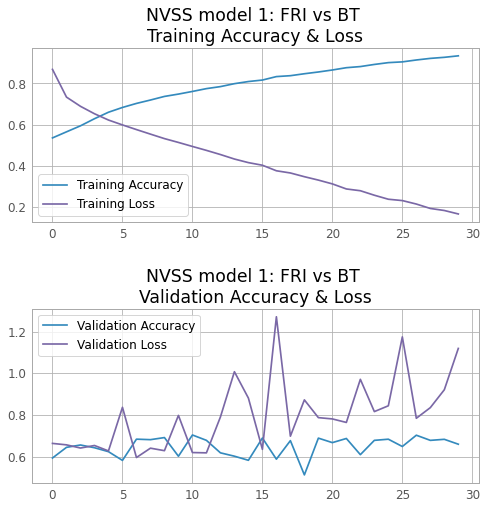

In [8]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='best')
plt.title('NVSS model 1: FRI vs BT \nTraining Accuracy & Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('NVSS model 1: FRI vs BT \nValidation Accuracy & Loss')
plt.show()

In [9]:
model2.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

history2 = model2.fit(
  train_ds2,
  validation_data=val_ds2,
  epochs=epochs
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 35, 35, 96)        11712     
                                                                 
 layer_normalization_5 (Laye  (None, 35, 35, 96)       192       
 rNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       307456    
                                                                 
 layer_normalization_6 (Laye  (None, 17, 17, 256)      512       
 rNormalization)                                                 
                                                      

2022-11-24 12:00:44.703783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1235 of 2048
2022-11-24 12:00:51.196390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


269/269 [==============================] - 540s 2s/step - loss: 0.6776 - accuracy: 0.7091 - val_loss: 0.3476 - val_accuracy: 0.8815
Epoch 2/30
269/269 [==============================] - 64s 237ms/step - loss: 0.5372 - accuracy: 0.7624 - val_loss: 0.3159 - val_accuracy: 0.8798
Epoch 3/30
269/269 [==============================] - 64s 237ms/step - loss: 0.4702 - accuracy: 0.7971 - val_loss: 0.2836 - val_accuracy: 0.8861
Epoch 4/30
269/269 [==============================] - 64s 237ms/step - loss: 0.4280 - accuracy: 0.8185 - val_loss: 0.2798 - val_accuracy: 0.8900
Epoch 5/30
269/269 [==============================] - 64s 237ms/step - loss: 0.3877 - accuracy: 0.8345 - val_loss: 0.4334 - val_accuracy: 0.8217
Epoch 6/30
269/269 [==============================] - 63s 236ms/step - loss: 0.3631 - accuracy: 0.8476 - val_loss: 0.4285 - val_accuracy: 0.8193
Epoch 7/30
269/269 [==============================] - 64s 236ms/step - loss: 0.3373 - accuracy: 0.8589 - val_loss: 0.3301 - val_accuracy: 0.864

In [15]:
model2.save('/home/sidius/Downloads/NVSS_Downloads/M2_FRI_vs_FRII')

INFO:tensorflow:Assets written to: /home/sidius/Downloads/NVSS_Downloads/M2_FRI_vs_FRII/assets


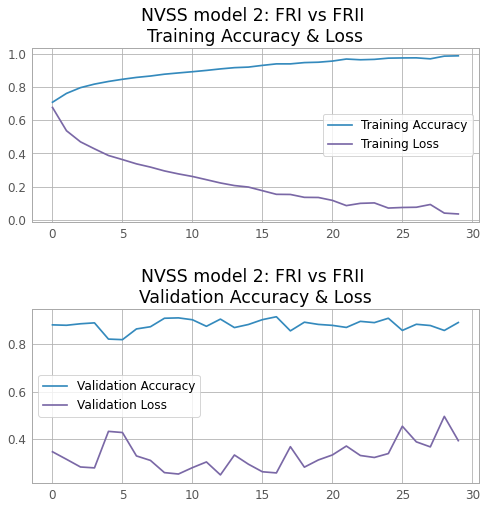

In [10]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='best')
plt.title('NVSS model 2: FRI vs FRII \nTraining Accuracy & Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('NVSS model 2: FRI vs FRII \nValidation Accuracy & Loss')
plt.show()

In [11]:
model3.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.summary()

history3 = model3.fit(
  train_ds3,
  validation_data=val_ds3,
  epochs=epochs
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 35, 35, 96)        11712     
                                                                 
 layer_normalization_10 (Lay  (None, 35, 35, 96)       192       
 erNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 256)       307456    
                                                                 
 layer_normalization_11 (Lay  (None, 17, 17, 256)      512       
 erNormalization)                                                
                                                      

2022-11-24 12:47:13.664257: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1255 of 2048
2022-11-24 12:47:19.138750: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


228/228 [==============================] - 448s 2s/step - loss: 0.6902 - accuracy: 0.6867 - val_loss: 0.4414 - val_accuracy: 0.8050
Epoch 2/30
228/228 [==============================] - 54s 236ms/step - loss: 0.5606 - accuracy: 0.7259 - val_loss: 0.4356 - val_accuracy: 0.8274
Epoch 3/30
228/228 [==============================] - 54s 235ms/step - loss: 0.5042 - accuracy: 0.7512 - val_loss: 0.4266 - val_accuracy: 0.8334
Epoch 4/30
228/228 [==============================] - 54s 235ms/step - loss: 0.4662 - accuracy: 0.7706 - val_loss: 0.4285 - val_accuracy: 0.8417
Epoch 5/30
228/228 [==============================] - 54s 235ms/step - loss: 0.4256 - accuracy: 0.7973 - val_loss: 1.1358 - val_accuracy: 0.4578
Epoch 6/30
228/228 [==============================] - 54s 235ms/step - loss: 0.4008 - accuracy: 0.8107 - val_loss: 0.4161 - val_accuracy: 0.8426
Epoch 7/30
228/228 [==============================] - 54s 235ms/step - loss: 0.3676 - accuracy: 0.8302 - val_loss: 0.6202 - val_accuracy: 0.743

In [18]:
model3.save('/home/sidius/Downloads/NVSS_Downloads/M3_FRII_vs_BT')

INFO:tensorflow:Assets written to: /home/sidius/Downloads/NVSS_Downloads/M3_FRII_vs_BT/assets


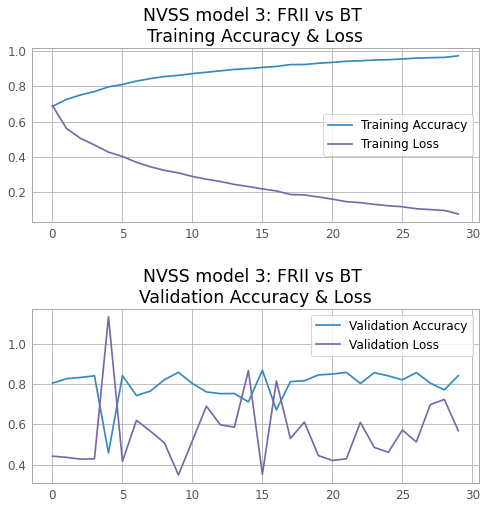

In [12]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='best')
plt.title('NVSS model 3: FRII vs BT \nTraining Accuracy & Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('NVSS model 3: FRII vs BT \nValidation Accuracy & Loss')
plt.show()

# Voting system

In [5]:
model1 = keras.models.load_model('/home/sidius/Downloads/ImagesTEST/M1_FRI_vs_BT')
model2 = keras.models.load_model('/home/sidius/Downloads/ImagesTEST/M2_FRI_vs_FRII')
model3 = keras.models.load_model('/home/sidius/Downloads/ImagesTEST/M3_FRII_vs_BT')


In [6]:
basepath = 'ImagesTEST/Test Images/BT'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpgVal(entry,basepath,'ImagesTEST/png_Versions/ImagesForTest/BT',2)
        
        
basepath = 'ImagesTEST/Test Images/FRI'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpgVal(entry,basepath,'ImagesTEST/png_Versions/ImagesForTest/FRI',2)


basepath = 'ImagesTEST/Test Images/FRII'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpgVal(entry,basepath,'ImagesTEST/png_Versions/ImagesForTest/FRII',2)

Lossy conversion from >f4 to uint8. Range [0.0, 0.005247144494205713]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d7410c220> 0.0004696338000940159
<astropy.nddata.utils.Cutout2D object at 0x7f3d7413d310> 0.00044111341412644833


Lossy conversion from >f4 to uint8. Range [0.0, 0.0069246431812644005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 0.030786916613578796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 0.022086622193455696]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7f40> 0.00035659783316077664
<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7460> 0.0006131420232122764


Lossy conversion from >f4 to uint8. Range [0.0, 0.004670270252972841]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7ac0> 0.00044000342313665897
<astropy.nddata.utils.Cutout2D object at 0x7f3d741b76a0> 0.0004946195113006979


Lossy conversion from >f4 to uint8. Range [0.0, 0.0071570985019207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 0.8789464235305786]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7070> 0.0006301437970250845
<astropy.nddata.utils.Cutout2D object at 0x7f3e43c242b0> 0.0007345872872974724


Lossy conversion from >f4 to uint8. Range [0.0, 1.2545576095581055]. Convert image to uint8 prior to saving to suppress this warning.


In [20]:
FR1_Score = 0
FR2_Score = 0
BT_Score = 0

# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/BT/J153616.2+142045B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/BT/J154549.4-024954B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/BT/J160318.6+192414B0.png')

# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRI/J153932.09+013710.5B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRI/J155222.36+223311.9B0.png')
untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRI/J155721.38+544015.9B0.png')

# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRII/3C194B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRII/3C228B0.png')
img = tf.keras.utils.load_img(
    untrained_image_path, target_size=(img_height, img_width),color_mode="grayscale"
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



predictions2 = model2(img_array,training=False)
# score2 = tf.nn.softmax(predictions2[0])
FR1_Score += float(predictions2[0][0])
FR2_Score += float(predictions2[0][1])

print(predictions2[0])
# print(score2)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions3 = model3(img_array,training=False)
# score3 = tf.nn.softmax(predictions3[0])
BT_Score += float(predictions3[0][0])
FR2_Score += float(predictions3[0][1])

print(predictions3[0])
# print(score3)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions1 = model1(img_array,training=False)
# score1 = tf.nn.softmax(predictions1[0])
BT_Score += float(predictions1[0][0])
FR1_Score += float(predictions1[0][1])

print(predictions1)
# print(score1)

BT_Score = 0.5*BT_Score
FR1_Score = 0.5*FR1_Score
FR2_Score = 0.5*FR2_Score

Fusion = [[BT_Score,FR1_Score,FR2_Score],['Bent_Tail','FRI','FRII']]
vote = 0
print(np.argmax(Fusion[0]))

# if(np.argmax(Fusion[0]) == 0):
#     vote = 1
# if(np.argmax(Fusion[0]) == 1):
#     vote = 2
# if(np.argmax(Fusion[0]) == 2):
#     vote = 3


print(BT_Score,FR1_Score,FR2_Score)


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(Fusion[1][np.argmax(Fusion[0])], 100 * np.max(Fusion[0]))
)

# untrained_image_path = pathlib.Path('/home/sidius/Downloads/Images/fits_png/J093058.74+034827.7.png')
# img = tf.keras.utils.load_img(
#     untrained_image_path, target_size=(img_height, img_width),color_mode="grayscale"
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

tf.Tensor([0.2830552  0.71694475], shape=(2,), dtype=float32)
tf.Tensor([2.2330858e-04 9.9977666e-01], shape=(2,), dtype=float32)
tf.Tensor([[6.3486409e-04 9.9936515e-01]], shape=(1, 2), dtype=float32)
2
0.0004290863362257369 0.6412101686000824 0.8583607077598572
This image most likely belongs to FRII with a 85.84 percent confidence.
